# 2 : show glacier evolution dependent on the applied climate change (to update from Feb2024 update)

**needs lowess fit**

--> ***Fully updated to 0.69 and to the changes after EGU***

- things to consider for the "highlighted" experiments in (**Fig. 2: a, c,d, and in the other Fig 1. a**):
    - at the moment, we just use the one experiment that is nearest to that temperature theshold, maybe it would be better to use the 3 experiments nearest to that temperature threshold (or all experiments with +/-0.2 °C) and then show the median of that as highlighted dot (line in the other Fig.)?  
    - or we do a logarithmic fit (deltaV_rel  vs deltaT) and then just use the fitted values for the "threshold" temperatures!  
    - not sure if glacier model uncertainties fit here inside 
- **b**: glacier volume lost per °C global warming
    - at the moment computed by linear fit of all experiments with GMT change between 1 and 4 °C, however, some RGI regions loose their total glacier volume already with 3°C. Maybe change that only those experiments where the regional glacier volume is >=1% are chosen for the fit. Or is it ok like that. Could also think about two "slopes, one from 1-2, and one from 3.5-4.5 
    - can add uncertainties (std. err or sth. else ) 
- todo: sort the RGI regions after size or sth. else or merge several ones together ? 

- use maybe lines instead of 80 small dots? (for a,c,d), if we use a logarithmic fit of deltaV_rel  vs deltaT, that might also help to produce the line
    - sns.stripplot would also be an alternative, but not sure if it is better, and the data would neet to be in another format, 
   
    
- another plot idea: look at volume difference between 0°C scenario and the other scenarios
    - basically to analyse what would have changed even without anthropogenic warming  -> does this makes sense
    - same could be done for the 1.5°C scenario -> to tell what can be saved by keeping global temperatures at 1.5°C compared to higher temperatures ... 
- another plot idea: more going into response time:
    - year where 50%/90% of glacier volume change response occcurred

--- 

In [31]:
# download it here https://cluster.klima.uni-bremen.de/~lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc
# and change the path to your local path
DATE = 'Feb12_2024' 
fill_option = 'repeat_last_101yrs' 
fit_to_median = False

import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

try:
    path_merged_runs_scaled_extend = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)

except:
    path_merged_runs_scaled_extend = f'/home/lilianschuster/Downloads/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc'
    ds_reg_models = xr.open_dataset(path_merged_runs_scaled_extend)
# --> comes from isimip3b_postprocessing_analysis/isimip3b_postprocess_to_monthly.ipynb
pd_global_temp_exp = pd.read_csv('../data/temp_ch_ipcc_ar6_isimip3b.csv', index_col = 0)
pd_rgi_stats_w_hugonnet = pd.read_csv(f'rgi_vs_2020_volume_hugonnet_estimates{DATE}.csv', index_col = [0])
approach = '_via_5yravg'
ds_reg_yr_shift= xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/all_shifted_glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}{approach}.nc')

In [32]:
ds_reg_yr_shift.model_author

<xarray.DataArray 'model_author' (model_author: 8)> Size: 448B
array(['CISM2', 'GLIMB', 'GO', 'GloGEMflow', 'GloGEMflow3D', 'Kraaijenbrink',
       'OGGM_v16', 'PyGEM-OGGM_v13'], dtype='<U14')
Coordinates:
  * model_author  (model_author) <U14 448B 'CISM2' 'GLIMB' ... 'PyGEM-OGGM_v13'

In [33]:
ds_reg_yr_shift.sel(model_author='GloGEMflow3D').volume_m3.isel(gcm=0).sel(year_after_2020=0).dropna(dim='rgi_reg').rgi_reg.values

array(['02', '06', '08', '10', '11', '12', '13', '14', '15', '16', '18'],
      dtype='<U2')

In [34]:
pd_rgi_stats_w_hugonnet['regional_volume_m3_2020_via_5yravg'] / pd_rgi_stats_w_hugonnet['regional_volume_m3_2000_via_5yravg']

01          0.920063
02          0.832398
03          0.974619
04          0.927804
05          0.946893
06          0.941570
07          0.967125
08          0.870514
09          0.983281
10          0.803947
11          0.703293
12          0.750490
13          0.931610
14          0.962628
15          0.818440
16          0.776888
17          0.908834
18          0.792311
19          0.989423
Globally    0.960560
dtype: float64

In [35]:
#if fit_to_median: 
#    pd_lowess_fit = pd.read_csv('lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_fit_to_median_lowess_added_current12deg.csv', index_col=[0])
#    #pd_lowess_fit_above_0_8 = pd.read_csv('fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_temp_above_0_8_fit_to_median_lowess_added_current12deg.csv', index_col=[0])
#    #pd_lowess_fit_above_0_8.index = pd_lowess_fit_above_0_8.index.values.round(3)

#else:
pd_lowess_fit = pd.read_csv(f'lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_{DATE}_ipcc_ar6.csv', index_col=[0])
# we have not computed that because we decided to usee all values now anyways ... 
#pd_lowess_fit_above_0_8 = pd.read_csv('fitted_lowess_best_frac_shift_years_rel_2020_100yr_avg_period_temp_above_0_8_lowess_added_current12deg.csv', index_col=[0])


In [36]:
pd_lowess_fit

0.05        0.25         0.5        0.75        0.95  frac  \
x                                                                            
-0.143529  94.495036  104.714382  109.355795  108.553283  110.832306  0.23   
-0.131913  94.130211  104.244617  108.873779  108.205638  110.483821  0.23   
-0.100000  93.127831  102.949424  107.552568  107.239692  109.526523  0.23   
-0.050000  91.544974  100.907630  105.490480  105.697626  108.018092  0.23   
 0.000000  89.937241   98.851987  103.435129  104.124648  106.487637  0.23   
...              ...         ...         ...         ...         ...   ...   
 6.850000   1.450839    2.850260    9.104859   13.246453   20.441977  0.57   
 6.884361   1.399666    2.765545    8.958605   12.971352   19.958082  0.57   
 6.884361   1.399666    2.765545    8.958605   12.971352   19.958082  0.57   
 6.884361   1.399666    2.765545    8.958605   12.971352   19.958082  0.57   
 6.884361   1.399666    2.765545    8.958605   12.971352   19.958082  0.57   

          region  year  fit_to_median  temp_ch  ...     fit_opt  \
x                                               ...               
-0.143529    All  5000          False      NaN  ...  lowess_fit   
-0.131913    All  5000          False      NaN  ...  lowess_fit   
-0.100000    All  5000          False      NaN  ...  lowess_fit   
-0.050000    All  5000          False      NaN  ...  lowess_fit   
 0.000000    All  5000          False      NaN  ...  lowess_fit   
...          ...   ...            ...      ...  ...         ...   
 6.850000     19  5000          False      NaN  ...  lowess_fit   
 6.884361     19  5000          False      NaN  ...  lowess_fit   
 6.884361     19  5000          False      NaN  ...  lowess_fit   
 6.884361     19  5000          False      NaN  ...  lowess_fit   
 6.884361     19  5000          False      NaN  ...  lowess_fit   

           shift_years_2020           y add  min_0.5_diff   min_0.5  \
x                                                                     
-0.143529              True  109.797196 NaN      0.087584  4.808715   
-0.131913              True  104.544894 NaN      0.087584  4.808715   
-0.100000              True         NaN NaN      0.087584  4.808715   
-0.050000              True         NaN NaN      0.087584  4.808715   
 0.000000              True         NaN NaN      0.087584  4.808715   
...                     ...         ...  ..           ...       ...   
 6.850000              True         NaN NaN      0.212507  8.958605   
 6.884361              True    2.995482 NaN      0.212507  8.958605   
 6.884361              True   13.124228 NaN      0.212507  8.958605   
 6.884361              True    9.323852 NaN      0.212507  8.958605   
 6.884361              True   20.286813 NaN      0.212507  8.958605   

           min_0.5_diff_above_zero  median_absolute_deviation       rmse  \
x                                                                          
-0.143529                 0.087584                   2.613016   4.206593   
-0.131913                 0.087584                   2.613016   4.206593   
-0.100000                 0.087584                   2.613016   4.206593   
-0.050000                 0.087584                   2.613016   4.206593   
 0.000000                 0.087584                   2.613016   4.206593   
...                            ...                        ...        ...   
 6.850000                 0.212507                  13.363463  31.715020   
 6.884361                 0.212507                  13.363463  31.715020   
 6.884361                 0.212507                  13.363463  31.715020   
 6.884361                 0.212507                  13.363463  31.715020   
 6.884361                 0.212507                  13.363463  31.715020   

                         algorithm_sel  
x                                       
-0.143529  non_negative_and_decreasing  
-0.131913  non_negative_and_decreasing  
-0.100000  non_negative_and_decreasing  
-0.050000  

In [37]:
# values not shown in the text 
temp = 1.2
pd_lowess_fit.loc[pd_lowess_fit.index.values.round(2) ==temp].sort_values(by='0.5')#['0.5']

0.05       0.25        0.5       0.75        0.95  frac region  \
x                                                                          
1.2   4.594718   6.739830  14.806517  16.996393   23.518352  0.27     04   
1.2   4.209297   7.317963  26.409909  52.948177   76.754394  0.26     02   
1.2   7.315271  17.235073  34.508508  58.963689  138.238115  0.79     08   
1.2  13.130308  23.084184  35.377053  49.276516   69.746648  0.87     09   
1.2  19.509387  27.639840  39.550053  56.993324   78.236671  0.24     06   
1.2  24.775946  31.409144  41.894114  51.072391   72.333550  0.34     05   
1.2  34.445908  39.736269  43.612063  45.519945   55.975199  0.25     11   
1.2  23.622963  29.672518  44.513301  50.405552   58.857554  0.17     10   
1.2  34.445633  36.833958  51.534648  73.690463   94.194728  0.18     15   
1.2  32.689031  44.380535  53.564570  68.893933   78.564715  0.43     07   
1.2  52.570248  57.545283  60.289471  60.139074   66.641965  0.23    All   
1.2  36.567301  53.896634  61.065490  74.454701   87.401726  0.24     17   
1.2  38.564660  52.883142  63.249548  68.324705   78.401165  0.29     01   
1.2  39.877263  52.643123  64.347661  93.614842  144.072114  0.57     19   
1.2  28.788910  46.760321  68.129723  91.061505  110.407047  0.28     03   
1.2  50.774324  68.763131  75.225289  95.881723  137.085780  0.24     16   
1.2  61.632742  68.906978  75.734867  85.165692  105.117349  0.18     12   
1.2  36.917694  67.069578  84.182678  91.322110  151.967253  0.29     18   
1.2  63.367090  76.221786  85.692118  95.524894  108.769163  0.21     13   
1.2  63.675323  76.816057  94.747207  98.001892  111.202635  0.23     14   

     year  fit_to_median  temp_ch  ...     fit_opt  shift_years_2020   y add  \
x                                  ...                                         
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   
1.2  5000          False      NaN  ...  lowess_fit              True NaN NaN   

     min_0.5_diff   min_0.5  min_0.5_diff_above_zero  \
x                                                      
1.2      0.000735 -0.001968                 0.000000   
1.2      0.003361 -0.007464                 0.000000   
1.2     -0.579416 -7.981660                 0.000000   
1.2     -0.311799 -4.325489                 0.000000   
1.2      0.005328 -0.012691                 0.000000   
1.2      0.055708  0.092445                 0.055708   
1.2      0.010449 -0.045926                 0.000000   
1.2      0.013172 -0.017610                 0.008150   
1.2      0.04411

In [38]:
# values not shown in the text 
temp = 3
pd_lowess_fit.loc[pd_lowess_fit.index.values.round(2) ==temp]#['0.5']

0.05       0.25        0.5       0.75       0.95  frac region  year  \
x                                                                               
3.0  17.168672  19.897759  22.414929  28.163813  31.523450  0.23    All  5000   
3.0  11.990118  20.720580  29.300904  47.767766  60.299665  0.29     01  5000   
3.0   0.240500   0.480027   1.164539   3.500711  10.861392  0.26     02  5000   
3.0   8.465326  20.794016  29.194894  50.593802  80.906870  0.28     03  5000   
3.0   0.048137   0.183569   0.603418   2.760926  11.175552  0.27     04  5000   
3.0   0.651148   5.423280  10.714293  18.034642  33.803443  0.34     05  5000   
3.0   0.238907   0.641832   2.842363  12.177835  34.987333  0.24     06  5000   
3.0   0.007654   0.243357   4.763263  20.683610  41.405405  0.43     07  5000   
3.0   0.000000   0.000000   0.000000   0.000000   5.589501  0.79     08  5000   
3.0   0.000000   0.000000   0.000000   6.395893  20.263612  0.87     09  5000   
3.0   2.595398   4.258953   5.814976   8.091835  13.005506  0.17     10  5000   
3.0   2.234597   3.435072   4.905675   6.313002   7.714687  0.25     11  5000   
3.0   6.942506  10.384184  13.692639  20.698586  36.981564  0.18     12  5000   
3.0   8.536082  12.713011  20.133242  42.338444  58.576300  0.21     13  5000   
3.0  13.523725  17.801856  32.052393  54.694273  66.550839  0.23     14  5000   
3.0   5.897205   7.867315  12.102200  23.976226  49.623770  0.18     15  5000   
3.0   4.940347   7.506214   9.303038  12.794752  33.053318  0.24     16  5000   
3.0  12.753056  19.441797  32.275012  45.031985  62.485535  0.24     17  5000   
3.0  10.382051  22.400904  32.718521  42.825265  59.093146  0.29     18  5000   
3.0  11.013183  18.470097  30.385417  53.157791  86.446610  0.57     19  5000   

     fit_to_median  temp_ch  ...     fit_opt  shift_years_2020   y add  \
x                            ...                                         
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   
3.0          False      NaN  ...  lowess_fit              True NaN NaN   

     min_0.5_diff   min_0.5  min_0.5_diff_above_zero  \
x                                                      
3.0      0.087584  4.808715                 0.087584   
3.0      0.036183  1.675224                 0.036183   
3.0      0.003361 -0.007464                 0.000000   
3.0      0.142978 -0.471137                 0.000000   
3.0      0.000735 -0.001968                 0.000000   
3.0      0.055708  0.092445                 0.055708   
3.0      0.005328 -0.012691                 0.000000   
3.0      0.034019  0.011546                 0.034019   
3.0     -0.579416 -7.981660           

In [39]:
# values not shown in the text 
temp = 5
pd_lowess_fit.loc[pd_lowess_fit.index.values.round(2) ==temp]#['0.5']

0.05      0.25        0.5       0.75       0.95  frac region  year  \
x                                                                             
5.0  5.733211  7.361648   9.053516  12.223675  20.290784  0.23    All  5000   
5.0  3.135133  6.142200  12.800400  31.934687  44.552228  0.29     01  5000   
5.0  0.006475  0.061603   0.167366   0.380873   2.437676  0.26     02  5000   
5.0  0.573654  1.531926   7.291352  14.990753  53.206322  0.28     03  5000   
5.0  0.000000  0.016548   0.033411   0.185491   4.224909  0.27     04  5000   
5.0  0.142909  0.984755   2.323610   5.025585  18.202463  0.34     05  5000   
5.0  0.019825  0.116818   0.348563   1.376882   7.501005  0.24     06  5000   
5.0  0.001582  0.065698   1.349937   9.243393  23.870362  0.43     07  5000   
5.0  0.000000  0.000000   0.000000   0.000000   3.586677  0.79     08  5000   
5.0  0.000000  0.000000   0.000000   2.538274  10.889967  0.87     09  5000   
5.0  0.259763  0.509899   0.822830   1.319047   2.301663  0.17     10  5000   
5.0  0.126360  0.244131   0.465440   0.798090   1.661920  0.25     11  5000   
5.0  0.821172  1.866742   2.454305   3.619033  10.694219  0.18     12  5000   
5.0  1.543295  3.236530   4.349998  15.829114  27.091988  0.21     13  5000   
5.0  4.242298  7.035801  13.111608  32.564061  45.170777  0.23     14  5000   
5.0  1.067301  2.431374   4.489885  11.410415  23.991449  0.18     15  5000   
5.0  0.888636  1.304947   1.874704   2.964870   8.406726  0.24     16  5000   
5.0  3.769217  7.273283  14.580006  27.297748  39.773360  0.24     17  5000   
5.0  2.107963  9.049184  11.839016  14.549520  19.356502  0.29     18  5000   
5.0  3.938537  7.590282  17.306199  27.532509  46.787467  0.57     19  5000   

     fit_to_median  temp_ch  ...     fit_opt  shift_years_2020   y add  \
x                            ...                                         
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   
5.0          False      NaN  ...  lowess_fit              True NaN NaN   

     min_0.5_diff   min_0.5  min_0.5_diff_above_zero  \
x                                                      
5.0      0.087584  4.808715                 0.087584   
5.0      0.036183  1.675224                 0.036183   
5.0      0.003361 -0.007464                 0.000000   
5.0      0.142978 -0.471137                 0.000000   
5.0      0.000735 -0.001968                 0.000000   
5.0      0.055708  0.092445                 0.055708   
5.0      0.005328 -0.012691                 0.000000   
5.0      0.034019  0.011546                 0.034019   
5.0     -0.579416 -7.981660                 0.000000   
5.0     -0.311799 -4.3254

In [40]:
pd_lowess_fit.index = pd_lowess_fit.index.values.round(3)

In [41]:

from help_functions import pal_models, model_order, d_reg_num_name, model_order_anonymous, compute_steady_state_yr
hue_order_anonymous = []

pal_models_l = []
hue_order = []
for m, p in zip(model_order, pal_models):
    if (m!='OGGM-VAS') and (m!='OGGM_v153') and (m!='Huss'):
        hue_order.append(m)
        pal_models_l.append(p)
for m in hue_order:
    hue_order_anonymous.append(model_order_anonymous[m])
pal_models = pal_models_l

print(hue_order, hue_order_anonymous)
# select the right models:
ds_reg_models = ds_reg_models.sel(model_author = hue_order)
pal_models = sns.color_palette(pal_models)

dict_model_col = {}
for c,m in zip(pal_models, hue_order):
    dict_model_col[m] = c
    
# select the right models
ds_reg_models = ds_reg_models.sel(model_author=hue_order)
ds_reg_models_vol = ds_reg_models.volume_m3

glac_models = hue_order

['PyGEM-OGGM_v13', 'GloGEMflow', 'GloGEMflow3D', 'OGGM_v16', 'GLIMB', 'Kraaijenbrink', 'GO', 'CISM2'] ['model 1', 'model 2', 'model 3', 'model 4', 'model 5', 'model 6', 'model 7', 'model 8']


In [42]:
pd_global_temp_exp['temp_ch_ipcc'].min(), pd_global_temp_exp['temp_ch_ipcc'].max()

(-0.1435287751312741, 6.884361023524889)

In [43]:
# Let's take the median estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])
ds_reg_models_med_vol = ds_reg_models_vol.median(dim='model_author')
num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)', 5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)', 10:'(k)', 11:'(l)', 12:'(m)'} 

ds_reg_yr_shift = ds_reg_yr_shift.sel(model_author=glac_models)
ds_reg_yr_shift_vol = ds_reg_yr_shift.sel(year_after_2020=slice(0,4950)).volume_m3
ds_reg_yr_shift_vol = ds_reg_yr_shift_vol.stack(experiments=['gcm','period_scenario'])
ds_reg_yr_shift_vol_med = ds_reg_yr_shift_vol.median(dim='model_author')

In [44]:
pd_global_temp_exp_glac = pd.read_csv('../data/temp_ch_ipcc_ar6_isimip3b_glacier_regionally.csv', index_col = 0)

def get_glob_temp_exp(region='global'):
    pd_global_temp_exp_glac = pd.read_csv('../data/temp_ch_ipcc_ar6_isimip3b_glacier_regionally.csv', index_col = 0)
    _p = pd_global_temp_exp_glac.loc[pd_global_temp_exp_glac.region == region]
    #print(_p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc'))
    _p = _p.groupby(['gcm','period_scenario']).mean('temp_ch_ipcc')
    return _p
np.testing.assert_allclose(get_glob_temp_exp(region='global')['temp_ch_ipcc'].values,
                                  pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()['temp_ch_ipcc'].values, rtol=1e-5)
import matplotlib
matplotlib.__version__

'3.9.2'

In [45]:
pal_models

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744)]

## Estimate equilibrium glacier volume for any temperature level -> exponential decaying fit:

In [46]:
show_color_models = True
plt.rc('font', size=24)  
temp_ch = '' #'regional_glacier'

# option A: choose 20-year period before and do the average!
import numpy as np
from scipy.optimize import curve_fit

#sim_year = 5000
# Define the exponential decay function, want to ensure that it -> zero if temperature is large!!!
rgi_regs_global = ['All','01', '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']
current_deltaT = 1.2
rgi_regs_global_r = ['01', '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19','All']


In [48]:

# this is the old version only showing the exponential fit 
run = False
add_lowess = False
ylim1=150
if run: 
    avg_over = '101yr'
    for temp_above_0_8 in [False]: #,False]: True

        for version in ['simple']:
            jj=0
            if version == 'simple':
                def exponential_decay(x, a, b):
                    # avoind overflow -> does not work ... 
                    exp_values = -b * x
                    #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
                    return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
                param_bounds = ([0, 0], [1000, 5])
                pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1),
                                                        columns=['rgi_reg','year',
                                                                 'a_simple', 'b_simple'])

            else:
                def exponential_decay(x, a, b,c,d):
                    exp_values_b = -b * x
                    #exp_values_b = np.clip(exp_values_b, -709, 709)  # Clip values to avoid overflow

                    exp_values_d = -d * x**2
                    #exp_values_d = np.clip(exp_values_d, -709, 709)  # Clip values to avoid overflow
                    return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 
                param_bounds = ([0, 0,0,0], [1000, 5,1000, 5])
                pd_exp_decay_fits_adv = pd.DataFrame(index=np.arange(0,20*4,1),
                                                     columns=['rgi_reg','year',
                                                              'a_comp', 'b_comp',
                                                              'c_comp', 'd_comp'])
            for sim_year in [5000]: #[100, 300, 500, 5000]: # 
                if temp_above_0_8:
                    add= '_temp_above_0_8'
                else:
                    add = ''

                if sim_year==5000:
                    v_n = r'$V_{\%,ss}$'
                    state = 'Steady-state volume'
                elif sim_year == 100:
                    v_n = r'$V_{\%,100yr}$'
                    state = 'Volume after 100 years'
                elif sim_year == 300:
                    v_n = r'$V_{\%,300yr}$'
                    state = 'Volume after 300 years'
                elif sim_year ==500:
                    v_n = r'$V_{\%,500yr}$'
                    state = 'Volume after 500 years'
                if avg_over=='100yr':
                    sim_year_avg = 100
                elif avg_over=='60yr':
                    sim_year_avg = 60
                else:
                    sim_year_avg = 20
                fig, axs = plt.subplots(5,4,figsize=(35,40), sharey=True) #, sharey='row') #, sharex=True)
                ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
                ds_reg_models_vol_roll = ds_reg_models_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
                for j, rgi_reg in enumerate(rgi_regs_global):
                    if j<4:
                        ax = axs[0][j]
                    elif j <8:
                        ax = axs[1][j-4]
                    elif j <12:
                        ax = axs[2][j-8]
                    elif j <16:
                        ax = axs[3][j-12]
                    elif j <20:
                        ax = axs[4][j-16]

                    region = f'RGI{rgi_reg}_glacier'

                    if rgi_reg == 'All':
                        # get the temp.
                        if temp_ch != 'regional_glacier':
                            pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                        else:
                            pd_global_temp_exp_m = get_glob_temp_exp(region='global_glacier')
                        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sum(dim='rgi_reg')
                        # make sure that we only take here global models ... 
                        ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(simulation_year=-1).dropna(dim='model_author')
                        ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sum(dim='rgi_reg', min_count=19)

                        ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg')

                        pd_tt2 = ds_t2.to_dataframe()
                        try:
                            pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                        except:
                            pass
                        pd_tt2 = pd_tt2.reset_index()
                    else:
                        # get the temp. 
                        if temp_ch != 'regional_glacier':
                            pd_global_temp_exp_m = get_glob_temp_exp(region='global')
                        else:
                            pd_global_temp_exp_m = get_glob_temp_exp(region=region)

                        if fit_to_median:
                            #ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sel(rgi_reg=rgi_reg)
                            #ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)

                            ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                            ds_t = ds_t2.median(dim='model_author') 

                            pd_tt2 = ds_t2.to_dataframe()
                            try:
                                pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
                            except:
                                pass
                            pd_tt2 = pd_tt2.reset_index()
                        else:
                            ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                            ds_t = 100*ds_t/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                    pd_tt = ds_t.to_dataframe()
                    try:
                        pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
                    except:
                        pass
                    pd_tt = pd_tt.reset_index()

                    if rgi_reg == 'All':
                        pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        for m in pd_tt2.model_author.unique():
                            pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                    else:
                        if fit_to_median:
                            pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                            for m in pd_tt2.model_author.unique():
                                pd_tt2.loc[pd_tt2.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                        else:
                            for m in pd_tt.model_author.unique():
                                pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values

                    pd_tt_above0 = pd_tt #.loc[pd_tt.volume_m3>0]  ## probably it is ok to also fit the zero volume estimates 
                    # if I want to remove the very uncertain experiments,
                    # I still want to keep those that are near to 
                    # 1.2°C. However, there are no experiments directly at 1.2°C
                    # and only one at +1, so, we should rather do the fit with >= +0.8°C
                    if temp_above_0_8:
                        pd_tt_above0 = pd_tt_above0.loc[pd_tt_above0['temp_ch_ipcc']>=0.8]
                    temp = pd_tt_above0['temp_ch_ipcc'].values

                    q = 'volume_m3' # this is actually the 'relative volume change (in %)'
                    rel_vol = pd_tt_above0[q].values

                    if rgi_reg == 'All':
                        ax.text(0.97, 0.97, 'Globally', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')
                    else:
                        nam = d_reg_num_name[rgi_reg]
                        ax.text(0.97, 0.97, f'{nam} (RGI{rgi_reg})', color='grey',transform=ax.transAxes, fontsize=24, va='top', ha='right')


                    ax.set_ylabel(f'{state} '+f'{v_n}'+'\n(in %, relative to initial state)', fontsize=26)

                    if show_color_models:                    
                        if rgi_reg=='All':
                            pd_ttx = pd_tt2
                            pd_ttxx = pd_tt
                            # add legend...
                            n_models = len(pd_ttx.model_author.unique())
                            line1 = Line2D([0], [0], label='global model median:\n'+r'$\sum_{rgi=1}^{19} V_{median,rgi}$', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                            line2 = Line2D([0], [0], label=f'{n_models} individual global models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)
                            #add handles
                            handles= [line1, line2]
                            #add legend
                            leg2=ax.legend(handles=handles, loc = 'upper right', fontsize=16, bbox_to_anchor=(1,0.55))
                        else:
                            if fit_to_median:
                                pd_ttx = pd_tt2
                                pd_ttxx = pd_tt
                            else:
                                pd_ttx = pd_tt
                                pd_ttxx = pd_tt[['temp_ch_ipcc', 'volume_m3']].groupby(['temp_ch_ipcc']).median().reset_index()
                            n_models = len(pd_ttx.model_author.unique())
                            line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
                            line2 = Line2D([0], [0], label=f'{n_models} individual', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)

                            #add handles
                            handles= [line1, line2]
                            #add legend
                            leg2=ax.legend(handles=handles, title='glacier models',
                                          loc = 'upper right', fontsize=16, title_fontsize=18, bbox_to_anchor=(1,0.55))
                        sns.scatterplot(ax=ax,x='temp_ch_ipcc',
                                        y='volume_m3', #'volume (km3)',
                                        data = pd_ttx,
                                        hue_order=hue_order,
                                        hue='model_author',
                                        palette=pal_models,
                                        legend=False, s=40, alpha = 0.6, marker='s')
                        # if globally, the median comes from all estimates (also from those models that are only available for some RGI regions ...)
                        sns.scatterplot(ax=ax,
                                    x='temp_ch_ipcc',
                                    y='volume_m3', #'volume (km3)',
                                    data = pd_ttxx,
                                    color='black',
                                    #hue='temp_ch_ipcc',
                                    #palette='flare',
                                    legend=False, s=80, alpha = 0.8)

                    else:
                        sns.scatterplot(ax=ax,
                                    x='temp_ch_ipcc',
                                    y='volume_m3', #'volume (km3)',
                                    data = pd_tt,
                                    color='black',
                                    #hue='temp_ch_ipcc',
                                    #palette='flare',
                                    legend=False, s=80, alpha = 0.3)
                    if temp_ch == 'regional_glacier':
                        ax.set_xlabel(r'$\Delta$T$_{reg,glacier-area}$ (°C, compared to pre-industrial)')
                    else:
                        ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
                    #plt.plot(temp, rel_vol, 'o', alpha =0.2)

                    x,y = temp, rel_vol

                    if rgi_reg=='04':
                        xx,yy = x,y
                    # Perform the curve fitting
                    popt, pcov = curve_fit(exponential_decay, x-current_deltaT, y,loss='soft_l1', f_scale=0.1, bounds = param_bounds)  # Lower and upper bounds for a and b)
                    # Generate a higher density x range for plotting the fitted curve
                    x_dense = np.linspace(x.min(), x.max(), 100)
                    fit_vars = popt #c_opt

                    # Extract the optimized parameters
                    if version == 'simple':
                        a_opt, b_opt = popt #c_opt
                        # Compute the fitted y values
                        y_fitted = exponential_decay(x_dense-current_deltaT, a_opt, b_opt)

                        func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$ΔT))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                        #r'V$_{ss,rel}$(ΔT)=a$\cdot$e'+r'$^{-b\cdot(ΔT-1.2)}$'
                        if current_deltaT !=0:
                            if temp_ch == 'regional_glacier':
                                #func_vars= r'$V_{\%}$(ΔT$_{reg}$)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*('+r'ΔT$_{reg}$'+f'-{current_deltaT}°C))' 
                                func_vars= f'{v_n}'+r'(ΔT$_{reg}$)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT$_{reg}$-'+f'{current_deltaT}°C))'

                                fs_label = 14
                            else:
                                #func_vars= r'$V_{\%}$(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*(ΔT-{current_deltaT}°C))' 
                                func_vars= f'{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT-'+f'{current_deltaT}°C))'
                                fs_label = 18
                            #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                    else:
                        a_opt, b_opt, c_opt, d_opt = popt
                        # Compute the fitted y values
                        y_fitted = exponential_decay(x_dense, a_opt, b_opt, c_opt, d_opt)
                        func_vars= 'V%(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                    ax.plot(x_dense, y_fitted, '-', label=func_vars,
                            color='black', lw=4)
                    text = ''
                    for temp in [1.2,1.5,2.0,2.7, 4.0]:
                        if version == 'simple':
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt).round(0)) #c_opt
                            num_x=0.97
                            num_y=0.5
                        else:
                            Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt, c_opt, d_opt).round(0)) #c_opt
                            num_x=0.97
                        if Ttemp_vol < 10:
                            Ttemp_vol = f'  {Ttemp_vol}'
                        if temp_ch == 'regional_glacier':
                            text = text+r'V$_{\%}$'+r'(ΔT$_{reg}$='+f'+{temp}°C)'+f'={Ttemp_vol}%\n'
                        else:
                            text = text+r'V$_{\%}$'+f'(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
                    ax.text(num_x, num_y, text, color='black',transform=ax.transAxes, fontsize=22, va='bottom', ha='right')
                    #except:
                    #    pass

                    ax.legend(fontsize=fs_label, loc='upper right', bbox_to_anchor=(1,0.92))
                    #if j<2:
                    ax.add_artist(leg2)

                    if version == 'simple':
                        pd_exp_decay_fits_simple.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt)
                    else:
                        pd_exp_decay_fits_adv.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt, c_opt, d_opt)
                    jj+=1

                    if temp_ch == 'regional_glacier':
                        ax.set_xlim([pd_global_temp_exp_glac['temp_ch_ipcc'].min()*1.001, pd_global_temp_exp_glac['temp_ch_ipcc'].max()*1.001])
                        ax.set_ylim([-2,400])
                    else:
                        ax.set_ylim([-2,ylim1])

                    if j<16:
                        ax.set_xlabel('')
                    if j not in [0,4,8,12,16,20]:
                        ax.set_ylabel('')
                    if add_lowess:
                        from moepy import lowess, eda

                        eval_x =np.arange(x.min().round(1), x.max()*1.001, 0.1)
                        N=200
                        it=1
                        for frac in [0.5,0.6,0.7,0.8,0.9]:
                            df_quantiles = lowess.quantile_model(x, y, x_pred=eval_x, frac=frac, num_fits=N, robust_iters=it,
                                                             qs=[0.5])
                            ax.plot(df_quantiles.index, df_quantiles[0.5], #label=f'lowess, frac= {frac}',
                                    alpha = 1, lw=2)

                plt.tight_layout()
                if fit_to_median:
                    add = add + '_fit_to_median'
                if add_lowess:
                    add = add + '_lowess_added'
                if temp_ch != 'regional_glacier':
                    plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg_{DATE}.png')
                else:
                    plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}_current12deg_reg_glacier_temp_ch_{DATE}.png')
                plt.close()
        if temp_ch != 'regional_glacier':
            pd_exp_decay_fits_simple.to_csv(f'fitted_glacier_response_to_global_temp_ch_simple_{avg_over}_avg_period{add}_current12deg_{DATE}.csv')
        else:
            pd_exp_decay_fits_simple.to_csv(f'fitted_glacier_response_to_regional_temp_ch_simple_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch_{DATE}.csv')

        #pd_exp_decay_fits_adv.to_csv(f'fitted_glacier_response_to_global_temp_ch_complex_20yr_avg_period{add}.csv')

**Now create Fig. 2 with lowess fits**

[0.17, 0.25, 0.5, 0.75, 0.83]

In [75]:
qs = [0.05, 0.25, 0.5, 0.75, 0.95]
def func_subplot_warming_scatter(ax, rgi_reg='All', fig_1b=False,
                                show_leg2_in_subplot= True, path_only_glob='',
                                 complex_aggregation_scheme = False,
                                pd_sel='to_fill',
                                 pd_exp_decay_fits_simple='to_fill'): #, approach = approach, temp_ch

    ###########actually independent of rgi_reg
    pd_vol_2020 = pd.read_csv(f'rgi_vs_2020_volume_hugonnet_estimates{DATE}.csv', index_col=[0])
    pd_sel['vol_2020_reg_m3'] = np.NaN
    for r in pd_sel.region.unique():
        if r == 'All':
            _r = 'Globally'
        else:
            _r = r
        vol_2020 = pd_vol_2020.loc[_r, f'regional_volume_m3_2020{approach}']
        pd_sel.loc[pd_sel.region == r, 'vol_2020_reg_m3'] = vol_2020
    for q in qs:
        q = str(q)
        pd_sel[f'{q}_m3'] = pd_sel[f'{q}'] * pd_sel['vol_2020_reg_m3'] /100
    ###########actually independent of rgi_reg

    
    if rgi_reg == 'All':
        _rgi_reg = 'Globally'
    else:
        _rgi_reg = rgi_reg
    if temp_ch == 'regional_glacier':
        fs_label = 20
    else:
        fs_label = 22

    vol_2020_reg = pd_rgi_stats_w_hugonnet.loc[_rgi_reg][f'regional_volume_m3_2020{approach}']

    region = f'RGI{rgi_reg}_glacier'
    
    #### first load the stuff as normally mostly needed for 'All'
    # (the ds_t2 are later overwritten, if a specific region is chosen)
    if path_only_glob != '_only_global_models':
        if shift_years:
            # we have done the dropping of everything after 4950, so the last year should be fine 
            ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(year_after_2020=-1).sum(dim='rgi_reg')
            # make sure that we only take here global models ... 
            ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(year_after_2020=-1).dropna(dim='model_author')
            ds_t2 = 100*ds_t2/vol_2020_reg
            ds_t = 100*ds_reg_models_med_vol_sel/vol_2020_reg # TODO checkt that this is the sum ... 

        else:
            ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sum(dim='rgi_reg')
            # make sure that we only take here global models ... 
            ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(simulation_year=-1).dropna(dim='model_author')
            ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sum(dim='rgi_reg', min_count=19)

            ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg')
    else:
        # with global models -> first sum over the regions, and then do the 
        if shift_years:
            #  the median should here also be the median over the summed up values 
            ds_reg_models_med_vol_sel = ds_reg_models_vol_roll.isel(year_after_2020=-1).sum(dim='rgi_reg').median(dim='model_author')
            # make sure that we only take here global models ... 
            ds_t2 = ds_reg_models_vol_roll.sum(dim='rgi_reg', min_count=19).isel(year_after_2020=-1).dropna(dim='model_author')
            ds_t2 = 100*ds_t2/vol_2020_reg
            ds_t = 100*ds_reg_models_med_vol_sel/vol_2020_reg # TODO checkt that this is the sum ... 
        else:
            raise NotImplementedError()

    pd_tt2 = ds_t2.to_dataframe()
    try:
        pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
    except:
        pass
    pd_tt2 = pd_tt2.reset_index()
    
    if rgi_reg == 'All':
        # get the temp.
        if temp_ch != 'regional_glacier':
            pd_global_temp_exp_m = get_glob_temp_exp(region='global')
        else:
            pd_global_temp_exp_m = get_glob_temp_exp(region='global_glacier')
    else:
        # get the temp. 
        if temp_ch != 'regional_glacier':
            pd_global_temp_exp_m = get_glob_temp_exp(region='global')
        else:
            pd_global_temp_exp_m = get_glob_temp_exp(region=region)

        if fit_to_median:
            if shift_years:
                # TODO
                ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                ds_t2 = 100*ds_t2/vol_2020_reg
            else:
                ds_t2 = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                ds_t2 = 100*ds_t2/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
            ds_t = ds_t2.median(dim='model_author') 

            pd_tt2 = ds_t2.to_dataframe()
            try:
                pd_tt2 = pd_tt2.drop(columns=['gcm','period_scenario'])
            except:
                pass
            pd_tt2 = pd_tt2.reset_index()
        else:
            if shift_years:
                # TODO
                ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(year_after_2020=-1).dropna(dim='model_author')
                ds_t = 100*ds_t/vol_2020_reg
            else:
                ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                ds_t = 100*ds_t/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
    pd_tt = ds_t.to_dataframe()
    try:
        pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
    except:
        pass
    pd_tt = pd_tt.reset_index()
    print(pd_tt['volume_m3'].max())

    # much better if we create a gcm_period_scenario column to later assign the correct temp. series ... 
    pd_global_temp_exp_m_r = pd_global_temp_exp_m.reset_index()
    pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario'] = pd_global_temp_exp_m_r['gcm'] +'_'+pd_global_temp_exp_m_r['period_scenario']
    pd_global_temp_exp_m_r.index = pd_global_temp_exp_m_r['gcm'+'_'+'period_scenario']
    pd_tt2['gcm'+'_'+'period_scenario'] = pd_tt2['gcm'] +'_'+pd_tt2['period_scenario']
    pd_tt2.index = pd_tt2['gcm'+'_'+'period_scenario']
    pd_tt2.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
    pd_tt2 = pd_tt2.reset_index(drop=True)

    pd_tt['gcm'+'_'+'period_scenario'] = pd_tt['gcm'] +'_'+pd_tt['period_scenario']
    pd_tt.index = pd_tt['gcm'+'_'+'period_scenario']
    pd_tt.loc[pd_global_temp_exp_m_r.index, 'temp_ch_ipcc'] = pd_global_temp_exp_m_r['temp_ch_ipcc']
    pd_tt = pd_tt.reset_index(drop=True)
    pd_tt_above0 = pd_tt #.loc[pd_tt.volume_m3>0]  ## probably it is ok to also fit the zero volume estimates 
    # if I want to remove the very uncertain experiments,
    # I still want to keep those that are near to 
    # 1.2°C. However, there are no experiments directly at 1.2°C
    # and only one at +1, so, we should rather do the fit with >= +0.8°C
    if temp_above_0_8:
        pd_tt_above0 = pd_tt_above0.loc[pd_tt_above0['temp_ch_ipcc']>=0.8]
    temp = pd_tt_above0['temp_ch_ipcc'].values

    q = 'volume_m3' # this is actually the 'relative volume change (in %)'
    rel_vol = pd_tt_above0[q].values
    
    if not fig_1b:
        if rgi_reg == 'All':
            ax.text(0.99, 0.99, 'Global', color='black',weight='bold',transform=ax.transAxes, fontsize=35, va='top', ha='right')
        else:
            nam = d_reg_num_name[rgi_reg]
            if rgi_reg == '19':
                fs_rgi = 26
            else:
                fs_rgi = 30
            if plot_fig2:
                fs_add = 3
                ax.text(0.985, 0.985, f'{nam}', color='black', weight='bold',transform=ax.transAxes, fontsize=fs_rgi+fs_add, va='top', ha='right')
            else:
                fs_add = 2
                ax.text(0.985, 0.985, f'{nam}', color='black', weight='bold',transform=ax.transAxes, fontsize=fs_rgi, va='top', ha='right') # {rgi_reg}-

    ax.set_ylabel(f'{state}\n(% rel. to 2020)', fontsize=32)
    if not fig_1b:
        if temp_ch == 'regional_glacier':
            leg2y =  0.53 # 0.59 #0.59
            delta_t = -0.05 #0 #-0.04
        else:
            leg2y = 0.59 #0.62
            delta_t = -0.03
    else:
        leg2y = 1
        delta_t = 0
    
    if show_color_models:                    
        if rgi_reg=='All':
            pd_ttx = pd_tt2
            pd_ttxx = pd_tt
            # add legend...
            n_models = len(pd_ttx.model_author.unique())
            if path_only_glob != '_only_global_models':
                label = 'sum of regional\n'+r'medians (n=80)' # global model median:\n'+r'$\sum_{rgi=1}^{19} V_{median,rgi}$'  ## at $\Delta$T'+'\n
                
            else:
                #label = 'median of global models:\n'+r'median ($\sum_{rgi=1}^{19} V_{rgi}$)'
                label = "global models'\n"+r'median (n=80)' #:\n'+r'median ($\sum_{rgi=1}^{19} V_{rgi}$)' # at $\Delta$T'+'\n

            line1 = Line2D([0], [0],
                           label=label,
                           color='black', ms=10, marker='o', lw=0,alpha = 0.8)
            if fig_1b:
                line2 = Line2D([0], [0], label='global glacier\n'+r'models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6) #  at $\Delta$T
            else:
                line2 = Line2D([0], [0], label='glacier\n'+r'models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6) #  at $\Delta$T
            #add handles
            handles_leg2= [line2, line1]
            labels_leg2 = [line2.get_label(),line1.get_label()]
            #add legend
            if show_leg2_in_subplot:
                if temp_ch == '':
                    loc_glob = 'lower left'
                else:
                    loc_glob = 'lower right'
                leg2=ax.legend(handles=[line1],labels=[line1.get_label()],
                               loc = loc_glob, fontsize=20, #fs_label+3,
                               title_fontsize=20) #, bbox_to_anchor=(1,leg2y))
            
            if not fig_1b:
                if not show_text:
                    if plot_fig2:
                        leg2y = 0.7
                    else: 
                        leg2y = 0.91
                    ax.text(0.98,leg2y,f'{n_models} glacier models', 
                             verticalalignment='top', horizontalalignment='right', fontsize=26,
                             transform=ax.transAxes)
                else:
                    #ax.text(0.98,0.55+delta_t,f'{n_models} global glacier models',transform=ax.transAxes, horizontalalignment = 'right',
                    #       fontsize=23.5)
                                        
                    if (temp_ch == ''and ylim1 ==150) or (rgi_reg != 'All'):
                        leg3 = ax.legend([line2], [f'{n_models} glacier models'], loc = 'upper right', 
                                         bbox_to_anchor = (1, leg2y+0.01),framealpha=0.5, 
                                         # 0.98,0.54+delta_t,
                                         #horizontalalignment = 'right',transform=ax.transAxes,
                               fontsize=22)
                    else:
                        leg3 = ax.legend([line2, line1], [f'{n_models} glacier models', line1.get_label()], loc = 'upper right', 
                                         bbox_to_anchor = (1, leg2y+0.01),framealpha=0.5, 
                                         # 0.98,0.54+delta_t,
                                         #horizontalalignment = 'right',transform=ax.transAxes,
                               fontsize=22)
                

        else:
            if fit_to_median:
                pd_ttx = pd_tt2
                pd_ttxx = pd_tt
            else:
                pd_ttx = pd_tt
                pd_ttxx = pd_tt[['temp_ch_ipcc', 'volume_m3']].groupby(['temp_ch_ipcc']).median().reset_index()
            n_models = len(pd_ttx.model_author.unique())
                        
            line1 = Line2D([0], [0], label = "glacier models'\n"+r"median (n=80)", color='black', ms=10, marker='o', lw=0,alpha = 0.8) #  at $\Delta$T
            line2 = Line2D([0], [0], label='glacier\n'+r'models', color='grey', ms=7, marker='s', lw=0,alpha = 0.6)  #  at $\Delta$T

            #add handles
            handles_leg2= [line2, line1]
            labels_leg2 = [line2.get_label(),line1.get_label()]
            #labels_1 = ['median',]
            #add legend
            if show_leg2_in_subplot:
                leg2=ax.legend(handles=[line1],labels=[line1.get_label()], #title='glacier models',
                                  loc = 'lower left', fontsize=20, title_fontsize=20, bbox_to_anchor=(0,0)) #1,leg2y))
            if not fig_1b:
                if not show_text:
                    if plot_fig2:
                        leg2y = 0.77 #0.7
                        _fs = 26
                    else: 
                        leg2y = 0.91
                        _fs = 24
                    ax.text(0.98,leg2y,f'{n_models} glacier models', 
                             verticalalignment='top', horizontalalignment='right', fontsize=_fs,
                            transform=ax.transAxes)
                else:
                    framealpha = 0.5
                    if (temp_ch == ''and ylim1 ==150) or (rgi_reg != 'All'):
                        leg3 = ax.legend([line2], [f'{n_models} glacier models'], loc = 'upper right', 
                                         bbox_to_anchor = (1, leg2y),framealpha=0.5, 
                                         # 0.98,0.54+delta_t,
                                         #horizontalalignment = 'right',transform=ax.transAxes,
                               fontsize=22) #4)
                    else:
                        leg3 = ax.legend([line2, line1], [f'{n_models} glacier models', line1.get_label()], loc = 'upper right', 
                                         bbox_to_anchor = (1, leg2y),framealpha=0.5, 
                                         # 0.98,0.54+delta_t,
                                         #horizontalalignment = 'right',transform=ax.transAxes,
                               fontsize=22)
        if show_models_in_grey:
            sns.scatterplot(ax=ax,x='temp_ch_ipcc',
                y='volume_m3', #'volume (km3)',
                data = pd_ttx,
                #hue_order=hue_order,
                #hue='model_author',
                            color='darkgrey',
                #palette=pal_models,
                legend=False, s=40, alpha = 1, marker='s')
        else:
            sns.scatterplot(ax=ax,x='temp_ch_ipcc',
                            y='volume_m3', #'volume (km3)',
                            data = pd_ttx,
                            hue_order=hue_order,
                            hue='model_author',
                            palette=pal_models,
                            legend=False, s=40, alpha = 1, marker='s')
        # if globally, the median comes from all estimates (also from those models that are only available for some RGI regions ...)
        # but it is the median over the experiments, so it should be ok, to do that, 
        # the lowess fit for the median is also done over these medians (80 exps.) separately (rel. to global glacier-area temp., so 
        # there the fit is ok to have (but not the uncertainties, as those are, at the moment coming directly from the sum of the exps)
        sns.scatterplot(ax=ax,
                    x='temp_ch_ipcc',
                    y='volume_m3', #'volume (km3)',
                    data = pd_ttxx,
                    color='black',
                    #hue='temp_ch_ipcc',
                    #palette='flare',
                    legend=False, s=80, alpha = 1)

    else:
        sns.scatterplot(ax=ax,
                    x='temp_ch_ipcc',
                    y='volume_m3', #'volume (km3)',
                    data = pd_tt,
                    color='black',
                    #hue='temp_ch_ipcc',
                    #palette='flare',
                    legend=False, s=80, alpha = 0.3)
    if temp_ch == 'regional_glacier':
        ax.set_xlabel(r'$\Delta$T$_{g}$ (°C)', fontsize=30) #_{reg,glacier-area}$ (°C)') #, compared to pre-industrial
    else:
        #ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
        ax.set_xlabel(r'$\Delta$T (°C)', fontsize=30)

    #plt.plot(temp, rel_vol, 'o', alpha =0.2)
    x,y = temp, rel_vol

    x_dense = np.linspace(x.min(), x.max(), 100)
    # Extract the optimized parameters
    if (path_only_glob != '_only_global_models') or (rgi_reg !='All'):
        a_opt = pd_exp_decay_fits_simple.loc[pd_exp_decay_fits_simple.rgi_reg==rgi_reg]['a_simple'].values.squeeze()
        b_opt = pd_exp_decay_fits_simple.loc[pd_exp_decay_fits_simple.rgi_reg==rgi_reg]['b_simple'].values.squeeze()
    else:
        pd_exp_decay_fits_simple_g = pd.read_csv(f'{f_path}lowess_fits/fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_fit_over_global_estimates_current12deg_{sim_year}_{DATE}{path_only_glob}_ipcc_ar6.csv', index_col=[0])
        a_opt = pd_exp_decay_fits_simple_g.loc[pd_exp_decay_fits_simple_g.rgi_reg==rgi_reg]['a_simple'].values.squeeze()
        b_opt = pd_exp_decay_fits_simple_g.loc[pd_exp_decay_fits_simple_g.rgi_reg==rgi_reg]['b_simple'].values.squeeze()


    # Compute the fitted y values
    y_fitted = exponential_decay(x_dense-current_deltaT, a_opt, b_opt)

    #func_vars= f'exponential fit:\n{v_n}'+r'(ΔT)='+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$ΔT))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
    #r'V$_{ss,rel}$(ΔT)=a$\cdot$e'+r'$^{-b\cdot(ΔT-1.2)}$'
    if current_deltaT !=0:
        if temp_ch == 'regional_glacier':
            #func_vars= r'$V_{\%}$(ΔT$_{reg}$)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*('+r'ΔT$_{reg}$'+f'-{current_deltaT}°C))' 
            func_vars= f'exponential fit: '+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT$_{reg}$-'+f'{current_deltaT}°C))'

            fs_label = 20
        else:
            #func_vars= r'$V_{\%}$(ΔT)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*(ΔT-{current_deltaT}°C))' 
            func_vars= f'exponential fit: '+f'{a_opt:.1f}'+r'$\cdot$'+f'exp(-{b_opt:.2f}'+r'$\cdot$(ΔT-'+f'{current_deltaT}°C))'
            fs_label = 22
        #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'

    func_vars = 'exponential fit'  # just to make it shorter!
    ax.plot(x_dense, y_fitted, '--', label=func_vars,
            color='black', lw=4)


    if temp_ch == 'regional_glacier':
        ax.set_xlim([pd_global_temp_exp_glac['temp_ch_ipcc'].min()*1.001, pd_global_temp_exp_glac['temp_ch_ipcc'].max()*1.001])
        #ax.set_ylim([-2,400])
    else:
        # ax.set_ylim([-2,ylim1])
        pass
    ax.set_ylim([-2,ylim1])

    if np.isnan(j):
        pass
    else:
        if j<16:
            ax.set_xlabel('')
        if j not in [0,4,8,12,16,20]:
            ax.set_ylabel('')
    add_lowess = True
    if add_lowess:
        if (path_only_glob == '_only_global_models') and (rgi_reg =='All'):
            pd_sel_g = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_fit_over_global_estimates_current12deg_{sim_year}_{DATE}{path_only_glob}_ipcc_ar6.csv', index_col=[0])
            sel = pd_sel_g.loc[pd_sel_g.region == rgi_reg]
        else:
            sel = pd_sel.loc[pd_sel.region == rgi_reg]

        #text = ''
        if fig_1b:
            if rgi_reg == 'All':
                text = 'Steady-state global\nglacier '+'mass at ΔT\n'+' (% rel. to 2020):'+'\n'
            else:
                text = f'Steady-state RGI{rgi_reg}\nglacier '+'mass at ΔT\n'+' (% rel. to 2020):'+'\n'
            text = '' # that is too much text -_> let's remove 
        else:
            text = ''
        if plot_fig2: 
            ax.plot(sel.index, sel['0.5'], color='black', lw=4, label='LOWESS fit\n50%')
        else:
            ax.plot(sel.index, sel['0.5'], color='black', lw=4, label='LOWESS fit')
        #### now plot the uncertainties ... 
        if len(qs)>1:
            if (rgi_reg == 'All') & (temp_ch == 'regional_glacier'):
                # we can not use the quantiles fitted over regional glacier temp. change and sum the up to get the 
                # as in the "ALL" subplot we show the results related to the glacier-area weighted
                confi = ''
            else:
                if complex_aggregation_scheme and (rgi_reg=='All'):
                    _sel = pd.read_csv('lowess_fits/complex_global_aggregation_fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_uncertainties_5000_Feb12_2024_ipcc_ar6.csv',
                                      index_col=[0])
                elif (rgi_reg != 'All') or (path_only_glob == '_only_global_models'):
                    _sel = sel
                else:
                    pd_sel_q_glob = pd_sel.loc[pd_sel.region != 'All']
                    # only select the values in a 0.05 temp. grid:
                    pd_sel_q_glob = pd_sel_q_glob.where(np.isnan(pd_sel_q_glob.y)).dropna(how='all')
                    pd_sel_q_glob = pd_sel_q_glob.reset_index()
                    global_vol_2020_m3 = pd_vol_2020.loc['Globally',f'regional_volume_m3_2020{approach}']
                    pd_sel_global_sum_over_reg_fitted_quantiles = 100*pd_sel_q_glob[['x','0.05_m3', '0.25_m3', '0.5_m3',
                           '0.75_m3', '0.95_m3']].groupby('x').sum()/global_vol_2020_m3
                    pd_sel_global_sum_over_reg_fitted_quantiles = pd_sel_global_sum_over_reg_fitted_quantiles.rename(columns = {'0.05_m3':'0.05', '0.25_m3':'0.25', '0.5_m3':'0.5',
                           '0.75_m3':'0.75', '0.95_m3':'0.95'})
                    
                    _sel = pd_sel_global_sum_over_reg_fitted_quantiles
                
                if remove_local_minima:
                    if rgi_reg != 'All':
                        v_x = _sel.loc[np.isnan(_sel.y)].index
                        v_q25 = np.minimum.accumulate(_sel.loc[np.isnan(_sel.y)]['0.25'].values)
                        v_q75 = np.minimum.accumulate(_sel.loc[np.isnan(_sel.y)]['0.75'].values)
                        v_q05 = np.minimum.accumulate(_sel.loc[np.isnan(_sel.y)]['0.05'].values)
                        v_q95 = np.minimum.accumulate(_sel.loc[np.isnan(_sel.y)]['0.95'].values)
                        v_q17 = np.minimum.accumulate(_sel.loc[np.isnan(_sel.y)]['0.17'].values)
                        v_q83 = np.minimum.accumulate(_sel.loc[np.isnan(_sel.y)]['0.83'].values)
                    else:
                        v_x = _sel.index
                        v_q25 = np.minimum.accumulate(_sel['0.25'].values)
                        v_q75 = np.minimum.accumulate(_sel['0.75'].values)
                        v_q05 = np.minimum.accumulate(_sel['0.05'].values)
                        v_q95 = np.minimum.accumulate(_sel['0.95'].values)
                        v_q17 = np.minimum.accumulate(_sel['0.17'].values)
                        v_q83 = np.minimum.accumulate(_sel['0.83'].values)
                else:
                    v_x = _sel.index
                    v_q25 = _sel['0.25']
                    v_q75 = _sel['0.75']
                    v_q05 = _sel['0.05']
                    v_q95 = _sel['0.95']
                    v_q17 = _sel['0.17']
                    v_q83 = _sel['0.83']
                if not only_90perc:
                    ax.fill_between(v_x, v_q25, v_q75,
                                    color='black', alpha = 0.2, label = '[25%, 75%]')
                #ax.fill_between(v_x, v_q05, v_q95,
                #                color='black', alpha = 0.1, label= '[ 5%, 95%]')
                ax.fill_between(v_x, v_q17, v_q83,
                                color='black', alpha = 0.1, label= '[17%, 83%]')
        else:
            confi = ''
        
        for temp in [1.2,1.5,2.0,2.7,4.0]:
            try:
                #usually that works, but sometimes several values are found..
                Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, '0.5'].round(0)) #c_opt
            except:
                # in that case just select the nearest one
                Ttemp_vol  = int(sel.iloc[np.abs(sel.index - temp).argmin()]['0.5'].round(0))
                Ttemp_vol_test = sel.loc[np.round(sel.index,2)==temp, '0.5'].round(0).values #) #c_opt
                # just make sure that the correct temperature is selected ...
                np.testing.assert_allclose(sel.reset_index().iloc[np.abs(sel.index - temp).argmin()].x,
                                           temp, rtol = 1e-3)
            if not ((rgi_reg == 'All') & (temp_ch == 'regional_glacier')) & (len(qs)>1):

                #confi05 = int(v_q05[np.abs(v_x - temp).argmin()].round(0))
                #confi95 = int(v_q95[np.abs(v_x - temp).argmin()].round(0))
                confi17 = int(v_q17[np.abs(v_x - temp).argmin()].round(0))
                confi83 = int(v_q83[np.abs(v_x - temp).argmin()].round(0))

                if confi17<10:
                    confi17 = f'  {confi17}'
                if (confi83<100) and (confi83 >=10):
                    confi83 = f'  {confi83}'
                elif (confi83 <10):
                    confi83 = f'    {confi83}'

                confi = f'[{confi17} to {confi83}]'

            if Ttemp_vol < 10:
                space = '  '
            else:
                space = ''
            #if fig_1b:
            #    if temp_ch == 'regional_glacier':
            #        num_x=1.04
            #        num_y=0.36 #0.51
            #        text = text+r'ΔT$_{reg}$='+f'{temp}°C: '+space+r'$\bf{' + f'{str(Ttemp_vol)}'+r'\%}$' +f' {confi}\n'
            #    else:
            #        num_x=1.04
            #        num_y=0.36 #0.55
            #        text = text+f'{temp}°C: '+space+r'$\bf{' + f'{str(Ttemp_vol)}'+r'\%}$' +f' {confi}\n'
            #else:
            if temp_ch == 'regional_glacier':
                num_x=0.98
                num_y=0.55+delta_t-0.04
                text = text+r'ΔT$_{g}$='+f'{temp}°C: '+space+r'$\bf{' + f'{str(Ttemp_vol)}'+r'\%}$' +f' {confi}\n'
            else:
                num_x=0.98
                num_y=0.55+delta_t
                text = text+f'{temp}°C: '+space+r'$\bf{' + f'{str(Ttemp_vol)}'+r'\%}$' +f' {confi}\n'
        if show_text: 
            if fig_1b:
                ax.text(num_x, 0.98, text, color='black',transform=ax.transAxes, fontsize=25, va='top', ha='right')
            else:
                ax.text(num_x, num_y, text, color='black',transform=ax.transAxes, fontsize=27, va='bottom', ha='right')
        print(rgi_reg, sel.frac.unique())

        #if j<2:
        condis_suppl = (sim_year<5000) or (ylim1>150) or (path_only_glob == '_only_global_models')
        condi1 = (((j == 0) and (temp_ch == 'regional_glacier')) or ((temp_ch != 'regional_glacier') and (rgi_reg == 'All') and (condis_suppl))) and (not fig_1b)
        condi2 =  fig_1b
        # fig 2
        condi3= (not fig_1b) and (j==18) and (sim_year==5000) and (not condis_suppl) and (temp_ch != 'regional_glacier')
        if condi1 or condi2 or condi3:#rgi_reg == '':
            #plt.savefig(f'{f_path_f}test.png')
            handles_f, labels_f = ax.get_legend_handles_labels()
            print(handles_f, labels_f)
            if not show_leg2_in_subplot:
                if (temp_ch == 'regional_glacier') and (j ==0):
                    handles= [handles_leg2[1],handles_leg2[0], handles_f[0], handles_f[1],handles_f[2], handles_f[3] ]
                    labels = [f'{n_models} glacier models',labels_leg2[0], labels_f[0], labels_f[1], labels_f[2], labels_f[3]]
                else:
                    handles = handles_leg2 + handles_f
                    labels = labels_leg2 + labels_f
            else:
                if j == 1: # before 18
                    handles = [handles_f[0], labels_f[0]]
                else:
                    if (temp_ch == 'regional_glacier') and (j ==3): # if regional glacier we have to take another region to put the labels on as there are globally no uncertainties... 
                        handles= [handles_leg2[1], handles_leg2[0], handles_f[0], handles_f[1],handles_f[2], handles_f[3] ]
                        labels = [f'{n_models} glacier models', labels_leg2[0], labels_f[0], labels_f[1], labels_f[2], labels_f[3]]

                    else:
                        handles= handles_f
                        labels = labels_f
            if fig_1b:
                if show_text:
                    leg1x = 0.18 #18 #1.05
                    leg1y = 1 #0.2 #0.74
                    fs_label1 = 24 # fs_label+3
                else:
                    leg1x = 1
                    leg1y = 1
                    fs_label1 = 20 # fs_label+3
                ax.legend(handles, labels, fontsize=fs_label1, #loc='lower left', 
                          loc = 'upper right',
                          bbox_to_anchor=(leg1x,leg1y),
                          ncol=1, framealpha = 0.5)
            elif (temp_ch == 'regional_glacier') or condis_suppl:
                # suppl. figures ... with a global subplot ... 
                if temp_ch == 'regional_glacier':
                    leg1x = 1
                    leg1y = leg2y-0.22 #0.52 #33
                    fs_label1 = 20 #1 #fs_label+5
                else:
                    leg1x = 0.45  # 52 #49
                    leg1y = 1
                    fs_label1 = fs_label-1
                ax.legend([handles[-1], handles[0]], [labels[-1], labels[0]],
                              fontsize=fs_label1, loc='upper right', bbox_to_anchor=(leg1x,leg1y),
                              ncol=1, framealpha = 0.5)
            else:
                # fig 2
                if temp_ch == 'regional_glacier':
                    leg1x = 1.1 #1
                    leg1y = 0.05
                    fs_label1 = 32 #fs_label+5
                else:
                    leg1x = 1.1 #0.49
                    leg1y = 0.05 #1
                    fs_label1 = 34 #fs_label
                ax.legend(handles, labels,
                          fontsize=fs_label1, loc='lower left', bbox_to_anchor=(leg1x,leg1y),
                          ncol=1)
        if show_leg2_in_subplot and  temp_ch == '' and ylim1==150:
            ax.add_artist(leg2)
        if not fig_1b: # and (temp_ch==''): ### not sure why this is needed ... ((j!=0) or (temp_ch==''))
            if show_text:
                # this is the legend with amount of glacier models and eventually glacier model median ... 
                ax.add_artist(leg3)

In [76]:
import matplotlib.colors

In [55]:
for c in pal_models: 
    print(matplotlib.colors.to_rgba(c))


(0.33725490196078434, 0.7058823529411765, 0.9137254901960784, 1)
(0.8705882352941177, 0.5607843137254902, 0.0196078431372549, 1)
(0.00784313725490196, 0.6196078431372549, 0.45098039215686275, 1)
(0.8, 0.47058823529411764, 0.7372549019607844, 1)
(0.984313725490196, 0.6862745098039216, 0.8941176470588236, 1)
(0.8352941176470589, 0.3686274509803922, 0.0, 1)
(0.9254901960784314, 0.8823529411764706, 0.2, 1)
(0.34901960784313724, 0.1843137254901961, 0.050980392156862744, 1)


In [56]:
pd_hugo_far = pd.read_csv('rgi_vs_2020_volume_hugonnet_estimatesFeb12_2024.csv',index_col=0)
pd_hugo_far_reg = pd_hugo_far.iloc[:-1]
pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['regional_volume_m3_2020_via_5yravg']/pd_hugo_far.loc['Globally']['regional_volume_m3_2020_via_5yravg']).values
rgi_regs_sel_sorted_vol = pd_hugo_far_reg.sort_values(by='%_2020_rel_global', ascending=False).index.values

/tmp/ipykernel_3652885/3077210001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_hugo_far_reg.loc[pd_hugo_far_reg.index,'%_2020_rel_global'] = (100*pd_hugo_far_reg['regional_volume_m3_2020_via_5yravg']/pd_hugo_far.loc['Globally']['regional_volume_m3_2020_via_5yravg']).values


5000
All 0 True


KeyError: '0.17'

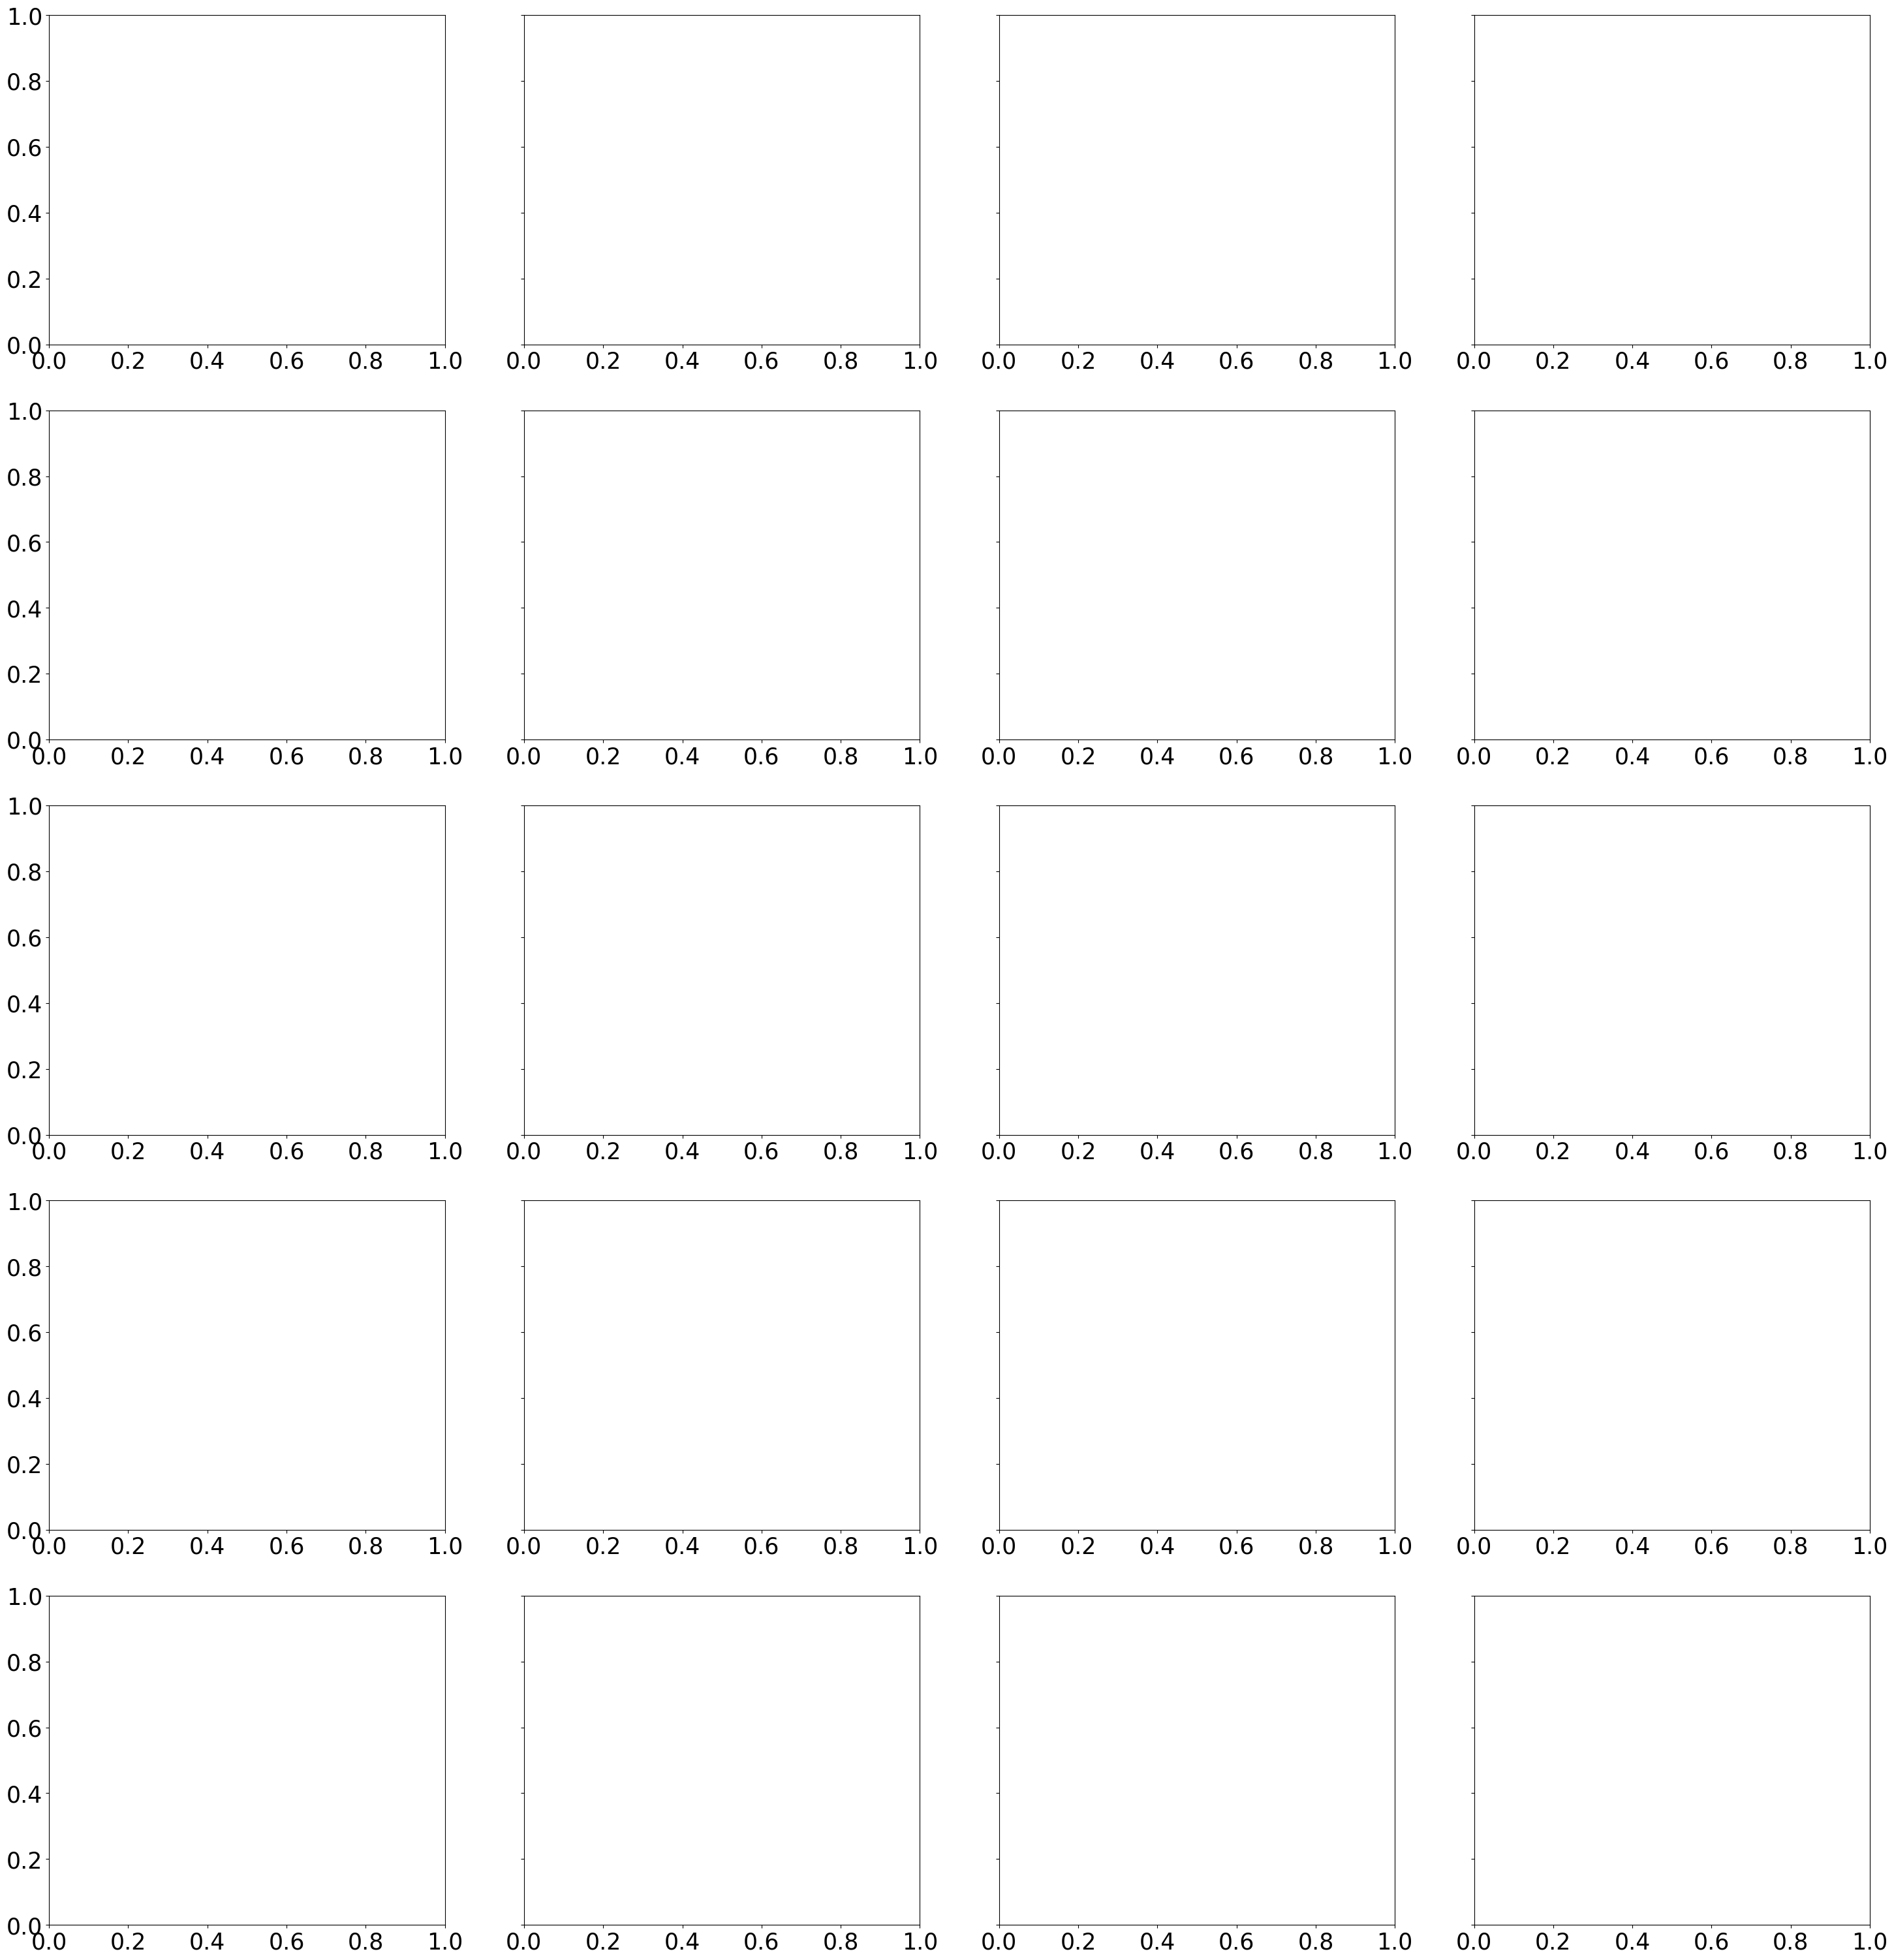

In [57]:
complex_aggregation_scheme=False  ### todo-> eventually change, but then also need to creat 100 yr, 500 yr complex stuff...
#ylim1 = 600 #
ylim1 = 150 #150 #suppl. fig. ... 
show_models_in_grey = False
fig_s8  = False  # for Fig. S8--> this is now extended data Fig. S3...  (lowess fit vs regional temp. change )-> use
# volume change vs regional temp. change:  median, lowess fit but not quantiles shown because ...
# if globally, the median comes from all estimates (also from those models that are only available for some RGI regions ...)
# but it is the median over the experiments, so it should be ok, to do that, 
# the lowess fit for the median is also done over these medians (80 exps.) separately (rel. to global glacier-area temp., so 
# there the fit is ok to have (but not the uncertainties, as those are, at the moment coming directly from the sum of the exps)
fig_s_only_global_models = True  # Now Fig. S10only global models ... 
only_90perc = True
#### PROBLEM HERE --> THE GLOBAL MODEL has not been fitted with the regional sums, probably it is best to just simplify the figure and to just show the global figure with the fit using all data ... instead .... TODO ... 
############## 
temp_ch = ''
f_path = '/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/'
shift_years = True
if shift_years:
    p_shift = '_shift_years_rel_2020'
else:
    p_shift = ''
f_path_f = f'{f_path}figures/'

temp_above_0_8 = False
add_lowess =True
  

def exponential_decay(x, a, b):
    # avoind overflow -> does not work ... 
    exp_values = -b * x
    #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
    return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
remove_local_minima = True
#qs = [0.05,0.25,0.5,0.75,0.95]
qs = [0.17,0.25,0.5,0.75,0.83]

#if  only_90perc:
# qs = [0.05,0.5,0.95]
#sim_years = [100, 5000] # 
sim_years = [50, 100,300,500, 5000]

#ylim1 = 600
#sim_years = [5000]
# condition for Fig2 

if fig_s8:
    sim_years = [5000] # only have that computed
    temp_ch = 'regional_glacier'
else:
    temp_ch = ''
    
if ylim1>150:
    sim_years = [5000]
    
##########
if fig_s_only_global_models:
    path_only_glob = '_only_global_models'
    sim_years = [5000] # only have that computed
else:
    path_only_glob = ''

    
for sim_year in sim_years:  #[5000]: #sim_years: #sim_years: # 
    print(sim_year)
    if (ylim1 == 150) and (sim_year == 5000) and (temp_ch=='') and (not fig_s_only_global_models):
        print('plot_fig2')
        plot_fig2=True
        show_leg2_in_subplot = False
        show_text = False
    else:
        show_leg2_in_subplot = True
        plot_fig2 = False
        show_text = True

    
    if show_text:
        plt.rc('font', size=25)  
    else:
        plt.rc('font', size=28)
    condis_suppl2 = (sim_year<5000) or (ylim1>150) or (path_only_glob == '_only_global_models') or (temp_ch== 'regional_glacier')
    sel_l = []
    df_quantiles_l = []
    if sim_year<5000:
        avg_over = '21yr'
    else:
        avg_over = '101yr'
        
    if condis_suppl2:     
        rgi_regs_sel = ['All'] + list(rgi_regs_sel_sorted_vol) #rgi_regs_global_r
    else:
        # do not include the global plot in Fig. 2!!!
        rgi_regs_sel = rgi_regs_sel_sorted_vol #rgi_regs_global_r[:-1]
        
        
    if temp_above_0_8:
        add= '_temp_above_0_8'
    else:
        add = ''

    if fit_to_median:
        add = add + '_fit_to_median'
    if add_lowess:
        add = add + '_lowess_added'
    if len(qs)>1:
        add = add + '_quantiles_added'
    if remove_local_minima:
        addi = add + '_removed_local_minima'
    ### read the fitted stuff 
    # (from http://localhost:7261/lab/workspaces/auto-C/tree/GlacierMIP3/2023_exploratory_analysis_notebooks/lowess_fits/lowess_percentile_interval_fit_per_region_added_uncertainties.py)
    if temp_ch != 'regional_glacier':
        pd_exp_decay_fits_simple = pd.read_csv(f'{f_path}lowess_fits/fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_current12deg_{sim_year}_{DATE}{path_only_glob}_ipcc_ar6.csv', index_col=[0])
        #pd_quantiles_concat = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess{p_shift}_{avg_over}_avg_period{add}_current12deg_{sim_year}_{DATE}{path_only_glob}.csv', index_col=[0])
        pd_sel = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_{sim_year}_{DATE}{path_only_glob}_ipcc_ar6.csv', index_col=[0])
    else:
        pd_exp_decay_fits_simple = pd.read_csv(f'{f_path}lowess_fits/fitted_glacier_response_to_reg_glacier_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch_{sim_year}_{DATE}_ipcc_ar6.csv', index_col=[0])
        #pd_quantiles_concat = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch_{sim_year}_{DATE}.csv', index_col=[0])
        pd_sel = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_reg_glacier_temp_ch_{sim_year}_{DATE}_ipcc_ar6.csv', index_col=[0]) 
        
    assert pd_sel.year.unique() == sim_year
    pd_exp_decay_fits_simple = pd_exp_decay_fits_simple.loc[pd_exp_decay_fits_simple.year == sim_year]
    # aggregate regional quantiles to get global quantile estimate 
    # for the median, we do the fit directly using the individual median fits 
        
        

    if avg_over=='100yr':
        sim_year_avg = 100
    elif avg_over=='101yr':
        sim_year_avg = 101
    elif avg_over=='60yr':
        sim_year_avg = 60
    else:
        sim_year_avg = 20
    fig, axs = plt.subplots(5,4,figsize=(36,38), sharey=True) #, sharey='row') #, sharex=True)
    if path_only_glob != '_only_global_models':
        if shift_years:
            ds_reg_models_med_vol_roll = ds_reg_yr_shift_vol_med.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
            ds_reg_models_vol_roll = ds_reg_yr_shift_vol.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
        else:
            ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
            ds_reg_models_vol_roll = ds_reg_models_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all').sel(simulation_year=slice(0,sim_year))
    else:
        # only global models !!! 
        ds_reg_models_med_vol_global = ds_reg_yr_shift_vol.dropna(dim='model_author', how='any').median(dim='model_author')
        ds_reg_models_med_vol_roll = ds_reg_models_med_vol_global.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
        ds_reg_models_vol_roll = ds_reg_yr_shift_vol.rolling(year_after_2020=sim_year_avg, center=True).mean().dropna(dim='year_after_2020', how='all').sel(year_after_2020=slice(0,sim_year))
        ds_reg_models_vol_roll = ds_reg_models_vol_roll.dropna(dim='model_author', how='any')
        #pd_exp_decay_fits_simple_g = pd.read_csv(f'{f_path}lowess_fits/fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_fit_over_global_estimates_current12deg_{sim_year}_{DATE}{path_only_glob}.csv', index_col=[0])
        #pd_quantiles_concat_g = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess{p_shift}_{avg_over}_avg_period{add}_fit_over_global_estimates_current12deg_{sim_year}_{DATE}{path_only_glob}.csv', index_col=[0])
        #pd_sel_g = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_fit_over_global_estimates_current12deg_{sim_year}_{DATE}{path_only_glob}.csv', index_col=[0])
    
    for j, rgi_reg in enumerate(rgi_regs_sel):
        if j<4:
            ax = axs[0][j]
        elif j <8:
            ax = axs[1][j-4]
        elif j <12:
            ax = axs[2][j-8]
        elif j <16:
            ax = axs[3][j-12]
        elif j <20:
            ax = axs[4][j-16]
        if j == 17:
            plt.tight_layout()
        if rgi_reg == 'All':
            s_l = 'global'
            s_u = 'Global'
        else:
            s_l = 'regional'
            s_u = 'Regional'
        if sim_year==5000:
            v_n = r'$V_{\%,ss}$'
            state = f'Steady-state glacier mass' # {s_l} 
        elif sim_year == 50:
            v_n = r'$V_{\%,50yr}$'
            state = f'Glacier mass after 50 years' #{s_u} 
        elif sim_year == 100:
            v_n = r'$V_{\%,100yr}$'
            state = f'Glacier mass after 100 years'
        elif sim_year == 300:
            v_n = r'$V_{\%,300yr}$'
            state = f'Glacier mass after 300 years'
        elif sim_year ==500:
            v_n = r'$V_{\%,500yr}$'
            state = f'Glacier mass after 500 years'
        if ((temp_ch != 'regional_glacier') and  j <=1) or ((temp_ch == 'regional_glacier') and (j ==0)): # or (j == 0)): # or 
            _show_leg2_in_subplot = show_leg2_in_subplot
            print(rgi_reg, j, show_leg2_in_subplot)
        else:
            _show_leg2_in_subplot = False
        func_subplot_warming_scatter(ax, rgi_reg=rgi_reg, show_leg2_in_subplot=_show_leg2_in_subplot, path_only_glob=path_only_glob,
                                    pd_sel=pd_sel, pd_exp_decay_fits_simple=pd_exp_decay_fits_simple, complex_aggregation_scheme=complex_aggregation_scheme) #, approach = approach, temp_ch
        if plot_fig2: 
            perc_glob = pd_hugo_far_reg.loc[rgi_reg]['%_2020_rel_global'].round(1)
            pd_global_temp_exp_m = get_glob_temp_exp(region='global')

            if rgi_reg == 'All':
                region = 'global_glacier'
            else:
                region = f'RGI{rgi_reg}_glacier'
            pd_global_temp_exp_m_glac = get_glob_temp_exp(region=region)
            pd_global_temp_exp_m.loc[pd_global_temp_exp_m_glac.index, 'temp_ch_ipcc_glacier'] = pd_global_temp_exp_m_glac['temp_ch_ipcc'].values
            pd_t = pd_global_temp_exp_m
            ratio = np.median(pd_t['temp_ch_ipcc_glacier'].values/pd_t['temp_ch_ipcc'].values).round(1)
            if perc_glob==0:
                text_n =  f'<0.1% of global mass in 2020'
            else:
                text_n =  f'{perc_glob}% of global mass in 2020'
            text_n = text_n + f'\n{ratio}x global warming'

            ax.text(0.98, 0.9, text_n, horizontalalignment='right', 
                    verticalalignment='top', transform=ax.transAxes, fontsize=26)
        ax.tick_params(axis='both', which='major', width=2, length=7)
        ax.tick_params(axis='both', which='minor', width=1, length=5)
        from matplotlib.ticker import MultipleLocator
        minorx_locator = MultipleLocator(1)  # 1° difference 
        ax.xaxis.set_minor_locator(minorx_locator)
        minory_locator = MultipleLocator(10)  # 1° difference 
        ax.yaxis.set_minor_locator(minory_locator)
        ax.minorticks_on()


    if not condis_suppl2:
        axs[4][3].set_axis_off()
        # add manually after the tight_layout the xlabel from specific subplot
        if temp_ch == 'regional_glacier':
            #axs[3][3].set_xlabel(r'$\Delta$T$_{reg,glacier-area}$ (°C, compared to pre-industrial)', fontsize=30)
            axs[3][3].set_xlabel(r'$\Delta$T$_{g}$ (°C)', fontsize=30)

        else:
            #axs[3][3].set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
            axs[3][3].set_xlabel(r'$\Delta$T (°C)', fontsize=30)
    if ylim1 == 600:
        addi = addi + '_ylim600'
    addi = addi + path_only_glob
    if show_models_in_grey:
        a = '_show_models_in_grey'
    else:
        a = ''
    if temp_ch != 'regional_glacier':
        plt.savefig(f'{f_path_f}2_glacier_volume_yr_simple{p_shift}_{sim_year}_{avg_over}_avg_period_exp_decay_fit{addi}_current12deg_{DATE}{a}.png')
    else:
        plt.savefig(f'{f_path_f}2_glacier_volume_yr_simple{p_shift}_{sim_year}_{avg_over}_avg_period_exp_decay_fit{addi}_current12deg_reg_glacier_temp_ch_{DATE}{a}.png')
    #if sim_year == 5000:
    plt.savefig(f'{f_path_f}2_glacier_volume_yr_simple{p_shift}_{sim_year}_{avg_over}_avg_period_exp_decay_fit{addi}_current12deg_reg_glacier_temp_ch_{DATE}{a}.pdf')
temp_ch = ''


In [58]:
from matplotlib.ticker import MultipleLocator


**here are some global warming sampling statistics**

In [59]:
pd_global_temp_exp_m = get_glob_temp_exp(region='global')

ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.sum(dim='rgi_reg')

ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments pd_global_temp_exp_m_glac
                                                                                                 'temp_ch_ipcc']))

print('how many experiments for which warming level exist (range, exp., mean over all exps, median)')
for deltaT in [0.0,1.2, #1.2, 1.2 is just too unclear ... 
               1.5,2.0,3.0,4.0]:
    print(f'warming level: {deltaT}°C')
    #deltaT = deltaT+0.06
    for t_range in [0.1,0.15,0.2,0.25]:

        _deltaT_sel = ds_reg_models_med_vol_sel.where((ds_reg_models_med_vol_sel.temp_ch_ipcc>deltaT-t_range) & (ds_reg_models_med_vol_sel.temp_ch_ipcc<deltaT+t_range)).dropna(dim='experiments')
        n_deltaT=len(_deltaT_sel.experiments)
        print(t_range, n_deltaT, _deltaT_sel.temp_ch_ipcc.mean().values, _deltaT_sel.temp_ch_ipcc.median().values)
    print('\n')

how many experiments for which warming level exist (range, exp., mean over all exps, median)
warming level: 0.0°C
0.1 1 0.0833736138284337 0.0833736138284337
0.15 4 -0.022603058526020653 -0.0242698559363759
0.2 5 0.020107092206236098 0.0833736138284337
0.25 7 0.08133789653078531 0.1016562514146834


warming level: 1.2°C
0.1 0 nan nan
0.15 1 1.0587674077643272 1.0587674077643272
0.2 1 1.0587674077643272 1.0587674077643272
0.25 1 1.0587674077643272 1.0587674077643272


warming level: 1.5°C
0.1 6 1.5005588835852863 1.4937853470539566
0.15 7 1.520009755362956 1.493791625332881
0.2 14 1.5970631102397388 1.6467728177590986
0.25 17 1.618867764670455 1.6599956464695365


warming level: 2.0°C
0.1 7 2.019770516027029 2.049075466844948
0.15 8 2.0347557546538537 2.0493414991684658
0.2 12 2.0838111906835044 2.0919714736555246
0.25 12 2.0838111906835044 2.0919714736555246


warming level: 3.0°C
0.1 4 2.997085254332482 2.9949774078721156
0.15 5 3.0187908528562923 3.038482494458876
0.2 7 2.96457900311

***Ok, we just chose +/-0.2°C for now**

**Here is the plot that highlights more  the median experiments over specific warming levels...**

In [60]:

glob_temp_ch = get_glob_temp_exp(region='global')['temp_ch_ipcc'].values
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
only_12_range = False
if only_12_range:
    colors_icci_l3 = ['#70B8FF', '#FABB00', '#F25100', '#D42300', '#B3001E', '#800040', '#550066', '#2B084D']
    cmap_icci_3 = LinearSegmentedColormap.from_list('bins_100', colors_icci_l3, N=1000)
    # IDEA --> Let's scale from 1.2 onwards
    scaler = MinMaxScaler()
    temp_ch_sel = np.arange(1.2,glob_temp_ch.max(),0.25)
    scaler.fit(temp_ch_sel.reshape(-1,1))
    cmap = cmap_icci_3
else:
    ## '#306BAF', '#1A488A', '#002966'
    ## '#4D8ED6',
    colors_full_temp_range = ['#002966', '#306BAF', '#70B8FF','#FABB00', '#F25100', '#D42300', '#B3001E', '#800040', '#550066', '#2B084D']
    cmap_full_temp_range = LinearSegmentedColormap.from_list('bins_100', colors_full_temp_range, N=1000)
    # IDEA --> Let's scale from the entire range onwards onwards
    scaler = MinMaxScaler()
    temp_ch_sel = np.arange(-0.36,glob_temp_ch.max(),0.25)# need to manually set the minimum to a lower value to have a light blue color at ~1.2°C
    scaler.fit(temp_ch_sel.reshape(-1,1))
    cmap = cmap_full_temp_range

norm = plt.Normalize(vmin=-0.36, vmax=glob_temp_ch.max()) # we need the -0.4 for the correct norm 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_clim(glob_temp_ch.min(),glob_temp_ch.max())
# ok, both approaches work the same 
assert sm.cmap == cmap

t = 1.2
import matplotlib.colors as mcolors
# just want to make sure that 1.2°C is this color here: '#70B8FF'
hex_color = '#70B8FF'
rgba_color = mcolors.to_rgba(hex_color)
c1=sm.cmap(scaler.transform(np.array(t).reshape(-1,1))).squeeze()
c2=cmap(scaler.transform(np.array(t).reshape(-1,1))).squeeze()
np.testing.assert_allclose(c1,c2)
np.testing.assert_allclose(c1,rgba_color)

In [61]:
print(f'{f_path}lowess_fits/fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_{sim_year}_{DATE}{path_only_glob}.csv')

/home/users/lschuster/GlacierMIP3/2023_exploratory_analysis_notebooks/lowess_fits/fitted_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_Feb12_2024_only_global_models.csv


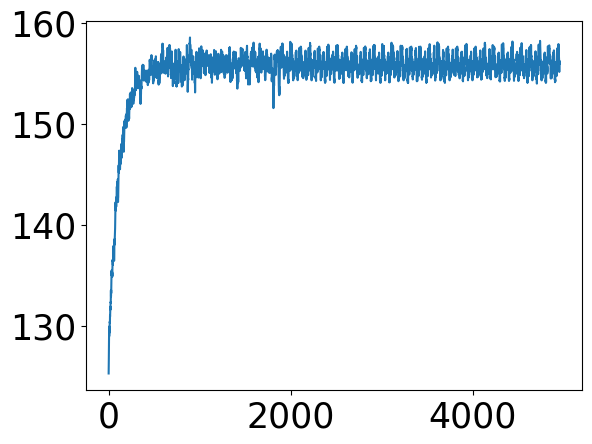

In [62]:
init_vol = pd_rgi_stats_w_hugonnet.loc['11'][f'regional_volume_m3_2020{approach}']


_t = ds_reg_yr_shift_vol.dropna(dim='year_after_2020',
                                                                        how='all').sel(year_after_2020=slice(0,sim_year)).sel(rgi_reg='11').median(dim='model_author')
# _t = _t.rolling(year_after_2020=3, center=True).mean()
_rel = _t.sel(experiments = [('ipsl-cm6a-lr', '1851-1870_hist'), ('ipsl-cm6a-lr', '1901-1920_hist'),
 ('mpi-esm1-2-hr', '1851-1870_hist'), ('mpi-esm1-2-hr', '1901-1920_hist'),
 ('mri-esm2-0', '1851-1870_hist')]).mean(dim='experiments')/init_vol
plt.plot(100*_rel)
#.sel(experiments=exp_temp_min).quantile([q1,q2],
#                                                                                                                          dim=qdims).sel(year_after_2020=slice(0,sim_year))

In [83]:
agg_reg_list = [['01', '03', '04', '05', '07', '09', '17', '19'],['02', '08', '10', '12', '16', '18'], ['13', '14', '15'], ['06'], ['11']]

In [95]:
avg_yr_int=101
exp_temp_min=0
q1=0
q2=1
sim_year=2000
exp_temp_min = ('gfdl-esm4', '1851-1870_hist')
qdims = ['model_author']

In [97]:
for agg in agg_reg_list:
    _t = ds_reg_yr_shift_vol.sel(rgi_reg=agg).sum(dim='rgi_reg').rolling(year_after_2020=avg_yr_int,
                                             center=True).mean().dropna(dim='year_after_2020',
                                                                        how='all').sel(experiments=exp_temp_min).quantile([q1,q2],
                                                                                                                          dim=qdims).sel(year_after_2020=slice(0,sim_year))

In [77]:
def fabis_get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region='global', perc=90, sim_year=500, avg_over = '3yr', smooth_values_percentiles=1,
                                                        exp_decay_temp_fit=True,
                                                         temp_above_0_8=True, landscape = True, current_deltaT = 1.2,
                                                        shift_years = False, show_slope_fit = True,
                                                        show_old_b = False, show_min_max_quantiles_a = False,
                                                              select_opt='', complex_aggregation_scheme=False):
    
    
    remove_subplot_c = True
    add_colorbar = False

    path_only_glob = ''    
    temp_ch = ''

    if shift_years and exp_decay_temp_fit:
        raise NotImplementedError
    if avg_over=='101yr':
        avg_yr_int = 101
    elif avg_over=='60yr':
        avg_yr_int = 60
    elif avg_over=='21yr':
        avg_yr_int = 21
    elif avg_over=='20yr':
        avg_yr_int = 20
    elif avg_over =='3yr':
        avg_yr_int = 3


    if temp_above_0_8:
        add= '_temp_above_0_8'
    else:
        add = ''
    if shift_years:
        p_shift = '_shift_years_rel_2020'
        xx = 'year_after_2020'
    else:
        p_shift = ''
        xx = 'simulation_year'
    

    if shift_years:
        ds_reg_models_med_vol_roll = ds_reg_yr_shift_vol_med.rolling(year_after_2020=avg_yr_int, center=True,
                                        min_periods=1).mean().dropna(dim='year_after_2020', how='all') #int(avg_yr_int/2+1)
        _ds_reg_models_vol = ds_reg_yr_shift_vol

    else:
        ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=avg_yr_int, center=True, min_periods=1).mean().dropna(dim='simulation_year', how='all')
        _ds_reg_models_vol = ds_reg_models_vol
    #.sel(simulation_year=slice(0,sim_year))

    q1=(50-perc/2)/100
    q2=(50+perc/2)/100


    plt.rc('font', size=24)  
    if not show_old_b:
        if remove_subplot_c:
            fig_cols = 2
        else:
            fig_cols = 3
        if landscape:
            fig,axs= plt.subplots(1,fig_cols,figsize=(28.5,11.5))
            add = add+'_landscape'

        else:
            fig,axs= plt.subplots(fig_cols,1,figsize=(12,34))
    else:
        if landscape:
            fig,axs= plt.subplots(1,2,figsize=(25,10))
            add = add+'_landscape'

        else:
            fig,axs= plt.subplots(2,1,figsize=(12,20))

    ax = axs[0]
    # get global temp. change
    pd_global_temp_exp_m = get_glob_temp_exp(region='global')

    if region == 'global':
        # get global glacier temp.change
        pd_global_temp_exp_m_glac = get_glob_temp_exp(region='global_glacier')
        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.sum(dim='rgi_reg')
        n_models = ''
        rgi_reg = 'global'
        rgi_reg_f = 'All'

        # ATTENTION: the initial volume should not be estimated from the rolling average
        if shift_years:
            init_vol = pd_rgi_stats_w_hugonnet.loc['Globally'][f'regional_volume_m3_2020{approach}']
        else:
            init_vol = ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg').values[0]
    else:
        # get regional glacier temp. change
        pd_global_temp_exp_m_glac = get_glob_temp_exp(region=region)
        rgi_reg = region[3:5]
        rgi_reg_f = rgi_reg
        ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.sel(rgi_reg=rgi_reg)
        # check how many glacier models have at least some estimates
        reg_glac_models = ds_reg_models.sel(rgi_reg=rgi_reg).dropna(dim='model_author', how='all').model_author
        print(reg_glac_models.values)
        n_models = len(reg_glac_models)
        n_models = f'{n_models} '
        # ATTENTION: the initial volume should not be estimated from the rolling average, or???
        if shift_years:
            init_vol = pd_rgi_stats_w_hugonnet.loc[rgi_reg][f'regional_volume_m3_2020{approach}']
        else:
            init_vol = ds_reg_models_med_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg).values[0]
    if exp_decay_temp_fit:
        #pd_exp_decay_fits_simple = pd.read_csv(f'fitted_glacier_response_to_global_temp_ch_simple_{avg_over}_avg_period{add}_current12deg.csv', index_col=0)
        pd_exp_decay_fits_simple = pd.read_csv(f'{f_path}/lowess_fits/fitted_glacier_response_to_global_temp_ch_simple{p_shift}_{avg_over}_avg_period{add}_current12deg_{sim_year}_{DATE}_ipcc_ar6.csv', index_col=[0])

        # only for exp_decay_temp_fit
        _,_,a,b = pd_exp_decay_fits_simple.loc[(pd_exp_decay_fits_simple.rgi_reg==rgi_reg_f)&(pd_exp_decay_fits_simple.year==5000)].values.squeeze()
        pd_global_temp_exp_m['fitted_vol_ch'] = a*np.exp(-b*(pd_global_temp_exp_m['temp_ch_ipcc']-current_deltaT))
        if temp_above_0_8:
            # don't plot above 0°C
            pd_global_temp_exp_m.loc[pd_global_temp_exp_m.temp_ch_ipcc<=0.8, 'fitted_vol_ch'] = np.NaN

    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments pd_global_temp_exp_m_glac
                                                                                                 'temp_ch_ipcc']))

    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc_glacier = ('experiments',
                                                                          pd_global_temp_exp_m_glac.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments pd_global_temp_exp_m_glac
                                                                                                 'temp_ch_ipcc']))


    # need that to have both volume_m3 and temp_ch_ipcc as variables
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.reset_coords()
    ds_reg_models_med_vol_sel['relative volume change (in %)'] = 100*ds_reg_models_med_vol_sel.volume_m3/init_vol
    #print(ds_reg_models_med_vol_sel)
    pd_t =ds_reg_models_med_vol_sel.to_dataframe()
    try:
        pd_t = pd_t.drop(columns=['gcm','period_scenario'])
    except:
        pass
    pd_t = pd_t.reset_index()
    #pd_t['volume (km3)'] = pd_t['volume_m3']/1e9
    
    # due to the colorscale issue, I prefer to do a for-loop, to really be sure to have the right color:
    data_all = pd_t.loc[pd_t[xx]<sim_year]
    
    for t in pd_t['temp_ch_ipcc'].unique():
        data = data_all.loc[data_all.temp_ch_ipcc == t]
        c=cmap(scaler.transform(np.array(t).reshape(-1,1))).squeeze()
        ax.plot(data[xx], data['relative volume change (in %)'], color=c,
                 lw=0.7, alpha =0.8)
        if t == pd_t['temp_ch_ipcc'].unique()[0]:
            c0 = c
        elif t == pd_t['temp_ch_ipcc'].unique()[-1]:
            c1 = c
        
    #g = sns.lineplot(ax=ax,
    #             data=pd_t.loc[pd_t[xx]<sim_year], #-avg_yr_int/2],
    #             x=xx,
    #             y='relative volume change (in %)', #'volume (km3)',
    #            hue='temp_ch_ipcc', palette='flare',legend=False,lw=0.7, alpha = 0.7);

    ##  colormap  already created before ... 
    #norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
    #                     vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
    #cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
    #sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    #sm.set_array([])
    if add_colorbar:
        if landscape:
            cax = fig.add_axes([ax.get_position().x1-0.035, ax.get_position().y0+0.507, 0.02, ax.get_position().height / 4])
        else:
            cax = fig.add_axes([ax.get_position().x1-0.12, ax.get_position().y0+0.015, 0.02, ax.get_position().height / 1.8])
        cbar = ax.figure.colorbar(sm, cax=cax)

        cbar.ax.invert_yaxis()
        # we don't want to show the values below the minimum 
        cbar.ax.set_ylim(glob_temp_ch.max(),glob_temp_ch.min())
        #cbar.set_ticks([0,1.5,2.0,3.0,4.0])
        cbar.set_ticks([0,2,4,6])

        cbar.ax.set_title(r'$\Delta$T'+'\n(°C)', fontsize=20) #,loc='top',rotation='horizontal', labelpad=5)


    # plot specific delta T:
    col_temp_l = []
    exp_l = []
    deltaT_sel_l = []
    for deltaT in [0.0,#1.2, for 1.2 there are no real experiments nearby ... 
                   1.5,2.0,3.0,4.0]:
        #if deltaT == 1.5 or deltaT == 0.0:
        #    t_range = 0.1
        #else:
        #    t_range = 0.2
        # decided for 0.15 to m
        t_range = 0.2 #15
        if select_opt=='nearest':
            exp_sel = np.abs(ds_reg_models_med_vol_sel.temp_ch_ipcc - deltaT).idxmin()
            _deltaT_sel = ds_reg_models_med_vol_sel.sel(experiments = exp_sel)
            n_deltaT =1
        else:
            _deltaT_sel = ds_reg_models_med_vol_sel.where((ds_reg_models_med_vol_sel.temp_ch_ipcc>deltaT-t_range) & 
                                                      (ds_reg_models_med_vol_sel.temp_ch_ipcc<deltaT+t_range)).dropna(dim='experiments')
            n_deltaT=len(_deltaT_sel.experiments)
            _deltaT_sel = _deltaT_sel.mean(dim='experiments')
        print(deltaT, n_deltaT, _deltaT_sel.temp_ch_ipcc.mean().values)
        # even if it is only roughly matched, we prefer to label it to 0,1.5,2,3,4 ... 
        _deltaT_sel['temp_ch_ipcc'] = deltaT
        #col_temp = cmap(sm.colorbar.norm(deltaT))
        col_temp=cmap(scaler.transform(np.array(deltaT).reshape(-1,1))).squeeze()

        col_temp_l.append(col_temp)
        deltaT_sel_l.append(_deltaT_sel)
        if shift_years:
            vals = _deltaT_sel['relative volume change (in %)'].isel(year_after_2020=-1).values
        else:
            vals = _deltaT_sel['relative volume change (in %)'].isel(simulation_year=-1).values
        print(vals)
        ax.text(sim_year+1,vals,
                f'{deltaT:.1f}°C', color=col_temp,
                va='center',
               fontsize=18)


    pd_t_sel = xr.concat(deltaT_sel_l, dim='temp_ch_ipcc').to_dataframe()
    #for temp in [0,1.5,2,3,4,5]: #,5,6]:
    #    exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
    #    col_temp = cmap(sm.colorbar.norm(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
    #    col_temp_l.append(col_temp)
    #    exp_l.append(exp)
    #pd_t_sel =ds_reg_models_med_vol_sel.sel(experiments=exp_l).to_dataframe()
    #pd_t_sel = pd_t_sel.drop(columns=['gcm','period_scenario'])
    pd_t_sel = pd_t_sel.reset_index()
    #pd_t_sel['volume (km3)'] = pd_t_sel['volume_m3']/1e9
    # due to the colorscale issue, I prefer to do a for-loop, to really be sure to have the right color:
    data_all = pd_t_sel.loc[pd_t_sel[xx]<sim_year]
    
    for t in pd_t_sel['temp_ch_ipcc'].unique():
        data = data_all.loc[data_all.temp_ch_ipcc == t]
        c=cmap(scaler.transform(np.array(t).reshape(-1,1))).squeeze()
        ax.plot(data[xx], data['relative volume change (in %)'], color=c,
                 lw=5, ls ='--')
    
    #l_sel = sns.lineplot(ax=ax,
    #             data=pd_t_sel.loc[pd_t_sel[xx]<sim_year], #pd_t_sel.loc[pd_t_sel.simulation_year<sim_year], #-avg_yr_int/2],
    #             x=xx,
    #             y='relative volume change (in %)', #'volume (km3)',
    #             hue='temp_ch_ipcc', palette=sns.color_palette(col_temp_l),
    #             legend='auto',lw=5, ls='--');

    # Add the line levels to the colorbar (this does not work)
    #cbar.add_lines([0,1.5,2,3,4], linewidths=[5,5,5,5,5], #linestyles='--',
    #               colors=col_temp_l)
    #ax.legend(loc='upper right', bbox_to_anchor=(1,1), markerscale=1, handleheight=0.8)
    #leg = ax.get_legend()
    #for j,t in enumerate(leg.texts):
    #    # truncate label text to 4 characters
    #    if j ==1:
    #        t.set_text(np.round(float(t.get_text()),1))
    #    else:
    #        t.set_text(np.round(float(t.get_text()),0))
    # set the linewidth of each legend object
    #for legobj in leg.legend_handles:
    #    legobj.set_linewidth(4.0)
    #    legobj.set_linestyle('--')
    #g.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1)
    if show_min_max_quantiles_a:
        exp_temp_min = np.array([ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmin()])
    else:
        deltaT = 0  
        if select_opt=='nearest':
            exp_temp_min = np.abs(ds_reg_models_med_vol_sel.temp_ch_ipcc - deltaT).idxmin()
            #_deltaT_sel = ds_reg_models_med_vol_sel.sel(experiments = exp_sel)
            qdims = ['model_author']
        else:
            t_range = 0.2
            condi = (ds_reg_models_med_vol_sel.temp_ch_ipcc>deltaT-t_range) & (ds_reg_models_med_vol_sel.temp_ch_ipcc<deltaT+t_range)
            exp_temp_min = ds_reg_models_med_vol_sel.temp_ch_ipcc.where(condi).dropna(dim='experiments').experiments
            qdims = ['model_author','experiments']
        print(exp_temp_min.values)

    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    if shift_years:
        q1_2_min = _ds_reg_models_vol.rolling(year_after_2020=avg_yr_int,
                                             center=True).mean().dropna(dim='year_after_2020',
                                                                        how='all').sel(experiments=exp_temp_min).quantile([q1,q2],
                                                                                                                          dim=qdims).sel(year_after_2020=slice(0,sim_year))
    else:
        q1_2_min = _ds_reg_models_vol.rolling(simulation_year=avg_yr_int,
                                             center=True).mean().dropna(dim='simulation_year',
                                                                        how='all').sel(experiments=exp_temp_min).quantile([q1,q2],
                                                                                                                          dim=qdims).sel(simulation_year=slice(0,sim_year))
    if region == 'global':
        q1_2_min_glob = q1_2_min.sum(dim='rgi_reg')
        if shift_years:
            q1_2_min_init = _ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([q1,q2],dim=qdims).isel(year_after_2020=0).sum(dim='rgi_reg')
        else:
            q1_2_min_init = _ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([q1,q2],dim=qdims).isel(simulation_year=0).sum(dim='rgi_reg')

    else:
        q1_2_min_glob = q1_2_min.sel(rgi_reg=rgi_reg)
        if shift_years:
            q1_2_min_init = _ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([q1,q2], dim=qdims).isel(year_after_2020=0).sel(rgi_reg=rgi_reg)
        else:
            q1_2_min_init = _ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([q1,q2], dim=qdims).isel(simulation_year=0).sel(rgi_reg=rgi_reg)

    # do not divide by minimum, but by init_vol!!!
    # q1_2_min_glob = (100*q1_2_min_glob/q1_2_min_init)
    q1_2_min_glob = (100*q1_2_min_glob/init_vol)
    

    ax.fill_between(q1_2_min_glob[xx],
             q1_2_min_glob.sel(quantile=q1), q1_2_min_glob.sel(quantile=q2), alpha = 0.1, color=c0, zorder=0)
    #handles, labels = ax.get_legend_handles_labels()
    #t = plt.legend(handles, labels)
    #ax.add_artist(leg)
    if show_min_max_quantiles_a:
        exp_temp_max = [ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmax()]
    else:
        deltaT = 4    
        if select_opt == 'nearest':
            exp_temp_max = np.abs(ds_reg_models_med_vol_sel.temp_ch_ipcc - deltaT).idxmin()
            #_deltaT_sel = ds_reg_models_med_vol_sel.sel(experiments = exp_sel)
            qdims = ['model_author']
        else:
            t_range = 0.2
            condi = (ds_reg_models_med_vol_sel.temp_ch_ipcc>deltaT-t_range) & (ds_reg_models_med_vol_sel.temp_ch_ipcc<deltaT+t_range)
            exp_temp_max = ds_reg_models_med_vol_sel.temp_ch_ipcc.where(condi).dropna(dim='experiments').experiments
            qdims = ['model_author','experiments']
        #print(exp_temp_max.values)
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    if shift_years:
        q1_2_max = _ds_reg_models_vol.rolling(year_after_2020=avg_yr_int,
                                         center=True).mean().dropna(dim='year_after_2020', how='all').sel(experiments=exp_temp_max).quantile([q1,q2],
                                         dim=qdims).sel(year_after_2020=slice(0,sim_year))
    else:
        q1_2_max = _ds_reg_models_vol.rolling(simulation_year=avg_yr_int,
                                         center=True).mean().dropna(dim='simulation_year', how='all').sel(experiments=exp_temp_max).quantile([q1,q2],
                                         dim=qdims).sel(simulation_year=slice(0,sim_year))
    if region == 'global':
        q1_2_max_glob = q1_2_max.sum(dim='rgi_reg')
        if shift_years:
            q1_2_max_init =_ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([q1,q2], dim=qdims).isel(year_after_2020=0).sum(dim='rgi_reg')    
        else:
            q1_2_max_init =_ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([q1,q2],dim=qdims).isel(simulation_year=0).sum(dim='rgi_reg')
    else:
        q1_2_max_glob = q1_2_max.sel(rgi_reg=rgi_reg)
        if shift_years:
            q1_2_max_init =_ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([q1,q2], dim=qdims).isel(year_after_2020=0).sel(rgi_reg=rgi_reg)
        else:
            q1_2_max_init =_ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([q1,q2], dim=qdims).isel(simulation_year=0).sel(rgi_reg=rgi_reg)

    # do not divide by minimum, but by init_vol!!!
    # q1_2_max_glob = (100*q1_2_max_glob/q1_2_min_init)
    q1_2_max_glob = (100*q1_2_max_glob/init_vol)
    
    #print( q1_2_min_glob, q1_2_max_glob)
    ax.fill_between(q1_2_max_glob[xx],
             q1_2_max_glob.sel(quantile=q1), q1_2_max_glob.sel(quantile=q2), alpha = 0.1, color=c1, zorder=0);
        
    if shift_years:
        ax.set_xlabel('Simulation year', # after 2020', (this is confusing (we just remove it 
                      fontsize=26)
        if region == 'global':
            ax.set_ylabel(f'Global glacier mass (% rel. to 2020)', fontsize=26) #, relative to initial state, {avg_yr_int}-yr average)')
        else:
            ax.set_ylabel(f'RGI{rgi_reg} glacier mass (% rel. to 2020)', fontsize=26) #, relative to initial state, {avg_yr_int}-yr average)')
    else:
        ax.set_xlabel('Simulation year')
        if region == 'global':
            ax.set_ylabel(f'Global glacier mass (% rel. to Farinotti)') #, relative to initial state, {avg_yr_int}-yr average)')
        else:
            ax.set_ylabel(f'RGI{rgi_reg} glacier mass (% rel. to Farinotti)') #, relative to initial state, {avg_yr_int}-yr average)')
    #ax.legend(loc='upper left', bbox_to_anchor=(1.01,0.98))
    #leg = ax.get_legend()
    #leg.loc('upper right')
    #leg.set_title(r'$\Delta$T$_{global} (°C)'+f'\n(global)')

    # add additional legend for glacier model uncertatinties and other things ... 
    #define patches and lines to add to legend
    #patch_min = mpatches.Patch(label=f'{perc}th %-ile minimum temperature',  alpha = 0.2, color=l.lines[0].get_color())
    if not show_min_max_quantiles_a:
        label_quantiles = f'for $\Delta$T=0.0°C & $\Delta$T=4.0°C'
    else:
        label_quantiles = 'for minimum & maximum '+r'$\Delta$T'
    if perc==100:
        patch_max = mpatches.Patch(label=f'range of glacier models\n{label_quantiles}',  alpha = 0.2, color='grey') # RH% removed total range
    else:
        patch_max = mpatches.Patch(label=f'{perc}th %-ile of glacier models\n{label_quantiles}',  alpha = 0.2, color='grey')
    line1 = Line2D([0], [0], label=r"glacier models' median at $\Delta$T (n=80)", color='black', lw=1, alpha = 0.7)
    line2 = Line2D([0], [0], label=r'median at $\Delta$T$\pm$'+f'{t_range}°C', #\pm$0.25°C', %%% RH removed selected
                   color='black', lw=5, alpha = 0.8, ls = '--')
    #add handles
    handles= [line1, line2, patch_max]
    #add legend
    if add_colorbar:
        ax.legend(handles=handles, loc='upper left',
                  bbox_to_anchor = (0.1,1),fontsize=22, title_fontsize=24) #, bbox_to_anchor=(0.1,1))
    else:
        ax.legend(handles=handles, loc = 'upper left', #loc='upper left',
                  bbox_to_anchor = (0.1,1),fontsize=22) #, bbox_to_anchor=(0.1,1))
    #ax.add_artist(leg)

    #if region == 'global':
    #    ax.set_title(f'Global glacier volume equilibration experiments')
    #else:
    #    ax.set_title(f'RGI{rgi_reg} glacier volume equilibration experiments')
    if sim_year == 2000:
        if add_colorbar:
            ax.set_xlim(-8, 2000*1.11)
        else:
            ax.set_xlim(-8, 2000*1.08)
        ax.set_xticks(np.arange(0,2100,500),np.arange(0,2100,500))
    elif sim_year == 500:
        ax.set_xlim(-2, 500*1.11)
        ax.set_xticks(np.arange(0,550,100),np.arange(0,550,100))
    else:
        ax.set_xlim(-20, 5000*1.11)
        ax.set_xticks(np.arange(0,5100,1000),np.arange(0,5100,1000))
        
    # ax.set_ylim([-1,165])
    if add_colorbar:
        if region == 'global':
            ax.set_ylim([0,165])
    else:
        for deltaT_t in ['min_t', 'max_t']:
            if deltaT_t == 'min_t':
                deltaT = ds_reg_models_med_vol_sel.temp_ch_ipcc.min().values
            else:
                deltaT = ds_reg_models_med_vol_sel.temp_ch_ipcc.max().values
            exp_sel = ds_reg_models_med_vol_sel.where(ds_reg_models_med_vol_sel.temp_ch_ipcc == deltaT).dropna(dim='experiments').experiments
            _deltaT_sel = ds_reg_models_med_vol_sel.sel(experiments = exp_sel)
            #print(deltaT, n_deltaT, _deltaT_sel.temp_ch_ipcc.mean().values)
            # even if it is only roughly matched, we prefer to label it to 0,1.5,2,3,4 ... 
            #_deltaT_sel['temp_ch_ipcc'] = deltaT
            #col_temp = cmap(sm.colorbar.norm(deltaT))
            col_temp=cmap(scaler.transform(np.array(deltaT).reshape(-1,1))).squeeze()
            if shift_years:
                vals = _deltaT_sel['relative volume change (in %)'].isel(year_after_2020=-1).values
            else:
                vals = _deltaT_sel['relative volume change (in %)'].isel(simulation_year=-1).values
            print(deltaT_t, exp_sel, _deltaT_sel, vals)

            ax.text(sim_year+1,vals,
                    f'{deltaT:.1f}°C', color=col_temp,
                    va='center',
                   fontsize=16)
    if region == 'global':
        ax.set_ylim([0,170])
    ###########################################
    # from here on we look at 100 year averages
    avg_yr_int = 101
    sim_year=5000 # from here on we want to look into the 5000yr stuff!!! 
    ax=axs[1]
    if not show_old_b:
        # for steady state  the avg_over is 101!!! , and sim_year 5000
        print(f'{f_path}lowess_fits/fitted_lowess_best_frac{p_shift}_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_{DATE}{path_only_glob}_ipcc_ar6.csv')
        pd_sel = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess_best_frac{p_shift}_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_{DATE}{path_only_glob}_ipcc_ar6.csv', index_col=[0])
        pd_exp_decay_fits_simple = pd.read_csv(f'{f_path}lowess_fits/fitted_glacier_response_to_global_temp_ch_simple{p_shift}_101yr_avg_period_lowess_added_quantiles_added_current12deg_5000_{DATE}{path_only_glob}_ipcc_ar6.csv', index_col=[0])
        pd_exp_decay_fits_simple = pd_exp_decay_fits_simple.loc[pd_exp_decay_fits_simple.year == sim_year]
        
        func_subplot_warming_scatter(ax, rgi_reg=rgi_reg_f, fig_1b=True, show_leg2_in_subplot=False,  path_only_glob=path_only_glob,
                                    pd_sel=pd_sel, pd_exp_decay_fits_simple=pd_exp_decay_fits_simple,complex_aggregation_scheme=complex_aggregation_scheme)
        if show_slope_fit and shift_years:
            pd_lowess_fit_sel = pd_lowess_fit.loc[(pd_lowess_fit.region == rgi_reg_f) & (pd_lowess_fit.year==5000)]
            # globally, 2 %  can be saved for every tenth of a degree between 1.5 and 3°C !!!
            temp_sensitivity = (pd_lowess_fit_sel.loc[1.5]['0.5'] - pd_lowess_fit_sel.loc[3.0]['0.5'])/(3-1.5)/10 # every tenth of a degree
            temp_sensitivity = temp_sensitivity.round(1)
            #pd_t_sel_1o5_3 = pd_t.loc[(pd_t.temp_ch_ipcc>=1.5) & (pd_t.temp_ch_ipcc<=3)]
            #pd_t_sel_1o5_3 = pd_t_sel_1o5_3.loc[pd_t_sel_1o5_3[xx]==int(sim_year-avg_yr_int/2+1)]
            #slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_t_sel_1o5_3['temp_ch_ipcc'].values, pd_t_sel_1o5_3['relative volume change (in %)'])
            #ax.plot(pd_t_sel_1o5_3['temp_ch_ipcc'], slope*pd_t_sel_1o5_3['temp_ch_ipcc'].values + intercept, color = 'black', alpha = 0.7, lw=4)
            #ax.plot([1.5,3.0], [pd_lowess_fit_sel.loc[1.5]['0.5'], pd_lowess_fit_sel.loc[3.0]['0.5']], color = 'black', alpha = 0.7, lw=4)
            # 2.25 in the middle (as linear fit: pd_lowess_fit_sel.loc[1.5]['0.5']- (pd_lowess_fit_sel.loc[1.5]['0.5']-pd_lowess_fit_sel.loc[3.0]['0.5'])/2
            two_deg = pd_lowess_fit_sel.loc[2.25]['0.5'] #['0.5']- (pd_lowess_fit_sel.loc[1.5]['0.5']-pd_lowess_fit_sel.loc[3.0]['0.5'])/2 # pd_lowess_fit_sel.loc[2]['0.5']
            if rgi_reg not in ['01','04','03','05','14','17','19','13']: #global
                ax.text(1.51, 97, 
                        f'{temp_sensitivity}% additional\nmass loss for\nevery tenth of\ndegree global\nwarming',
                        va='bottom', ha = 'left', fontsize=24) #, arrowprops=dict(arrowstyle='<->', lw=2))
                ax.annotate('', #{temp_sensitivity}% additional\nmass loss for\nevery tenth of\ndegree global warming',
                            xy=(1.5, 95), xytext=(3.0, 95),
                            arrowprops=dict(arrowstyle='<->', lw=2), alpha = 0.8)
                #ax.annotate(f'{temp_sensitivity}% additional mass\nloss for every tenth of\ndegree global warming\n'+r'(in $\Delta$T=1.5-3.0°C range)',
                #            xy=(2.25,two_deg*1.05),xytext=(3.3,52),
                #            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black',
                #            alpha=0.95, fontsize=26)
            elif rgi_reg in ['13']:
                ax.annotate(f'{temp_sensitivity}% additional mass\nloss for every tenth of\ndegree global warming\n'+r'(in $\Delta$T=1.5-3.0°C range)',
                            xy=(2.25,two_deg),xytext=(3.1,70),
                            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black',
                            alpha=0.95, fontsize=24)
            else:
                ax.annotate(f'{temp_sensitivity}% additional mass\nloss for every tenth of\ndegree global warming\n'+r'(in $\Delta$T=1.5-3.0°C range)',
                            xy=(2.25,two_deg),xytext=(-0.4,-0.9),
                            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black', 
                            alpha=0.95, fontsize=24)
        ax.set_xlabel(r'$\Delta$T (°C)', fontsize=26)
        if shift_years:
            sim_year=5000-50 # from here on we want to look into the 5000yr stuff!!! 
            if region == 'global':
                ax.set_ylabel(f'Steady-state global glacier mass\n(% rel. to 2020)', fontsize=26) #'\n(in %, relative to initial state, {avg_yr_int}-yr average)')
            else:
                ax.set_ylabel(f'Steady-state RGI{rgi_reg} glacier mass\n(% rel. to 2020)', fontsize=26) #\n(in %, relative to initial state, {avg_yr_int}-yr average)')
        else:
            if region == 'global':
                ax.set_ylabel(f'Steady-state global glacier mass (%)', fontsize=26) #'\n(in %, relative to initial state, {avg_yr_int}-yr average)')
            else:
                ax.set_ylabel(f'Steady-state RGI{rgi_reg} glacier mass (%)', fontsize=26) #\n(in %, relative to initial state, {avg_yr_int}-yr average)')
        ax0_ylim0, ax0_ylim1 = axs[0].get_ylim()
        ax.set_ylim([ax0_ylim0, ax0_ylim1])

            
    if region!='global':
        axs[0].set_ylim(axs[1].get_ylim())
    else:
        axs[1].set_ylim(axs[0].get_ylim())
    ################ 3rd inset subplot ##############
    #plt.tight_layout()
    if not remove_subplot_c:
        if not show_old_b:
            ax = axs[2]
            ax.set_axis_off()
            ax.set_yticks(ticks=[0,25,50,75,100,125, 150],
                           labels=[0,25,50,75,100,125, 150], alpha=0, fontsize=1)
            inset_ax = inset_axes(ax,
                                width="36%", # width = 30% of parent_bbox
                                height="46%", # height : 1 inch
                                loc='upper left',
                                bbox_to_anchor=(-0.03, 0, 1, 1),
                                bbox_transform=ax.transAxes
                                #loc='upper left',
                                #bbox_to_anchor=(0.1,1)
                                   )
        else:
            inset_ax = inset_axes(ax,
                                width="38%", # width = 30% of parent_bbox
                                height="48%", # height : 1 inch
                                loc='upper right'
                                   #bbox_to_anchor=(1,)
                                   )
        sns.scatterplot(data=pd_t, ax = inset_ax,
                        x='temp_ch_ipcc', y='temp_ch_ipcc_glacier',
                        color='black', alpha = 0.3,
                        #hue='temp_ch_ipcc', palette='flare',
                        legend=False)
        #inset_axes.set_title(f'Glacier area-weighted vs global\n'+r'temperature changes ($\Delta$T)'+'\ncompared to preindustrial levels')
        inset_ax.set_xlabel(r'$\Delta$T (°C)')# + '\n(°C, compared to pre-industrial levels)')
        if region == 'global':
            inset_ax.set_ylabel(r'$\Delta$T$_{g}$ (°C)'+'\n(area-weighted)')
        else:
            inset_ax.set_ylabel(r'$\Delta$T$_{g}$ '+f'RGI{rgi_reg} (°C)\n(area-weighted)')
        inset_ax.grid(alpha=0.5)
        # add linear fit
        slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_t['temp_ch_ipcc'].values, pd_t['temp_ch_ipcc_glacier'])
        inset_ax.plot(pd_t['temp_ch_ipcc'], slope*pd_t['temp_ch_ipcc'].values + intercept, 
                      color = 'black', alpha = 0.5, lw=4)
        ratio = np.median(pd_t['temp_ch_ipcc_glacier'].values/pd_t['temp_ch_ipcc'].values)
        print('ratio:', ratio, 'slope:' , slope)
        if region == 'global':
            inset_ax.annotate(f'median ratio:\n{ratio:.1f}°C '+r'$\Delta$T$_{g}$'+'\nper 1.0°C '+r'$\Delta$T$_{global}$', # show the median ratio instead
                              xy=(3,slope*3 + intercept),
                              xytext=(4-2+0.2,slope*4 + intercept-8),
                              fontsize = 18,
                              arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)
        else:
            inset_ax.annotate(f'median ratio:\n{ratio:.1f}°C '+r'$\Delta$T$_{g}$'+f'\nRGI{rgi_reg} per'+'\n1.0°C '+r'$\Delta$T$_{global}$',  # show the median ratio instead
                              xy=(3,slope*3 + intercept),
                              xytext=(0.4,0.04),    #(4-2,slope*4 + intercept-8),
                              textcoords='axes fraction', fontsize=19,
                       arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)

        inset_ax.set_aspect('equal')
        ylim0,ylim1 = inset_ax.get_ylim()
        xlim0,xlim1 = inset_ax.get_xlim()
        lim0 = min(ylim0, xlim0)
        lim1 = max(ylim1, xlim1)
        inset_ax.set_xlim([lim0, lim1])
        inset_ax.set_ylim([lim0, lim1])

        inset_ax.set_xticks(np.arange(0,lim1,2))
        inset_ax.set_yticks(np.arange(0,lim1,2))
        #inset_ax.add_artist(Line2D([pd_t.temp_ch_ipcc_glacier.min(), pd_t.temp_ch_ipcc_glacier.max()],
        #                           [pd_t.temp_ch_ipcc_glacier.min(), pd_t.temp_ch_ipcc_glacier.max()], color='grey'))

    # add a,b,c
    num_text_x = 0.007
    for j,axi in enumerate([axs[0],axs[1]]): # , inset_ax
        if j <2:
            num_text_y = 0.94
        else:
            num_text_y = 0.88
        axi.text(num_text_x, num_text_y,
                 num_dict[j], fontsize=30, transform=axi.transAxes)


    if region == 'global':
        for ax in axs[:2]:
            #ax.set_ylabel('Glacier volume (in %)')
            ax.set_yticks(np.arange(0,160,25),np.arange(0,160,25))
    for j,ax in enumerate(axs): 
        ax.minorticks_on()
        if j==1:
            ax.set_xticks(np.arange(0.5,6.9,1), minor=True)
        else:
            ax.set_xticks(np.arange(0,2000,100), minor=True)
        ax.tick_params(axis='both', which='major', width=2, length=7)
        ax.tick_params(axis='both', which='minor', width=1, length=5)
        #from matplotlib.ticker import MultipleLocator
        #minorx_locator = MultipleLocator(1)  # 1° difference 
        #ax.xaxis.set_minor_locator(minorx_locator)
        #minory_locator = MultipleLocator(10)  # 1° difference 
        #ax.yaxis.set_minor_locator(minory_locator)
    
    axs[1].axvline(1.5, ls=':', color='grey', lw=1, alpha =0.7)
    axs[1].axvline(3.0, ls=':', color='grey', lw=1, alpha =0.7)

    
    #plt.tight_layout()
    #plt.savefig(f'/home/www/lschuster/glacierMIP3_analysis/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait.png', bbox_inches='tight')
    if exp_decay_temp_fit:
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch{p_shift}_{perc}percentile_portrait_{sim_year}yr_exp_decay_temp_fit{add}_{avg_over}avg_{DATE}.png',
                    bbox_inches='tight')
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch{p_shift}_{perc}percentile_portrait_{sim_year}yr_exp_decay_temp_fit{add}_{avg_over}avg_{DATE}.pdf',
                    bbox_inches='tight')

    else:
        if select_opt == 'nearest':
            n ='nearest'
        else:
            n = ''
        if complex_aggregation_scheme:
            n +='_complex_unc_agg'
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch{p_shift}_{perc}percentile_portrait_{sim_year}yr_slope_{avg_over}avg_{n}{DATE}.png', bbox_inches='tight')
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch{p_shift}_{perc}percentile_portrait_{sim_year}yr_slope_{avg_over}avg_{n}{DATE}.pdf', bbox_inches='tight')


In [ ]:
ds_

0.0 5 0.020107092206236098
102.50029193220601
1.5 14 1.5970631102397388
49.25371661171592
2.0 12 2.0838111906835044
35.242745718704995
3.0 7 2.964579003110285
23.91224673868907
4.0 4 3.990951133436012
17.348246831491494
[('ipsl-cm6a-lr', '1851-1870_hist') ('ipsl-cm6a-lr', '1901-1920_hist')
 ('mpi-esm1-2-hr', '1851-1870_hist') ('mpi-esm1-2-hr', '1901-1920_hist')
 ('mri-esm2-0', '1851-1870_hist')]


/home/users/lschuster/mambaforge/envs/oggm_gmip3/lib/python3.11/site-packages/xarray/core/dataset.py:4789: UserWarning: No index created for dimension temp_ch_ipcc because variable temp_ch_ipcc is not a coordinate. To create an index for temp_ch_ipcc, please first call `.set_coords('temp_ch_ipcc')` on this object.
  warnings.warn(


min_t <xarray.DataArray 'experiments' (experiments: 1)> Size: 8B
array([('ipsl-cm6a-lr', '1901-1920_hist')], dtype=object)
Coordinates:
  * experiments      (experiments) object 8B MultiIndex
  * gcm              (experiments) <U13 52B 'ipsl-cm6a-lr'
  * period_scenario  (experiments) <U16 64B '1901-1920_hist' <xarray.Dataset> Size: 119kB
Dimensions:                        (year_after_2020: 4951, experiments: 1)
Coordinates:
  * year_after_2020                (year_after_2020) float64 40kB 0.0 ... 4.9...
  * experiments                    (experiments) object 8B MultiIndex
  * gcm                            (experiments) <U13 52B 'ipsl-cm6a-lr'
  * period_scenario                (experiments) <U16 64B '1901-1920_hist'
Data variables:
    temp_ch_ipcc                   (experiments) float64 8B -0.1435
    temp_ch_ipcc_glacier           (experiments) float64 8B -0.9616
    volume_m3                      (year_after_2020, experiments) float64 40kB ...
    relative volume change (in %)  (y

/tmp/ipykernel_3652885/2392940483.py:457: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, '0.5'].round(0)) #c_opt
/tmp/ipykernel_3652885/2392940483.py:457: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, '0.5'].round(0)) #c_opt


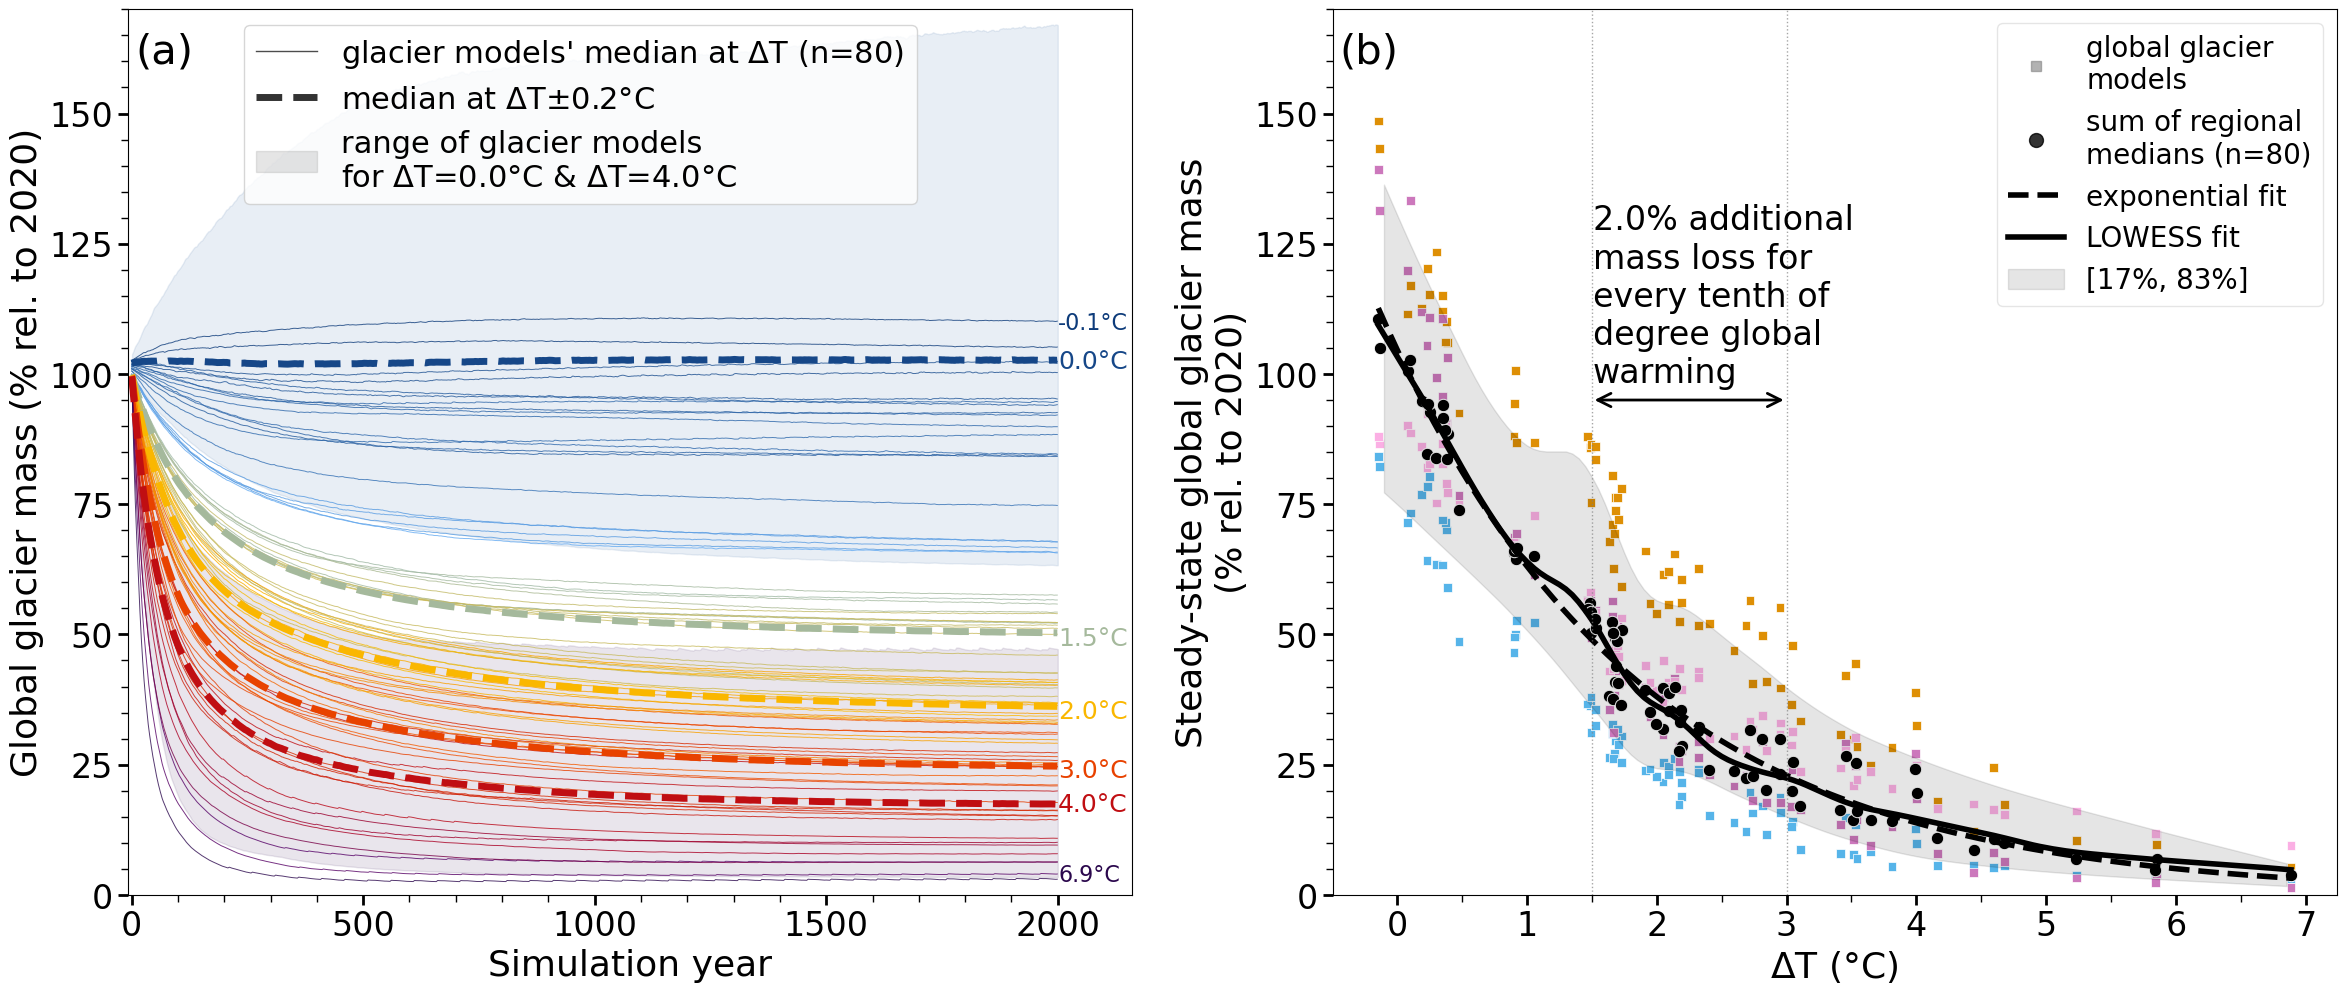

In [78]:
only_90perc = True
show_text = False
fabis_get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region='global', perc=100, sim_year=2000, 
                                                     avg_over = '3yr', # it almost makes no difference fo rthe steady state, but is better for year 0 ...
                                                     smooth_values_percentiles=1,
                                                    exp_decay_temp_fit=False, temp_above_0_8=False,
                                                     shift_years=True,
                                                     landscape = True, show_slope_fit=True, 
                                                    show_min_max_quantiles_a=False, select_opt='', complex_aggregation_scheme=True)

0.0 5 0.020107092206236098
102.50029193220601
1.5 14 1.5970631102397388
49.25371661171592
2.0 12 2.0838111906835044
35.242745718704995
3.0 7 2.964579003110285
23.91224673868907
4.0 4 3.990951133436012
17.348246831491494
[('ipsl-cm6a-lr', '1851-1870_hist') ('ipsl-cm6a-lr', '1901-1920_hist')
 ('mpi-esm1-2-hr', '1851-1870_hist') ('mpi-esm1-2-hr', '1901-1920_hist')
 ('mri-esm2-0', '1851-1870_hist')]


/home/users/lschuster/mambaforge/envs/oggm_gmip3/lib/python3.11/site-packages/xarray/core/dataset.py:4789: UserWarning: No index created for dimension temp_ch_ipcc because variable temp_ch_ipcc is not a coordinate. To create an index for temp_ch_ipcc, please first call `.set_coords('temp_ch_ipcc')` on this object.
  warnings.warn(


min_t <xarray.DataArray 'experiments' (experiments: 1)> Size: 8B
array([('ipsl-cm6a-lr', '1901-1920_hist')], dtype=object)
Coordinates:
  * experiments      (experiments) object 8B MultiIndex
  * gcm              (experiments) <U13 52B 'ipsl-cm6a-lr'
  * period_scenario  (experiments) <U16 64B '1901-1920_hist' <xarray.Dataset> Size: 119kB
Dimensions:                        (year_after_2020: 4951, experiments: 1)
Coordinates:
  * year_after_2020                (year_after_2020) float64 40kB 0.0 ... 4.9...
  * experiments                    (experiments) object 8B MultiIndex
  * gcm                            (experiments) <U13 52B 'ipsl-cm6a-lr'
  * period_scenario                (experiments) <U16 64B '1901-1920_hist'
Data variables:
    temp_ch_ipcc                   (experiments) float64 8B -0.1435
    temp_ch_ipcc_glacier           (experiments) float64 8B -0.9616
    volume_m3                      (year_after_2020, experiments) float64 40kB ...
    relative volume change (in %)  (y

/tmp/ipykernel_3652885/2392940483.py:457: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, '0.5'].round(0)) #c_opt
/tmp/ipykernel_3652885/2392940483.py:457: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, '0.5'].round(0)) #c_opt


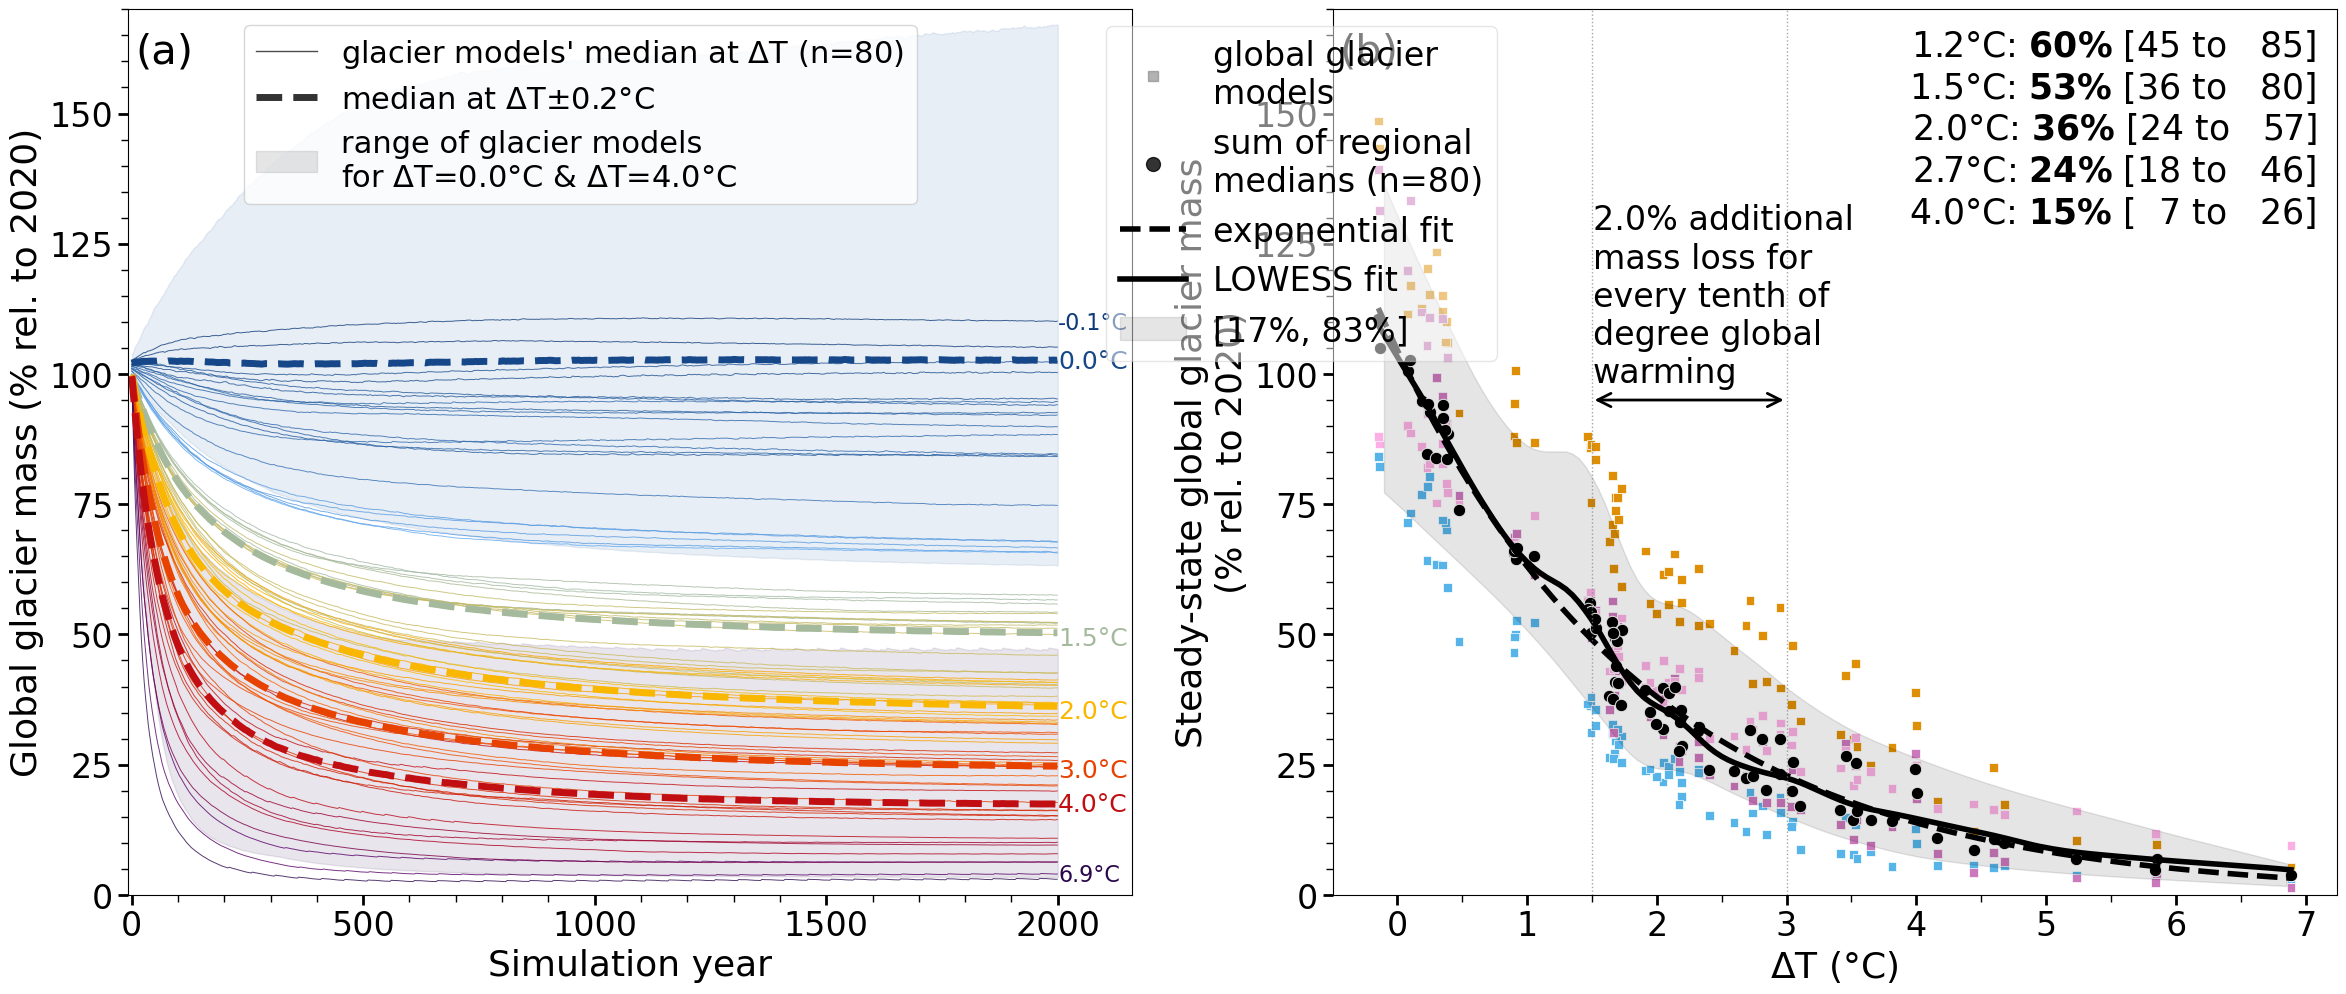

In [79]:
only_90perc = True
show_text = True
fabis_get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region='global', perc=100, sim_year=2000, 
                                                     avg_over = '3yr', # it almost makes no difference fo rthe steady state, but is better for year 0 ...
                                                     smooth_values_percentiles=1,
                                                    exp_decay_temp_fit=False, temp_above_0_8=False,
                                                     shift_years=True,
                                                     landscape = True, show_slope_fit=True, 
                                                    show_min_max_quantiles_a=False, select_opt='', complex_aggregation_scheme=True)

0.0 5 0.020107092206236098
102.50029193220601
1.5 14 1.5970631102397388
49.25371661171592
2.0 12 2.0838111906835044
35.242745718704995
3.0 7 2.964579003110285
23.91224673868907
4.0 4 3.990951133436012
17.348246831491494
[('ipsl-cm6a-lr', '1851-1870_hist') ('ipsl-cm6a-lr', '1901-1920_hist')
 ('mpi-esm1-2-hr', '1851-1870_hist') ('mpi-esm1-2-hr', '1901-1920_hist')
 ('mri-esm2-0', '1851-1870_hist')]


/home/users/lschuster/mambaforge/envs/oggm_gmip3/lib/python3.11/site-packages/xarray/core/dataset.py:4789: UserWarning: No index created for dimension temp_ch_ipcc because variable temp_ch_ipcc is not a coordinate. To create an index for temp_ch_ipcc, please first call `.set_coords('temp_ch_ipcc')` on this object.
  warnings.warn(


min_t <xarray.DataArray 'experiments' (experiments: 1)> Size: 8B
array([('ipsl-cm6a-lr', '1901-1920_hist')], dtype=object)
Coordinates:
  * experiments      (experiments) object 8B MultiIndex
  * gcm              (experiments) <U13 52B 'ipsl-cm6a-lr'
  * period_scenario  (experiments) <U16 64B '1901-1920_hist' <xarray.Dataset> Size: 119kB
Dimensions:                        (year_after_2020: 4951, experiments: 1)
Coordinates:
  * year_after_2020                (year_after_2020) float64 40kB 0.0 ... 4.9...
  * experiments                    (experiments) object 8B MultiIndex
  * gcm                            (experiments) <U13 52B 'ipsl-cm6a-lr'
  * period_scenario                (experiments) <U16 64B '1901-1920_hist'
Data variables:
    temp_ch_ipcc                   (experiments) float64 8B -0.1435
    temp_ch_ipcc_glacier           (experiments) float64 8B -0.9616
    volume_m3                      (year_after_2020, experiments) float64 40kB ...
    relative volume change (in %)  (y

/tmp/ipykernel_3430326/198602709.py:448: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, '0.5'].round(0)) #c_opt
/tmp/ipykernel_3430326/198602709.py:448: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Ttemp_vol = int(sel.loc[np.round(sel.index,2)==temp, '0.5'].round(0)) #c_opt


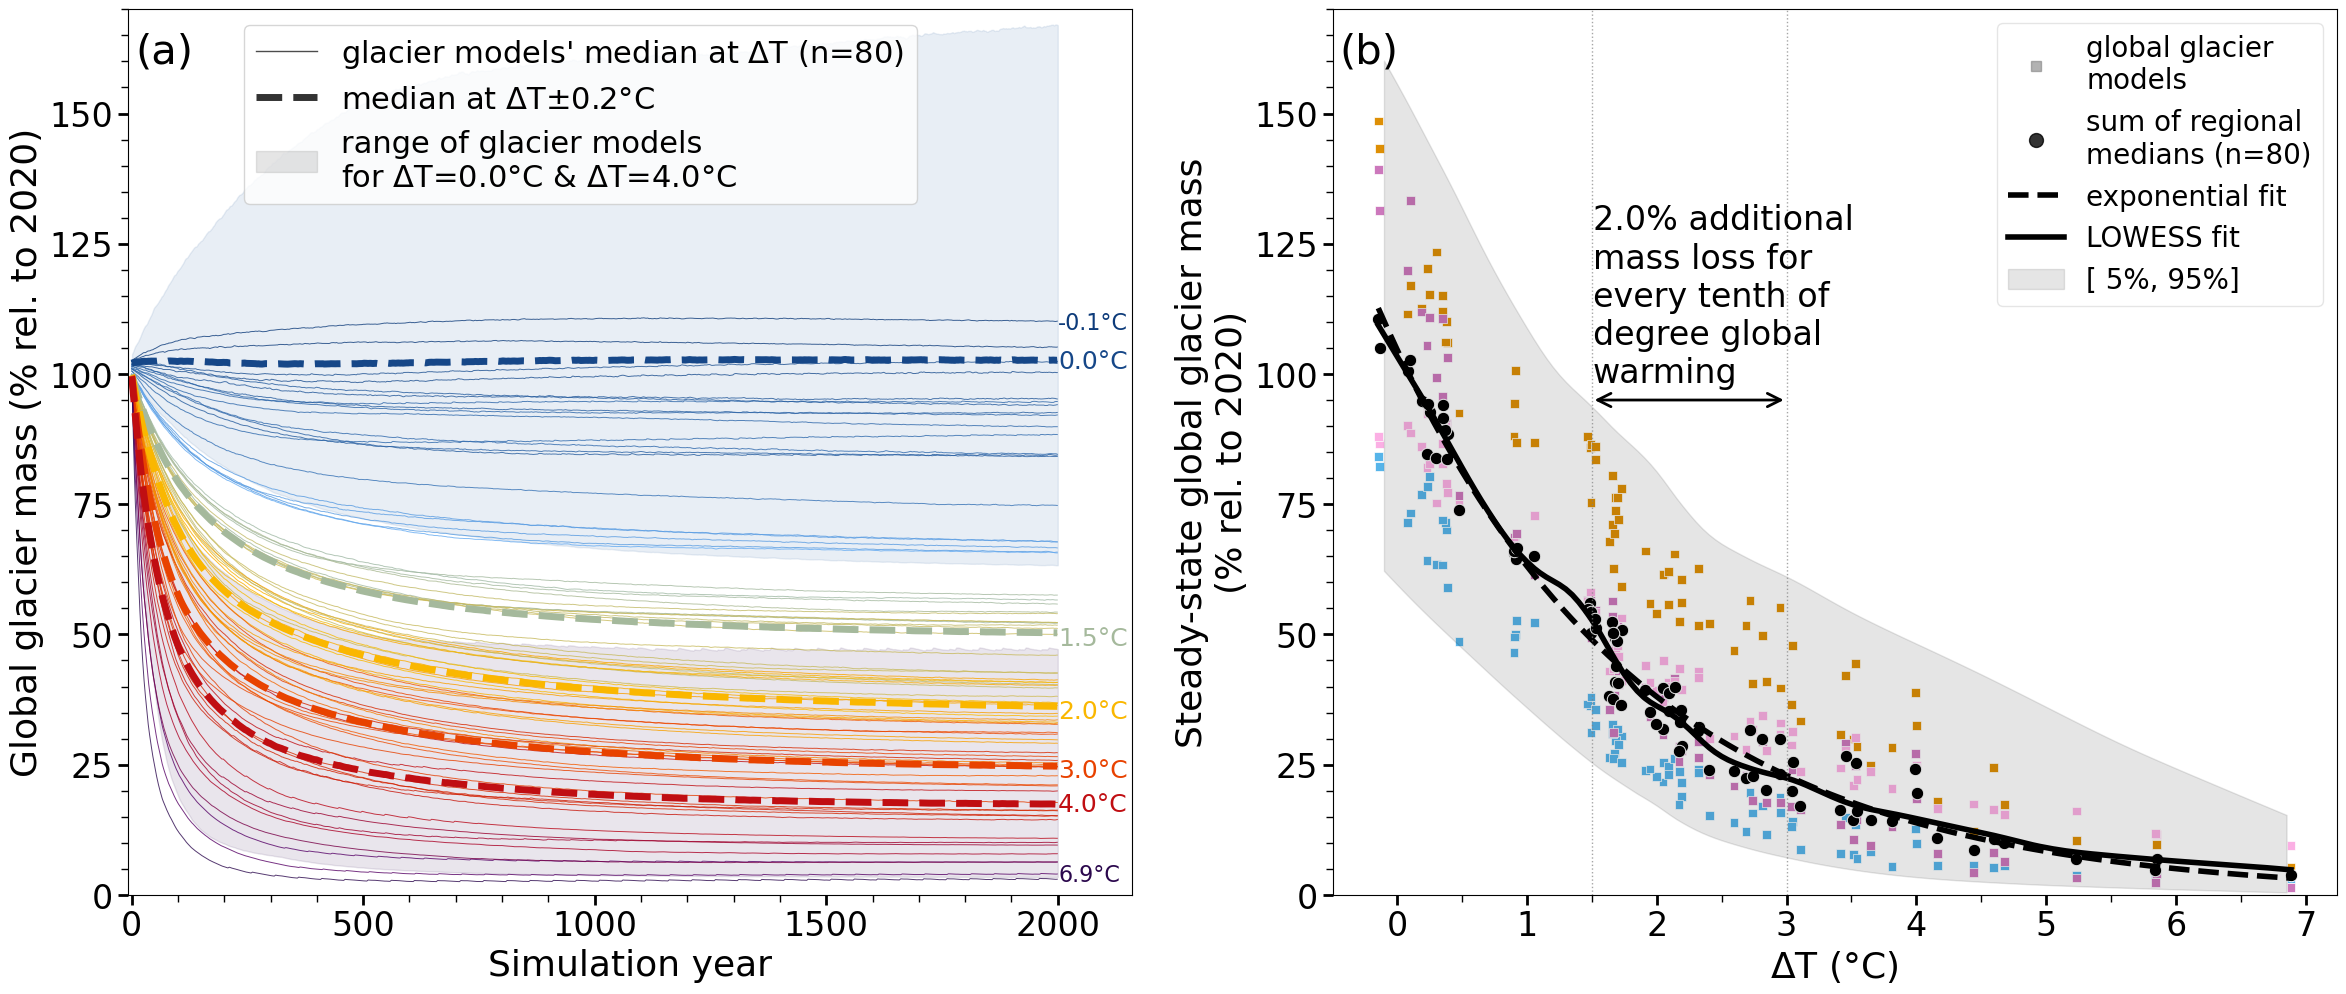

In [28]:
only_90perc = True
show_text = False
fabis_get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region='global', perc=100, sim_year=2000, 
                                                     avg_over = '3yr', # it almost makes no difference fo rthe steady state, but is better for year 0 ...
                                                     smooth_values_percentiles=1,
                                                    exp_decay_temp_fit=False, temp_above_0_8=False,
                                                     shift_years=True,
                                                     landscape = True, show_slope_fit=True, 
                                                    show_min_max_quantiles_a=False, select_opt='')

['PyGEM-OGGM_v13' 'GloGEMflow' 'GloGEMflow3D' 'OGGM_v16' 'GLIMB'
 'Kraaijenbrink']
0.0 5 0.020107092206236098
172.24350758065515
1.5 14 1.5970631102397388
66.44880230260769
2.0 12 2.0838111906835044
40.10343312293261
3.0 7 2.964579003110285
19.736707430126057
4.0 4 3.990951133436012
8.584014599013958
[('ipsl-cm6a-lr', '1851-1870_hist') ('ipsl-cm6a-lr', '1901-1920_hist')
 ('mpi-esm1-2-hr', '1851-1870_hist') ('mpi-esm1-2-hr', '1901-1920_hist')
 ('mri-esm2-0', '1851-1870_hist')]
min_t <xarray.DataArray 'experiments' (experiments: 1)>
array([('ipsl-cm6a-lr', '1901-1920_hist')], dtype=object)
Coordinates:
  * experiments      (experiments) MultiIndex
  - gcm              (experiments) object 'ipsl-cm6a-lr'
  - period_scenario  (experiments) object '1901-1920_hist' <xarray.Dataset>
Dimensions:                        (year_after_2020: 4951, experiments: 1)
Coordinates:
  * year_after_2020                (year_after_2020) float64 0.0 ... 4.95e+03
  * experiments                    (experiments

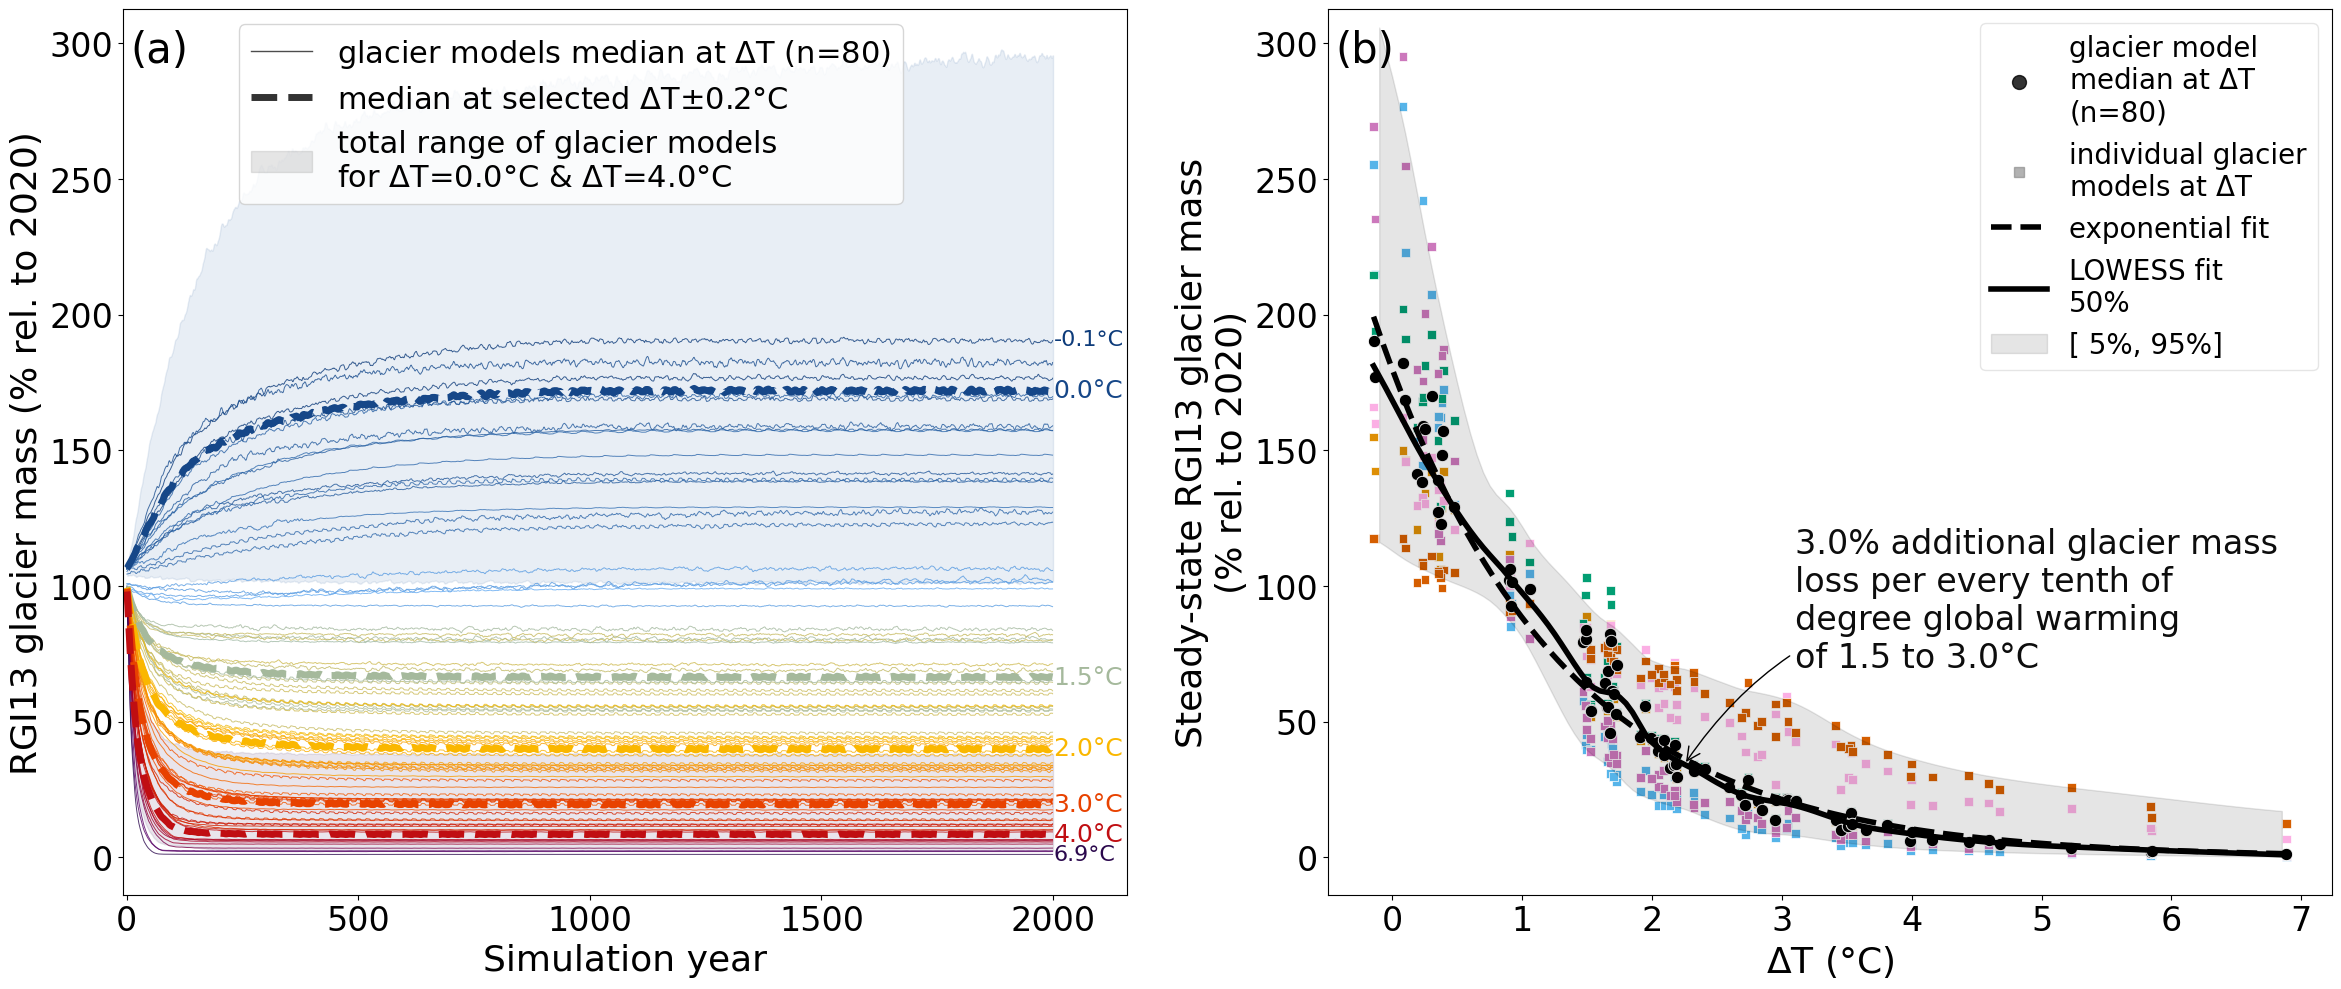

In [234]:
fabis_get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region='RGI13_glacier', perc=100, sim_year=2000, 
                                                     avg_over = '3yr', # it almost makes no difference fo rthe steady state, but is better for year 0 ...
                                                     smooth_values_percentiles=1,
                                                    exp_decay_temp_fit=False, temp_above_0_8=False,
                                                     shift_years=True,
                                                     landscape = True, show_slope_fit=True)

In [20]:
rgi_regs = []
for rgi_reg in np.arange(1,20,1):
    if rgi_reg < 10:
        rgi_reg = '0'+str(rgi_reg)
    else:
        rgi_reg = str(rgi_reg)
    rgi_regs.append(rgi_reg)
    
for rgi_reg in rgi_regs:
    for exp_decay_temp_fit in [False]:
        #get_vol_timeseries_temp_ch_Xyr_glob_glacier(region=f'RGI{rgi_reg}_glacier', perc=90)
        fabis_get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region=f'RGI{rgi_reg}_glacier',perc=100, sim_year=2000, 
                                                     avg_over = '3yr', # it almost makes no difference fo rthe steady state, but is better for year 0 ...
                                                     smooth_values_percentiles=1,
                                                    exp_decay_temp_fit=False, temp_above_0_8=False,
                                                     shift_years=True,
                                                     landscape = True, show_slope_fit=True)
        if rgi_reg!='11':
            plt.close()

NameError: name 'fabis_get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait' is not defined

#### Regional vs glacier-area warming 

In [37]:
if 'All' in rgi_regs_sel:
    rgi_regs_sel_all = rgi_regs_sel
else:
    rgi_regs_sel_all = ['All'] + rgi_regs_sel

global_glacier median ratio: 1.5     median_ratio_15_30:  1.6    fitted slope: 1.8
RGI19_glacier median ratio: 1.0     median_ratio_15_30:  1.0    fitted slope: 1.2
RGI03_glacier median ratio: 2.0     median_ratio_15_30:  2.0    fitted slope: 2.4
RGI01_glacier median ratio: 1.3     median_ratio_15_30:  1.3    fitted slope: 1.5
RGI05_glacier median ratio: 1.6     median_ratio_15_30:  1.6    fitted slope: 2.0
RGI09_glacier median ratio: 2.5     median_ratio_15_30:  2.6    fitted slope: 3.2
RGI04_glacier median ratio: 1.8     median_ratio_15_30:  1.8    fitted slope: 2.1
RGI07_glacier median ratio: 2.5     median_ratio_15_30:  2.6    fitted slope: 2.9
RGI17_glacier median ratio: 0.8     median_ratio_15_30:  0.8    fitted slope: 0.8
RGI06_glacier median ratio: 0.9     median_ratio_15_30:  1.0    fitted slope: 1.1
RGI13_glacier median ratio: 1.3     median_ratio_15_30:  1.3    fitted slope: 1.4
RGI14_glacier median ratio: 1.2     median_ratio_15_30:  1.2    fitted slope: 1.4
RGI02_glacier m

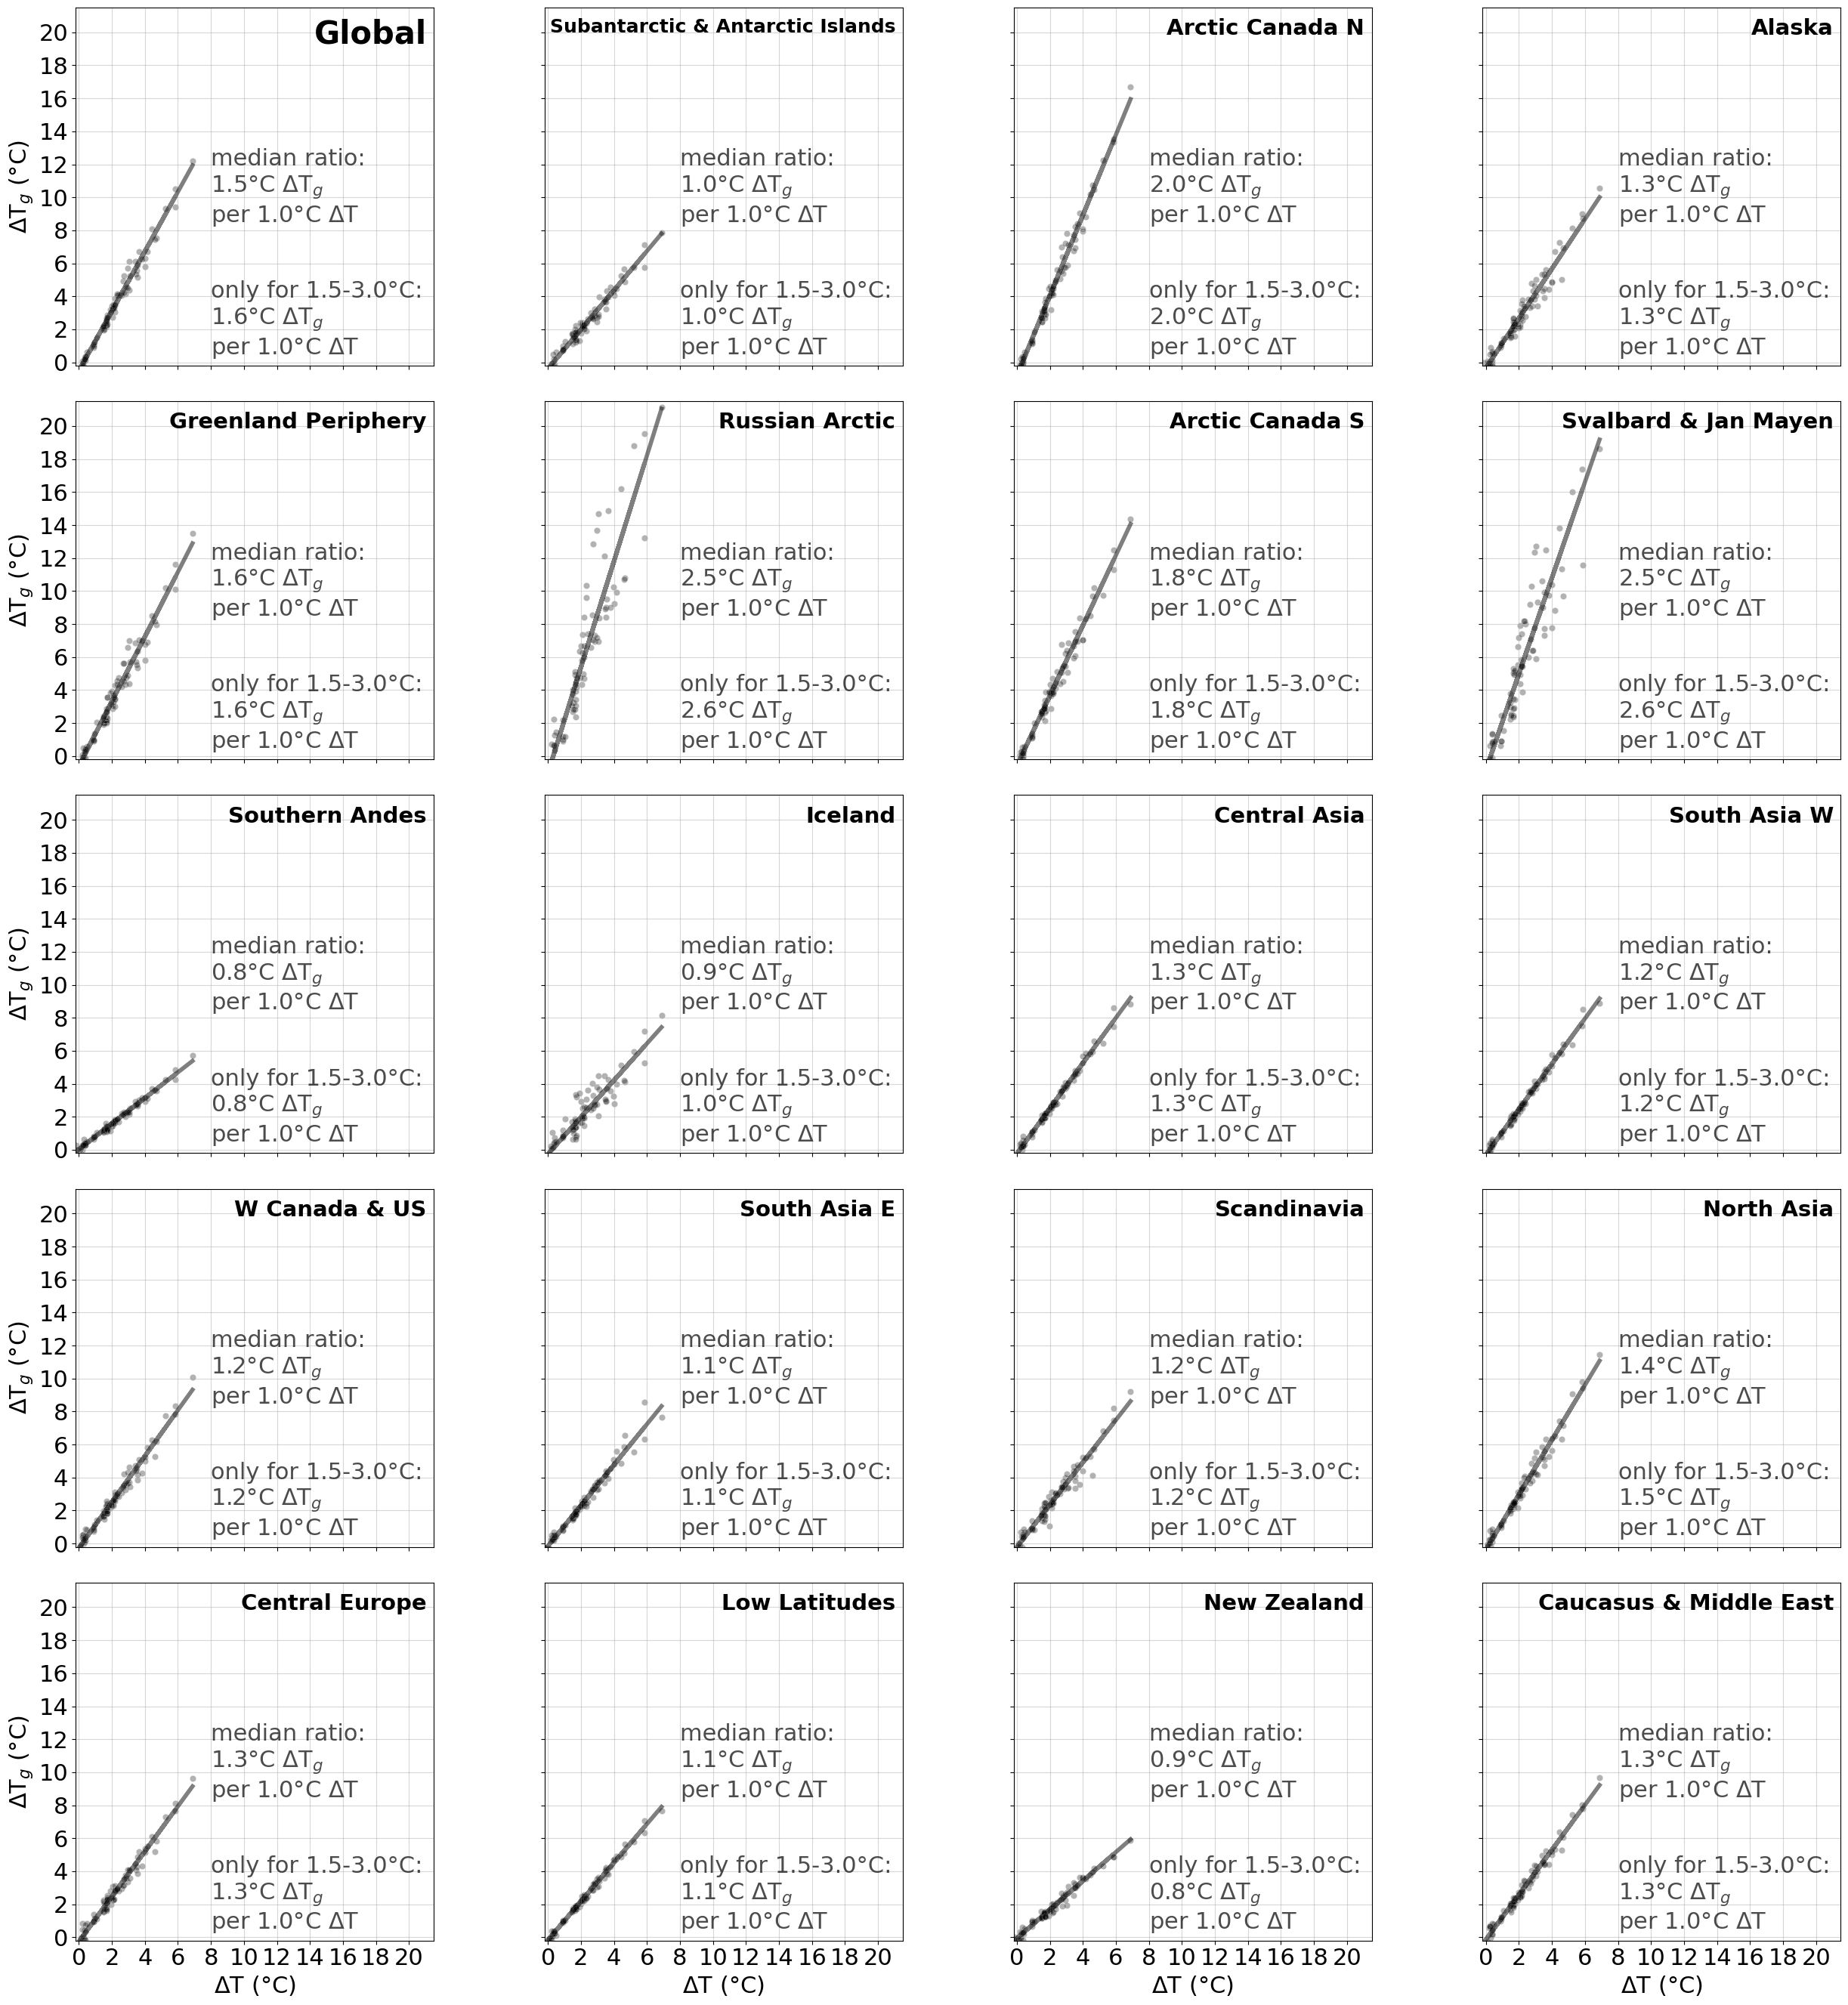

In [40]:
fig, axs = plt.subplots(5,4,figsize=(25,27), sharey=True, sharex=True) #, sharey='row') #, sharex=True)
plt.rc('font', size=22)  
for j, rgi_reg in enumerate(rgi_regs_sel_all):
    if j<4:
        ax = axs[0][j]
    elif j <8:
        ax = axs[1][j-4]
    elif j <12:
        ax = axs[2][j-8]
    elif j <16:
        ax = axs[3][j-12]
    elif j <20:
        ax = axs[4][j-16]

        
    if rgi_reg == 'All':
        ax.text(0.98, 0.97, 'Global', color='black', weight='bold',transform=ax.transAxes, fontsize=30, va='top', ha='right')
        #ax.set_title(f'Global glacier volume after {sim_year} years')
    else:
        nam = d_reg_num_name[rgi_reg]
        if rgi_reg == '19':
            fs_rgi = 16
        else:
            fs_rgi = 19
        fs_rgi = fs_rgi+2
        ax.text(0.98, 0.97, f'{nam}',#, #f'{rgi_reg}-{nam}',
                color='black',
                weight='bold',
                transform=ax.transAxes, fontsize=fs_rgi, va='top', ha='right')

        
    pd_global_temp_exp_m = get_glob_temp_exp(region='global')

    if rgi_reg == 'All':
        region = 'global_glacier'
    else:
        region = f'RGI{rgi_reg}_glacier'
    pd_global_temp_exp_m_glac = get_glob_temp_exp(region=region)
    pd_global_temp_exp_m.loc[pd_global_temp_exp_m_glac.index, 'temp_ch_ipcc_glacier'] = pd_global_temp_exp_m_glac['temp_ch_ipcc'].values
    pd_t = pd_global_temp_exp_m

    inset_ax = ax
    sns.scatterplot(data=pd_t, ax = inset_ax,
                    x='temp_ch_ipcc', y='temp_ch_ipcc_glacier',
                    color='black', alpha = 0.3,
                    #hue='temp_ch_ipcc', palette='flare',
                    legend=False)
    #inset_axes.set_title(f'Glacier area-weighted vs global\n'+r'temperature changes ($\Delta$T)'+'\ncompared to preindustrial levels')
    if j >=16:
        inset_ax.set_xlabel(r'$\Delta$T (°C)') # $_{global}$ (°C)')# + '\n(°C, compared to pre-industrial levels)')
    else:
        inset_ax.set_xlabel('')
    
    
    inset_ax.set_ylabel(r'$\Delta$T$_{g}$ (°C)')

    inset_ax.grid(alpha=0.5)
    # add linear fit
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_t['temp_ch_ipcc'].values, pd_t['temp_ch_ipcc_glacier'])
    inset_ax.plot(pd_t['temp_ch_ipcc'], slope*pd_t['temp_ch_ipcc'].values + intercept, color = 'black', alpha = 0.5, lw=4)
    ratio = np.median(pd_t['temp_ch_ipcc_glacier'].values/pd_t['temp_ch_ipcc'].values)
    pd_t_15_30 = pd_t.loc[(pd_t.temp_ch_ipcc>=1.5)&(pd_t.temp_ch_ipcc<=3.0)]
    median_ratio_15_30 = np.median(pd_t_15_30['temp_ch_ipcc_glacier'].values/pd_t_15_30['temp_ch_ipcc'].values)
    print(region, 'median ratio:', ratio.round(1), '    median_ratio_15_30: ', median_ratio_15_30.round(1), '   fitted slope:' , slope.round(1))

    #inset_ax.annotate(f'fitted slope:\n{slope:.1f}°C '+r'$\Delta$T$_{glacier}$'+'\nper 1.0°C '+r'$\Delta$T$_{global}$',
    inset_ax.annotate(f'median ratio:\n{ratio:.1f}°C '+r'$\Delta$T$_{g}$'+'\nper 1.0°C '+r'$\Delta$T',
                  xy=(8,8.5),
                  xytext=(8,8.5),
                  fontsize = 22,
                  #arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), 
                      color='black', alpha=0.7)
    
    inset_ax.annotate(f'only for 1.5-3.0°C:\n{median_ratio_15_30:.1f}°C '+r'$\Delta$T$_{g}$'+'\nper 1.0°C '+r'$\Delta$T',
              xy=(8,0.5),
              xytext=(8,0.5),
              fontsize = 22,
              #arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), 
                  color='black', alpha=0.7)
    arrow_annotate = False
    if arrow_annotate:
        if region == 'global_glacier':
            inset_ax.annotate(f'{slope:.1f}°C '+r'$\Delta$T$_{g}$'+'\nper 1.0°C '+r'$\Delta$T',
                              xy=(3,slope*3 + intercept),
                              xytext=(4-2-0.5,slope*4 + intercept-8),
                              fontsize = 21,
                              arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)
        else:
            inset_ax.annotate(f'{slope:.1f}°C '+r'$\Delta$T$_{g}$'+f'\nRGI{rgi_reg} per'+'\n1.0°C '+r'$\Delta$T',
                              xy=(3,slope*3 + intercept),
                              xytext=(0.4,0.04),    #(4-2,slope*4 + intercept-8),
                              textcoords='axes fraction', fontsize=20,
                       arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)

    inset_ax.set_aspect('equal')
    ylim0,ylim1 = inset_ax.get_ylim()
    xlim0,xlim1 = inset_ax.get_xlim()
    lim0 = -0.2 #min(ylim0, xlim0)
    lim1 = 21.5 #max(ylim1, xlim1)
    inset_ax.set_xlim([lim0, lim1])
    inset_ax.set_ylim([lim0, lim1])

    inset_ax.set_xticks(np.arange(0,lim1,2))
    inset_ax.set_yticks(np.arange(0,lim1,2))
plt.tight_layout()

plt.savefig('figures/reg_vs_global_glacier_temp_change_per_rgi_region.png')
plt.savefig('figures/reg_vs_global_glacier_temp_change_per_rgi_region.pdf')

In [37]:
pd_fit_quantiles_r_sel_medpd_fit_quantiles_r_sel_med

NameError: name 'pd_fit_quantiles_r_sel_medpd_fit_quantiles_r_sel_med' is not defined

**Here directly only for the shifted stuff**

In [ ]:
sim_year = 5000 #2000
max_shift_years = 50
pd_global_temp_exp_m = get_glob_temp_exp(region='global')

ds_reg_models_vol = ds_reg_yr_shift.sel(year_after_2020=slice(0,5000-max_shift_years)).volume_m3 #ds_reg_models.isel(simulation_year=slice(0,sim_year+1)).volume_m3
# Let's take the median/iqr estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])

### regional 
ds_reg_models_vol_roll_steady_state = ds_reg_models_vol.median(dim='model_author').sel(year_after_2020=slice(sim_year-20-max_shift_years,sim_year-max_shift_years)).mean(dim='year_after_2020')
ds_reg_models_med_vol_2020 = 100*ds_reg_models_vol_roll_steady_state/pd_rgi_stats_w_hugonnet[f'regional_volume_m3_2020{approach}'].loc[ds_reg_models_vol_roll_steady_state.rgi_reg].values.reshape(19,1)

# this here takes a while
#ds_reg_models_gcm_q25_q50_q75_vol = ds_reg_models_gcm_vol.quantile([0.25,0.5,0.75], dim='model_author')
# pd_global_temp_exp_m = get_glob_temp_exp(region=f'RGI{rgi_reg}_global') # pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()
ds_reg_models_med_vol_2020 = ds_reg_models_med_vol_2020.assign_coords(temp_ch_ipcc = ('experiments',
                                                                                       pd_global_temp_exp_m.loc[ds_reg_models_med_vol_2020.experiments.values, 'temp_ch_ipcc'].values))
ds_reg_models_med_vol_2020 = ds_reg_models_med_vol_2020.sortby('temp_ch_ipcc')
ds_reg_models_med_vol_2020 = ds_reg_models_med_vol_2020.reset_coords()
pd_reg_models_med_vol_2020 = ds_reg_models_med_vol_2020.to_dataframe().reset_index()
pd_reg_models_med_vol_2020['region'] = 'RGI' + pd_reg_models_med_vol_2020['rgi_reg']

### global
ds_glob_models_vol_roll_steady_state = ds_reg_models_vol.median(dim='model_author').sel(year_after_2020=slice(sim_year-20-max_shift_years,sim_year-max_shift_years)).mean(dim='year_after_2020').sum(dim='rgi_reg')

ds_glob_models_med_vol_2020 = 100*ds_glob_models_vol_roll_steady_state/pd_rgi_stats_w_hugonnet[f'regional_volume_m3_2020{approach}'].loc['Globally']
ds_glob_models_med_vol_2020 = ds_glob_models_med_vol_2020.assign_coords(temp_ch_ipcc = ('experiments',
                                                                                pd_global_temp_exp_m.loc[ds_glob_models_med_vol_2020.experiments.values, 'temp_ch_ipcc'].values))
ds_glob_models_med_vol_2020 = ds_glob_models_med_vol_2020.sortby('temp_ch_ipcc')
ds_glob_models_med_vol_2020 = ds_glob_models_med_vol_2020.reset_coords()
pd_glob_models_med_vol_2020 = ds_glob_models_med_vol_2020.to_dataframe().reset_index()
pd_glob_models_med_vol_2020['region'] = 'global'

### concatenate both
pd_all_models_med_vol_2020 = pd.concat([pd_glob_models_med_vol_2020, pd_reg_models_med_vol_2020])


ds_reg_models_med_vol = ds_reg_models_vol.median(dim='model_author')
ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(year_after_2020=20, center=True).mean().dropna(dim='year_after_2020', how='all')#.sel(simulation_year=slice(0,sim_year))


In [ ]:
markers = ['^', 'X','s','o','D','v']

norm2 = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                     vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
cmap2 = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
sm2.set_array([])
plt.rc('font', size=18)  


In [ ]:
col_temp_l = []
exp_l = []
for temp in [0,1.5,2,3,4,5]: #,5,6]:
    exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
    #sm.colorbar.norm...
    col_temp = cmap2(norm2(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
    col_temp_l.append(col_temp)
    exp_l.append(exp)


In [ ]:
# first subplot
show_first_plot = False
if show_first_plot:
    plt.figure(figsize=(12,8))
    ax = plt.gca()
    # only important for logarithmic plot ... 
    pd_all_models_med_vol_2020.loc[pd_all_models_med_vol_2020.volume_m3<0.1, 'volume_m3'] = 0.1
    sns.scatterplot(data=pd_all_models_med_vol_2020, y='volume_m3', x='region', hue='temp_ch_ipcc',
                    palette='flare', legend=False, ax=ax)
    #leg = ax.legend(loc='upper left', bbox_to_anchor=(1,1), title = f'$\Delta$T (°C)\n(global)')
    ax.set_ylabel(f'Steady-state volume'+'\n(in % relative to initial state)')
    ax.axhline(100, ls=':', color = 'grey')
    ax.grid(axis='y')
    ax.set_xlabel('region');

    # plot specific delta T:
    col_temp_l = []
    exp_l = []
    for temp in [0,1.5,2,3,4,5]: #,5,6]:
        exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
        #sm.colorbar.norm...
        col_temp = cmap(norm(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
        col_temp_l.append(col_temp)
        exp_l.append(exp)

    pd_t_sel =pd_all_models_med_vol_2020.sel(experiments=exp_l).to_dataframe().reset_index()
    pd_t_sel['region']  = 'RGI' + pd_t_sel['rgi_reg']
    pd_t_sel_glob =pd_all_models_med_vol_2020.sel(experiments=exp_l).to_dataframe().reset_index()
    pd_t_sel_glob['region'] = 'global'
    pd_t_sel_all = pd.concat([pd_t_sel_glob, pd_t_sel])
    # just to make the plot possible
    pd_t_sel_all.loc[pd_t_sel_all.volume_m3 <0.1, 'volume_m3'] = 0.1
    #pd_t_sel_all.loc[pd_t_sel_all.volume_m3 <0.1]['volume_m3'] = 0.1
    #pd_t_sel['volume (km3)'] = pd_t_sel['volume_m3']/1e9
    l_sel = sns.scatterplot(ax=ax,
                 data=pd_t_sel_all,
                            markers=markers,
                            style='temp_ch_ipcc',
                            alpha = 0.8,
                 y='volume_m3', x='region', hue='temp_ch_ipcc',
                            palette=sns.color_palette(col_temp_l),
                 legend=False,size='temp_ch_ipcc', sizes=(200,200));
    #leg = ax.legend(loc='upper left', bbox_to_anchor=(1.005,0.99),
    #                title=f'$\Delta$T (°C)\n(global)',
    #                markerscale=1, handleheight=0.8)

    #for j,t in enumerate(leg.texts):
    #    # truncate label text to 4 characters
    #    if j ==1:
    #        t.set_text(np.round(float(t.get_text()),1))
    #    else:
    #        t.set_text(np.round(float(t.get_text()),0))
    # set the linewidth of each legend object
    #for legobj in leg.legendHandles:
    #    legobj.set_linewidth(4.0)
    #    legobj.set_linestyle('--')
    ax.set_xticks(pd_t_sel_all.region.unique())
    ax.set_xticklabels(pd_t_sel_all.region.unique(), rotation=45)
    #ax.set_yticks([5,10,20,40, 80, 160, 320],[5,10,20,40, 80, 160, 320])

    #x = pd_t_sel_all.volume_m3.values
    #def stratify(ax, power=2):
    #    f     = lambda x: (x + 1)**(1 / power)
    #    f_inv = lambda y: y**power - 1
    #    ax.set_yscale('function', functions=(f, f_inv))
    #stratify(ax, power=2)

    #ax.set_yscale('log', base=2)
    #ax.set_yticks([5,10,20,40, 80, 160, 320],[5,10,20,40, 80, 160, 320])
    ######## Next subplot    


In [ ]:
fig, axs= plt.subplots(1,3,figsize=(28,10),sharex=True)
axs = axs.flatten()
################### Next subplot: year where less than 50%/20% /1% remains
for ax, perc in zip(axs, [50,20,10]):
    # make sure that we use the 20-year rolling average !!!
    ds_reg_models_med_vol_glob_rel = 100*ds_reg_models_med_vol_roll.sum(dim='rgi_reg')/ds_reg_models_med_vol.sel(year_after_2020=0).sum(dim='rgi_reg')
    ds_reg_models_med_vol_glob_rel = ds_reg_models_med_vol_glob_rel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_glob_rel.experiments, # make sure thatwe use the same experiments
                                                                                                   'temp_ch_ipcc']))

    ds_reg_below_50_perc = ds_reg_models_med_vol_glob_rel.where(ds_reg_models_med_vol_glob_rel<=perc)
    ds_reg_below_50_perc.max(dim='year_after_2020')
    yr_50_perc = ds_reg_below_50_perc.idxmax(dim='year_after_2020')

    pd_yr_50_perc = yr_50_perc.to_dataframe(f'Year when <{perc}% of initial volume remains').reset_index()
    pd_yr_50_perc['region'] = 'global' 

    for rgi_reg in ds_reg_models_med_vol_roll.rgi_reg.values:
        ds_reg_models_med_vol_sel_rel = 100*ds_reg_models_med_vol_roll.sel(rgi_reg=rgi_reg)/ds_reg_models_med_vol.sel(year_after_2020=0).sel(rgi_reg=rgi_reg)
        ds_reg_models_med_vol_sel_rel = ds_reg_models_med_vol_sel_rel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                              pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel_rel.experiments, # make sure thatwe use the same experiments
                                                                                                       'temp_ch_ipcc']))

        ds_reg_below_50_perc_sel = ds_reg_models_med_vol_sel_rel.where(ds_reg_models_med_vol_sel_rel<=perc)
        ds_reg_below_50_perc_sel.max(dim='year_after_2020')
        yr_50_perc_sel = ds_reg_below_50_perc_sel.idxmax(dim='year_after_2020')

        pd_yr_50_perc_reg = yr_50_perc_sel.to_dataframe(f'Year when <{perc}% of initial volume remains').reset_index()
        pd_yr_50_perc_reg['region'] = f'RGI{rgi_reg}'
        pd_yr_50_perc = pd.concat([pd_yr_50_perc,pd_yr_50_perc_reg])

    pd_yr_50_perc=pd_yr_50_perc.drop(columns='rgi_reg')
    #pd_yr_50_perc = pd_yr_50_perc.dropna()

    if perc == 50:
        legend_opt = 'full'
    else:
        legend_opt = False
    sns.scatterplot(ax=ax,
                    hue='temp_ch_ipcc',
                    y=f'Year when <{perc}% of initial volume remains',
                    x='region',
                    palette='flare', ### this does not work .. removed it again ... sns.color_palette(col_temp_l_long[::-1], as_cmap=True), #'flare', ### TODO, maybe NOT perfect ???
                    data=pd_yr_50_perc, legend=legend_opt)
    if perc == 50:
        handles, labels = ax.get_legend_handles_labels()
        leg2 = ax.legend()
        leg2.remove()
    # plot specific delta T:
    ds_sel = pd_yr_50_perc.groupby(['gcm','period_scenario','region']).mean().to_xarray().stack(experiments=['gcm','period_scenario'])
    pd_yr_50_perc_sel = ds_sel.sel(experiments=exp_l).to_dataframe().reset_index().dropna()
    if np.all(pd_yr_50_perc_sel.temp_ch_ipcc >=1.6):
        col_temp_l_sel = col_temp_l[2:].copy()
        markers_sel = markers[2:].copy()
    elif np.all(pd_yr_50_perc_sel.temp_ch_ipcc >=0.5):
        # in no region that amount is lost when having 0°C global warming
        col_temp_l_sel = col_temp_l[1:].copy()
        markers_sel = markers[1:].copy()
    else:
        col_temp_l_sel = col_temp_l.copy()
        markers_sel = markers.copy()
        
    if perc == 50:
        legend_opt = 'auto'
    else:
        legend_opt = False
    sns.scatterplot(ax=ax,
                    hue='temp_ch_ipcc',
                    y=f'Year when <{perc}% of initial volume remains',
                    x='region',
                    data=pd_yr_50_perc_sel,
                    markers=markers_sel,
                    style='temp_ch_ipcc',
                    palette=sns.color_palette(col_temp_l_sel),
                    alpha = 0.8,
                 legend=legend_opt,size='temp_ch_ipcc', sizes=(200,200));
    if perc == 50:
        hand1, label1 = ax.get_legend_handles_labels()
        leg = ax.legend(hand1[-6:], label1[-6:], loc='upper right', bbox_to_anchor=(-0.15,0.55), #(1.005,0.55),
                        title=f'Nearest\nexperiment\nwith $\Delta$T (°C):',
                        markerscale=1, handleheight=0.8)
        ax.legend([handles[0], handles[-1]], [np.round(float(labels[0]),1), np.round(float(labels[-1]),1)], loc='upper right', bbox_to_anchor=(-0.15,1.02), #1.005,1.02),
                    title=f'80\nexperiments\nwith global\nwarming\n$\Delta$T (°C)\nrange:',
                    markerscale=1, handleheight=0.8)
        ax.add_artist(leg)
        for j,t in enumerate(leg.texts):
        #    # truncate label text to 4 characters
            if j ==1:
                t.set_text(np.round(float(t.get_text()),1))
            else:
                t.set_text(np.round(float(t.get_text()),0))
                
                
        ## get colormap 
        add_cmap = False
        if add_cmap:
            cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.02, ax.get_position().height / 2.1])
            cbar = ax.figure.colorbar(sm, cax=cax)
            cbar.ax.invert_yaxis()
            cbar.set_ticks([0,1.5,3.0,4.5,6.0])
    ax.set_ylim([9,5200])
    ax.set_yscale('log')
    ax.set_xticks(pd_yr_50_perc.region.unique())
    ax.set_xticklabels(pd_yr_50_perc.region.unique(), rotation=0)
    ax.set_ylabel(f'Simulation year after 2020 when >{100-perc}% of 2020 volume is lost')
plt.tight_layout() 
num_text_x = 0.007
r_l = ['Global     ']
for r in np.arange(1,20,1):
    r_l.append(f'{r:02g}')

for j,axi in enumerate(axs):
    #if j <2:
    num_text_y = 0.95
    #else:
    #    num_text_y = 0.87
    axi.text(num_text_x, num_text_y,
             num_dict[j], fontsize=28, transform=axi.transAxes)
    axi.axvspan(-0.5,0.5,color='grey', alpha = 0.1)
    axi.set_xlim([-0.5,19.5])
    ax.set_xticks(np.arange(0,20,1),r_l)

plt.savefig(f'figures/2_w_shift_rel_2020_condensed_steady_state_year_w_perc_to_initial_state_rgi_region_analysis_{DATE}_{sim_year}yr.png')

### From hereon, we take again the correct colorscale (i.e, cmap and scaler)

In [40]:
pd_per_glac_model_fit = pd.read_csv('per_glacier_lowess_calib/fitted_per_model_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_current12deg_5000_Feb12_2024_ipcc_ar6.csv')

In [46]:
pd_per_glac_model_fit

x        0.5    model_author  frac region  year  fit_to_median  \
0     -0.143529  88.830361           GLIMB  0.20    All  5000          False   
1     -0.131913  88.733494           GLIMB  0.20    All  5000          False   
2     -0.100000  88.462133           GLIMB  0.20    All  5000          False   
3     -0.050000  88.021433           GLIMB  0.20    All  5000          False   
4      0.000000  87.525810           GLIMB  0.20    All  5000          False   
...         ...        ...             ...   ...    ...   ...            ...   
21115  6.700000  10.023944  PyGEM-OGGM_v13  0.27     19  5000          False   
21116  6.750000  10.005590  PyGEM-OGGM_v13  0.27     19  5000          False   
21117  6.800000   9.986850  PyGEM-OGGM_v13  0.27     19  5000          False   
21118  6.850000   9.967739  PyGEM-OGGM_v13  0.27     19  5000          False   
21119  6.884361   9.954430  PyGEM-OGGM_v13  0.27     19  5000          False   

       temp_ch avg_over  it  ...     fit_opt shift_years_2020          y  add  \
0          NaN    101yr   2  ...  lowess_fit             True  87.994245  NaN   
1          NaN    101yr   2  ...  lowess_fit             True  86.680893  NaN   
2          NaN    101yr   2  ...  lowess_fit             True        NaN  NaN   
3          NaN    101yr   2  ...  lowess_fit             True        NaN  NaN   
4          NaN    101yr   2  ...  lowess_fit             True        NaN  NaN   
...        ...      ...  ..  ...         ...              ...        ...  ...   
21115      NaN    101yr   2  ...  lowess_fit             True        NaN  NaN   
21116      NaN    101yr   2  ...  lowess_fit             True        NaN  NaN   
21117      NaN    101yr   2  ...  lowess_fit             True        NaN  NaN   
21118      NaN    101yr   2  ...  lowess_fit             True        NaN  NaN   
21119      NaN    101yr   2  ...  lowess_fit             True   9.323852  NaN   

       min_0.5_diff    min_0.5  min_0.5_diff_above_zero  \
0          0.015459  10.276439                 0.015459   
1          0.015459  10.276439                 0.015459   
2          0.015459  10.276439                 0.015459   
3          0.015459  10.276439                 0.015459   
4          0.015459  10.276439                 0.015459   
...             ...        ...                      ...   
21115      0.014878   9.954430                 0.014878   
21116      0.014878   9.954430                 0.014878   
21117      0.014878   9.954430                 0.014878   
21118      0.014878   9.954430                 0.014878   
21119      0.014878   9.954430                 0.014878   

       median_absolute_deviation      rmse                algorithm_sel  
0                       2.015379  3.384989  non_negative_and_decreasing  
1                       2.015379  3.384989  non_negative_and_decreasing  
2                       2.015379  3.384989  non_negative_and_decreasing  
3                       2.015379  3.384989  non_negative_and_decreasing  
4                       2.015379  3.384989  non_negative_and_decreasing  
...                          ...       ...                          ...  
21115                   3.136173  6.109965  non_negative_and_decreasing  
21116                   3.136173  6.109965  non_negative_and_decreasing  
21117                   3.136173  6.109965  non_negative_and_decreasing  
21118                   3.136173  6.109965  non_negative_and_decreasing  
21119                   3.136173  6.109965  non_negative_and_decreasing  

[21120 rows x 21 columns]

In [ ]:
_temp = 1.5
#ax.vlines([j-0.2+jj*0.2],_l,
#          _u, 
#          color = color, zorder=-1, alpha=0.8, lw=1)
#if rgi_reg == '19':

#get the data 
p_shift = '_shift_years_rel_2020'
avg_over = '101yr'
add = '_lowess_added_quantiles_added'
sim_year = 5000
DATE = 'Feb12_2024'
path_only_glob = ''
pd_sel = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_{sim_year}_{DATE}{path_only_glob}_ipcc_ar6.csv', index_col=[0])

pd_vol_2020 = pd.read_csv(f'rgi_vs_2020_volume_hugonnet_estimates{DATE}.csv', index_col=[0])
pd_sel['vol_2020_reg_m3'] = np.NaN
for r in pd_sel.region.unique():
    if r == 'All':
        _r = 'Globally'
    else:
        _r = r
    vol_2020 = pd_vol_2020.loc[_r, f'regional_volume_m3_2020{approach}']
    pd_sel.loc[pd_sel.region == r, 'vol_2020_reg_m3'] = vol_2020
for q in qs:
    q = str(q)
    pd_sel[f'{q}_m3'] = pd_sel[f'{q}'] * pd_sel['vol_2020_reg_m3'] /100
####### 
pd_sel_q_glob = pd_sel.loc[pd_sel.region != 'All']
# only select the values in a 0.05 temp. grid:
pd_sel_q_glob = pd_sel_q_glob.where(np.isnan(pd_sel_q_glob.y)).dropna(how='all')
pd_sel_q_glob = pd_sel_q_glob.reset_index()
global_vol_2020_m3 = pd_vol_2020.loc['Globally',f'regional_volume_m3_2020{approach}']
pd_sel_global_sum_over_reg_fitted_quantiles = 100*pd_sel_q_glob[['x','0.05_m3', '0.25_m3', '0.5_m3',
       '0.75_m3', '0.95_m3']].groupby('x').sum()/global_vol_2020_m3
pd_sel_global_sum_over_reg_fitted_quantiles = pd_sel_global_sum_over_reg_fitted_quantiles.rename(columns = {'0.05_m3':'0.05', '0.25_m3':'0.25', '0.5_m3':'0.5',
       '0.75_m3':'0.75', '0.95_m3':'0.95'})
pd_fit_quantiles_reg_sum_global = pd_sel_global_sum_over_reg_fitted_quantiles.copy().reset_index()
pd_fit_quantiles = pd_lowess_fit.copy()
pd_fit_quantiles['x'] = pd_fit_quantiles.index
pd_fit_quantiles_r= pd_fit_quantiles.loc[pd_fit_quantiles.region==rgi_reg]
pd_fit_quantiles_r_sel1 = pd_fit_quantiles_r.loc[pd_fit_quantiles_r.x.round(4)==_temp]
pd_fit_quantiles_r_sel2 = pd_fit_quantiles_r.loc[pd_fit_quantiles_r.x.round(4)==_temp+1.5]
#_l = (pd_fit_quantiles_r_sel1['0.05'].values-pd_fit_quantiles_r_sel2['0.05'].values)/1.5
#_u = (pd_fit_quantiles_r_sel1['0.95'].values-pd_fit_quantiles_r_sel2['0.95'].values)/1.5
_m = (pd_fit_quantiles_r_sel1['0.5'].values-pd_fit_quantiles_r_sel2['0.5'].values)/1.5

## now get the individual per-glacier model fits ... 
pd_per_glac_model_fit = pd.read_csv('per_glacier_lowess_calib/fitted_per_model_lowess_best_frac_shift_years_rel_2020_101yr_avg_period_lowess_added_current12deg_5000_Feb12_2024_ipcc_ar6.csv')
pd_per_glac_model_fit_reg = pd_per_glac_model_fit.loc[pd_per_glac_model_fit.region == rgi_reg]
pd_3_0 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.x.round(4)==_temp+1.5]
pd_3_0 = pd_3_0.set_index('model_author')
pd_1_5 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.x.round(4)==_temp]
pd_1_5 = pd_1_5.set_index('model_author')
_vals = ((pd_1_5['0.5'] - pd_3_0['0.5'])/1.5).values # % volume changes per 1°C change
# append median from overall fit as well, and compute out of that a distribution to get the 0.05/0.95 %-iles
_l,_u = pd.Series(np.concatenate([_vals,_m])).quantile([0.05,0.95]).values
#print(_vals, _m)
print(f'RGI{rgi_reg}: temp. range {_temp}-{_temp+1.5}°C:  {_m.round(2)[0]}[{_l.round(2)}, {_u.round(2)}], single values:  {_vals.round(2)}')


RGI12: temp. range 1.5-3.0°C:  27.66[21.09, 27.49], single values:  [26.13 26.95 23.99 24.88 20.12]


In [172]:
col_temp_l_sel_n = [1.2, 1.5, 2.0, 3.0]
cols_n = []
for temp in col_temp_l_sel_n: #,5,6]:
    #sm.colorbar.norm...
    #col_temp = cmap(norm(temp))
    c=cmap(scaler.transform(np.array(temp).reshape(-1,1)))
    cols_n.append(c)
markers_sel_n = markers_sel #[markers_sel[1],markers_sel[2],markers_sel[3],markers_sel[4]]
#cols_n = sns.color_palette(cols_n)



In [187]:
# this is already done in the function above, but depends on which "option" is used, so we repeat it here again ... 
p_shift = '_shift_years_rel_2020'
avg_over = '101yr'
add = '_lowess_added_quantiles_added'
sim_year = 5000
DATE = 'Feb12_2024'
path_only_glob = ''
pd_sel = pd.read_csv(f'{f_path}lowess_fits/fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_{sim_year}_{DATE}{path_only_glob}_ipcc_ar6.csv', index_col=[0])

pd_vol_2020 = pd.read_csv(f'rgi_vs_2020_volume_hugonnet_estimates{DATE}.csv', index_col=[0])
pd_sel['vol_2020_reg_m3'] = np.NaN
for r in pd_sel.region.unique():
    if r == 'All':
        _r = 'Globally'
    else:
        _r = r
    vol_2020 = pd_vol_2020.loc[_r, f'regional_volume_m3_2020{approach}']
    pd_sel.loc[pd_sel.region == r, 'vol_2020_reg_m3'] = vol_2020
for q in qs:
    q = str(q)
    pd_sel[f'{q}_m3'] = pd_sel[f'{q}'] * pd_sel['vol_2020_reg_m3'] /100
####### 
pd_sel_q_glob = pd_sel.loc[pd_sel.region != 'All']
# only select the values in a 0.05 temp. grid:
pd_sel_q_glob = pd_sel_q_glob.where(np.isnan(pd_sel_q_glob.y)).dropna(how='all')
pd_sel_q_glob = pd_sel_q_glob.reset_index()
global_vol_2020_m3 = pd_vol_2020.loc['Globally',f'regional_volume_m3_2020{approach}']
pd_sel_global_sum_over_reg_fitted_quantiles = 100*pd_sel_q_glob[['x','0.05_m3', '0.25_m3', '0.5_m3',
       '0.75_m3', '0.95_m3']].groupby('x').sum()/global_vol_2020_m3
pd_sel_global_sum_over_reg_fitted_quantiles = pd_sel_global_sum_over_reg_fitted_quantiles.rename(columns = {'0.05_m3':'0.05', '0.25_m3':'0.25', '0.5_m3':'0.5',
       '0.75_m3':'0.75', '0.95_m3':'0.95'})

RGIAll: temp. range 1.5-3.0°C:  20.26[14.39, 26.58], single values:  [16.28 27.57 22.63 13.92]
RGIAll: temp. range 2.0-3.5°C:  12.57[9.63, 18.07], single values:  [10.84 19.04 14.22  9.33]
RGIAll: temp. range 2.5-4.0°C:  7.96[6.9, 14.49], single values:  [ 7.93 16.12  6.83  7.18]
RGI01: temp. range 1.5-3.0°C:  19.8[12.16, 22.18], single values:  [11.78 18.91 22.78 13.69]
RGI01: temp. range 2.0-3.5°C:  11.72[10.95, 14.5], single values:  [11.81 11.24 15.17 10.87]
RGI01: temp. range 2.5-4.0°C:  7.15[6.41, 8.95], single values:  [9.04 6.22 8.58 7.3 ]
RGI02: temp. range 1.5-3.0°C:  12.2[3.47, 22.04], single values:  [24.61  3.4   3.68 14.35 13.67]
RGI02: temp. range 2.0-3.5°C:  3.83[1.0, 12.9], single values:  [14.99  0.95  1.14  4.89  6.61]
RGI02: temp. range 2.5-4.0°C:  1.09[0.1, 7.94], single values:  [9.7  0.42 0.   0.96 2.67]
RGI03: temp. range 1.5-3.0°C:  24.09[14.08, 23.88], single values:  [22.94 23.02 21.35 12.26]
RGI03: temp. range 2.0-3.5°C:  19.39[12.33, 20.33], single values: 

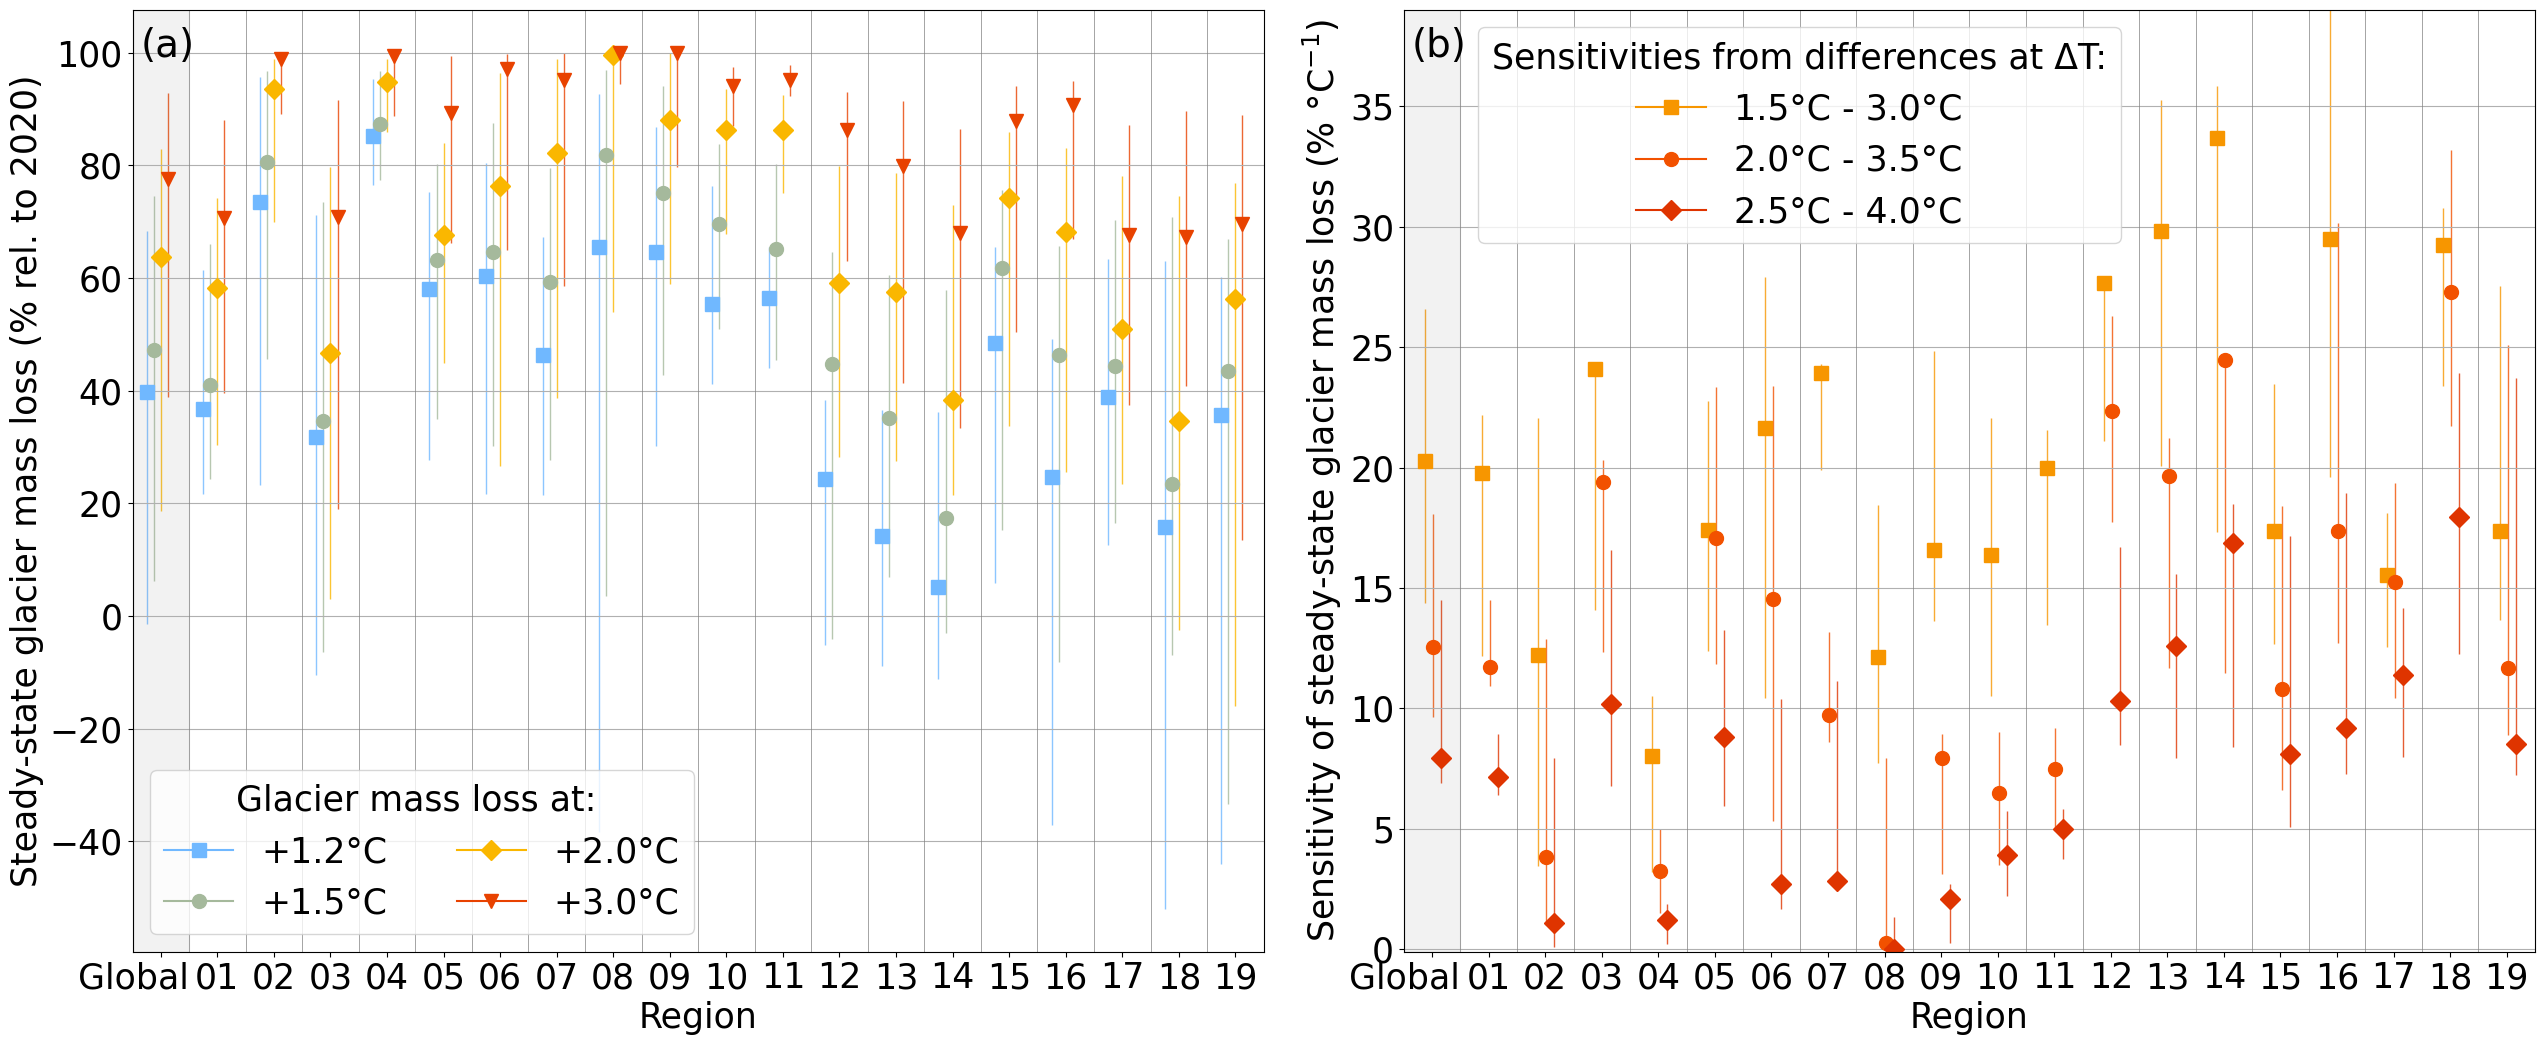

In [197]:
plt.rc('font', size=25)  


show_temp_sensitivity_uncertainties = True
pd_fit_quantiles_reg_sum_global = pd_sel_global_sum_over_reg_fitted_quantiles.copy().reset_index()
pd_fit_quantiles = pd_lowess_fit.copy()
pd_fit_quantiles['x'] = pd_fit_quantiles.index

r_l = ['Global     ']
for r in np.arange(1,20,1):
    r_l.append(f'{r:02g}')

fig, axs = plt.subplots(1,2, figsize=(26,11))
axs = axs.flatten()

ax = axs[0]
#r_l = []
for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    if rgi_reg == 'All':
        pd_fit_quantiles_r= pd_fit_quantiles_reg_sum_global #.loc[pd_fit_quantiles_reg_sum_global.region==rgi_reg]
        # here the median is from the fit over the median global estimates (and not the sum over the regional fits)
        pd_fit_quantiles_r_med =  pd_fit_quantiles.loc[pd_fit_quantiles.region==rgi_reg]
    else:
        pd_fit_quantiles_r= pd_fit_quantiles.loc[pd_fit_quantiles.region==rgi_reg]
        pd_fit_quantiles_r_med= pd_fit_quantiles_r.copy()

    for jj,temp in enumerate(col_temp_l_sel_n):
        pd_fit_quantiles_r_sel = pd_fit_quantiles_r.loc[pd_fit_quantiles_r.x.round(4)==temp]
        pd_fit_quantiles_r_sel_med = pd_fit_quantiles_r_med.loc[pd_fit_quantiles_r_med.x.round(4)==temp]
        
        color = cmap(scaler.transform(np.array(temp).reshape(-1,1))).squeeze()

        ax.vlines([j-0.25+jj*0.125],100-pd_fit_quantiles_r_sel['0.05'], 100-pd_fit_quantiles_r_sel['0.95'], 
                  color = color, zorder=-1, alpha=0.8, lw=1)
        ax.plot([j-0.25+jj*0.125],100-pd_fit_quantiles_r_sel_med['0.5'], #'o',
                 color = color, ms=10, label = f'+{temp}°C',
                marker=markers_sel_n[jj])
        
    #r_l.append(rgi_reg)
    ax.axvline(0.5+j, lw=0.5, color='grey')

    if j == 0:
        handlesa, labelsa = ax.get_legend_handles_labels() #handlesa, labelsa = ax.get_legend_handles_labels()

        leg = ax.legend(handlesa, labelsa,
                        loc='lower left', title= 'Glacier mass loss at: ', ncol=2)
ax.set_xticks(np.arange(0,20,1),r_l)
ax.grid(axis='y')

ax.set_xlabel('Region')

ax.axvspan(-0.5,0.5,color='grey', alpha = 0.1)
ax.set_xlim([-0.5,19.5])

ax.set_ylabel('Steady-state glacier mass loss (% rel. to 2020)')

ax = axs[1]
#r_l = []
for j,rgi_reg in enumerate(pd_fit_quantiles.region.unique()):
    #if rgi_reg == 'All':
    #    
    #else:
    pd_fit_quantiles_r= pd_fit_quantiles.loc[pd_fit_quantiles.region==rgi_reg]
    temp0a = 1.5
    temp0b = 2.0
    temp0c = 2.5
    for jj,_temp in enumerate([temp0a,temp0b,temp0c]):
        color = cmap(scaler.transform(np.array(_temp+1.5/2).reshape(-1,1))).squeeze()
        pd_fit_quantiles_r_sel1 = pd_fit_quantiles_r.loc[pd_fit_quantiles_r.x.round(4)==_temp]
        pd_fit_quantiles_r_sel2 = pd_fit_quantiles_r.loc[pd_fit_quantiles_r.x.round(4)==_temp+1.5]

        #_l = (pd_fit_quantiles_r_sel1['0.05'].values-pd_fit_quantiles_r_sel2['0.05'].values)/1.5
        #_u = (pd_fit_quantiles_r_sel1['0.95'].values-pd_fit_quantiles_r_sel2['0.95'].values)/1.5
        _m = (pd_fit_quantiles_r_sel1['0.5'].values-pd_fit_quantiles_r_sel2['0.5'].values)/1.5
        if show_temp_sensitivity_uncertainties: 
            #ax.vlines([j-0.2+jj*0.2],_l,
            #          _u, 
            #          color = color, zorder=-1, alpha=0.8, lw=1)
            #if rgi_reg == '19':
            pd_per_glac_model_fit_reg = pd_per_glac_model_fit.loc[pd_per_glac_model_fit.region == rgi_reg]
            pd_3_0 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.x.round(4)==_temp+1.5]
            pd_3_0 = pd_3_0.set_index('model_author')
            pd_1_5 = pd_per_glac_model_fit_reg.loc[pd_per_glac_model_fit_reg.x.round(4)==_temp]
            pd_1_5 = pd_1_5.set_index('model_author')
            _vals = ((pd_1_5['0.5'] - pd_3_0['0.5'])/1.5).values # % volume changes per 1°C change
            # append median from overall fit as well, and compute out of that a distribution to get the 0.05/0.95 %-iles
            _l,_u = pd.Series(np.concatenate([_vals,_m])).quantile([0.05,0.95]).values
            #print(_vals, _m)
            print(f'RGI{rgi_reg}: temp. range {_temp}-{_temp+1.5}°C:  {_m.round(2)[0]}[{_l.round(2)}, {_u.round(2)}], single values:  {_vals.round(2)}')

            ax.vlines([j-0.12+jj*0.14],_l,
                      _u, 
                      color = color,
                      zorder=-1, alpha=0.8, lw=1)
            #ax = plt.gca()
            # show single values
            #ax.plot(4*[j-0.12+jj*0.12],_vals, 
            #         color = color, ms=3, ls ='',label = f'+{temp}°C',
            #        marker=markers_sel_n[jj])
        ax.plot([j-0.12+jj*0.14],_m, 
                 color = color, ms=10, label = f'+{_temp}°C',
                marker=markers_sel_n[jj])
        
    #r_l.append(rgi_reg)
    ax.axvline(0.5+j, lw=0.5, color='grey')

    if j == 0:
        handlesa, labelsa = ax.get_legend_handles_labels() #handlesa, labelsa = ax.get_legend_handles_labels()
        leg = ax.legend(handlesa, [f'{temp0a}°C - {temp0a+1.5}°C',
                                f'{temp0b}°C - {temp0b+1.5}°C',
                        f'{temp0c}°C - {temp0c+1.5}°C'],
            	loc='upper left', title= 'Sensitivities from differences at ΔT:', ncol=1, bbox_to_anchor=(0.05,1))
        #leg = ax.legend(handlesa, labelsa,
        #                loc='lower left', title= 'Ice loss at: ', ncol=2)
        

ax.set_xticks(np.arange(0,20,1),r_l)
ax.grid(axis='y')
ax.set_xlabel('Region')

ax.axvspan(-0.5,0.5,color='grey', alpha = 0.1)
ax.set_xlim([-0.5,19.5])
ax.set_ylim([-0.1, 39])
ax.set_ylabel(r'Sensitivity of steady-state glacier mass loss (% °C$^{-1}$)') #+f'\n(ΔT=1.5-3.0°C)') # sensitivity [in % ice loss per °C]')

for j,axi in enumerate(axs):
    #if j <2:
    num_text_y = 0.95
    #else:
    #    num_text_y = 0.87
    axi.text(num_text_x, num_text_y,
             num_dict[j], fontsize=28, transform=axi.transAxes)

plt.tight_layout()

plt.savefig(f'figures/2_shifted_rel_2020_steady_state_temperature_sensitivity_slope_global_regions_{DATE}.png')


In [198]:
old = False
if old:
    pd_lowess_ch = pd.read_csv('lowess_fit_cluster3__rel_2020_100yr__fit_to_median_lowess_added_clusters_normalised.csv', index_col=[0])
    pd_lowess_ch = pd_lowess_ch.reset_index()
    pd_lowess_ch.loc[pd_lowess_ch.region == 'Globally', 'region'] = 'Global     '
    pd_lowess_ch.index = pd_lowess_ch['region']
    fig, axs = plt.subplots(1,2, figsize=(24,9))
    axs = axs.flatten()

    ax = axs[0] #plt.gca()
    # ok, the pvalues are small enough anyways ...
    #assert np.all(pd_slope_rgi_reg.pval<1e-4)
    handles_l = []
    labels_l = []
    j = 0
    for t in col_temp_l_sel_n:
        sns.scatterplot(data=pd_lowess_ch, x='region', y=f'ice_loss_{t}°C_%_rel_2020', ax = ax, color=cols_n[j],
                        marker=markers_sel_n[j],
                        sizes=(200,200), s=100,
                        #size='rval', sizes=(200,50),
                        label=f'{t}°C',


                        legend = 'full'
                       )

        handlesa, labelsa = ax.get_legend_handles_labels() #handlesa, labelsa = ax.get_legend_handles_labels()
        handles_l.append(handlesa[-1])
        labels_l.append(labelsa[-1])
        j+=1
    #ax.set_ylabel('Steady ')

    leg = ax.legend(handles_l, labels_l,
                    loc='lower left', title= 'Ice loss at: ', ncol=2)
    #ax.add_artist(cbar);
    #for j,t in enumerate(leg.texts):#
    ax.grid(axis='y')
    ax.set_xlabel('region')
    #ax.set_ylabel(r'')
    #+f'\n(from difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')

    #ax.set_ylabel('Additional relative lost glacier volume\n(% per °C global warming between 1-4 °C)')
    ax.set_xticks(pd_lowess_ch.index.unique())
    #ax.set_xticklabels(pd_lowess_ch.index.unique(), rotation=45);
    ax.axvspan(-0.5,0.5,color='grey', alpha = 0.1)
    ax.set_xlim([-0.5,19.5])

    ax.set_ylabel('Ice loss in steady-state (% rel. to 2020)')

    ax = axs[1] #plt.gca()
    temp0a = 1.5
    temp1a = 3.0
    # ok, the pvalues are small enough anyways ...
    #assert np.all(pd_slope_rgi_reg.pval<1e-4)

    sns.scatterplot(data=pd_lowess_ch, x='region', y=f'ice_loss_slope_between_{np.round(temp0a,1)}_and_{np.round(temp1a,1)}_per_degC_rel_2020', ax = ax, color= cmap(scaler.transform(np.array(temp0a+(temp1a-temp0a)/2).reshape(-1,1))),
                    marker='o', sizes=(200,200), s=100,
                    #size='rval', sizes=(200,50),
                    label='t',
                    legend = 'full'
                   )

    temp0b = 2.0
    temp1b = 3.5
    handlesa, labelsa = ax.get_legend_handles_labels()

    sns.scatterplot(data=pd_lowess_ch, x='region', y=f'ice_loss_slope_between_{np.round(temp0b,1)}_and_{np.round(temp1b,1)}_per_degC_rel_2020', ax = ax, #color= 'black',
                    marker='o', sizes=(200,200), s=100,
                    color=cmap(scaler.transform(np.array(temp0b+(temp1b-temp0b)/2).reshape(-1,1))),
                    label='t',
                    #size='rval', sizes=(200,50),
                    legend = 'full'
                   )
    handlesb, labelsb = ax.get_legend_handles_labels()
    leg = ax.legend([handlesa[0], handlesb[-1]], [f'{temp0a}°C - {temp1a}°C',
                                    f'{temp0b}°C - {temp1b}°C'],
                    loc='upper left', title= 'from difference between: ', ncol=4)
    #ax.add_artist(cbar);
    #for j,t in enumerate(leg.texts):#
    ax.grid(axis='y')
    ax.set_xlabel('region')
    ax.set_ylabel(r'Steady-state ΔT sensitivity [in % ice loss per °C]')
    #+f'\n(from difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')

    #ax.set_ylabel('Additional relative lost glacier volume\n(% per °C global warming between 1-4 °C)')
    ax.set_xticks(pd_lowess_ch.index.unique())
    #ax.set_xticklabels(pd_lowess_ch.index.unique(), rotation=45);
    ax.axvspan(-0.5,0.5,color='grey', alpha = 0.1)
    ax.set_xlim([-0.5,19.5])

    plt.savefig('figures/2_shifted_rel_2020_steady_state_temperature_sensitivity_slope_global_regions.png')




# OLD 

### Other plots
- slope plots
- steady state under different temperature scenarios
- amount of years to lose XX% of initial state volume 

In [64]:
sim_year = 5000 #2000
pd_global_temp_exp_m = get_glob_temp_exp(region='global')

ds_reg_models_vol = ds_reg_models.isel(simulation_year=slice(0,sim_year+1)).volume_m3
# Let's take the median/iqr estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])

### regional 
ds_reg_models_vol_roll_steady_state = ds_reg_models_vol.median(dim='model_author').sel(simulation_year=slice(sim_year-20,sim_year)).mean(dim='simulation_year')
ds_reg_models_med_vol_2000 = 100*ds_reg_models_vol_roll_steady_state/ds_reg_models_vol.median(dim='model_author').isel(simulation_year=0)
# this here takes a while
#ds_reg_models_gcm_q25_q50_q75_vol = ds_reg_models_gcm_vol.quantile([0.25,0.5,0.75], dim='model_author')
# pd_global_temp_exp_m = get_glob_temp_exp(region=f'RGI{rgi_reg}_global') # pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()
ds_reg_models_med_vol_2000 = ds_reg_models_med_vol_2000.assign_coords(temp_ch_ipcc = ('experiments',
                                                                                       pd_global_temp_exp_m.loc[ds_reg_models_med_vol_2000.experiments.values, 'temp_ch_ipcc'].values))
ds_reg_models_med_vol_2000 = ds_reg_models_med_vol_2000.sortby('temp_ch_ipcc')
ds_reg_models_med_vol_2000 = ds_reg_models_med_vol_2000.reset_coords()
pd_reg_models_med_vol_2000 = ds_reg_models_med_vol_2000.to_dataframe().reset_index()
pd_reg_models_med_vol_2000['region'] = 'RGI' + pd_reg_models_med_vol_2000['rgi_reg']

### global
ds_glob_models_med_vol_2000 = 100*ds_reg_models_vol.median(dim='model_author').sel(simulation_year=slice(sim_year-20,sim_year)).mean(dim='simulation_year').sum(dim='rgi_reg')/ds_reg_models_vol.median(dim='model_author').isel(simulation_year=0).sum(dim='rgi_reg')
ds_glob_models_med_vol_2000 = ds_glob_models_med_vol_2000.assign_coords(temp_ch_ipcc = ('experiments',
                                                                                pd_global_temp_exp_m.loc[ds_glob_models_med_vol_2000.experiments.values, 'temp_ch_ipcc'].values))
ds_glob_models_med_vol_2000 = ds_glob_models_med_vol_2000.sortby('temp_ch_ipcc')
ds_glob_models_med_vol_2000 = ds_glob_models_med_vol_2000.reset_coords()
pd_glob_models_med_vol_2000 = ds_glob_models_med_vol_2000.to_dataframe().reset_index()
pd_glob_models_med_vol_2000['region'] = 'global'

### concatenate both
pd_all_models_med_vol_2000 = pd.concat([pd_glob_models_med_vol_2000, pd_reg_models_med_vol_2000])

# get the % lost per °C (here from 1.5 - 3°C)
pd_all_models_med_vol_2000_sel_1o5_3 = pd_all_models_med_vol_2000.loc[(pd_all_models_med_vol_2000.temp_ch_ipcc>=1.5) & (pd_all_models_med_vol_2000.temp_ch_ipcc<=3)]

slope_rgi_dict = {}
pd_slope_rgi_reg_1o5_3 = pd.DataFrame(index=np.arange(0,20))
intercept_l = []
slope_l = []
rval_l = []
pval_l = []
stderr_l = []
region_l = []
for region in pd_all_models_med_vol_2000_sel_1o5_3.region.unique():
    pd_sel = pd_all_models_med_vol_2000_sel_1o5_3.loc[pd_all_models_med_vol_2000_sel_1o5_3.region==region]
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_sel['temp_ch_ipcc'].values, pd_sel['volume_m3'])
    slope_l.append(slope)
    intercept_l.append(intercept)
    stderr_l.append(stderr)
    rval_l.append(rval)
    pval_l.append(pval)
    region_l.append(region)
pd_slope_rgi_reg_1o5_3['slope'] = slope_l
pd_slope_rgi_reg_1o5_3['intercept'] = intercept_l
pd_slope_rgi_reg_1o5_3['stderr'] = stderr_l
pd_slope_rgi_reg_1o5_3['pval'] = pval_l
pd_slope_rgi_reg_1o5_3['rval'] = rval_l
pd_slope_rgi_reg_1o5_3['region'] = region_l


####
# get the % lost per °C (here from 1 - 4 °C)
pd_all_models_med_vol_2000_sel_1_4 = pd_all_models_med_vol_2000.loc[(pd_all_models_med_vol_2000.temp_ch_ipcc>=1) & (pd_all_models_med_vol_2000.temp_ch_ipcc<=4)]
#pd_reg_models_med_vol_2000_sel_1_4 = pd_reg_models_med_vol_2000.loc[(pd_reg_models_med_vol_2000.temp_ch_ipcc>=1) & (pd_reg_models_med_vol_2000.temp_ch_ipcc<=4)]
#pd_glob_models_med_vol_2000_sel_1_4 = pd_glob_models_med_vol_2000.loc[(pd_glob_models_med_vol_2000.temp_ch_ipcc>=1) & (pd_glob_models_med_vol_2000.temp_ch_ipcc<=4)]

slope_rgi_dict = {}
pd_slope_rgi_reg = pd.DataFrame(index=np.arange(0,20))
intercept_l = []
slope_l = []
rval_l = []
pval_l = []
stderr_l = []
region_l = []
for region in pd_all_models_med_vol_2000_sel_1_4.region.unique():
    pd_sel = pd_all_models_med_vol_2000_sel_1_4.loc[pd_all_models_med_vol_2000_sel_1_4.region==region]
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_sel['temp_ch_ipcc'].values, pd_sel['volume_m3'])
    slope_l.append(slope)
    intercept_l.append(intercept)
    stderr_l.append(stderr)
    rval_l.append(rval)
    pval_l.append(pval)
    region_l.append(region)
pd_slope_rgi_reg['slope'] = slope_l
pd_slope_rgi_reg['intercept'] = intercept_l
pd_slope_rgi_reg['stderr'] = stderr_l
pd_slope_rgi_reg['pval'] = pval_l
pd_slope_rgi_reg['rval'] = rval_l
pd_slope_rgi_reg['region'] = region_l

# - in most cases, the temperature sensitivity is larger from 1.5 to 3°C 

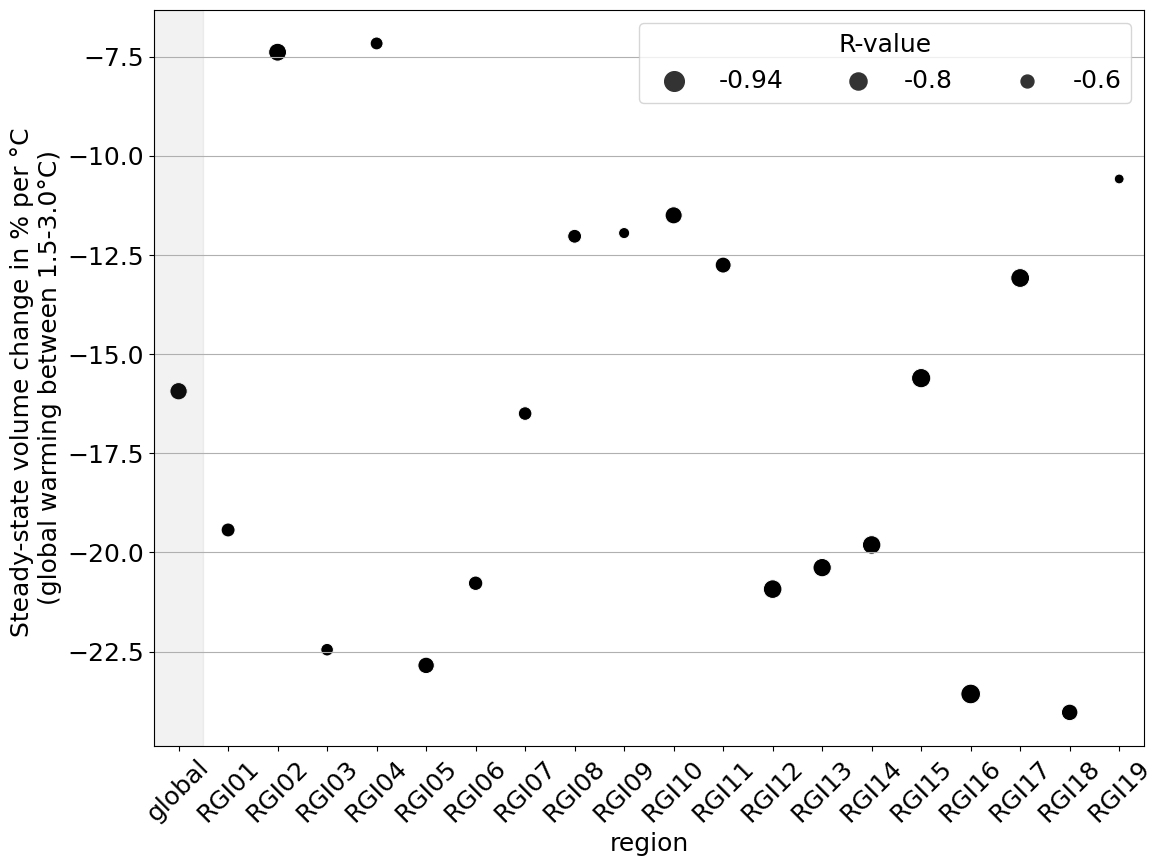

In [65]:
plt.figure(figsize=(12,9))
ax = plt.gca()
# ok, the pvalues are small enough anyways ...
assert np.all(pd_slope_rgi_reg.pval<1e-4)

sns.scatterplot(data=pd_slope_rgi_reg_1o5_3, x='region', y='slope', ax = ax, color= 'black',
                size='rval', sizes=(200,50), legend = 'full')
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles[::8], labels[::8],
                loc='upper right', title= 'R-value', ncol=4)
#ax.add_artist(cbar);
for j,t in enumerate(leg.texts):
    # truncate label text to 4 characters
    t.set_text(np.round(float(t.get_text()),2))
ax.grid(axis='y')
ax.set_xlabel('region')
ax.set_ylabel('Steady-state volume change in % per °C \n(global warming between 1.5-3.0°C)') #, fontsize=20)
#ax.set_ylabel('Additional relative lost glacier volume\n(% per °C global warming between 1-4 °C)')
ax.set_xticks(pd_slope_rgi_reg_1o5_3.region.unique())
ax.set_xticklabels(pd_slope_rgi_reg_1o5_3.region.unique(), rotation=45);
ax.axvspan(-0.5,0.5,color='grey', alpha = 0.1)
ax.set_xlim([-0.5,19.5])
plt.tight_layout()
plt.savefig('figures/2_steady_state_temperature_sensitivity_slope_global_regions.png')

### compare slopes depending on temperature range definition ... 
- just globally for the moment ...

/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


slope  intercept     stderr          pval      rval  region  \
0  -32.056724  93.036549   2.795703  3.965161e-09 -0.944198  global   
1  -32.101875  93.290283   4.092890  2.591488e-05 -0.934009  global   
2  -18.585758  81.456972   1.837048  3.247261e-06 -0.958738  global   
3  -25.221981  88.079385   3.545555  6.804290e-07 -0.846600  global   
4  -32.515641  99.916056   6.023938  2.774090e-05 -0.770041  global   
5  -26.766535  90.933493   3.847270  1.774562e-07 -0.801204  global   
6  -22.279685  82.090666   4.086987  1.331603e-05 -0.743786  global   
7  -17.108353  71.540296   4.230967  8.436466e-04 -0.700190  global   
8  -12.537372  61.766194   3.509614  2.177312e-03 -0.644088  global   
9   -9.287552  52.252907   5.463254  1.148792e-01 -0.440557  global   
10  -7.274351  46.737304   4.740630  1.471994e-01 -0.379436  global   
11 -10.634614  57.019201   6.010923  1.045383e-01 -0.470660  global   
12   4.737536   4.458970   8.032105  5.715865e-01  0.204143  global   
13  -3.833780  34.462079   9.304955  6.911471e-01 -0.144148  global   
14  -9.372424  54.367483  13.073442  5.130650e-01 -0.337430  global   
15 -15.052959  78.903881   7.687202  1.075375e-01 -0.658814  global   

           temp_range   n  
0     0.0-1.0°C: n=18  18  
1   0.25-1.25°C: n=11  11  
2     0.5-1.5°C: n=11  11  
3   0.75-1.75°C: n=22  22  
4     1.0-2.0°C: n=22  22  
5   1.25-2.25°C: n=29  29  
6     1.5-2.5°C: n=26  26  
7   1.75-2.75°C: n=19  19  
8     2.0-3.0°C: n=20  20  
9   2.25-3.25°C: n=14  14  
10    2.5-3.5°C: n=16  16  
11  2.75-3.75°C: n=13  13  
12    3.0-4.0°C: n=10  10  
13  3.25-4.25°C: n=10  10  
14     3.5-4.5°C: n=6   6  
15   3.75-4.75°C: n=7   7

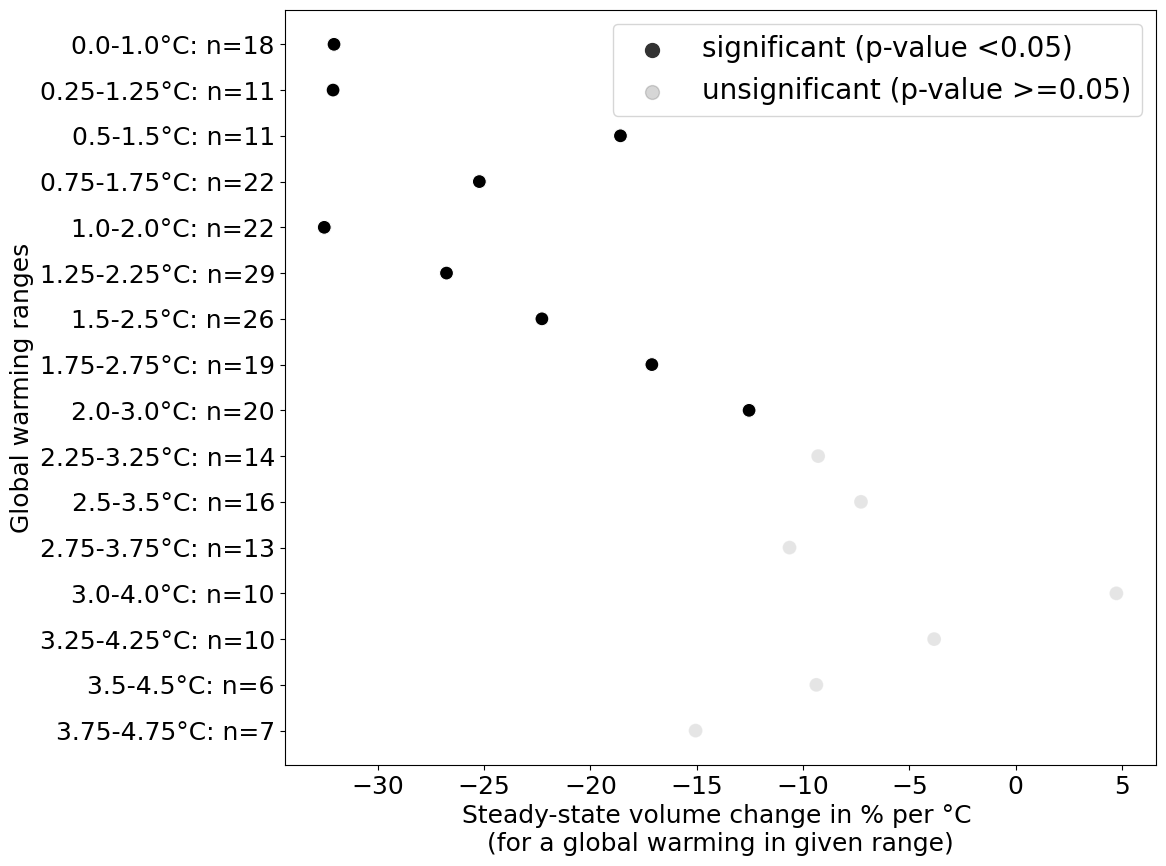

In [98]:
# get the % lost per °C (here from 1.5 - 3°C)
region = 'global'
pd_sel = pd_all_models_med_vol_2000.loc[pd_all_models_med_vol_2000.region==region]

slope_rgi_dict = {}
pd_slope_diff_ranges = pd.DataFrame(index=np.arange(0,20))
intercept_l = []
slope_l = []
rval_l = []
pval_l = []
stderr_l = []
region_l = []

r0_r1_l = []
n_l = []
for r0,r1 in zip(np.arange(0,5,0.25),np.arange(1,6,0.25)):
    pd_sel_r0_r1 = pd_sel.loc[(pd_sel.temp_ch_ipcc>=r0) & (pd_sel.temp_ch_ipcc<=r1)]
    n = len(pd_sel_r0_r1)
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_sel_r0_r1['temp_ch_ipcc'].values, pd_sel_r0_r1['volume_m3'])
    slope_l.append(slope)
    intercept_l.append(intercept)
    stderr_l.append(stderr)
    rval_l.append(rval)
    pval_l.append(pval)
    r0_r1_l.append(f'{r0}-{r1}°C: n={n}')
    n_l.append(n)
pd_slope_diff_ranges['slope'] = slope_l
pd_slope_diff_ranges['intercept'] = intercept_l
pd_slope_diff_ranges['stderr'] = stderr_l
pd_slope_diff_ranges['pval'] = pval_l
pd_slope_diff_ranges['rval'] = rval_l
pd_slope_diff_ranges['region'] = region
pd_slope_diff_ranges['temp_range'] = r0_r1_l
pd_slope_diff_ranges['n'] = n_l

pd_slope_diff_ranges_sel=pd_slope_diff_ranges.loc[pd_slope_diff_ranges.n>=6]
plt.figure(figsize=(12,9))
sns.scatterplot(data=pd_slope_diff_ranges_sel, y='temp_range', x='slope',color= 'grey', alpha = 0.2, sizes=(100,100),size='rval', legend=False)
       #         size='rval', sizes=(200,20)) #, legend = 'full')

sns.scatterplot(data=pd_slope_diff_ranges_sel.loc[pd_slope_diff_ranges_sel.pval<0.05], y='temp_range',sizes=(100,100),size='rval',
                x='slope',color= 'black',legend=True,
                )
                #size='pval',
                #sizes=(200,50)) 
ax = plt.gca()
handles, labels =  ax.get_legend_handles_labels()
handles[0].set_alpha(0.2)
plt.legend([handles[1], handles[0]], ['significant (p-value <0.05)', 'unsignificant (p-value >=0.05)'], fontsize=20)
ax = plt.gca()
ax.set_xlabel('Steady-state volume change in % per °C \n(for a global warming in given range)') #, fontsize=20)

ax.set_ylabel('Global warming ranges')
plt.tight_layout()
plt.savefig(f'figures/2_additional_global_glacier_loss_vs_temp_change_slopes_{DATE}_{sim_year}yr.png')
# as it gets warmer, there is no "significant" slope (as already most glacier ice is gone)
# the more we commit, the less additional lost glacier volume per °C  (less negative slopes)...
pd_slope_diff_ranges_sel

### Steady-state and year until XX% of initial state volume lost

In [72]:
rgi_regs = []
for rgi_reg in np.arange(1,20,1):
    if rgi_reg < 10:
        rgi_reg = '0'+str(rgi_reg)
    else:
        rgi_reg = str(rgi_reg)
    rgi_regs.append(rgi_reg)

In [73]:
ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=20, center=True).mean().dropna(dim='simulation_year', how='all')#.sel(simulation_year=slice(0,sim_year))


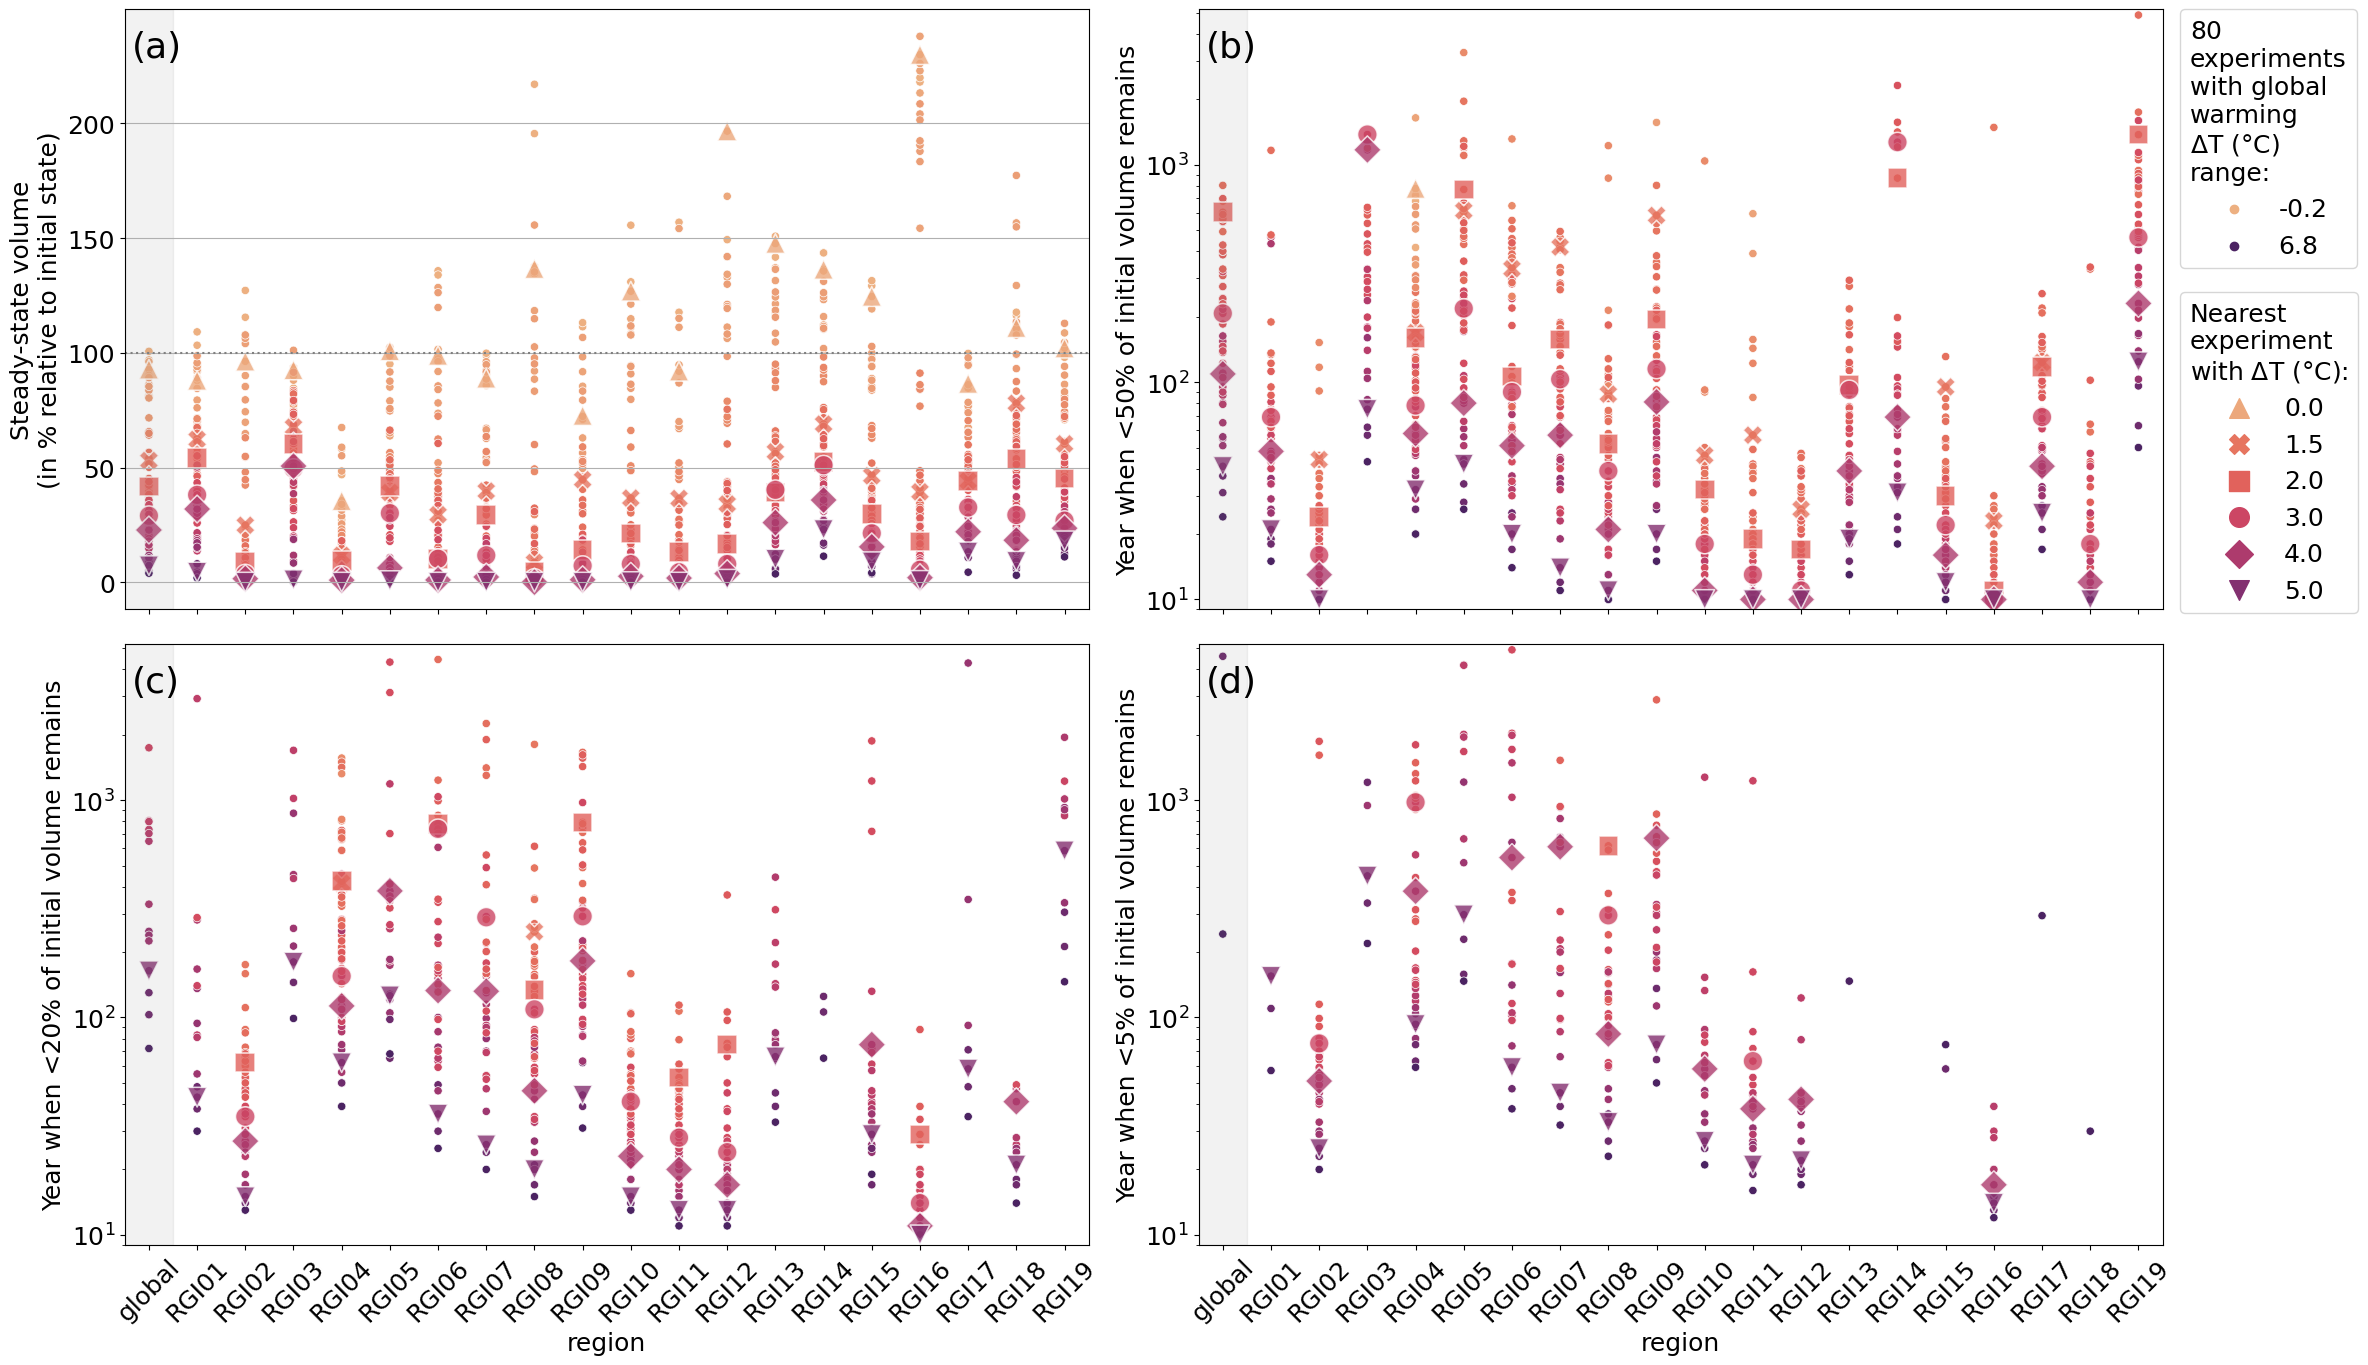

In [96]:
markers = ['^', 'X','s','o','D','v']

norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                     vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.rc('font', size=18)  

markers = ['^', 'X','s','o','D','v']

norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                     vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, axs= plt.subplots(2,2,figsize=(24,14),sharex=True)

# first subplot
ax = axs[0][0] #lt.gca()
# only important for logarithmic plot ... 
pd_all_models_med_vol_2000.loc[pd_all_models_med_vol_2000.volume_m3<0.1, 'volume_m3'] = 0.1
sns.scatterplot(data=pd_all_models_med_vol_2000, y='volume_m3', x='region', hue='temp_ch_ipcc',
                palette='flare', legend=False, ax=ax)
#leg = ax.legend(loc='upper left', bbox_to_anchor=(1,1), title = f'$\Delta$T (°C)\n(global)')
ax.set_ylabel(f'Steady-state volume'+'\n(in % relative to initial state)')
ax.axhline(100, ls=':', color = 'grey')
ax.grid(axis='y')
ax.set_xlabel('region');

# plot specific delta T:
col_temp_l = []
exp_l = []
for temp in [0,1.5,2,3,4,5]: #,5,6]:
    exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
    #sm.colorbar.norm...
    col_temp = cmap(norm(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
    col_temp_l.append(col_temp)
    exp_l.append(exp)

pd_t_sel =ds_reg_models_med_vol_2000.sel(experiments=exp_l).to_dataframe().reset_index()
pd_t_sel['region']  = 'RGI' + pd_t_sel['rgi_reg']
pd_t_sel_glob =ds_glob_models_med_vol_2000.sel(experiments=exp_l).to_dataframe().reset_index()
pd_t_sel_glob['region'] = 'global'
pd_t_sel_all = pd.concat([pd_t_sel_glob, pd_t_sel])
# just to make the plot possible
pd_t_sel_all.loc[pd_t_sel_all.volume_m3 <0.1, 'volume_m3'] = 0.1
#pd_t_sel_all.loc[pd_t_sel_all.volume_m3 <0.1]['volume_m3'] = 0.1
#pd_t_sel['volume (km3)'] = pd_t_sel['volume_m3']/1e9
l_sel = sns.scatterplot(ax=ax,
             data=pd_t_sel_all,
                        markers=markers,
                        style='temp_ch_ipcc',
                        alpha = 0.8,
             y='volume_m3', x='region', hue='temp_ch_ipcc',
                        palette=sns.color_palette(col_temp_l),
             legend=False,size='temp_ch_ipcc', sizes=(200,200));
#leg = ax.legend(loc='upper left', bbox_to_anchor=(1.005,0.99),
#                title=f'$\Delta$T (°C)\n(global)',
#                markerscale=1, handleheight=0.8)

#for j,t in enumerate(leg.texts):
#    # truncate label text to 4 characters
#    if j ==1:
#        t.set_text(np.round(float(t.get_text()),1))
#    else:
#        t.set_text(np.round(float(t.get_text()),0))
# set the linewidth of each legend object
#for legobj in leg.legendHandles:
#    legobj.set_linewidth(4.0)
#    legobj.set_linestyle('--')
ax.set_xticks(pd_t_sel_all.region.unique())
ax.set_xticklabels(pd_t_sel_all.region.unique(), rotation=45)
#ax.set_yticks([5,10,20,40, 80, 160, 320],[5,10,20,40, 80, 160, 320])

#x = pd_t_sel_all.volume_m3.values
#def stratify(ax, power=2):
#    f     = lambda x: (x + 1)**(1 / power)
#    f_inv = lambda y: y**power - 1
#    ax.set_yscale('function', functions=(f, f_inv))
#stratify(ax, power=2)

#ax.set_yscale('log', base=2)
#ax.set_yticks([5,10,20,40, 80, 160, 320],[5,10,20,40, 80, 160, 320])
######## Next subplot    


################### Next subplot: year where less than 50%/20% /1% remains
for ax, perc in zip([axs[0][1], axs[1][0], axs[1][1]], [50,20,5]):
    # make sure that we use the 20-year rolling average !!!
    ds_reg_models_med_vol_glob_rel = 100*ds_reg_models_med_vol_roll.sum(dim='rgi_reg')/ds_reg_models_med_vol.sel(simulation_year=0).sum(dim='rgi_reg')
    ds_reg_models_med_vol_glob_rel = ds_reg_models_med_vol_glob_rel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_glob_rel.experiments, # make sure thatwe use the same experiments
                                                                                                   'temp_ch_ipcc']))

    ds_reg_below_50_perc = ds_reg_models_med_vol_glob_rel.where(ds_reg_models_med_vol_glob_rel<=perc)
    ds_reg_below_50_perc.max(dim='simulation_year')
    yr_50_perc = ds_reg_below_50_perc.idxmax(dim='simulation_year')

    pd_yr_50_perc = yr_50_perc.to_dataframe(f'Year when <{perc}% of initial volume remains').reset_index()
    pd_yr_50_perc['region'] = 'global' 

    for rgi_reg in rgi_regs:
        ds_reg_models_med_vol_sel_rel = 100*ds_reg_models_med_vol_roll.sel(rgi_reg=rgi_reg)/ds_reg_models_med_vol.sel(simulation_year=0).sel(rgi_reg=rgi_reg)
        ds_reg_models_med_vol_sel_rel = ds_reg_models_med_vol_sel_rel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                              pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel_rel.experiments, # make sure thatwe use the same experiments
                                                                                                       'temp_ch_ipcc']))

        ds_reg_below_50_perc_sel = ds_reg_models_med_vol_sel_rel.where(ds_reg_models_med_vol_sel_rel<=perc)
        ds_reg_below_50_perc_sel.max(dim='simulation_year')
        yr_50_perc_sel = ds_reg_below_50_perc_sel.idxmax(dim='simulation_year')

        pd_yr_50_perc_reg = yr_50_perc_sel.to_dataframe(f'Year when <{perc}% of initial volume remains').reset_index()
        pd_yr_50_perc_reg['region'] = f'RGI{rgi_reg}'
        pd_yr_50_perc = pd.concat([pd_yr_50_perc,pd_yr_50_perc_reg])

    pd_yr_50_perc=pd_yr_50_perc.drop(columns='rgi_reg')
    #pd_yr_50_perc = pd_yr_50_perc.dropna()

    if perc == 50:
        legend_opt = 'full'
    else:
        legend_opt = False
    sns.scatterplot(ax=ax,
                    hue='temp_ch_ipcc',
                    y=f'Year when <{perc}% of initial volume remains',
                    x='region',
                    palette='flare',
                    data=pd_yr_50_perc, legend=legend_opt)
    if perc == 50:
        handles, labels = ax.get_legend_handles_labels()
        leg2 = ax.legend()
        leg2.remove()
    # plot specific delta T:
    ds_sel = pd_yr_50_perc.groupby(['gcm','period_scenario','region']).mean().to_xarray().stack(experiments=['gcm','period_scenario'])
    pd_yr_50_perc_sel = ds_sel.sel(experiments=exp_l).to_dataframe().reset_index().dropna()
    if np.all(pd_yr_50_perc_sel.temp_ch_ipcc >=1.6):
        col_temp_l_sel = col_temp_l[2:].copy()
        markers_sel = markers[2:].copy()
    elif np.all(pd_yr_50_perc_sel.temp_ch_ipcc >=0.5):
        # in no region that amount is lost when having 0°C global warming
        col_temp_l_sel = col_temp_l[1:].copy()
        markers_sel = markers[1:].copy()
    else:
        col_temp_l_sel = col_temp_l.copy()
        markers_sel = markers.copy()
        
    if perc == 50:
        legend_opt = 'auto'
    else:
        legend_opt = False
    sns.scatterplot(ax=ax,
                    hue='temp_ch_ipcc',
                    y=f'Year when <{perc}% of initial volume remains',
                    x='region',
                    data=pd_yr_50_perc_sel,
                    markers=markers_sel,
                    style='temp_ch_ipcc',
                    palette=sns.color_palette(col_temp_l_sel),
                    alpha = 0.8,
                 legend=legend_opt,size='temp_ch_ipcc', sizes=(200,200));
    if perc == 50:
        hand1, label1 = ax.get_legend_handles_labels()
        leg = ax.legend(hand1[-6:], label1[-6:], loc='upper left', bbox_to_anchor=(1.005,0.55),
                        title=f'Nearest\nexperiment\nwith $\Delta$T (°C):',
                        markerscale=1, handleheight=0.8)
        ax.legend([handles[0], handles[-1]], [np.round(float(labels[0]),1), np.round(float(labels[-1]),1)], loc='upper left', bbox_to_anchor=(1.005,1.02),
                    title=f'80\nexperiments\nwith global\nwarming\n$\Delta$T (°C)\nrange:',
                    markerscale=1, handleheight=0.8)
        ax.add_artist(leg)
        for j,t in enumerate(leg.texts):
        #    # truncate label text to 4 characters
            if j ==1:
                t.set_text(np.round(float(t.get_text()),1))
            else:
                t.set_text(np.round(float(t.get_text()),0))
                
                
        ## get colormap 
        add_cmap = False
        if add_cmap:
            cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.02, ax.get_position().height / 2.1])
            cbar = ax.figure.colorbar(sm, cax=cax)
            cbar.ax.invert_yaxis()
            cbar.set_ticks([0,1.5,3.0,4.5,6.0])
    ax.set_ylim([9,5200])
    ax.set_yscale('log')
    ax.set_xticks(pd_yr_50_perc.region.unique())
    ax.set_xticklabels(pd_yr_50_perc.region.unique(), rotation=45)
    
plt.tight_layout() 
num_text_x = 0.007
for j,axi in enumerate([axs[0][0],axs[0][1], axs[1][0], axs[1][1]]):
    #if j <2:
    num_text_y = 0.92
    #else:
    #    num_text_y = 0.87
    axi.text(num_text_x, num_text_y,
             num_dict[j], fontsize=26, transform=axi.transAxes)
    axi.axvspan(-0.5,0.5,color='grey', alpha = 0.1)
    axi.set_xlim([-0.5,19.5])
plt.savefig(f'figures/2_condensed_steady_state_year_w_perc_to_initial_state_rgi_region_analysis_{DATE}_{sim_year}yr.png')

In [74]:
markers_sel

['X', 's', 'o', 'D', 'v']

In [73]:
pd_yr_50_perc_sel

region          gcm   period_scenario  temp_ch_ipcc  \
11  RGI02  ukesm1-0-ll  2061-2080_ssp585      5.170543   
22  RGI04    gfdl-esm4  2081-2100_ssp585      3.941455   
23  RGI04  ukesm1-0-ll  2061-2080_ssp585      5.170543   
29  RGI05  ukesm1-0-ll  2061-2080_ssp585      5.170543   
35  RGI06  ukesm1-0-ll  2061-2080_ssp585      5.170543   
41  RGI07  ukesm1-0-ll  2061-2080_ssp585      5.170543   
46  RGI08    gfdl-esm4  2081-2100_ssp585      3.941455   
47  RGI08  ukesm1-0-ll  2061-2080_ssp585      5.170543   
53  RGI09  ukesm1-0-ll  2061-2080_ssp585      5.170543   
59  RGI10  ukesm1-0-ll  2061-2080_ssp585      5.170543   
65  RGI11  ukesm1-0-ll  2061-2080_ssp585      5.170543   
95  RGI16  ukesm1-0-ll  2061-2080_ssp585      5.170543   

    Year when <1% of initial glacier volume remains  
11                                             35.0  
22                                           4390.0  
23                                            156.0  
29                                            741.0  
35                                             75.0  
41                                             75.0  
46                                            147.0  
47                                             48.0  
53                                            120.0  
59                                             68.0  
65                                             29.0  
95                                             24.0

### OLD???

In [165]:
def get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region='global', perc=90, sim_year=2000, avg_last_20yr = False, smooth_values_percentiles=1,
                                                        exp_decay_temp_fit=False, temp_above_1_1=False, landscape = False):
    

    if temp_above_1_1:
        add= '_temp_above_1_1'
        current_deltaT = 1.1
    else:
        add = ''
        current_deltaT = 0
        
    pd_exp_decay_fits_simple = pd.read_csv(f'fitted_glacier_response_to_global_temp_ch_simple_20yr_avg_period{add}.csv', index_col=0)

        
    q1=(50-perc/2)/100
    q2=(50+perc/2)/100
    
    
    plt.rc('font', size=24)  
    if landscape:
        fig,axs= plt.subplots(1,2,figsize=(26,10))
        add = add+'_landscape'

    else:
        fig,axs= plt.subplots(2,1,figsize=(12,20))

    ax = axs[0]
    # get global temp. change
    pd_global_temp_exp_m = get_glob_temp_exp(region='global')

    if region == 'global':
        # get global glacier temp.change
        pd_global_temp_exp_m_glac = get_glob_temp_exp(region='global_glacier')
        ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sum(dim='rgi_reg')
        n_models = ''
        rgi_reg = 'global'
        rgi_reg_f = 'All'

    else:
        # get regional glacier temp. change
        pd_global_temp_exp_m_glac = get_glob_temp_exp(region=region)
        rgi_reg = region[3:5]
        rgi_reg_f = rgi_reg
        ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sel(rgi_reg=rgi_reg)
        # check how many glacier models have at least some estimates
        reg_glac_models = ds_reg_models_vol.sel(rgi_reg=rgi_reg).dropna(dim='model_author', how='all').model_author
        print(reg_glac_models.values)
        n_models = len(reg_glac_models)
        n_models = f'{n_models} '
    if exp_decay_temp_fit:
        # only for exp_decay_temp_fit
        _,_,a,b = pd_exp_decay_fits_simple.loc[(pd_exp_decay_fits_simple.rgi_reg==rgi_reg_f)&(pd_exp_decay_fits_simple.year==5000)].values.squeeze()
        pd_global_temp_exp_m['fitted_vol_ch'] = a*np.exp(-b*(pd_global_temp_exp_m['temp_ch_ipcc']-current_deltaT))
        if temp_above_1_1:
            # don't plot above 0°C
            pd_global_temp_exp_m.loc[pd_global_temp_exp_m.temp_ch_ipcc<current_deltaT, 'fitted_vol_ch'] = np.NaN
    
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments pd_global_temp_exp_m_glac
                                                                                                 'temp_ch_ipcc']))
    
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc_glacier = ('experiments',
                                                                          pd_global_temp_exp_m_glac.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments pd_global_temp_exp_m_glac
                                                                                                 'temp_ch_ipcc']))
    # need that to have bot volume_m3 and temp_ch_ipcc as variables
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.reset_coords()
    init_vol = ds_reg_models_med_vol_sel.volume_m3.isel(simulation_year=0)
    ds_reg_models_med_vol_sel['relative volume change (in %)'] = 100*ds_reg_models_med_vol_sel.volume_m3/init_vol
    #print(ds_reg_models_med_vol_sel)
    pd_t =ds_reg_models_med_vol_sel.to_dataframe().reset_index()
    #pd_t['volume (km3)'] = pd_t['volume_m3']/1e9

    g = sns.lineplot(ax=ax,
                 data=pd_t,
                 x='simulation_year',
                 y='relative volume change (in %)', #'volume (km3)',
                hue='temp_ch_ipcc', palette='flare',legend=False,lw=1, alpha = 0.7);

    ## get colormap 
    norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                         vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
    cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    if landscape:
        cax = fig.add_axes([ax.get_position().x1-0.07, ax.get_position().y0+0.01, 0.02, ax.get_position().height / 2.6])
    else:
        cax = fig.add_axes([ax.get_position().x1-0.12, ax.get_position().y0+0.01, 0.02, ax.get_position().height / 2.6])
    cbar = ax.figure.colorbar(sm, cax=cax)
    cbar.ax.invert_yaxis()
    cbar.set_ticks([0,1.5,3.0,4.5,6.0])
    cbar.set_label(r'$\Delta$T (°C, global)')
    
    # plot specific delta T:
    col_temp_l = []
    exp_l = []
    for temp in [0,1.5,2,3,4,5]: #,5,6]:
        exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
        col_temp = cmap(sm.colorbar.norm(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
        col_temp_l.append(col_temp)
        exp_l.append(exp)
    pd_t_sel =ds_reg_models_med_vol_sel.sel(experiments=exp_l).to_dataframe().reset_index()
    #pd_t_sel['volume (km3)'] = pd_t_sel['volume_m3']/1e9
    l_sel = sns.lineplot(ax=ax,
                 data=pd_t_sel,
                 x='simulation_year',
                 y='relative volume change (in %)', #'volume (km3)',
                hue='temp_ch_ipcc', palette=sns.color_palette(col_temp_l),
                 legend='auto',lw=5, ls='--');
    ax.legend(loc='upper right', bbox_to_anchor=(1,1), markerscale=1, handleheight=0.8)
    leg = ax.get_legend()
    for j,t in enumerate(leg.texts):
        # truncate label text to 4 characters
        if j ==1:
            t.set_text(np.round(float(t.get_text()),1))
        else:
            t.set_text(np.round(float(t.get_text()),0))
    # set the linewidth of each legend object
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
        legobj.set_linestyle('--')
    #g.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1)

    exp_temp_min = ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmin()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q1_2_min = ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([q1,q2], dim='model_author')/1e9
    if region == 'global':
        q1_2_min_glob = q1_2_min.sum(dim='rgi_reg')
    else:
        q1_2_min_glob = q1_2_min.sel(rgi_reg=rgi_reg)
    q1_2_min_glob = (100*q1_2_min_glob/q1_2_min_glob.isel(simulation_year=0))
    ax.fill_between(ds_reg_models_med_vol_sel.simulation_year,
             q1_2_min_glob.sel(quantile=q1), q1_2_min_glob.sel(quantile=q2), alpha = 0.2, color=l_sel.lines[0].get_color())
    #handles, labels = ax.get_legend_handles_labels()
    #t = plt.legend(handles, labels)
    #ax.add_artist(leg)

    exp_temp_max = ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmax()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q1_2_max = ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([q1,q2], dim='model_author')/1e9
    if region == 'global':
        q1_2_max_glob = q1_2_max.sum(dim='rgi_reg')
    else:
        q1_2_max_glob = q1_2_max.sel(rgi_reg=rgi_reg)
    q1_2_max_glob = (100*q1_2_max_glob/q1_2_max_glob.isel(simulation_year=0))

    ax.fill_between(ds_reg_models_med_vol_sel.simulation_year,
             q1_2_max_glob.sel(quantile=q1), q1_2_max_glob.sel(quantile=q2), alpha = 0.2, color=l_sel.lines[-1].get_color());
    if region == 'global':
        ax.set_ylabel(f'Global glacier volume (in %, relative to initial state)')
    else:
        ax.set_ylabel(f'RGI{rgi_reg} glacier volume (in %, relative to initial state)')
    ax.set_xlabel('Simulation year')
    #ax.legend(loc='upper left', bbox_to_anchor=(1.01,0.98))
    #leg = ax.get_legend()
    #leg.loc('upper right')
    leg.set_title(r'$\Delta$T (°C)'+f'\n(global)')

    # add additional legend for glacier model uncertatinties and other things ... 
    #define patches and lines to add to legend
    #patch_min = mpatches.Patch(label=f'{perc}th %-ile minimum temperature',  alpha = 0.2, color=l.lines[0].get_color())
    patch_max = mpatches.Patch(label=f'{perc}th %-ile of {n_models}glacier models',  alpha = 0.2, color='grey')
    line1 = Line2D([0], [0], label=f'median of {n_models}glacier models', color='black', lw=1, alpha = 0.7)
    line2 = Line2D([0], [0], label=r'experiment nearest to $\Delta$T', color='black', lw=5, alpha = 0.8, ls = '--')
    #add handles
    handles= [line1, line2, patch_max]
    #add legend
    ax.legend(handles=handles, title='n=80 experiments', loc='upper left', bbox_to_anchor=(0.1,1))
    ax.add_artist(leg)
    
    if region == 'global':
        ax.set_title(f'Global glacier volume equilibration experiments')
    else:
        ax.set_title(f'RGI{rgi_reg} glacier volume equilibration experiments')
    if sim_year == 2000:
        ax.set_xlim(ax.get_xlim()[0], 2600)
        ax.set_xticks(np.arange(0,2100,500),np.arange(0,2100,500))
    else:
        ax.set_xlim(ax.get_xlim()[0], 6400)
        ax.set_xticks(np.arange(0,5100,1000),np.arange(0,5100,1000))
    ########################## Second subplot
    ax=axs[1]
    ax0_ylim0, ax0_ylim1 = axs[0].get_ylim()
    if region == 'global':
        ax.set_title(f'Global glacier volume after {sim_year} years')
    else:
        ax.set_title(f'RGI{rgi_reg} glacier volume after {sim_year} years')
    sns.scatterplot(ax=ax,
                    x='temp_ch_ipcc',
                 y='relative volume change (in %)', #'volume (km3)',
                    data = pd_t.loc[pd_t.simulation_year==sim_year],
                #    color='black', alpha = 0.3,
                hue='temp_ch_ipcc', palette='flare',
                    legend=False, s=80)

    ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial levels)')
    #ax.get_legend().set_title(r'$\Delta$T (°C)');

    q1_2_2000 = ds_reg_models_vol.isel(simulation_year=sim_year).quantile([q1,q2], dim='model_author')
    if region == 'global':
        q1_2_2000_glob = q1_2_2000.sum(dim='rgi_reg')
    else:
        q1_2_2000_glob = q1_2_2000.sel(rgi_reg=rgi_reg)

    q1_2_2000_glob = q1_2_2000_glob.assign_coords(temp_ch_ipcc = ('experiments',
                                                   pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel.experiments.values, 'temp_ch_ipcc'].values))
    q1_2_2000_glob = q1_2_2000_glob.reset_coords()
    # init_vol is the same
    q1_2_2000_glob['relative volume change (in %)'] = 100*q1_2_2000_glob.volume_m3/init_vol[0]

    q1_2_2000_glob = q1_2_2000_glob.sortby('temp_ch_ipcc')
    def smoothen(x, winsize=smooth_values_percentiles):
        return np.array(pd.Series(x).rolling(winsize).mean())[winsize-1:] # want to have a centered rolling mean 
    #print(pd.Series(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1)).rolling(smooth_values_percentiles).mean())
    #r = smoothen(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1))
    #print(   r     )
    #print(len(r))
    if exp_decay_temp_fit:
        handles= [line1]
        if region=='global':
            line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
            handles= [line1]
            ax.legend(handles=handles, title=f'{n_models}glacier models', loc = 'upper left', bbox_to_anchor=(0.1,1))
        else:
            ds_t = 100*ds_reg_models_vol.sel(rgi_reg=rgi_reg).isel(simulation_year=slice(sim_year-21,sim_year-1)).mean(dim='simulation_year').dropna(dim='model_author')/ds_reg_models_vol.sel(rgi_reg=rgi_reg).isel(simulation_year=0).dropna(dim='model_author')
            #ds_t = ds_t.to_dataset().assign_coords(temp_ch_ipcc=pd_global_temp_exp_m_glac['temp_ch_ipcc'].values)
            pd_tt = ds_t.to_dataframe()
            pd_tt = pd_tt.reset_index()
            for m in pd_tt.model_author.unique():
                pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
            
            sns.scatterplot(ax=ax,
                x='temp_ch_ipcc',
                y='volume_m3', #'volume (km3)',
                data = pd_tt,
                hue='temp_ch_ipcc', palette='flare',
                #color='black', alpha=0.3,
                            legend=False, s=80)
            line1 = Line2D([0], [0], label='all', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
            handles= [line1]
            ax.legend(handles=handles, title=f'{n_models}glacier models', loc = 'upper left', bbox_to_anchor=(0.1,1))


    else:
        if smooth_values_percentiles>1:
            ax.fill_between(q1_2_2000_glob.temp_ch_ipcc[int((smooth_values_percentiles-1)/2):-int((smooth_values_percentiles-1)/2)],
                             smoothen(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1)),
                             smoothen(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q2)),
                             #step='mid',
                             #interpolate=True,
                             alpha = 0.2, color='grey');
        else:
            ax.fill_between(q1_2_2000_glob.temp_ch_ipcc,
                            q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1),
                            q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q2),
            #                #step='mid',
            #                #interpolate=True,
                             alpha = 0.2, color='grey')

        #define patches and lines to add to legend
        line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
        if smooth_values_percentiles == 1: 
            patch = mpatches.Patch(label=f'{perc}th %-ile',  alpha = 0.2, color='grey')
        else:
            patch = mpatches.Patch(label=f'{perc}th %-ile\n({smooth_values_percentiles}-yr avg.)',
                                   alpha = 0.2, color='grey')
        
        #line1 = Line2D([0], [0], label='First Manual Line', color='purple')
        #add handles
        handles= [line1,patch]
        #add legend
        ax.legend(handles=handles, title=f'{n_models}glacier models', loc = 'upper left', bbox_to_anchor=(0.1,1))
    pd_t_sel_1o5_3 = pd_t.loc[(pd_t.temp_ch_ipcc>=1.5) & (pd_t.temp_ch_ipcc<=3)]
    pd_t_sel_1o5_3 = pd_t_sel_1o5_3.loc[pd_t_sel_1o5_3.simulation_year==sim_year]
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_t_sel_1o5_3['temp_ch_ipcc'].values, pd_t_sel_1o5_3['relative volume change (in %)'])
    
    if exp_decay_temp_fit:
        sns.lineplot(data=pd_global_temp_exp_m, x='temp_ch_ipcc', y='fitted_vol_ch', lw=4, color='black', ax=ax)
        func_vars = r'$V_{rel}$'+'(%)='+f'{a:.1f}*exp(-{b:.2f}*ΔT)'
        if temp_above_1_1:
            func_vars= r'$V_{rel}$'+'(%)='+f'{a:.1f}*exp(-{b:.2f}*(ΔT-{current_deltaT}°C))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
        y_deltaT2 =  a*np.exp(-b*(2-current_deltaT))
        if rgi_reg not in ['01','04','03','05','14','17','19','13', 'global']:
            ax.annotate(f'{func_vars}', xy=(2,y_deltaT2),xytext=(2,),
                        arrowprops=dict(arrowstyle="->"), color='black', alpha=0.95)
        elif rgi_reg in ['04']:
            ax.annotate(f'{func_vars}', xy=(2,y_deltaT2),xytext=(0,30),
                        arrowprops=dict(arrowstyle="->"),  color='black', alpha=0.95)
        else:
            ax.annotate(f'{func_vars}', xy=(2,y_deltaT2),xytext=(-0.25,-4),
                        arrowprops=dict(arrowstyle="->"), color='black', alpha=0.95) #, connectionstyle="arc3, rad=0.3"),
    else:
        ax.plot(pd_t_sel_1o5_3['temp_ch_ipcc'], slope*pd_t_sel_1o5_3['temp_ch_ipcc'].values + intercept, color = 'black', alpha = 0.7, lw=4)

        if rgi_reg not in ['01','04','03','05','14','17','19', 'global']:
            ax.annotate(f'{-slope:.0f}% volume loss\nper °C additional\nglobal warming', xy=(2,slope*2 + intercept),xytext=(2,50),
                        arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black', alpha=0.95)
        elif rgi_reg in ['04']:
            ax.annotate(f'{-slope:.0f}% volume loss\nper °C additional\nglobal warming', xy=(2,slope*2 + intercept),xytext=(2,30),
                        arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black', alpha=0.95)
        else:
            ax.annotate(f'{-slope:.0f}% volume loss\nper °C additional\nglobal warming', xy=(2,slope*2 + intercept),xytext=(-0.25,0),
                        arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black', alpha=0.95)
    ax.set_ylim([ax0_ylim0, ax0_ylim1])
    ################ 3rd inset subplot ##############
    #plt.tight_layout()
    inset_ax = inset_axes(ax,
                        width="38%", # width = 30% of parent_bbox
                        height="48%", # height : 1 inch
                        loc='upper right'
                           #bbox_to_anchor=(1,)
                           )
    sns.scatterplot(data=pd_t, ax = inset_ax,
                    x='temp_ch_ipcc', y='temp_ch_ipcc_glacier',
                    #color='black', alpha = 0.3,
                    hue='temp_ch_ipcc', palette='flare',
                    legend=False)
    #inset_axes.set_title(f'Glacier area-weighted vs global\n'+r'temperature changes ($\Delta$T)'+'\ncompared to preindustrial levels')
    inset_ax.set_xlabel(r'$\Delta$T$_{global}$ (°C)')# + '\n(°C, compared to pre-industrial levels)')
    if region == 'global':
        inset_ax.set_ylabel(r'$\Delta$T$_{glacier}$ (°C)'+'\n(area-weighted)')
    else:
        inset_ax.set_ylabel(r'$\Delta$T$_{glacier}$ '+f'RGI{rgi_reg} (°C)\n(area-weighted)')
    inset_ax.grid(alpha=0.5)
    # add linear fit
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_t['temp_ch_ipcc'].values, pd_t['temp_ch_ipcc_glacier'])
    inset_ax.plot(pd_t['temp_ch_ipcc'], slope*pd_t['temp_ch_ipcc'].values + intercept, color = 'black', alpha = 0.5, lw=4)
    if region == 'global':
        inset_ax.annotate(f'{slope:.1f}°C '+r'$\Delta$T$_{glacier}$'+'\nper 1.0°C '+r'$\Delta$T$_{global}$',
                          xy=(3,slope*3 + intercept),
                          xytext=(4-2-0.5,slope*4 + intercept-8),
                          fontsize = 21,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)
    else:
        inset_ax.annotate(f'{slope:.1f}°C '+r'$\Delta$T$_{glacier}$'+f'\nRGI{rgi_reg} per'+'\n1°C '+r'$\Delta$T$_{global}$',
                          xy=(3,slope*3 + intercept),
                          xytext=(0.4,0.04),    #(4-2,slope*4 + intercept-8),
                          textcoords='axes fraction', fontsize=20,
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)
    
    inset_ax.set_aspect('equal')
    ylim0,ylim1 = inset_ax.get_ylim()
    xlim0,xlim1 = inset_ax.get_xlim()
    lim0 = min(ylim0, xlim0)
    lim1 = max(ylim1, xlim1)
    inset_ax.set_xlim([lim0, lim1])
    inset_ax.set_ylim([lim0, lim1])

    inset_ax.set_xticks(np.arange(0,lim1,2))
    inset_ax.set_yticks(np.arange(0,lim1,2))
    #inset_ax.add_artist(Line2D([pd_t.temp_ch_ipcc_glacier.min(), pd_t.temp_ch_ipcc_glacier.max()],
    #                           [pd_t.temp_ch_ipcc_glacier.min(), pd_t.temp_ch_ipcc_glacier.max()], color='grey'))

    # add a,b,c
    num_text_x = 0.007
    for j,axi in enumerate([axs[0],axs[1], inset_ax]):
        if j <2:
            num_text_y = 0.94
        else:
            num_text_y = 0.87
        axi.text(num_text_x, num_text_y,
                 num_dict[j], fontsize=26, transform=axi.transAxes)
        
    
    if region == 'global':
        for ax in axs:
            ax.set_ylabel('Glacier volume (in %)')
            ax.set_yticks(np.arange(0,160,25),np.arange(0,160,25))

    # plt.tight_layout()
    #plt.savefig(f'/home/www/lschuster/glacierMIP3_analysis/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait.png', bbox_inches='tight')
    if exp_decay_temp_fit:
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr_exp_decay_temp_fit{add}.png', bbox_inches='tight')
        #plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr_exp_decay_temp_fit{add}.pdf', bbox_inches='tight')

    else:
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr_slope.png', bbox_inches='tight')
        #plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr_slope.pdf', bbox_inches='tight')



    #plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr.pdf', bbox_inches='tight')
    return (pd_t.loc[pd_t.simulation_year==sim_year], q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1), q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q2))

['Rounce' 'Compagno' 'OGGM_v16' 'OGGM-VAS' 'GLIMB' 'Kraaijenbrink']


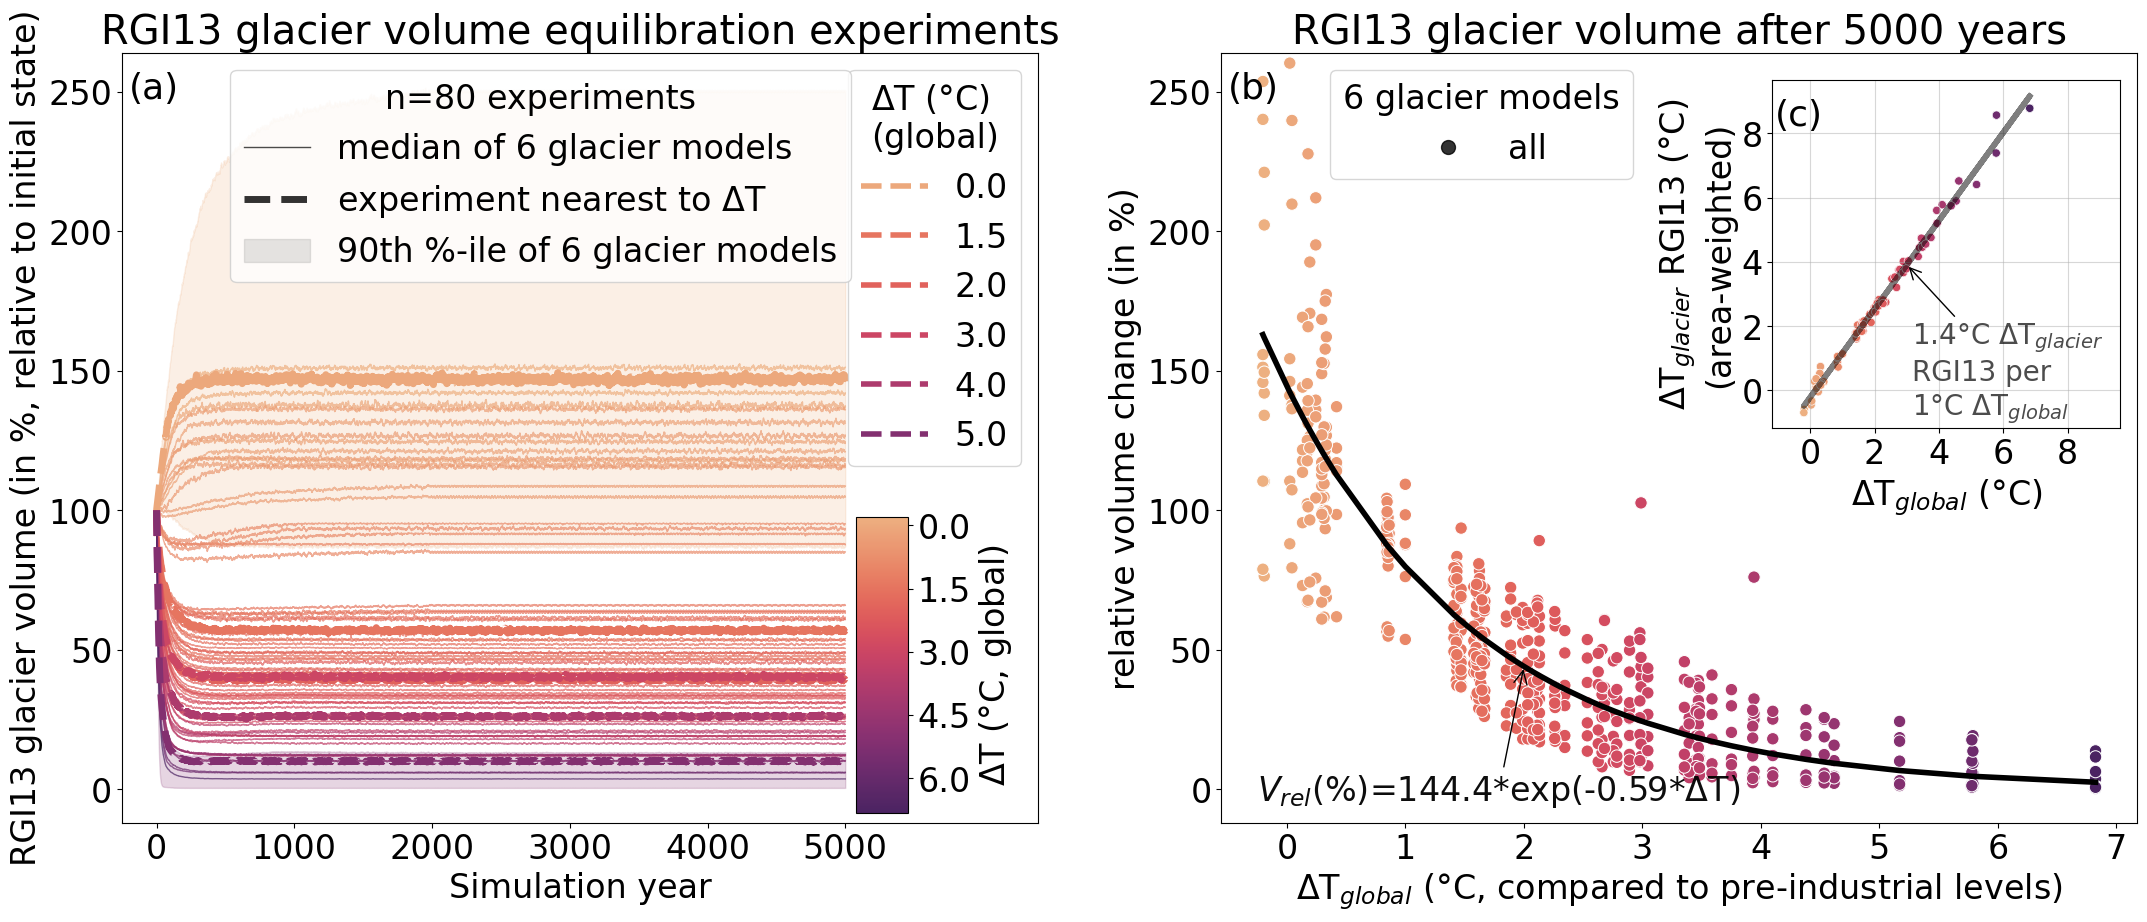

In [166]:
_ = get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region=f'RGI13_glacier', perc=90, sim_year=5000, exp_decay_temp_fit = True, temp_above_1_1=False, landscape=True)

['Rounce' 'Compagno' 'OGGM_v16' 'OGGM-VAS' 'GLIMB' 'Kraaijenbrink']


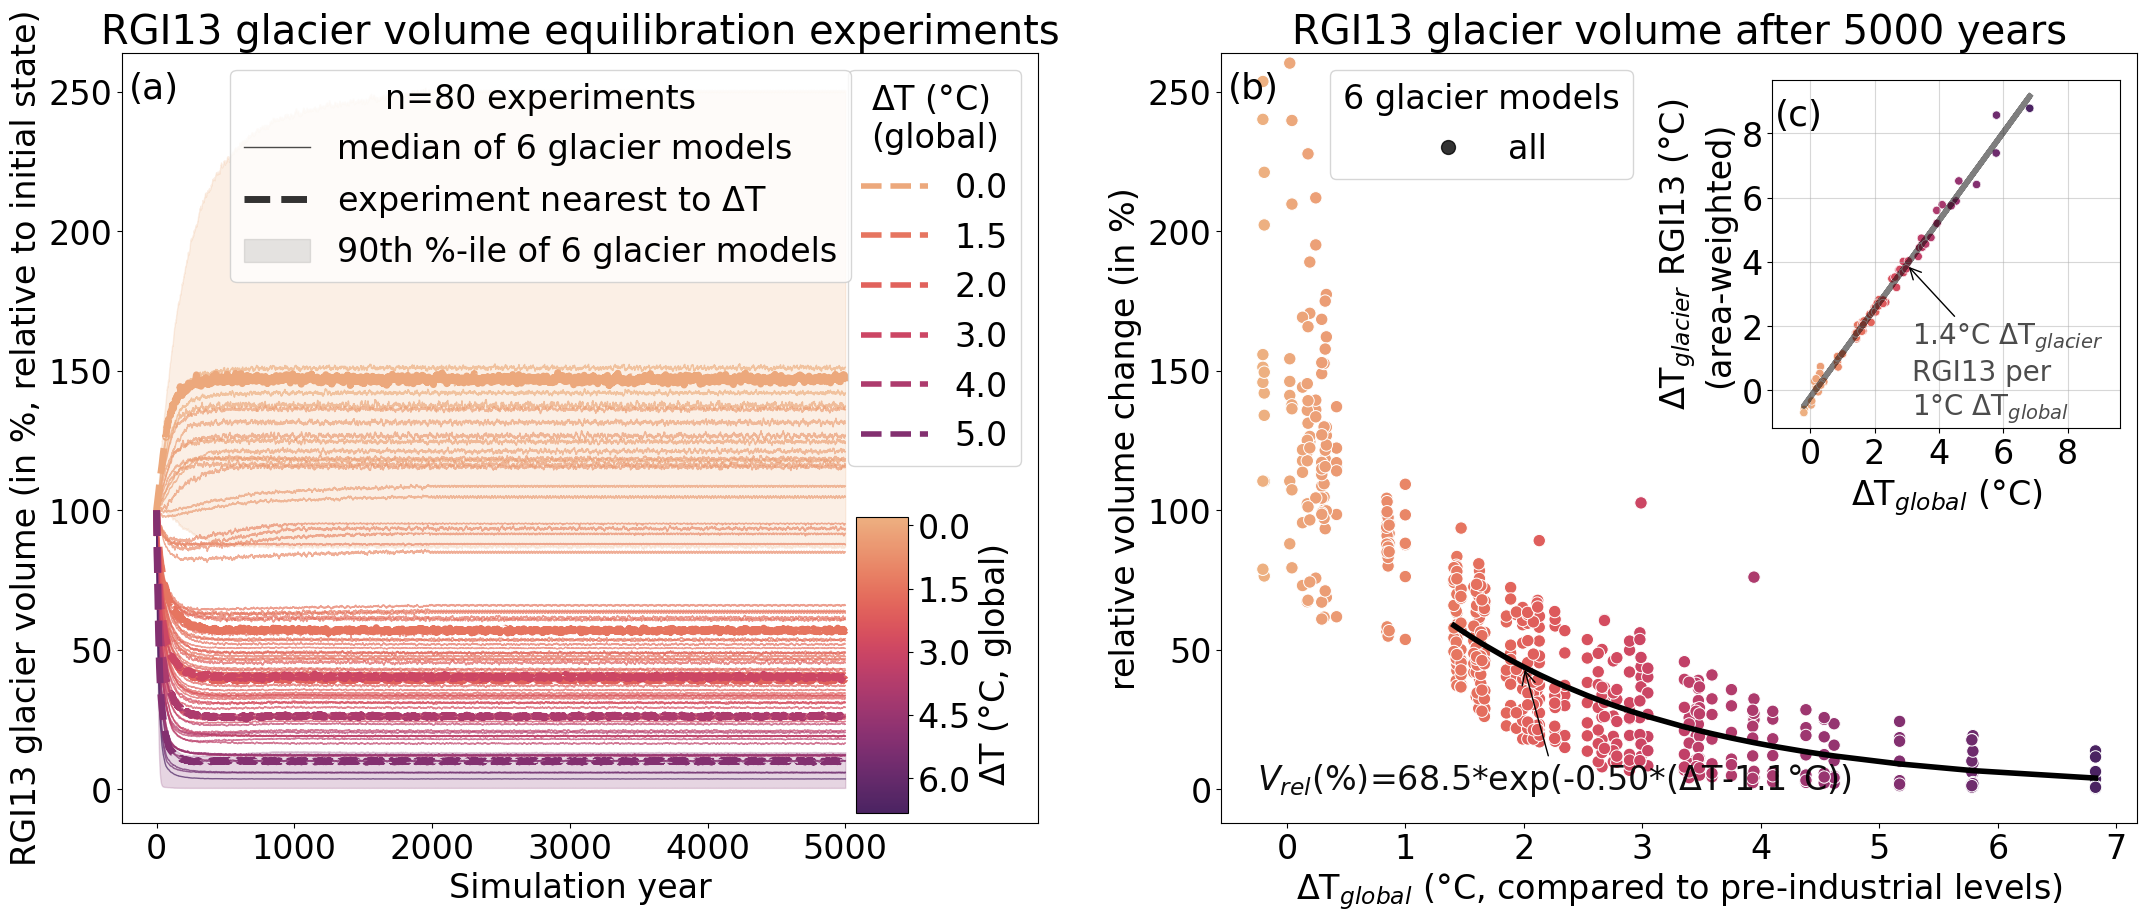

In [158]:
_ = get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region=f'RGI13_glacier', perc=90, sim_year=5000, exp_decay_temp_fit = True, temp_above_1_1=True, landscape=True)

- if the GMTs between 1.5 and 3°C, how much glacier volume is left per °C ? 
    - -16% of global glacier volume gets lost per degree warming in a 1.5 copmared to a 3° warmer world ...  

## Overview plot

In [28]:
markers = ['^', 'X','s','o','D','v']

norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                     vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.rc('font', size=18)  

markers = ['^', 'X','s','o','D','v']

norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                     vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, axs= plt.subplots(2,2,figsize=(24,14),sharex=True)

# first subplot
ax = axs[0][0] #lt.gca()
pd_all_models_med_vol_2000.loc[pd_all_models_med_vol_2000.volume_m3<0.1, 'volume_m3'] = 0.1
sns.scatterplot(data=pd_all_models_med_vol_2000, y='volume_m3', x='region', hue='temp_ch_ipcc',
                palette='flare', legend=False, ax=ax)
#leg = ax.legend(loc='upper left', bbox_to_anchor=(1,1), title = f'$\Delta$T (°C)\n(global)')
ax.set_ylabel(f'Glacier volume after {sim_year} years'+'\n(in % relative to initial state)')
ax.axhline(100, ls=':', color = 'grey')
ax.grid(axis='y')
ax.set_xlabel('region');

# plot specific delta T:
col_temp_l = []
exp_l = []
for temp in [0,1.5,2,3,4,5]: #,5,6]:
    exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
    #sm.colorbar.norm...
    col_temp = cmap(norm(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
    col_temp_l.append(col_temp)
    exp_l.append(exp)

pd_t_sel =ds_reg_models_med_vol_2000.sel(experiments=exp_l).to_dataframe().reset_index()
pd_t_sel['region']  = 'RGI' + pd_t_sel['rgi_reg']
pd_t_sel_glob =ds_glob_models_med_vol_2000.sel(experiments=exp_l).to_dataframe().reset_index()
pd_t_sel_glob['region'] = 'global'
pd_t_sel_all = pd.concat([pd_t_sel_glob, pd_t_sel])
# just to make the plot possible
pd_t_sel_all.loc[pd_t_sel_all.volume_m3 <0.1, 'volume_m3'] = 0.1
#pd_t_sel_all.loc[pd_t_sel_all.volume_m3 <0.1]['volume_m3'] = 0.1
#pd_t_sel['volume (km3)'] = pd_t_sel['volume_m3']/1e9
l_sel = sns.scatterplot(ax=ax,
             data=pd_t_sel_all,
                        markers=markers,
                        style='temp_ch_ipcc',
                        alpha = 0.8,
             y='volume_m3', x='region', hue='temp_ch_ipcc',
                        palette=sns.color_palette(col_temp_l),
             legend=False,size='temp_ch_ipcc', sizes=(200,200));
#leg = ax.legend(loc='upper left', bbox_to_anchor=(1.005,0.99),
#                title=f'$\Delta$T (°C)\n(global)',
#                markerscale=1, handleheight=0.8)

#for j,t in enumerate(leg.texts):
#    # truncate label text to 4 characters
#    if j ==1:
#        t.set_text(np.round(float(t.get_text()),1))
#    else:
#        t.set_text(np.round(float(t.get_text()),0))
# set the linewidth of each legend object
#for legobj in leg.legendHandles:
#    legobj.set_linewidth(4.0)
#    legobj.set_linestyle('--')
ax.set_xticks(pd_t_sel_all.region.unique())
ax.set_xticklabels(pd_t_sel_all.region.unique(), rotation=45)
#ax.set_yticks([5,10,20,40, 80, 160, 320],[5,10,20,40, 80, 160, 320])

#x = pd_t_sel_all.volume_m3.values
#def stratify(ax, power=2):
#    f     = lambda x: (x + 1)**(1 / power)
#    f_inv = lambda y: y**power - 1
#    ax.set_yscale('function', functions=(f, f_inv))
#stratify(ax, power=2)

#ax.set_yscale('log', base=2)
#ax.set_yticks([5,10,20,40, 80, 160, 320],[5,10,20,40, 80, 160, 320])
######## Next subplot    
ax = axs[0][1]
# ok, the pvalues are small enough anyways ...
assert np.all(pd_slope_rgi_reg.pval<1e-4)

sns.scatterplot(data=pd_slope_rgi_reg_1o5_3, x='region', y='slope', ax = ax, color= 'black',
                size='rval', sizes=(200,50), legend = 'full')
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles[::5], labels[::5],
                loc='upper right', title= 'R-value', ncol=4)
#ax.add_artist(cbar);
for j,t in enumerate(leg.texts):
    # truncate label text to 4 characters
    t.set_text(np.round(float(t.get_text()),2))
ax.grid(axis='y')
ax.set_xlabel('region')
ax.set_ylabel('Additional relative lost glacier volume\n(% per °C global warming between 1.5-3.0°C)')
#ax.set_ylabel('Additional relative lost glacier volume\n(% per °C global warming between 1-4 °C)')
ax.set_xticks(pd_slope_rgi_reg_1o5_3.region.unique())
ax.set_xticklabels(pd_slope_rgi_reg_1o5_3.region.unique(), rotation=45)

################### Next subplot: year where less than 50%/20% left
for ax, perc in zip(axs[1][0:2], [50,20]):
    ds_reg_models_med_vol_glob_rel = 100*ds_reg_models_med_vol.sum(dim='rgi_reg')/ds_reg_models_med_vol.sel(simulation_year=0).sum(dim='rgi_reg')
    ds_reg_models_med_vol_glob_rel = ds_reg_models_med_vol_glob_rel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_glob_rel.experiments, # make sure thatwe use the same experiments
                                                                                                   'temp_ch_ipcc']))

    ds_reg_below_50_perc = ds_reg_models_med_vol_glob_rel.where(ds_reg_models_med_vol_glob_rel<=perc)
    ds_reg_below_50_perc.max(dim='simulation_year')
    yr_50_perc = ds_reg_below_50_perc.idxmax(dim='simulation_year')

    pd_yr_50_perc = yr_50_perc.to_dataframe(f'Year when <{perc}% glacier volume left').reset_index()
    pd_yr_50_perc['region'] = 'global' 

    for rgi_reg in rgi_regs:
        ds_reg_models_med_vol_sel_rel = 100*ds_reg_models_med_vol.sel(rgi_reg=rgi_reg)/ds_reg_models_med_vol.sel(simulation_year=0).sel(rgi_reg=rgi_reg)
        ds_reg_models_med_vol_sel_rel = ds_reg_models_med_vol_sel_rel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                              pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel_rel.experiments, # make sure thatwe use the same experiments
                                                                                                       'temp_ch_ipcc']))

        ds_reg_below_50_perc_sel = ds_reg_models_med_vol_sel_rel.where(ds_reg_models_med_vol_sel_rel<=perc)
        ds_reg_below_50_perc_sel.max(dim='simulation_year')
        yr_50_perc_sel = ds_reg_below_50_perc_sel.idxmax(dim='simulation_year')

        pd_yr_50_perc_reg = yr_50_perc_sel.to_dataframe(f'Year when <{perc}% glacier volume left').reset_index()
        pd_yr_50_perc_reg['region'] = f'RGI{rgi_reg}'
        pd_yr_50_perc = pd.concat([pd_yr_50_perc,pd_yr_50_perc_reg])

    pd_yr_50_perc=pd_yr_50_perc.drop(columns='rgi_reg')
    #pd_yr_50_perc = pd_yr_50_perc.dropna()

    sns.scatterplot(ax=ax,
                    hue='temp_ch_ipcc',
                    y=f'Year when <{perc}% glacier volume left',
                    x='region',
                    palette='flare',
                    data=pd_yr_50_perc, legend=False)

    # plot specific delta T:
    ds_sel = pd_yr_50_perc.groupby(['gcm','period_scenario','region']).mean().to_xarray().stack(experiments=['gcm','period_scenario'])
    pd_yr_50_perc_sel = ds_sel.sel(experiments=exp_l).to_dataframe().reset_index().dropna()
    
    if np.all(pd_yr_50_perc_sel.temp_ch_ipcc >=0.5):
        # in no region that amount is lost when having 0°C global warming
        col_temp_l_sel = col_temp_l[1:].copy()
        markers_sel = markers[1:].copy()
    else:
        col_temp_l_sel = col_temp_l.copy()
        markers_sel = markers.copy()
        
    if perc == 50:
        legend_opt = 'auto'
    else:
        legend_opt = False
    sns.scatterplot(ax=ax,
                    hue='temp_ch_ipcc',
                    y=f'Year when <{perc}% glacier volume left',
                    x='region',
                    data=pd_yr_50_perc_sel,
                    markers=markers_sel,
                    style='temp_ch_ipcc',
                    palette=sns.color_palette(col_temp_l_sel),
                    alpha = 0.8,
                 legend=legend_opt,size='temp_ch_ipcc', sizes=(200,200));
    if perc == 50:
        leg = ax.legend(loc='upper left', bbox_to_anchor=(1.005,1.02),
                        title=f'$\Delta$T (°C)\n(global)',
                        markerscale=1, handleheight=0.8)
        for j,t in enumerate(leg.texts):
        #    # truncate label text to 4 characters
            if j ==1:
                t.set_text(np.round(float(t.get_text()),1))
            else:
                t.set_text(np.round(float(t.get_text()),0))
                
                
        ## get colormap 
        add_cmap = True
        if add_cmap:
            cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.02, ax.get_position().height / 2.1])
            cbar = ax.figure.colorbar(sm, cax=cax)
            cbar.ax.invert_yaxis()
            cbar.set_ticks([0,1.5,3.0,4.5,6.0])
    ax.set_ylim([1,5100])
    ax.set_yscale('log')
    ax.set_xticks(pd_yr_50_perc.region.unique())
    ax.set_xticklabels(pd_yr_50_perc.region.unique(), rotation=45)
    
plt.tight_layout() 
num_text_x = 0.007
for j,axi in enumerate([axs[0][0],axs[0][1], axs[1][0], axs[1][1]]):
    #if j <2:
    num_text_y = 0.92
    #else:
    #    num_text_y = 0.87
    axi.text(num_text_x, num_text_y,
             num_dict[j], fontsize=26, transform=axi.transAxes)
    axi.axvspan(-0.5,0.5,color='grey', alpha = 0.1)
    axi.set_xlim([-0.5,19.5])
plt.savefig(f'figures/2_condensed_rgi_region_analysis_{DATE}_{sim_year}yr.png')

/tmp/ipykernel_39449/700884027.py:187: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


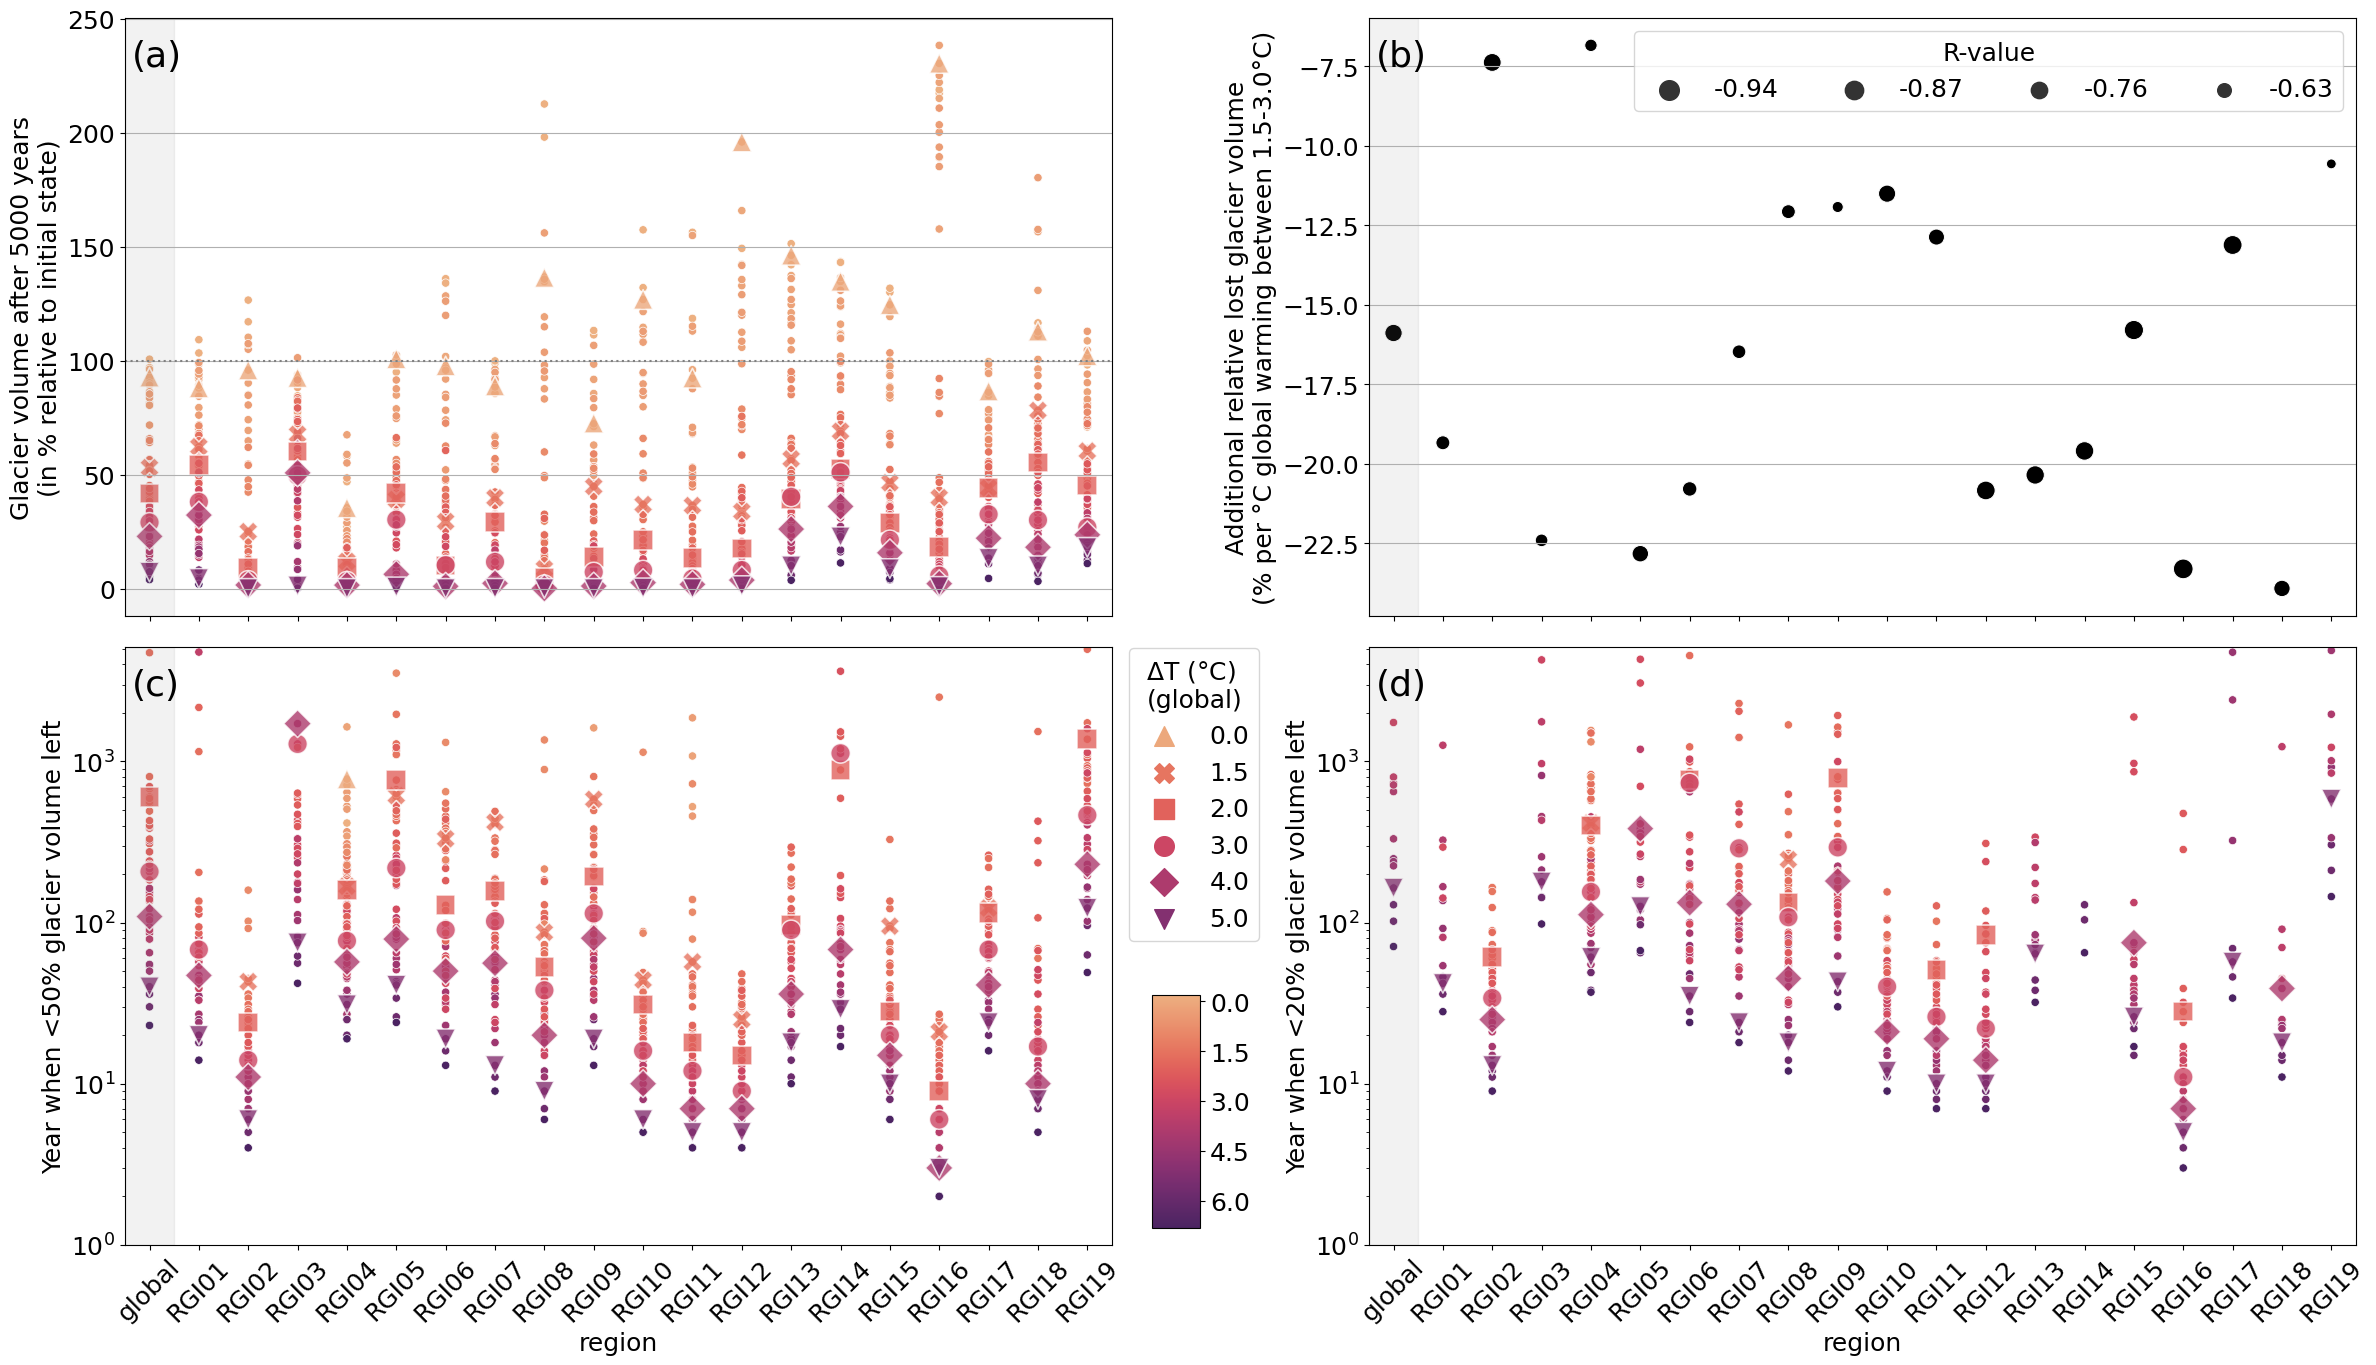

### Below is rather old stuff that got mostly replaced ...

### compare "response time"
three options where experiments and model simulations need to be classified in: 
- are "shrinking" 
- are "growing" 
- stay around the same (even if there is a spinup) (final volume +/- min_perc_change)

In [38]:
fill_option = 'repeat_last_20yrs'
ds_reg_models_extend = xr.open_dataset(f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled_extended_{fill_option}.nc')
pd_global_temp_exp_m = get_glob_temp_exp(region='global')



plt.rc('font', size=18)  

markers = ['^', 'X','s','o','D','v']

norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                     vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# plot specific delta T:
col_temp_l = []
exp_l = []
for temp in [0,1.5,2,3,4,5]: #,5,6]:
    exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
    #sm.colorbar.norm...
    col_temp = cmap(norm(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
    col_temp_l.append(col_temp)
    exp_l.append(exp)

**Attention: Fig. below probably needs to be updated with the function `resp_time_estimate`**

/tmp/ipykernel_1218951/3044322566.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pd_yr_perc_resp_time.region.unique(), rotation=45)
/tmp/ipykernel_1218951/3044322566.py:107: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pd_yr_perc_resp_time.region.unique(), rotation=45)
/tmp/ipykernel_1218951/3044322566.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


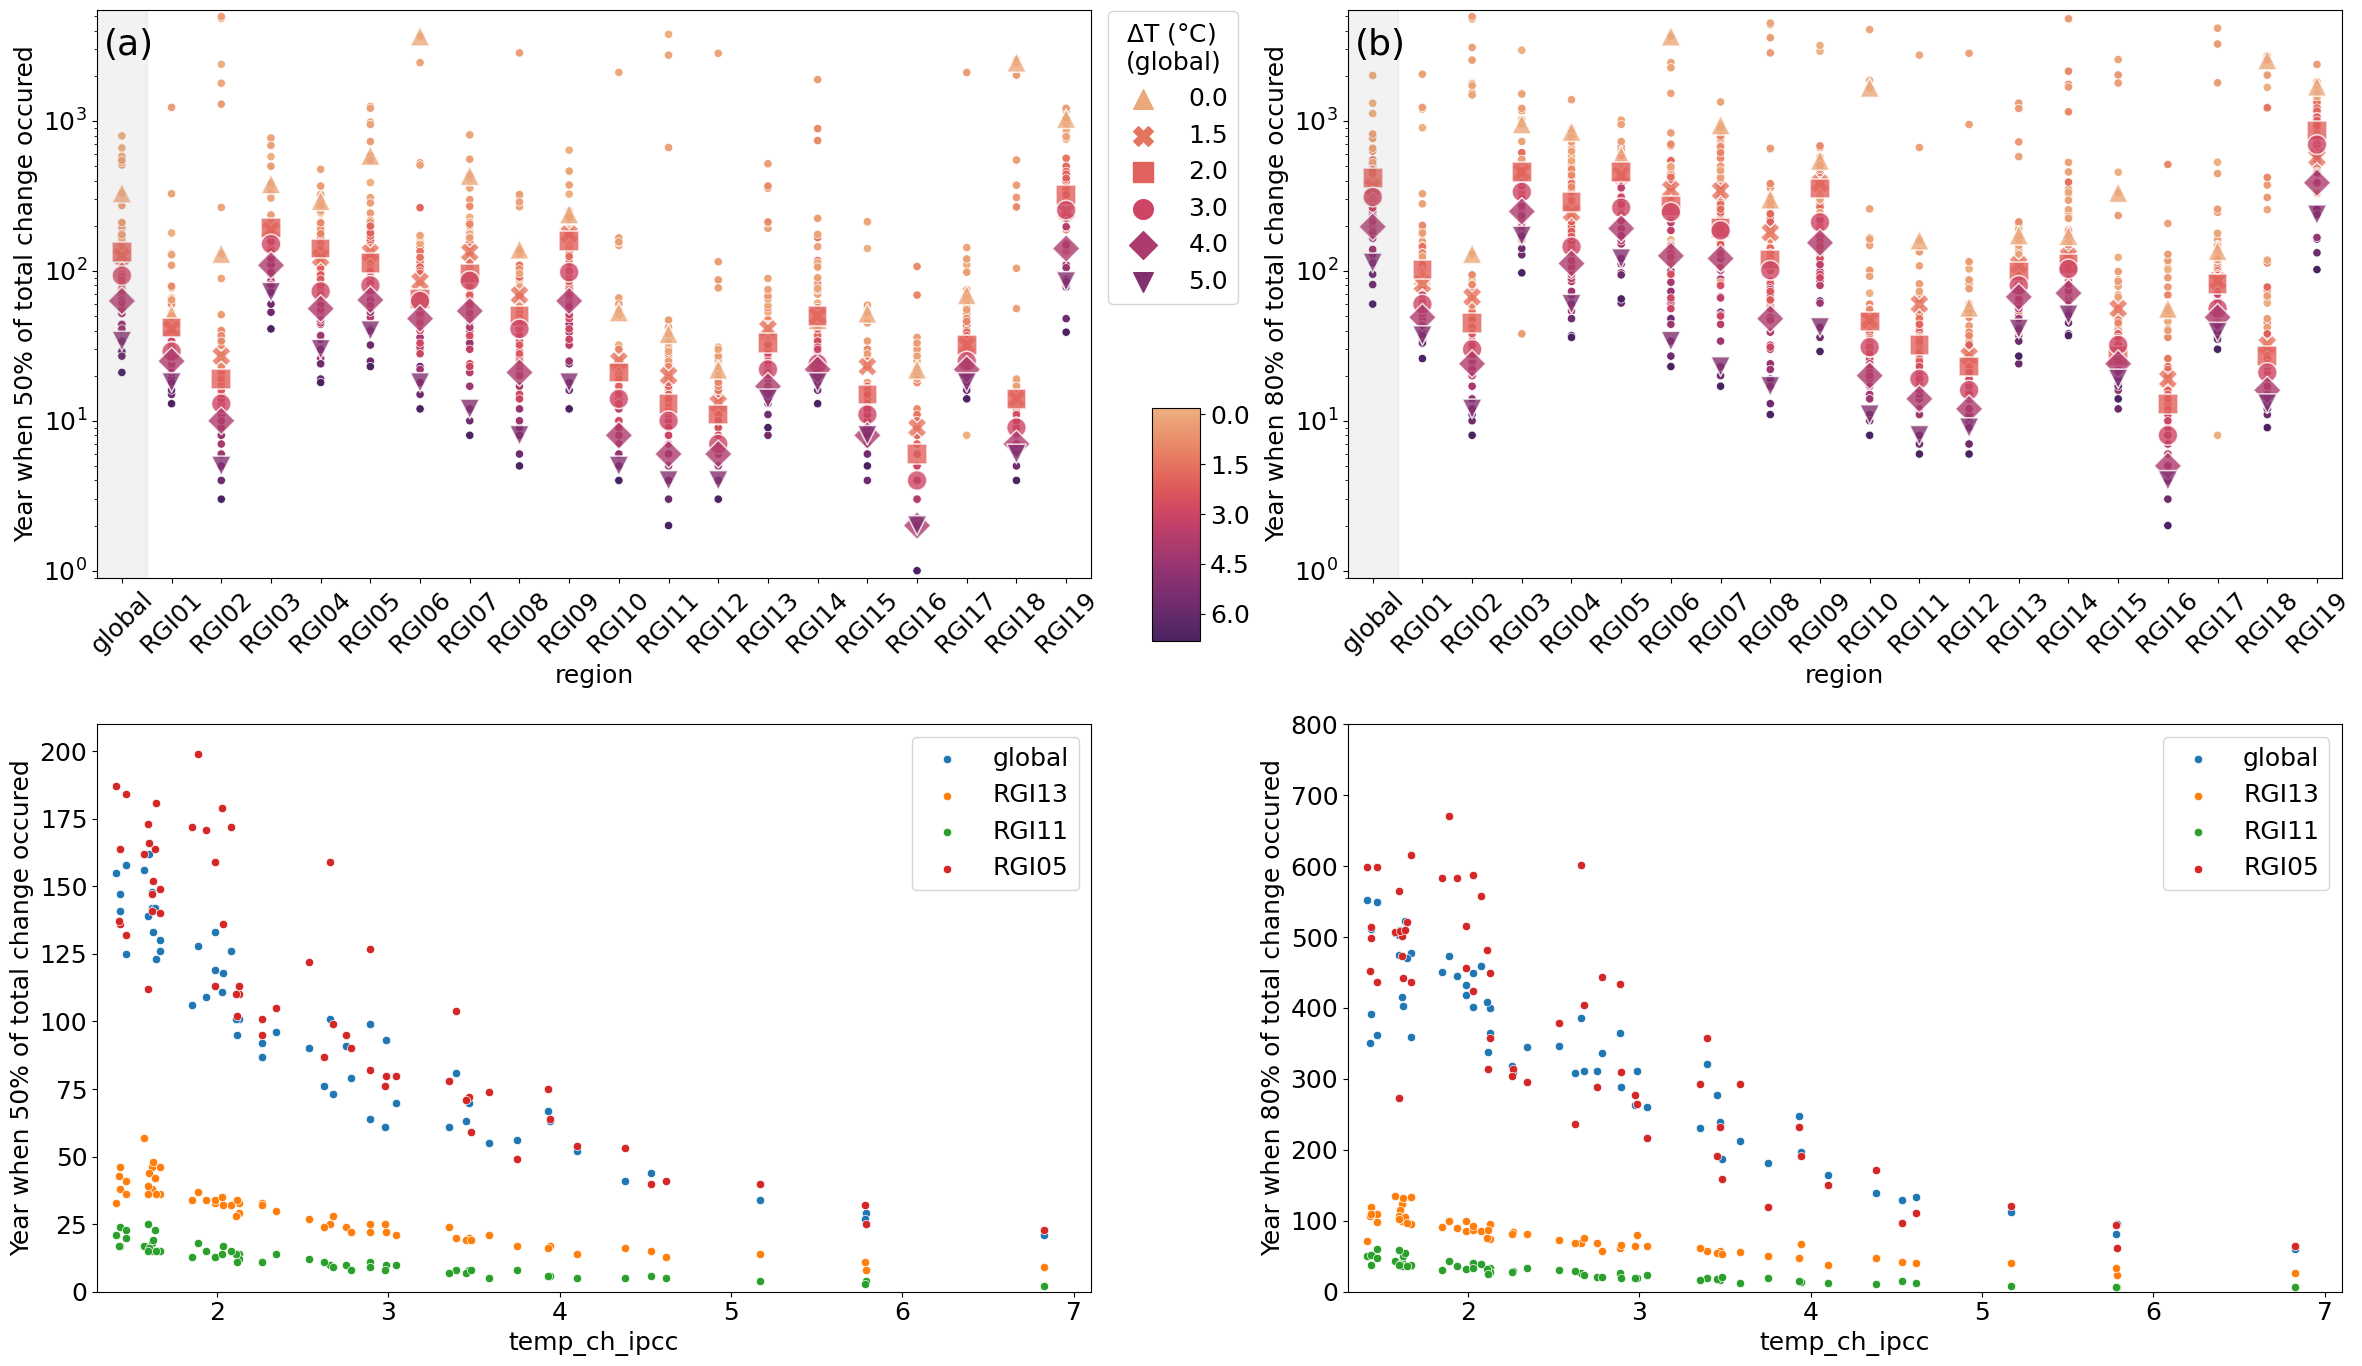

In [26]:
fig, axss= plt.subplots(2,2,figsize=(24,14))

# first subplot
axs = axss[0]
jj=0
for ax, perc in zip(axs[0:2], [50,80]):

    ds_reg_models_vol_all = ds_reg_models_extend.volume_m3 # .sel(simulation_year=slice(0,2000)) # need to do the interpolation first !!!!
    # Let's take the median/iqr estimate from all glacier models for every RGI region and then do the sum:
    ds_reg_models_vol_all = ds_reg_models_vol_all.stack(experiments=['gcm','period_scenario'])
    ds_reg_models_med_vol_all = ds_reg_models_vol_all.median(dim='model_author')
    
    eq_med_vol = ds_reg_models_med_vol_all.isel(simulation_year=np.arange(-20,0,1)).sum(dim='rgi_reg').mean(dim='simulation_year')
    begin_med_vol = ds_reg_models_med_vol_all.isel(simulation_year=0).sum(dim='rgi_reg')

    
    ds_reg_models_med_vol_glob_resp_time =   np.abs(100*(begin_med_vol-ds_reg_models_med_vol_all.sum(dim='rgi_reg')) / (begin_med_vol- eq_med_vol)) # can be positive and negative 
    ds_reg_models_med_vol_glob_resp_time = ds_reg_models_med_vol_glob_resp_time.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_glob_resp_time.experiments, # make sure thatwe use the same experiments
                                                                                                   'temp_ch_ipcc']))

    ds_reg_models_med_vol_glob_resp_time_perc = ds_reg_models_med_vol_glob_resp_time.where((ds_reg_models_med_vol_glob_resp_time<=perc) | (ds_reg_models_med_vol_glob_resp_time>=100+perc)) #ds_reg_models_med_vol_glob_resp_time.where(ds_reg_models_med_vol_glob_resp_time<=perc)
    #ds_reg_below_50_perc.max(dim='simulation_year')
    yr_perc = ds_reg_models_med_vol_glob_resp_time_perc.idxmax(dim='simulation_year')

    pd_yr_perc_resp_time = yr_perc.to_dataframe(f'Year when {perc}% of total change occured').reset_index()
    pd_yr_perc_resp_time['region'] = 'global' 
    
    for rgi_reg in ds_reg_models_extend.rgi_reg.values:
        eq_med_vol_reg = ds_reg_models_med_vol_all.isel(simulation_year=np.arange(-20,0,1)).sel(rgi_reg=rgi_reg).mean(dim='simulation_year')
        begin_med_vol_reg = ds_reg_models_med_vol_all.isel(simulation_year=0).sel(rgi_reg=rgi_reg)

        ds_reg_models_med_vol_sel_rel = np.abs(100*(begin_med_vol_reg-ds_reg_models_med_vol_all.sel(rgi_reg=rgi_reg))/(begin_med_vol_reg-eq_med_vol_reg)) # can be positive and negative 
        ds_reg_models_med_vol_sel_rel = ds_reg_models_med_vol_sel_rel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                              pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel_rel.experiments, # make sure thatwe use the same experiments
                                                                                                       'temp_ch_ipcc']))

        ds_reg_below_perc_sel = ds_reg_models_med_vol_sel_rel.where((ds_reg_models_med_vol_sel_rel<=perc) | (ds_reg_models_med_vol_sel_rel>=100+perc)) #ds_reg_models_med_vol_sel_rel.where(ds_reg_models_med_vol_sel_rel<=perc)
        yr_perc_sel = ds_reg_below_perc_sel.idxmax(dim='simulation_year')

        pd_yr_perc_resp_time_reg = yr_perc_sel.to_dataframe(f'Year when {perc}% of total change occured').reset_index()
        pd_yr_perc_resp_time_reg['region'] = f'RGI{rgi_reg}'
        pd_yr_perc_resp_time = pd.concat([pd_yr_perc_resp_time,pd_yr_perc_resp_time_reg])

    pd_yr_perc_resp_time=pd_yr_perc_resp_time.drop(columns='rgi_reg')
    
    sns.scatterplot(ax=ax,
                    hue='temp_ch_ipcc',
                    y=f'Year when {perc}% of total change occured',
                    x='region',
                    palette='flare',
                    data=pd_yr_perc_resp_time, legend=False)
    

    #axss[1][jj].set_ylim([0.9,2000])
    
    
    # plot specific delta T:
    ds_sel = pd_yr_perc_resp_time.groupby(['gcm','period_scenario','region']).mean().to_xarray().stack(experiments=['gcm','period_scenario'])
    pd_yr_perc_resp_time_sel = ds_sel.sel(experiments=exp_l).to_dataframe().reset_index().dropna()
    
    if np.all(pd_yr_perc_resp_time_sel.temp_ch_ipcc >=0.5):
        # in no region that amount is lost when having 0°C global warming
        col_temp_l_sel = col_temp_l[1:].copy()
        markers_sel = markers[1:].copy()
    else:
        col_temp_l_sel = col_temp_l.copy()
        markers_sel = markers.copy()
        
    if perc == 50:
        legend_opt = 'auto'
    else:
        legend_opt = False
    sns.scatterplot(ax=ax,
                    hue='temp_ch_ipcc',
                    y=f'Year when {perc}% of total change occured',
                    x='region',
                    data=pd_yr_perc_resp_time_sel,
                    markers=markers_sel,
                    style='temp_ch_ipcc',
                    palette=sns.color_palette(col_temp_l_sel),
                    alpha = 0.8,
                 legend=legend_opt,size='temp_ch_ipcc', sizes=(200,200));
    
    if perc == 50:
        leg = ax.legend(loc='upper left', bbox_to_anchor=(1.005,1.02),
                        title=f'$\Delta$T (°C)\n(global)',
                        markerscale=1, handleheight=0.8)
        for j,t in enumerate(leg.texts):
        #    # truncate label text to 4 characters
            if j ==1:
                t.set_text(np.round(float(t.get_text()),1))
            else:
                t.set_text(np.round(float(t.get_text()),0))
                
                
        ## get colormap 
        add_cmap = True
        if add_cmap:
            cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.02, ax.get_position().height / 2.1])
            cbar = ax.figure.colorbar(sm, cax=cax)
            cbar.ax.invert_yaxis()
            cbar.set_ticks([0,1.5,3.0,4.5,6.0])

    ax.set_yscale('log')
    
    ax.set_xticklabels(pd_yr_perc_resp_time.region.unique(), rotation=45)
    ax.set_ylim([0.9,5500])
    
    
    sns.scatterplot(x='temp_ch_ipcc',
          y=f'Year when {perc}% of total change occured',
          data=pd_yr_perc_resp_time.loc[pd_yr_perc_resp_time.region == 'global'], ax=axss[1][jj], label='global')
    sns.scatterplot(x='temp_ch_ipcc',
          y=f'Year when {perc}% of total change occured',
          data=pd_yr_perc_resp_time.loc[pd_yr_perc_resp_time.region == 'RGI13'], ax=axss[1][jj], label='RGI13')
    sns.scatterplot(x='temp_ch_ipcc',
          y=f'Year when {perc}% of total change occured',
          data=pd_yr_perc_resp_time.loc[pd_yr_perc_resp_time.region == 'RGI11'], ax=axss[1][jj], label='RGI11')
    sns.scatterplot(x='temp_ch_ipcc',
          y=f'Year when {perc}% of total change occured',
          data=pd_yr_perc_resp_time.loc[pd_yr_perc_resp_time.region == 'RGI05'], ax=axss[1][jj], label='RGI05')
    if perc == 50:
        axss[1][jj].set_ylim([0,210])
    else:
        axss[1][jj].set_ylim([0,800])
    axss[1][jj].set_xlim([1.3,7.1])

    jj+=1
    
    
num_text_x = 0.007
for j,axi in enumerate([axs[0],axs[1]]): #0][1], axs[1][0], axs[1][1]]):
    #if j <2:
    num_text_y = 0.92
    #else:
    #    num_text_y = 0.87
    axi.text(num_text_x, num_text_y,
             num_dict[j], fontsize=26, transform=axi.transAxes)
    axi.axvspan(-0.5,0.5,color='grey', alpha = 0.1)
    axi.set_xlim([-0.5,19.5])
    
    
plt.tight_layout()
plt.savefig(f'figures/2_resp_time_rgi_region_analysis_{DATE}.png')

- spinup effect that creates the large spread at the beginning probably ... 
- need to clarify what is growing
- at the moment assume equilibrium after 5000 years and we take the average over the last 20 years

** For every glacier model separately** -> in 3_response_time_analysis.ipynb**

In [ ]:
### Random old code...

In [ ]:
pd_global_temp_exp_m = get_glob_temp_exp(region='global')

ds_reg_models_vol = ds_reg_models.isel(simulation_year=slice(0,2000)).volume_m3
# Let's take the median/iqr estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_vol = ds_reg_models_vol.stack(experiments=['gcm','period_scenario'])

In [ ]:


### regional 
ds_reg_models_med_vol_2000 = 100*ds_reg_models_vol.median(dim='model_author').isel(simulation_year=1999)/ds_reg_models_vol.median(dim='model_author').isel(simulation_year=0)
# this here takes a while
#ds_reg_models_gcm_q25_q50_q75_vol = ds_reg_models_gcm_vol.quantile([0.25,0.5,0.75], dim='model_author')
# pd_global_temp_exp_m = get_glob_temp_exp(region=f'RGI{rgi_reg}_global') # pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()
ds_reg_models_med_vol_2000 = ds_reg_models_med_vol_2000.assign_coords(temp_ch_ipcc = ('experiments',
                                                                                pd_global_temp_exp_m.loc[ds_reg_models_med_vol_2000.experiments.values, 'temp_ch_ipcc'].values))
ds_reg_models_med_vol_2000 = ds_reg_models_med_vol_2000.sortby('temp_ch_ipcc')
ds_reg_models_med_vol_2000 = ds_reg_models_med_vol_2000.reset_coords()
pd_reg_models_med_vol_2000 = ds_reg_models_med_vol_2000.to_dataframe().reset_index()
pd_reg_models_med_vol_2000['region'] = 'RGI' + pd_reg_models_med_vol_2000['rgi_reg']

### global
ds_glob_models_med_vol_2000 = 100*ds_reg_models_vol.median(dim='model_author').isel(simulation_year=1999).sum(dim='rgi_reg')/ds_reg_models_vol.median(dim='model_author').isel(simulation_year=0).sum(dim='rgi_reg')
ds_glob_models_med_vol_2000 = ds_glob_models_med_vol_2000.assign_coords(temp_ch_ipcc = ('experiments',
                                                                                pd_global_temp_exp_m.loc[ds_glob_models_med_vol_2000.experiments.values, 'temp_ch_ipcc'].values))
ds_glob_models_med_vol_2000 = ds_glob_models_med_vol_2000.sortby('temp_ch_ipcc')
ds_glob_models_med_vol_2000 = ds_glob_models_med_vol_2000.reset_coords()
pd_glob_models_med_vol_2000 = ds_glob_models_med_vol_2000.to_dataframe().reset_index()
pd_glob_models_med_vol_2000['region'] = 'global'

### concatenate both
pd_all_models_med_vol_2000 = pd.concat([pd_glob_models_med_vol_2000, pd_reg_models_med_vol_2000])

# get the % lost per °C (here from 1.5 - 3°C)
pd_all_models_med_vol_2000_sel_1o5_3 = pd_all_models_med_vol_2000.loc[(pd_all_models_med_vol_2000.temp_ch_ipcc>=1.5) & (pd_all_models_med_vol_2000.temp_ch_ipcc<=3)]

slope_rgi_dict = {}
pd_slope_rgi_reg_1o5_3 = pd.DataFrame(index=np.arange(0,20))
intercept_l = []
slope_l = []
rval_l = []
pval_l = []
stderr_l = []
region_l = []
for region in pd_all_models_med_vol_2000_sel_1o5_3.region.unique():
    pd_sel = pd_all_models_med_vol_2000_sel_1o5_3.loc[pd_all_models_med_vol_2000_sel_1o5_3.region==region]
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_sel['temp_ch_ipcc'].values, pd_sel['volume_m3'])
    slope_l.append(slope)
    intercept_l.append(intercept)
    stderr_l.append(stderr)
    rval_l.append(rval)
    pval_l.append(pval)
    region_l.append(region)
pd_slope_rgi_reg_1o5_3['slope'] = slope_l
pd_slope_rgi_reg_1o5_3['intercept'] = intercept_l
pd_slope_rgi_reg_1o5_3['stderr'] = stderr_l
pd_slope_rgi_reg_1o5_3['pval'] = pval_l
pd_slope_rgi_reg_1o5_3['rval'] = rval_l
pd_slope_rgi_reg_1o5_3['region'] = region_l


In [ ]:
#global
#global
plt.rc('font', size=18)     
for rgi_reg in rgi_regs:
    fig,axs= plt.subplots(1,2,figsize=(24,8),sharey=True)
    plt.suptitle(f'RGI{rgi_reg} (Shading is 0.25 to 0.75 quantiles, i.e., the interquartile range)')
    ax = axs[0]
    ds_reg_models_med_vol_glob = ds_reg_models_med_vol.sel(rgi_reg=rgi_reg) #ds_reg_models_med_vol.sum(dim='rgi_reg')
    pd_global_temp_exp_m = get_glob_temp_exp(region='global')
    ds_reg_models_med_vol_glob = ds_reg_models_med_vol_glob.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_glob.experiments.values, 'temp_ch_ipcc'].values))
    # need that to have bot volume_m3 and temp_ch_ipcc as variables
    ds_reg_models_med_vol_glob = ds_reg_models_med_vol_glob.reset_coords()

    # normi = matplotlib.colors.Normalize(vmax=4, vmin=-4)
    pd_t =ds_reg_models_med_vol_glob.to_dataframe().reset_index()
    #pd_q25 =ds_reg_models_gcm_q25_q50_q75_vol_glob.sel(quantile=0.25).to_dataframe().reset_index()
    #pd_q75 =ds_reg_models_gcm_q25_q50_q75_vol_glob.sel(quantile=0.75).to_dataframe().reset_index()
    pd_t['volume (km3)'] = pd_t['volume_m3']/1e9
    #pd_q25['volume (km3)'] = pd_q25['volume_m3']/1e9
    #pd_q75['volume (km3)'] = pd_q75['volume_m3']/1e9
    sns.lineplot(ax=ax,
                 data=pd_t,
                 x='simulation_year',
                 y='volume (km3)',
                hue='temp_ch_ipcc', palette='flare',legend='auto',lw=1.5);
    leg = ax.get_legend()

    exp_temp_min = ds_reg_models_med_vol_glob.temp_ch_ipcc.idxmin()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q25_75_min = ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([0.25,0.75], dim='model_author')/1e9
    q25_75_min_glob = q25_75_min.sel(rgi_reg=rgi_reg)
    ax.fill_between(ds_reg_models_gcm_q25_q50_q75_vol_glob.simulation_year,
             q25_75_min_glob.sel(quantile=0.75), q25_75_min_glob.sel(quantile=0.25), alpha = 0.2, color=lines.lines[0].get_color(), label='IQR')
    handles, labels = ax.get_legend_handles_labels()
    t = plt.legend(handles, labels)
    ax.add_artist(leg)

    exp_temp_max = ds_reg_models_med_vol_glob.temp_ch_ipcc.idxmax()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q25_75_max = ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([0.25,0.75], dim='model_author')/1e9
    q25_75_max_glob = q25_75_max.sel(rgi_reg=rgi_reg)
    ax.fill_between(ds_reg_models_gcm_q25_q50_q75_vol_glob.simulation_year,
                    q25_75_max_glob.sel(quantile=0.75),
                    q25_75_max_glob.sel(quantile=0.25), alpha = 0.2, color=lines.lines[-1].get_color());
    ax.set_ylabel(f'RGI{rgi_reg} glacier volume (km³)')
    ax.get_legend().set_title(r'$\Delta$T (°C)')

    
    ax=axs[1]
    ax.set_title(f'RGI{rgi_reg} glacier volume (km³) after 2000 years')
    sns.scatterplot(ax=ax,
                    x='temp_ch_ipcc',
                 y='volume (km3)', data = pd_t.loc[pd_t.simulation_year==1999],
                hue='temp_ch_ipcc', palette='flare',legend='auto', s=80)

    ax.set_xlabel('Global temperature change (°C, compared to pre-industrial levels)')
    ax.get_legend().set_title(r'$\Delta$T (°C)')


    q25_75_2000 = ds_reg_models_vol.isel(simulation_year=1999).quantile([0.25,0.75], dim='model_author')/1e9
    q25_75_2000_glob = q25_75_2000.sel(rgi_reg=rgi_reg) #sum(dim='rgi_reg')

    q25_75_2000_glob = q25_75_2000_glob.assign_coords(temp_ch_ipcc = ('experiments',
                                                   pd_global_temp_exp_m.loc[ds_reg_models_med_vol_glob.experiments.values, 'temp_ch_ipcc'].values))
    q25_75_2000_glob = q25_75_2000_glob.reset_coords()

    q25_75_2000_glob = q25_75_2000_glob.sortby('temp_ch_ipcc')
    def smoothen(x, winsize=5):
        return np.array(pd.Series(x).rolling(winsize).mean())[winsize-1:]

    plt.fill_between(smoothen(q25_75_2000_glob.temp_ch_ipcc),
                     smoothen(q25_75_2000_glob.volume_m3.sel(quantile=0.25)),
                     smoothen(q25_75_2000_glob.volume_m3.sel(quantile=0.75)),
                     step='mid',
                     interpolate=True,
                     alpha = 0.2, color='grey');
    plt.tight_layout()
    plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_RGI{rgi_reg}_timeseries_vol_temp_ch.png')
    plt.close()

    
#########################
#############  Now the same but for regional glacier temperature change:#############
plt.rc('font', size=18)     
for rgi_reg in rgi_regs:
    fig,axs= plt.subplots(1,2,figsize=(24,8),sharey=True)
    plt.suptitle(f'RGI{rgi_reg} (Shading is 0.25 to 0.75 quantiles, i.e., the interquartile range)')
    ax = axs[0]
    ds_reg_models_med_vol_glob = ds_reg_models_med_vol.sel(rgi_reg=rgi_reg) #ds_reg_models_med_vol.sum(dim='rgi_reg')
    # add global temp. change to the dataset 
    pd_global_temp_exp_m = get_glob_temp_exp(region=f'RGI{rgi_reg}_global') # pd_global_temp_exp.groupby(['gcm','period_scenario']).mean()
    ds_reg_models_med_vol_glob = ds_reg_models_med_vol_glob.assign_coords(temp_ch_ipcc = ('experiments',
                                                                                pd_global_temp_exp_m.loc[ds_reg_models_med_vol_glob.experiments.values, 'temp_ch_ipcc'].values))
    # need that to have bot volume_m3 and temp_ch_ipcc as variables
    ds_reg_models_med_vol_glob = ds_reg_models_med_vol_glob.reset_coords()

    # normi = matplotlib.colors.Normalize(vmax=4, vmin=-4)
    pd_t =ds_reg_models_med_vol_glob.to_dataframe().reset_index()
    #pd_q25 =ds_reg_models_gcm_q25_q50_q75_vol_glob.sel(quantile=0.25).to_dataframe().reset_index()
    #pd_q75 =ds_reg_models_gcm_q25_q50_q75_vol_glob.sel(quantile=0.75).to_dataframe().reset_index()
    pd_t['volume (km3)'] = pd_t['volume_m3']/1e9
    #pd_q25['volume (km3)'] = pd_q25['volume_m3']/1e9
    #pd_q75['volume (km3)'] = pd_q75['volume_m3']/1e9
    sns.lineplot(ax=ax,
                 data=pd_t,
                 x='simulation_year',
                 y='volume (km3)',
                hue='temp_ch_ipcc', palette='flare',legend='auto',lw=1.5);
    leg = ax.get_legend()

    exp_temp_min = ds_reg_models_med_vol_glob.temp_ch_ipcc.idxmin()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q25_75_min = ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([0.25,0.75], dim='model_author')/1e9
    q25_75_min_glob = q25_75_min.sel(rgi_reg=rgi_reg)
    ax.fill_between(ds_reg_models_gcm_q25_q50_q75_vol_glob.simulation_year,
             q25_75_min_glob.sel(quantile=0.75), q25_75_min_glob.sel(quantile=0.25), alpha = 0.2, color=lines.lines[0].get_color(), label='IQR')
    handles, labels = ax.get_legend_handles_labels()
    t = plt.legend(handles, labels)
    ax.add_artist(leg)

    exp_temp_max = ds_reg_models_med_vol_glob.temp_ch_ipcc.idxmax()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q25_75_max = ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([0.25,0.75], dim='model_author')/1e9
    q25_75_max_glob = q25_75_max.sel(rgi_reg=rgi_reg)
    ax.fill_between(ds_reg_models_gcm_q25_q50_q75_vol_glob.simulation_year,
             q25_75_max_glob.sel(quantile=0.75), q25_75_max_glob.sel(quantile=0.25), alpha = 0.2, color=lines.lines[-1].get_color());
    ax.set_ylabel(f'RGI{rgi_reg} glacier volume (km³)')
    ax.get_legend().set_title(r'$\Delta$T (°C)'+'\nregional glacier')


    ax=axs[1]
    ax.set_title(f'RGI{rgi_reg} glacier volume (km³) after 2000 years')
    sns.scatterplot(ax=ax,
                    x='temp_ch_ipcc',
                 y='volume (km3)', data = pd_t.loc[pd_t.simulation_year==1999],
                hue='temp_ch_ipcc', palette='flare',legend='auto', s=80)
    
    ax.set_xlabel('Regional glacier temperature change (°C, compared to pre-industrial levels)')

    ax.get_legend().set_title(r'$\Delta$T (°C)'+'\nregional glacier');

    q25_75_2000 = ds_reg_models_vol.isel(simulation_year=1999).quantile([0.25,0.75], dim='model_author')/1e9
    q25_75_2000_glob = q25_75_2000.sel(rgi_reg=rgi_reg) #sum(dim='rgi_reg')

    q25_75_2000_glob = q25_75_2000_glob.assign_coords(temp_ch_ipcc = ('experiments',
                                                   pd_global_temp_exp_m.loc[ds_reg_models_med_vol_glob.experiments.values, 'temp_ch_ipcc'].values))
    q25_75_2000_glob = q25_75_2000_glob.reset_coords()

    q25_75_2000_glob = q25_75_2000_glob.sortby('temp_ch_ipcc')
    def smoothen(x, winsize=3):
        return np.array(pd.Series(x).rolling(winsize).mean())[winsize-1:]

    plt.fill_between(smoothen(q25_75_2000_glob.temp_ch_ipcc),
                     smoothen(q25_75_2000_glob.volume_m3.sel(quantile=0.25)),
                     smoothen(q25_75_2000_glob.volume_m3.sel(quantile=0.75)),
                     step='mid',
                     interpolate=True,
                     alpha = 0.2, color='grey');
    plt.tight_layout()
    plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_RGI{rgi_reg}_timeseries_vol_reg_glac_temp_ch.png')    
    plt.close()

In [ ]:
# OLD: just one GCM

gcm = 'gfdl-esm4'

pd_global_temp_exp_gcm = pd_global_temp_exp.loc[pd_global_temp_exp.gcm ==gcm]
ds_reg_models_gcm_vol = ds_reg_models.sel(gcm = gcm).isel(simulation_year=slice(0,2000)).volume_m3
# Let's take the median/iqr estimate from all glacier models for every RGI region and then do the sum:
ds_reg_models_gcm_med_vol = ds_reg_models_gcm_vol.median(dim='model_author')
# this here takes a while
ds_reg_models_gcm_q25_q50_q75_vol = ds_reg_models_gcm_vol.quantile([0.25,0.5,0.75], dim='model_author')
#global
ds_reg_models_gcm_q25_q50_q75_vol_glob = ds_reg_models_gcm_q25_q50_q75_vol.sum(dim='rgi_reg')
# add global temp. change to the dataset 
pd_global_temp_exp_gcm.index = pd_global_temp_exp_gcm.period_scenario
ds_reg_models_gcm_q25_q50_q75_vol_glob = ds_reg_models_gcm_q25_q50_q75_vol_glob.assign_coords(temp_ch_ipcc = ('period_scenario',
                                                                            pd_global_temp_exp_gcm.loc[ds_reg_models_gcm_q25_q50_q75_vol_glob.period_scenario.values, 'temp_ch_ipcc'].values))
# need that to have bot volume_m3 and temp_ch_ipcc as variables
ds_reg_models_gcm_q25_q50_q75_vol_glob = ds_reg_models_gcm_q25_q50_q75_vol_glob.reset_coords()

# normi = matplotlib.colors.Normalize(vmax=4, vmin=-4)
pd_t =ds_reg_models_gcm_q25_q50_q75_vol_glob.sel(quantile=0.5).to_dataframe().reset_index()
#pd_q25 =ds_reg_models_gcm_q25_q50_q75_vol_glob.sel(quantile=0.25).to_dataframe().reset_index()
#pd_q75 =ds_reg_models_gcm_q25_q50_q75_vol_glob.sel(quantile=0.75).to_dataframe().reset_index()
pd_t['volume (km3)'] = pd_t['volume_m3']/1e9
#pd_q25['volume (km3)'] = pd_q25['volume_m3']/1e9
#pd_q75['volume (km3)'] = pd_q75['volume_m3']/1e9
lines = sns.lineplot(data=pd_t,
             x='simulation_year',
             y='volume (km3)',
            hue='temp_ch_ipcc', palette='flare',legend='auto',lw=2);


period_ssp_temp_min = ds_reg_models_gcm_q25_q50_q75_vol_glob.temp_ch_ipcc.idxmin()
sel = ds_reg_models_gcm_q25_q50_q75_vol_glob.volume_m3.sel(period_scenario=period_ssp_temp_min)/1e9
plt.fill_between(ds_reg_models_gcm_q25_q50_q75_vol_glob.simulation_year,
         sel.sel(quantile=0.75), sel.sel(quantile=0.25), alpha = 0.2, color=lines.lines[0].get_color())

period_ssp_temp_max = ds_reg_models_gcm_q25_q50_q75_vol_glob.temp_ch_ipcc.idxmax()
sel = ds_reg_models_gcm_q25_q50_q75_vol_glob.volume_m3.sel(period_scenario=period_ssp_temp_max)/1e9
plt.fill_between(ds_reg_models_gcm_q25_q50_q75_vol_glob.simulation_year,
         sel.sel(quantile=0.75), sel.sel(quantile=0.25), alpha = 0.2, color=lines.lines[-1].get_color());


In [ ]:
for period_scenario in ds_reg_models_gcm_q25_q50_q75_vol_glob.period_scenario:
    ds_reg_models_gcm_q25_q50_q75_vol_glob
    plt.scatter(ds_reg_models_gcm_q25_q50_q75_vol_glob.simulation_year,
             ds_reg_models_gcm_q25_q50_q75_vol_glob.volume_m3.sel(quantile=0.5).sel(period_scenario=period_scenario),
               color=c);

In [ ]:


pd_global_temp_exp_gcm.index = pd_global_temp_exp_gcm.period_scenario

ds_reg_models_med_v_glob = ds_reg_models_med_v.sum(dim='rgi_reg')

# this is really unefficient
ds_reg_models_med_v_glob.to_dataframe().reset_index().pivot_table(values = 'volume_m3', index=)

In [4]:


pd_reg_models_med_v_glob =  ds_reg_models_med_v.sum(dim='rgi_reg').to_dataframe().reset_index().groupby(['period_scenario', 'simulation_year', 'gcm']).sum().reset_index()

pd_v_l = []
for gcm in ds_reg_models.gcm:
    pd_global_temp_exp_gcm = pd_global_temp_exp.loc[pd_global_temp_exp.gcm == 'gcm']
    ds_reg_models_med_v = ds_reg_models.volume_m3.median(dim='model_author').sel(gcm=gcm).sum(dim='rgi_reg')

    ds_reg_models_med_v = ds_reg_models_med_v.assign_coords(temp_ch_ipcc = ('period_ssp',
                                                                            pd_global_temp_exp_gcm.loc[pd_reg_models_med_v_glob.period_scenario, 'temp_ch_ipcc'].values))
    
    pd_v = ds_reg_models_med_v.to_dataframe().reset_index()
    pd_v['gcm'] = gcm.values
    pd_v_l.append(pd_v)
pd_glob_models_med_v = pd.concat(pd_v_l)

ds = pd_glob_models_med_v.groupby(['simulation_year','period_scenario', 'gcm']).mean().to_xarray()

d2000 = pd_glob_models_med_v.loc[pd_glob_models_med_v.simulation_year == 2000]

gcm   period_scenario  temp_ch_ipcc
0     gfdl-esm4    1851-1870_hist      0.171409
1     gfdl-esm4    1901-1920_hist      0.418289
2     gfdl-esm4    1951-1970_hist      0.332281
3     gfdl-esm4    1995-2014_hist      0.841467
4     gfdl-esm4  2021-2040_ssp126      1.433792
..          ...               ...           ...
75  ukesm1-0-ll  2081-2100_ssp370      5.780495
76  ukesm1-0-ll  2021-2040_ssp585      2.259733
77  ukesm1-0-ll  2041-2060_ssp585      3.586968
78  ukesm1-0-ll  2061-2080_ssp585      5.170544
79  ukesm1-0-ll  2081-2100_ssp585      6.824361

[80 rows x 3 columns]

In [ ]:
plt.plot(ds_reg_models_med_v.simulation_year, ds_reg_models_med_v.volume_m3.sum(dim='rgi_reg'));

In [ ]:

sns.scatterplot(data = pd_glob_models_med_v, x = 'simulation_year', hue='temp_ch_ipcc',
             y='volume_m3', palette='viridis');


sns.lineplot(data = d2000, x = 'temp_ch_ipcc',
             y='volume_m3', palette='viridis');

### OLD

In [ ]:
def get_vol_timeseries_temp_ch_Xyr_glob_glacier_portrait(region='global', perc=90, sim_year=2000, avg_over = '100yr', smooth_values_percentiles=1,
                                                        exp_decay_temp_fit=False, temp_above_0_8=False, landscape = False):
    

    if temp_above_0_8:
        add= '_temp_above_0_8'
        current_deltaT = 1.1
    else:
        add = ''
        current_deltaT = 0
        
    pd_exp_decay_fits_simple = pd.read_csv(f'fitted_glacier_response_to_global_temp_ch_simple_{avg_over}_avg_period{add}.csv', index_col=0)

        
    q1=(50-perc/2)/100
    q2=(50+perc/2)/100
    
    
    plt.rc('font', size=24)  
    if landscape:
        fig,axs= plt.subplots(1,2,figsize=(26,10))
        add = add+'_landscape'

    else:
        fig,axs= plt.subplots(2,1,figsize=(12,20))

    ax = axs[0]
    # get global temp. change
    pd_global_temp_exp_m = get_glob_temp_exp(region='global')

    if region == 'global':
        # get global glacier temp.change
        pd_global_temp_exp_m_glac = get_glob_temp_exp(region='global_glacier')
        ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sum(dim='rgi_reg')
        n_models = ''
        rgi_reg = 'global'
        rgi_reg_f = 'All'

    else:
        # get regional glacier temp. change
        pd_global_temp_exp_m_glac = get_glob_temp_exp(region=region)
        rgi_reg = region[3:5]
        rgi_reg_f = rgi_reg
        ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sel(rgi_reg=rgi_reg)
        # check how many glacier models have at least some estimates
        reg_glac_models = ds_reg_models_vol.sel(rgi_reg=rgi_reg).dropna(dim='model_author', how='all').model_author
        print(reg_glac_models.values)
        n_models = len(reg_glac_models)
        n_models = f'{n_models} '
    if exp_decay_temp_fit:
        # only for exp_decay_temp_fit
        _,_,a,b = pd_exp_decay_fits_simple.loc[(pd_exp_decay_fits_simple.rgi_reg==rgi_reg_f)&(pd_exp_decay_fits_simple.year==5000)].values.squeeze()
        pd_global_temp_exp_m['fitted_vol_ch'] = a*np.exp(-b*(pd_global_temp_exp_m['temp_ch_ipcc']-current_deltaT))
        if temp_above_0_8:
            # don't plot above 0°C
            pd_global_temp_exp_m.loc[pd_global_temp_exp_m.temp_ch_ipcc<current_deltaT, 'fitted_vol_ch'] = np.NaN
    
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments pd_global_temp_exp_m_glac
                                                                                                 'temp_ch_ipcc']))
    
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc_glacier = ('experiments',
                                                                          pd_global_temp_exp_m_glac.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments pd_global_temp_exp_m_glac
                                                                                                 'temp_ch_ipcc']))
    # need that to have bot volume_m3 and temp_ch_ipcc as variables
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.reset_coords()
    init_vol = ds_reg_models_med_vol_sel.volume_m3.isel(simulation_year=0)
    ds_reg_models_med_vol_sel['relative volume change (in %)'] = 100*ds_reg_models_med_vol_sel.volume_m3/init_vol
    #print(ds_reg_models_med_vol_sel)
    pd_t =ds_reg_models_med_vol_sel.to_dataframe()
    pd_t = pd_t.drop(columns=['gcm','period_scenario'])
    pd_t = pd_t.reset_index()
    #pd_t['volume (km3)'] = pd_t['volume_m3']/1e9

    g = sns.lineplot(ax=ax,
                 data=pd_t,
                 x='simulation_year',
                 y='relative volume change (in %)', #'volume (km3)',
                hue='temp_ch_ipcc', palette='flare',legend=False,lw=1, alpha = 0.7);

    ## get colormap 
    norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                         vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
    cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    if landscape:
        cax = fig.add_axes([ax.get_position().x1-0.07, ax.get_position().y0+0.01, 0.02, ax.get_position().height / 2.6])
    else:
        cax = fig.add_axes([ax.get_position().x1-0.12, ax.get_position().y0+0.01, 0.02, ax.get_position().height / 2.6])
    cbar = ax.figure.colorbar(sm, cax=cax)
    cbar.ax.invert_yaxis()
    cbar.set_ticks([0,1.5,3.0,4.5,6.0])
    cbar.set_label(r'$\Delta$T (°C, global)')
    
    # plot specific delta T:
    col_temp_l = []
    exp_l = []
    for deltaT in [0,1.5,2,3,4]:
        _deltaT_sel = ds_reg_models_med_vol_sel.where((ds_reg_models_med_vol_sel.temp_ch_ipcc>deltaT-0.25) & (ds_reg_models_med_vol_sel.temp_ch_ipcc<deltaT+0.25)).dropna(dim='experiments')
        n_deltaT=len(_deltaT_sel.experiments)
        print(n_deltaT)
        _deltaT_sel = _deltaT_sel.median(dim='experiments')
    for temp in [0,1.5,2,3,4,5]: #,5,6]:
        exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
        col_temp = cmap(sm.colorbar.norm(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
        col_temp_l.append(col_temp)
        exp_l.append(exp)
    pd_t_sel =ds_reg_models_med_vol_sel.sel(experiments=exp_l).to_dataframe()
    pd_t_sel = pd_t_sel.drop(columns=['gcm','period_scenario'])
    pd_t_sel = pd_t_sel.reset_index()
    #pd_t_sel['volume (km3)'] = pd_t_sel['volume_m3']/1e9
    l_sel = sns.lineplot(ax=ax,
                 data=pd_t_sel,
                 x='simulation_year',
                 y='relative volume change (in %)', #'volume (km3)',
                hue='temp_ch_ipcc', palette=sns.color_palette(col_temp_l),
                 legend='auto',lw=5, ls='--');
    ax.legend(loc='upper right', bbox_to_anchor=(1,1), markerscale=1, handleheight=0.8)
    leg = ax.get_legend()
    for j,t in enumerate(leg.texts):
        # truncate label text to 4 characters
        if j ==1:
            t.set_text(np.round(float(t.get_text()),1))
        else:
            t.set_text(np.round(float(t.get_text()),0))
    # set the linewidth of each legend object
    for legobj in leg.legend_handles:
        legobj.set_linewidth(4.0)
        legobj.set_linestyle('--')
    #g.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1)

    exp_temp_min = ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmin()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q1_2_min = ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([q1,q2], dim='model_author')/1e9
    if region == 'global':
        q1_2_min_glob = q1_2_min.sum(dim='rgi_reg')
    else:
        q1_2_min_glob = q1_2_min.sel(rgi_reg=rgi_reg)
    q1_2_min_glob = (100*q1_2_min_glob/q1_2_min_glob.isel(simulation_year=0))
    ax.fill_between(ds_reg_models_med_vol_sel.simulation_year,
             q1_2_min_glob.sel(quantile=q1), q1_2_min_glob.sel(quantile=q2), alpha = 0.2, color=l_sel.lines[0].get_color())
    #handles, labels = ax.get_legend_handles_labels()
    #t = plt.legend(handles, labels)
    #ax.add_artist(leg)

    exp_temp_max = ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmax()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q1_2_max = ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([q1,q2], dim='model_author')/1e9
    if region == 'global':
        q1_2_max_glob = q1_2_max.sum(dim='rgi_reg')
    else:
        q1_2_max_glob = q1_2_max.sel(rgi_reg=rgi_reg)
    q1_2_max_glob = (100*q1_2_max_glob/q1_2_max_glob.isel(simulation_year=0))

    ax.fill_between(ds_reg_models_med_vol_sel.simulation_year,
             q1_2_max_glob.sel(quantile=q1), q1_2_max_glob.sel(quantile=q2), alpha = 0.2, color=l_sel.lines[-1].get_color());
    if region == 'global':
        ax.set_ylabel(f'Global glacier volume (in %, relative to initial state)')
    else:
        ax.set_ylabel(f'RGI{rgi_reg} glacier volume (in %, relative to initial state)')
    ax.set_xlabel('Simulation year')
    #ax.legend(loc='upper left', bbox_to_anchor=(1.01,0.98))
    #leg = ax.get_legend()
    #leg.loc('upper right')
    leg.set_title(r'$\Delta$T (°C)'+f'\n(global)')

    # add additional legend for glacier model uncertatinties and other things ... 
    #define patches and lines to add to legend
    #patch_min = mpatches.Patch(label=f'{perc}th %-ile minimum temperature',  alpha = 0.2, color=l.lines[0].get_color())
    patch_max = mpatches.Patch(label=f'{perc}th %-ile of {n_models}glacier models',  alpha = 0.2, color='grey')
    line1 = Line2D([0], [0], label=f'median of {n_models}glacier models', color='black', lw=1, alpha = 0.7)
    line2 = Line2D([0], [0], label=r'experiment nearest to $\Delta$T', color='black', lw=5, alpha = 0.8, ls = '--')
    #add handles
    handles= [line1, line2, patch_max]
    #add legend
    ax.legend(handles=handles, title='n=80 experiments', loc='upper left', bbox_to_anchor=(0.1,1))
    ax.add_artist(leg)
    
    if region == 'global':
        ax.set_title(f'Global glacier volume equilibration experiments')
    else:
        ax.set_title(f'RGI{rgi_reg} glacier volume equilibration experiments')
    if sim_year == 2000:
        ax.set_xlim(ax.get_xlim()[0], 2600)
        ax.set_xticks(np.arange(0,2100,500),np.arange(0,2100,500))
    else:
        ax.set_xlim(ax.get_xlim()[0], 6400)
        ax.set_xticks(np.arange(0,5100,1000),np.arange(0,5100,1000))
    ########################## Second subplot
    ax=axs[1]
    ax0_ylim0, ax0_ylim1 = axs[0].get_ylim()
    if region == 'global':
        ax.set_title(f'Global glacier volume after {sim_year} years')
    else:
        ax.set_title(f'RGI{rgi_reg} glacier volume after {sim_year} years')
    sns.scatterplot(ax=ax,
                    x='temp_ch_ipcc',
                 y='relative volume change (in %)', #'volume (km3)',
                    data = pd_t.loc[pd_t.simulation_year==sim_year],
                    color='black', alpha = 0.3,
                #hue='temp_ch_ipcc', palette='flare',
                    legend=False, s=80)

    ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial levels)')
    #ax.get_legend().set_title(r'$\Delta$T (°C)');

    q1_2_2000 = ds_reg_models_vol.isel(simulation_year=sim_year).quantile([q1,q2], dim='model_author')
    if region == 'global':
        q1_2_2000_glob = q1_2_2000.sum(dim='rgi_reg')
    else:
        q1_2_2000_glob = q1_2_2000.sel(rgi_reg=rgi_reg)

    q1_2_2000_glob = q1_2_2000_glob.assign_coords(temp_ch_ipcc = ('experiments',
                                                   pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel.experiments.values, 'temp_ch_ipcc'].values))
    q1_2_2000_glob = q1_2_2000_glob.reset_coords()
    # init_vol is the same
    q1_2_2000_glob['relative volume change (in %)'] = 100*q1_2_2000_glob.volume_m3/init_vol[0]

    q1_2_2000_glob = q1_2_2000_glob.sortby('temp_ch_ipcc')
    def smoothen(x, winsize=smooth_values_percentiles):
        return np.array(pd.Series(x).rolling(winsize).mean())[winsize-1:] # want to have a centered rolling mean 
    #print(pd.Series(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1)).rolling(smooth_values_percentiles).mean())
    #r = smoothen(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1))
    #print(   r     )
    #print(len(r))
    if exp_decay_temp_fit:
        handles= [line1]
        if region=='global':
            line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
            handles= [line1]
            ax.legend(handles=handles, title=f'{n_models}glacier models', loc = 'upper left', bbox_to_anchor=(0.1,1))
        else:
            ds_t = 100*ds_reg_models_vol.sel(rgi_reg=rgi_reg).isel(simulation_year=slice(sim_year-21,sim_year-1)).mean(dim='simulation_year').dropna(dim='model_author')/ds_reg_models_vol.sel(rgi_reg=rgi_reg).isel(simulation_year=0).dropna(dim='model_author')
            #ds_t = ds_t.to_dataset().assign_coords(temp_ch_ipcc=pd_global_temp_exp_m_glac['temp_ch_ipcc'].values)
            pd_tt = ds_t.to_dataframe()
            pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
            pd_tt = pd_tt.reset_index()
            for m in pd_tt.model_author.unique():
                pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
            
            sns.scatterplot(ax=ax,
                x='temp_ch_ipcc',
                y='volume_m3', #'volume (km3)',
                data = pd_tt,
                #hue='temp_ch_ipcc', palette='flare',
                color='black', alpha=0.3,
                            legend=False, s=80)
            line1 = Line2D([0], [0], label='all', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
            handles= [line1]
            ax.legend(handles=handles, title=f'{n_models}glacier models', loc = 'upper left', bbox_to_anchor=(0.1,1))


    else:
        if smooth_values_percentiles>1:
            ax.fill_between(q1_2_2000_glob.temp_ch_ipcc[int((smooth_values_percentiles-1)/2):-int((smooth_values_percentiles-1)/2)],
                             smoothen(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1)),
                             smoothen(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q2)),
                             #step='mid',
                             #interpolate=True,
                             alpha = 0.2, color='grey');
        else:
            ax.fill_between(q1_2_2000_glob.temp_ch_ipcc,
                            q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1),
                            q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q2),
            #                #step='mid',
            #                #interpolate=True,
                             alpha = 0.2, color='grey')

        #define patches and lines to add to legend
        line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
        if smooth_values_percentiles == 1: 
            patch = mpatches.Patch(label=f'{perc}th %-ile',  alpha = 0.2, color='grey')
        else:
            patch = mpatches.Patch(label=f'{perc}th %-ile\n({smooth_values_percentiles}-yr avg.)',
                                   alpha = 0.2, color='grey')
        
        #line1 = Line2D([0], [0], label='First Manual Line', color='purple')
        #add handles
        handles= [line1,patch]
        #add legend
        ax.legend(handles=handles, title=f'{n_models}glacier models', loc = 'upper left', bbox_to_anchor=(0.1,1))
    pd_t_sel_1o5_3 = pd_t.loc[(pd_t.temp_ch_ipcc>=1.5) & (pd_t.temp_ch_ipcc<=3)]
    pd_t_sel_1o5_3 = pd_t_sel_1o5_3.loc[pd_t_sel_1o5_3.simulation_year==sim_year]
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_t_sel_1o5_3['temp_ch_ipcc'].values, pd_t_sel_1o5_3['relative volume change (in %)'])
    
    if exp_decay_temp_fit:
        sns.lineplot(data=pd_global_temp_exp_m, x='temp_ch_ipcc', y='fitted_vol_ch', lw=4, color='black', ax=ax)
        func_vars = r'$V_{rel}$'+'(%)='+f'{a:.1f}*exp(-{b:.2f}*ΔT)'
        if temp_above_0_8:
            func_vars= r'$V$'+'(%)='+f'{a:.1f}*exp(-{b:.2f}*(ΔT-{current_deltaT}°C))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
        y_deltaT2 =  a*np.exp(-b*(2-current_deltaT))
        if rgi_reg not in ['01','04','03','05','14','17','19', 'global']:
            ax.annotate(f'{func_vars}', xy=(2,y_deltaT2),xytext=(2,60),
                        arrowprops=dict(arrowstyle="->"), color='black', alpha=0.95)
        elif rgi_reg in ['04']:
            ax.annotate(f'{func_vars}', xy=(2,y_deltaT2),xytext=(2,30),
                        arrowprops=dict(arrowstyle="->"),  color='black', alpha=0.95)
        else:
            ax.annotate(f'{func_vars}', xy=(2,y_deltaT2),xytext=(-0.25,0),
                        arrowprops=dict(arrowstyle="->"), color='black', alpha=0.95) #, connectionstyle="arc3, rad=0.3"),
    else:
        ax.plot(pd_t_sel_1o5_3['temp_ch_ipcc'], slope*pd_t_sel_1o5_3['temp_ch_ipcc'].values + intercept, color = 'black', alpha = 0.7, lw=4)

        if rgi_reg not in ['01','04','03','05','14','17','19', 'global']:
            ax.annotate(f'{-slope:.0f}% volume loss\nper °C additional\nglobal warming', xy=(2,slope*2 + intercept),xytext=(2,50),
                        arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black', alpha=0.95)
        elif rgi_reg in ['04']:
            ax.annotate(f'{-slope:.0f}% volume loss\nper °C additional\nglobal warming', xy=(2,slope*2 + intercept),xytext=(2,30),
                        arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black', alpha=0.95)
        else:
            ax.annotate(f'{-slope:.0f}% volume loss\nper °C additional\nglobal warming', xy=(2,slope*2 + intercept),xytext=(-0.25,0),
                        arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black', alpha=0.95)
    ax.set_ylim([ax0_ylim0, ax0_ylim1])
    ################ 3rd inset subplot ##############
    #plt.tight_layout()
    inset_ax = inset_axes(ax,
                        width="38%", # width = 30% of parent_bbox
                        height="48%", # height : 1 inch
                        loc='upper right'
                           #bbox_to_anchor=(1,)
                           )
    sns.scatterplot(data=pd_t, ax = inset_ax,
                    x='temp_ch_ipcc', y='temp_ch_ipcc_glacier',
                    color='black', alpha = 0.3,
                    #hue='temp_ch_ipcc', palette='flare',
                    legend=False)
    #inset_axes.set_title(f'Glacier area-weighted vs global\n'+r'temperature changes ($\Delta$T)'+'\ncompared to preindustrial levels')
    inset_ax.set_xlabel(r'$\Delta$T$_{global}$ (°C)')# + '\n(°C, compared to pre-industrial levels)')
    if region == 'global':
        inset_ax.set_ylabel(r'$\Delta$T$_{glacier}$ (°C)'+'\n(area-weighted)')
    else:
        inset_ax.set_ylabel(r'$\Delta$T$_{glacier}$ '+f'RGI{rgi_reg} (°C)\n(area-weighted)')
    inset_ax.grid(alpha=0.5)
    # add linear fit
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_t['temp_ch_ipcc'].values, pd_t['temp_ch_ipcc_glacier'])
    inset_ax.plot(pd_t['temp_ch_ipcc'], slope*pd_t['temp_ch_ipcc'].values + intercept, color = 'black', alpha = 0.5, lw=4)
    if region == 'global':
        inset_ax.annotate(f'{slope:.1f}°C '+r'$\Delta$T$_{glacier}$'+'\nper 1.0°C '+r'$\Delta$T$_{global}$',
                          xy=(3,slope*3 + intercept),
                          xytext=(4-2-0.5,slope*4 + intercept-8),
                          fontsize = 21,
                          arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)
    else:
        inset_ax.annotate(f'{slope:.1f}°C '+r'$\Delta$T$_{glacier}$'+f'\nRGI{rgi_reg} per'+'\n1°C '+r'$\Delta$T$_{global}$',
                          xy=(3,slope*3 + intercept),
                          xytext=(0.4,0.04),    #(4-2,slope*4 + intercept-8),
                          textcoords='axes fraction', fontsize=20,
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)
    
    inset_ax.set_aspect('equal')
    ylim0,ylim1 = inset_ax.get_ylim()
    xlim0,xlim1 = inset_ax.get_xlim()
    lim0 = min(ylim0, xlim0)
    lim1 = max(ylim1, xlim1)
    inset_ax.set_xlim([lim0, lim1])
    inset_ax.set_ylim([lim0, lim1])

    inset_ax.set_xticks(np.arange(0,lim1,2))
    inset_ax.set_yticks(np.arange(0,lim1,2))
    #inset_ax.add_artist(Line2D([pd_t.temp_ch_ipcc_glacier.min(), pd_t.temp_ch_ipcc_glacier.max()],
    #                           [pd_t.temp_ch_ipcc_glacier.min(), pd_t.temp_ch_ipcc_glacier.max()], color='grey'))

    # add a,b,c
    num_text_x = 0.007
    for j,axi in enumerate([axs[0],axs[1], inset_ax]):
        if j <2:
            num_text_y = 0.94
        else:
            num_text_y = 0.87
        axi.text(num_text_x, num_text_y,
                 num_dict[j], fontsize=26, transform=axi.transAxes)
        
    
    if region == 'global':
        for ax in axs:
            ax.set_ylabel('Glacier volume (in %)')
            ax.set_yticks(np.arange(0,160,25),np.arange(0,160,25))

    # plt.tight_layout()
    #plt.savefig(f'/home/www/lschuster/glacierMIP3_analysis/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait.png', bbox_inches='tight')
    if exp_decay_temp_fit:
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr_exp_decay_temp_fit{add}.png', bbox_inches='tight')
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr_exp_decay_temp_fit{add}.pdf', bbox_inches='tight')

    else:
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr_slope.png', bbox_inches='tight')
        plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr_slope.pdf', bbox_inches='tight')



    #plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}percentile_portrait_{sim_year}yr.pdf', bbox_inches='tight')
    return (pd_t.loc[pd_t.simulation_year==sim_year], q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1), q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q2))

In [ ]:
def get_vol_timeseries_temp_ch_Xyr_glob_glacier(region='global', perc=90):
    
    q1=(50-perc/2)/100
    q2=(50+perc/2)/100
    
    
    plt.rc('font', size=18)  
    fig,axs= plt.subplots(1,2,figsize=(24,8),sharey=True)

    ax = axs[0]
    # get global temp. change
    pd_global_temp_exp_m = get_glob_temp_exp(region='global')
    if region == 'global':
        # get global glacier temp.change
        pd_global_temp_exp_m_glac = get_glob_temp_exp(region='global_glacier')
        ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sum(dim='rgi_reg')
        n_models = ''
    else:
        # get regional glacier temp. change
        pd_global_temp_exp_m_glac = get_glob_temp_exp(region=region)
        rgi_reg = region[3:5]
        ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sel(rgi_reg=rgi_reg)
        # check how many glacier models have at least some estimates
        reg_glac_models = ds_reg_models_vol.sel(rgi_reg=rgi_reg).dropna(dim='model_author', how='all').model_author
        print(reg_glac_models.values)
        n_models = len(reg_glac_models)
        n_models = f'{n_models} '


    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                          pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments
                                                                                                   'temp_ch_ipcc']))
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc_glacier = ('experiments',
                                                                          pd_global_temp_exp_m_glac.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments
                                                                                                 'temp_ch_ipcc']))
    # need that to have bot volume_m3 and temp_ch_ipcc as variables
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.reset_coords()
    init_vol = ds_reg_models_med_vol_sel.volume_m3.isel(simulation_year=0)
    ds_reg_models_med_vol_sel['relative volume change (in %)'] = 100*ds_reg_models_med_vol_sel.volume_m3/init_vol

    pd_t =ds_reg_models_med_vol_sel.to_dataframe().reset_index()
    #pd_t['volume (km3)'] = pd_t['volume_m3']/1e9

    g = sns.lineplot(ax=ax,
                 data=pd_t,
                 x='simulation_year',
                 y='relative volume change (in %)', #'volume (km3)',
                hue='temp_ch_ipcc', palette='flare',legend=False,lw=1, alpha = 0.7);

    ## get colormap 
    norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                         vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
    cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0, 0.02, ax.get_position().height / 2.1])
    cbar = ax.figure.colorbar(sm, cax=cax)
    cbar.ax.invert_yaxis()
    cbar.set_ticks([0,1.5,3.0,4.5,6.0])
    
    # plot specific delta T:
    col_temp_l = []
    exp_l = []
    for temp in [0,1.5,2,3,4,5]: #,5,6]:
        exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
        col_temp = cmap(sm.colorbar.norm(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
        col_temp_l.append(col_temp)
        exp_l.append(exp)
    pd_t_sel =ds_reg_models_med_vol_sel.sel(experiments=exp_l).to_dataframe().reset_index()
    #pd_t_sel['volume (km3)'] = pd_t_sel['volume_m3']/1e9
    l_sel = sns.lineplot(ax=ax,
                 data=pd_t_sel,
                 x='simulation_year',
                 y='relative volume change (in %)', #'volume (km3)',
                hue='temp_ch_ipcc', palette=sns.color_palette(col_temp_l),
                 legend='auto',lw=5, ls='--');
    ax.legend(loc='upper left', bbox_to_anchor=(1.005,0.99), markerscale=1, handleheight=0.8)
    leg = ax.get_legend()
    for j,t in enumerate(leg.texts):
        # truncate label text to 4 characters
        if j ==1:
            t.set_text(np.round(float(t.get_text()),1))
        else:
            t.set_text(np.round(float(t.get_text()),0))
    # set the linewidth of each legend object
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)
        legobj.set_linestyle('--')
    #g.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1)

    exp_temp_min = ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmin()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q1_2_min = ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([q1,q2], dim='model_author')/1e9
    if region == 'global':
        q1_2_min_glob = q1_2_min.sum(dim='rgi_reg')
    else:
        q1_2_min_glob = q1_2_min.sel(rgi_reg=rgi_reg)
    q1_2_min_glob = (100*q1_2_min_glob/q1_2_min_glob.isel(simulation_year=0))
    ax.fill_between(ds_reg_models_med_vol_sel.simulation_year,
             q1_2_min_glob.sel(quantile=q1), q1_2_min_glob.sel(quantile=q2), alpha = 0.2, color=l_sel.lines[0].get_color())
    #handles, labels = ax.get_legend_handles_labels()
    #t = plt.legend(handles, labels)
    #ax.add_artist(leg)

    exp_temp_max = ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmax()
    # only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
    q1_2_max = ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([q1,q2], dim='model_author')/1e9
    if region == 'global':
        q1_2_max_glob = q1_2_max.sum(dim='rgi_reg')
    else:
        q1_2_max_glob = q1_2_max.sel(rgi_reg=rgi_reg)
    q1_2_max_glob = (100*q1_2_max_glob/q1_2_max_glob.isel(simulation_year=0))

    ax.fill_between(ds_reg_models_med_vol_sel.simulation_year,
             q1_2_max_glob.sel(quantile=q1), q1_2_max_glob.sel(quantile=q2), alpha = 0.2, color=l_sel.lines[-1].get_color());
    if region == 'global':
        ax.set_ylabel(f'Global glacier relative volume change (in %)')
    else:
        ax.set_ylabel(f'RGI{rgi_reg} glacier relative volume change (in %)')
    ax.set_xlabel('Simulation year')
    #ax.legend(loc='upper left', bbox_to_anchor=(1.01,0.98))
    #leg = ax.get_legend()
    #leg.loc('upper right')
    leg.set_title(r'$\Delta$T (°C)'+f'\n(global)')

    # add additional legend for glacier model uncertatinties and other things ... 
    #define patches and lines to add to legend
    #patch_min = mpatches.Patch(label=f'{perc}th %-ile minimum temperature',  alpha = 0.2, color=l.lines[0].get_color())
    patch_max = mpatches.Patch(label=f'{perc}th %-ile of {n_models}glacier models',  alpha = 0.2, color='grey')
    line1 = Line2D([0], [0], label=f'median of {n_models}glacier models', color='black', lw=1, alpha = 0.7)
    line2 = Line2D([0], [0], label=r'experiment nearest to $\Delta$T', color='black', lw=5, alpha = 0.8, ls = '--')
    #add handles
    handles= [line1, line2, patch_max]
    #add legend
    ax.legend(handles=handles, title='n=80 experiments', loc='upper center')
    ax.add_artist(leg)

    
    ########################## Second subplot
    ax=axs[1]
    if region == 'global':
        ax.set_title(f'Global glacier relative volume change after 2000 years')
    else:
        ax.set_title(f'RGI{rgi_reg} glacier relative volume change after 2000 years')
    sns.scatterplot(ax=ax,
                    x='temp_ch_ipcc',
                 y='relative volume change (in %)', #'volume (km3)',
                    data = pd_t.loc[pd_t.simulation_year==1999],
                hue='temp_ch_ipcc', palette='flare',legend=False, s=80)
    ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial levels)')
    #ax.get_legend().set_title(r'$\Delta$T (°C)');

    q1_2_2000 = ds_reg_models_vol.isel(simulation_year=1999).quantile([q1,q2], dim='model_author')
    if region == 'global':
        q1_2_2000_glob = q1_2_2000.sum(dim='rgi_reg')
    else:
        q1_2_2000_glob = q1_2_2000.sel(rgi_reg=rgi_reg)

    q1_2_2000_glob = q1_2_2000_glob.assign_coords(temp_ch_ipcc = ('experiments',
                                                   pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel.experiments.values, 'temp_ch_ipcc'].values))
    q1_2_2000_glob = q1_2_2000_glob.reset_coords()
    # init_vol is the same
    q1_2_2000_glob['relative volume change (in %)'] = 100*q1_2_2000_glob.volume_m3/init_vol[0]

    q1_2_2000_glob = q1_2_2000_glob.sortby('temp_ch_ipcc')
    def smoothen(x, winsize=1):
        return np.array(pd.Series(x).rolling(winsize).mean())[winsize-1:]

    ax.fill_between(smoothen(q1_2_2000_glob.temp_ch_ipcc),
                     smoothen(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q1)),
                     smoothen(q1_2_2000_glob['relative volume change (in %)'].sel(quantile=q2)),
                     #step='mid',
                     #interpolate=True,
                     alpha = 0.2, color='grey');

    #define patches and lines to add to legend
    line1 = Line2D([0], [0], label='median', color='black', ms=10, marker='o', lw=0,alpha = 0.8)
    patch = mpatches.Patch(label=f'{perc}th %-ile',  alpha = 0.2, color='grey')
    #line1 = Line2D([0], [0], label='First Manual Line', color='purple')
    #add handles
    handles= [line1,patch]
    #add legend
    ax.legend(handles=handles, title=f'{n_models}glacier models', loc = 'upper left', bbox_to_anchor=(0.15,1))
    pd_t_sel_1_4 = pd_t.loc[(pd_t.temp_ch_ipcc>=1) & (pd_t.temp_ch_ipcc<=4)]
    pd_t_sel_1_4 = pd_t_sel_1_4.loc[pd_t_sel_1_4.simulation_year==1999]
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_t_sel_1_4['temp_ch_ipcc'].values, pd_t_sel_1_4['relative volume change (in %)'])
    ax.plot(pd_t_sel_1_4['temp_ch_ipcc'], slope*pd_t_sel_1_4['temp_ch_ipcc'].values + intercept, color = 'black', alpha = 0.7, lw=4)
    ax.annotate(f'{slope:.0f}% more lost\nper °C additional\nglobal warming',
                xy=(2,slope*2 + intercept),xytext=(2+0.5,slope*2 + intercept+5),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.3"), color='black', alpha=0.7)

    
    ################ 3rd inset subplot ##############
    inset_ax = inset_axes(ax,
                        width="35%", # width = 30% of parent_bbox
                        height="45%", # height : 1 inch
                        loc='upper right'
                           #bbox_to_anchor=(1,)
                           )
    sns.scatterplot(data=pd_t, ax = inset_ax,
                    x='temp_ch_ipcc', y='temp_ch_ipcc_glacier', hue='temp_ch_ipcc', palette='flare',legend=False)
    #inset_axes.set_title(f'Glacier area-weighted vs global\n'+r'temperature changes ($\Delta$T)'+'\ncompared to preindustrial levels')
    inset_ax.set_xlabel(r'$\Delta$T$_{global}$ (°C)')# + '\n(°C, compared to pre-industrial levels)')
    if region == 'global':
        inset_ax.set_ylabel(r'$\Delta$T$_{glacier}$ (°C)'+'\n(area-weighted)')
    else:
        inset_ax.set_ylabel(r'$\Delta$T$_{glacier}$ '+f'RGI{rgi_reg} (°C)\n(area-weighted)')
    inset_ax.grid(alpha=0.5)
    # add linear fit
    slope, intercept, rval, pval, stderr = scipy.stats.linregress(pd_t['temp_ch_ipcc'].values, pd_t['temp_ch_ipcc_glacier'])
    inset_ax.plot(pd_t['temp_ch_ipcc'], slope*pd_t['temp_ch_ipcc'].values + intercept, color = 'black', alpha = 0.5, lw=4)
    if region == 'global':
        inset_ax.annotate(f'{slope:.1f}°C '+r'$\Delta$T$_{glacier}$'+'\nper 1.0°C '+r'$\Delta$T$_{global}$',
                          xy=(3,slope*3 + intercept),
                          xytext=(4-2-0.5,slope*4 + intercept-8-0.25),
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)
    else:
        inset_ax.annotate(f'{slope:.1f}°C '+r'$\Delta$T$_{glacier}$'+f'\nRGI{rgi_reg} per'+'\n1°C '+r'$\Delta$T$_{global}$',
                          xy=(3,slope*3 + intercept),
                          xytext=(0.4,0.04),    #(4-2,slope*4 + intercept-8),
                          textcoords='axes fraction',
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), color='black', alpha=0.7)
    inset_ax.set_xticks(np.arange(0,pd_t['temp_ch_ipcc'].values.max(),2))
    inset_ax.set_yticks(np.arange(0,pd_t['temp_ch_ipcc_glacier'].values.max(),2))

    #inset_ax.add_artist(Line2D([pd_t.temp_ch_ipcc_glacier.min(), pd_t.temp_ch_ipcc_glacier.max()],
    #                           [pd_t.temp_ch_ipcc_glacier.min(), pd_t.temp_ch_ipcc_glacier.max()], color='grey'))

    # add a,b,c
    num_text_x = 0.007
    for j,axi in enumerate([axs[0],axs[1], inset_ax]):
        if j <2:
            num_text_y = 0.94
        else:
            num_text_y = 0.87
        axi.text(num_text_x, num_text_y,
                 num_dict[j], fontsize=26, transform=axi.transAxes)
    
    # plt.tight_layout()
    plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}%ile.png', bbox_inches='tight')
    plt.savefig(f'figures/2_timeseries_temp_ch_reg_glob/2_{region}_timeseries_vol_temp_ch_{perc}%ile.pdf', bbox_inches='tight')


In [ ]:
old = False
if old:
    rgi_regs = []
    for rgi_reg in np.arange(1,20,1):
        if rgi_reg < 10:
            rgi_reg = '0'+str(rgi_reg)
        else:
            rgi_reg = str(rgi_reg)
        rgi_regs.append(rgi_reg)

    for rgi_reg in rgi_regs:
        get_vol_timeseries_temp_ch_Xyr_glob_glacier(region=f'RGI{rgi_reg}_glacier', perc=90)

### old : use gaussian process regressor

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler

# Define the kernel for the Gaussian process
kernel = RBF(length_scale=0.1)

# Instantiate the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel)

X,y = temp.reshape(-1, 1), rel_vol.reshape(-1, 1)
scaler_x = StandardScaler() #X_normalized = (X - X.mean()) / X.std()
X_normalized = scaler_x.fit(X).transform(X)
scaler_y = StandardScaler() #X_normalized = (X - X.mean()) / X.std()
y_normalized = scaler_y.fit(y).transform(y)


# Fit the data
gpr.fit(X_normalized, y_normalized)

# Generate new x values for prediction
x_pred_norm = np.linspace(X_normalized.min(), X_normalized.max(), 10000).reshape(-1, 1)

# Predict the smoothed y values
y_pred_norm, sigma_norm = gpr.predict(x_pred_norm, return_std=True)
# denormalize
X_pred = scaler_x.inverse_transform(x_pred_norm)
y_pred = scaler_y.inverse_transform(y_pred_norm.reshape(-1, 1))
sigma = scaler_y.inverse_transform(sigma_norm.reshape(-1,1))

def smooth_data(data, window_size):
    smoothed_data = np.convolve(data, np.ones(window_size)/window_size, mode='same')
    return smoothed_data

# Plot the original data and the smoothed line
plt.scatter(x, y, label='Original Data')
#plt.scatter(x, smooth_data(y,5), label='smooth')

plt.plot(X_pred, y_pred, label='Smoothed Line')
plt.fill_between(x_pred.flatten(), (y_pred - 2*sigma).flatten(), (y_pred + 2*sigma).flatten(), alpha=0.3, label='Uncertainty')
plt.legend()
plt.show()

AttributeError: 'float' object has no attribute 'reshape'

## logarithmic fit -> not such a good idea ...

NameError: name 'LogarithmicRegressor' is not defined

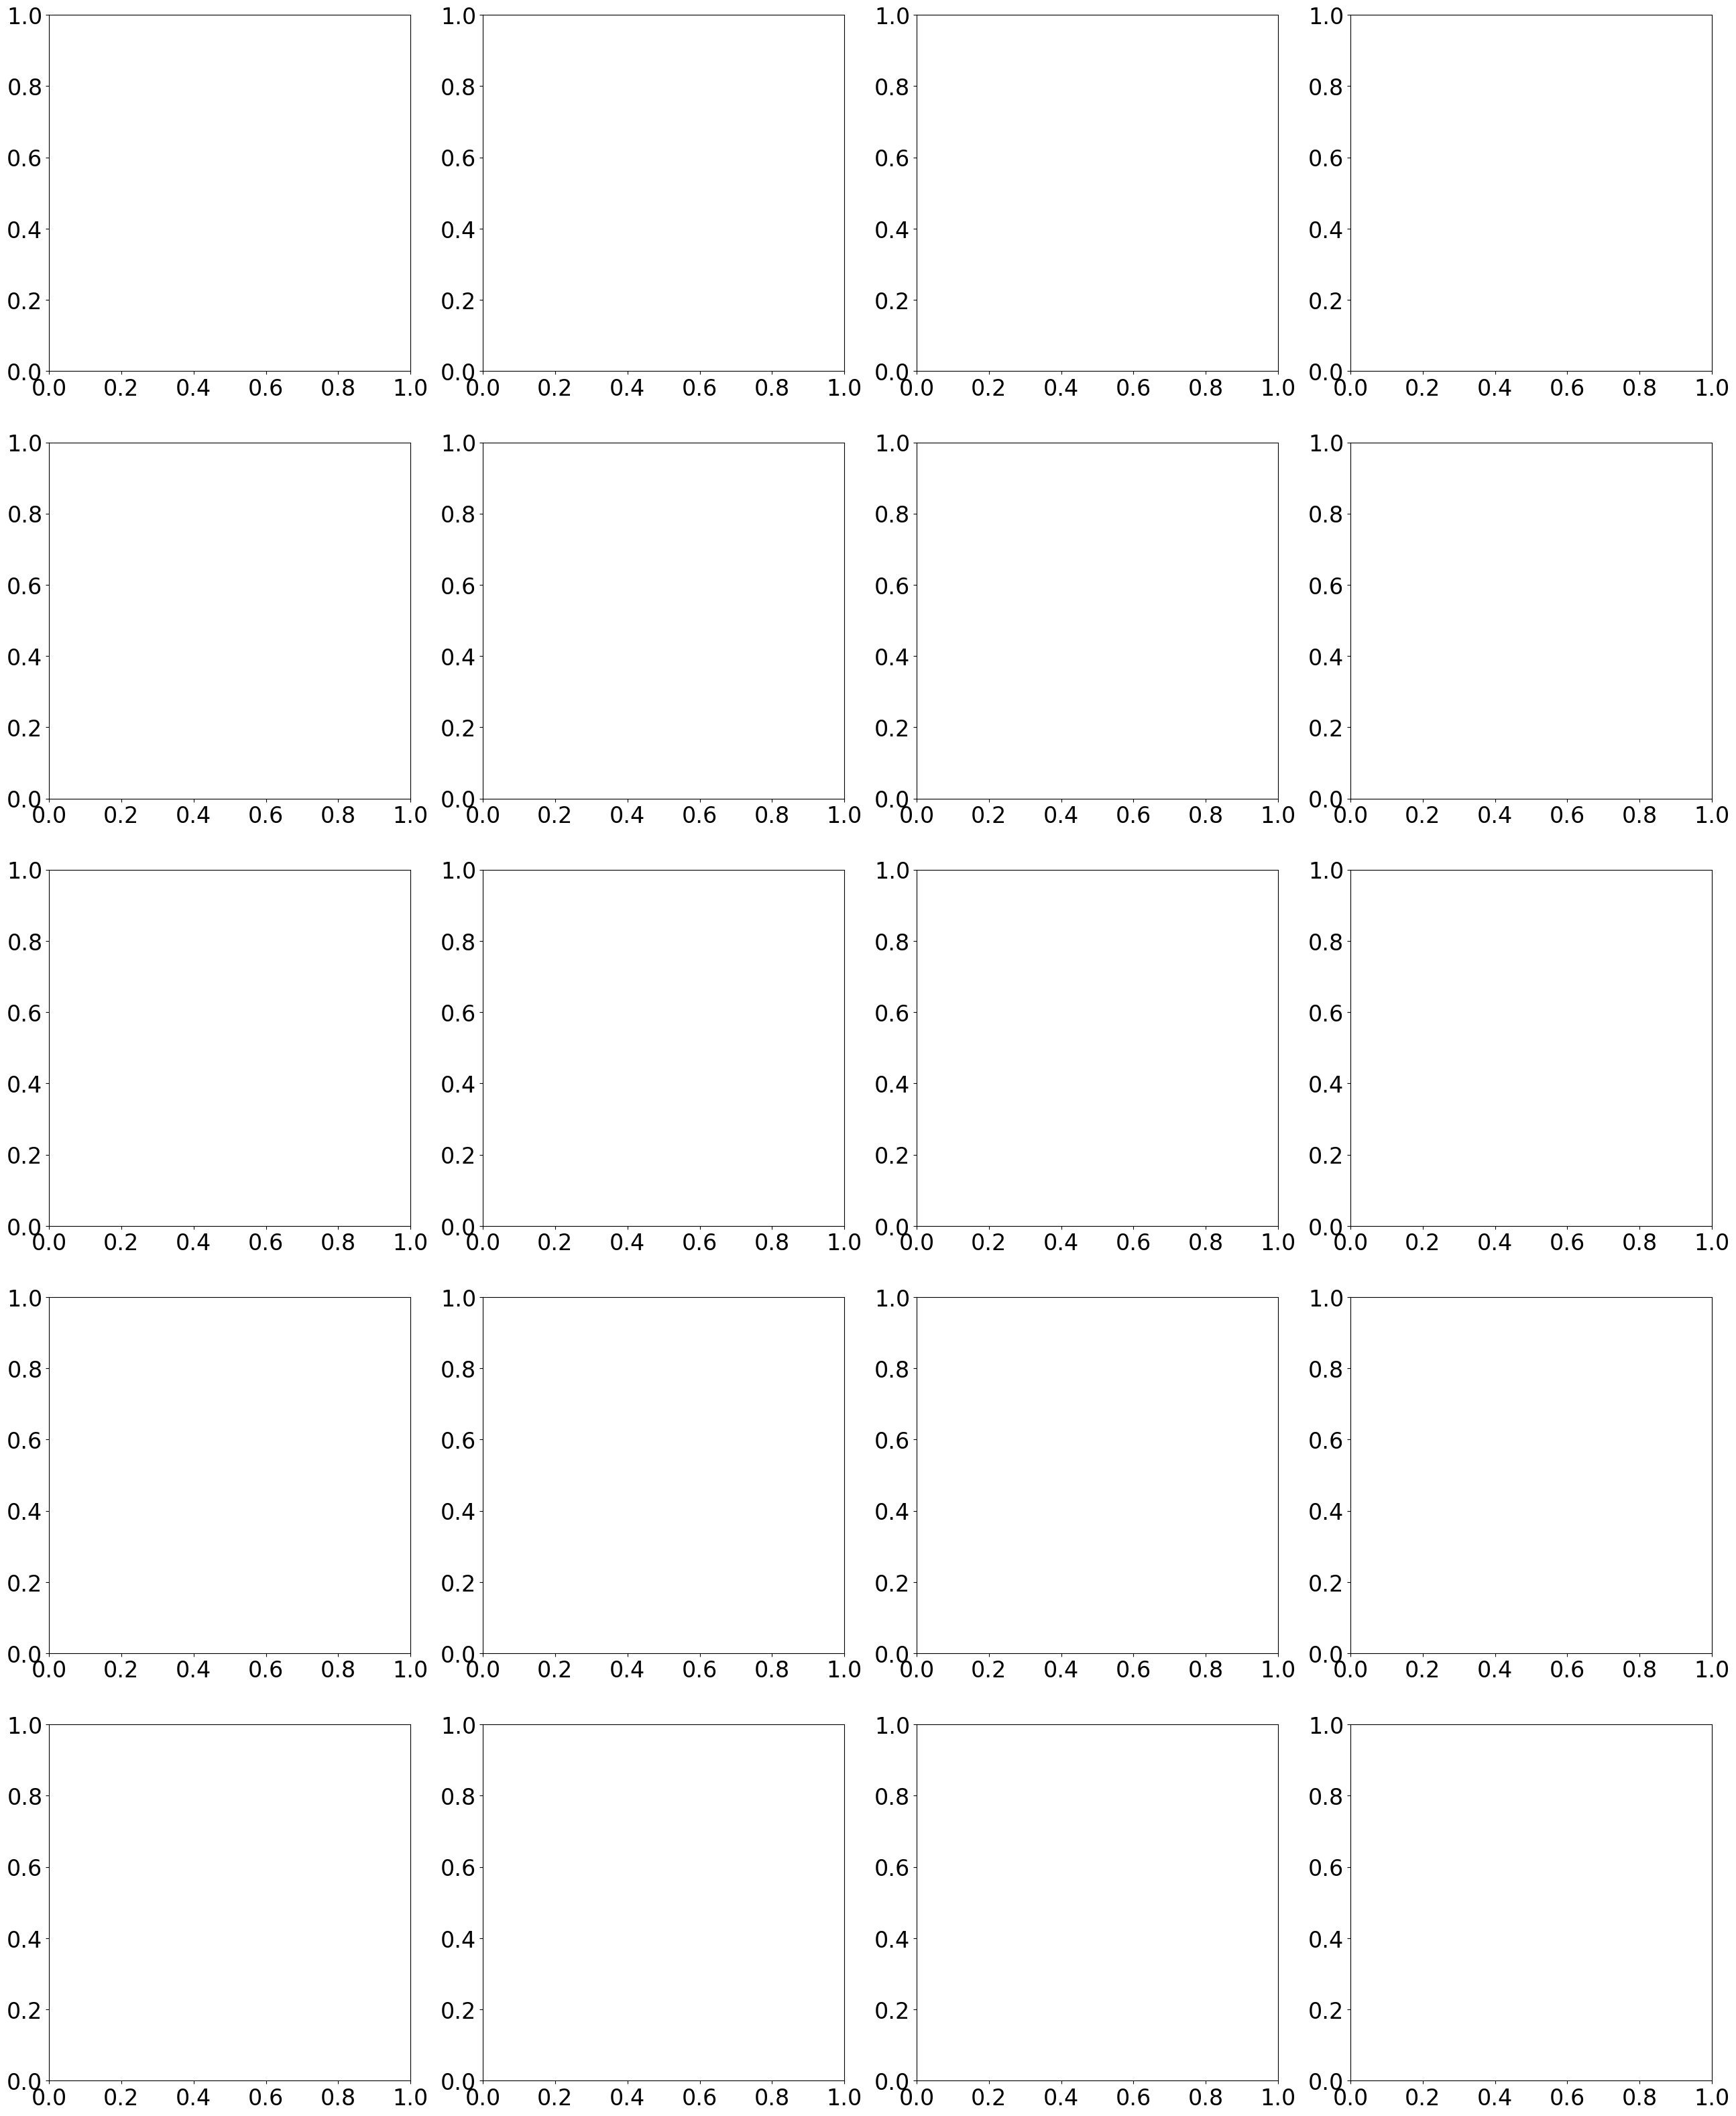

In [67]:
import numpy as np
from sklearn.linear_model import LinearRegression
#sim_year = 5000
pd_global_temp_exp_m = get_glob_temp_exp(region='global')
plt.rc('font', size=24)  

for sim_year in [5000]:
    fig, axs = plt.subplots(5,4,figsize=(32,40)) #, sharey='row') #, sharex=True)
    rgi_regs_global = ['All','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
    for j, rgi_reg in enumerate(rgi_regs_global):
        if j<4:
            ax = axs[0][j]
        elif j <8:
            ax = axs[1][j-4]
        elif j <12:
            ax = axs[2][j-8]
        elif j <16:
            ax = axs[3][j-12]
        elif j <20:
            ax = axs[4][j-16]

        region = f'RGI{rgi_reg}_glacier'
        if rgi_reg == 'All':
            ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sum(dim='rgi_reg')

            ds_t = 100*ds_reg_models_med_vol_sel.sel(simulation_year=sim_year)/ds_reg_models_med_vol_sel.isel(simulation_year=0)
        else:
            ds_t = 100*ds_reg_models_vol.sel(rgi_reg=rgi_reg).sel(simulation_year=sim_year).dropna(dim='model_author')/ds_reg_models_vol.sel(rgi_reg=rgi_reg).isel(simulation_year=0).dropna(dim='model_author')
        #ds_t = ds_t.to_dataset().assign_coords(temp_ch_ipcc=pd_global_temp_exp_m_glac['temp_ch_ipcc'].values)
        pd_tt = ds_t.to_dataframe()
        pd_tt = pd_tt.reset_index()

        if rgi_reg == 'All':
            pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values

        else:
            for m in pd_tt.model_author.unique():
                pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
        pd_tt_above0 = pd_tt.loc[pd_tt.volume_m3>0]
        temp = pd_tt_above0['temp_ch_ipcc'].values

        q = 'volume_m3' # this is actually the 'relative volume change (in %)'
        rel_vol = pd_tt_above0[q].values
        # Apply logarithmic transformation to the dependent variable
        log_rel_vol = np.log(rel_vol)

        # Create the linear regression model
        model = LogarithmicRegressor()

        # Fit the model to the data
        model.fit(temp.reshape(-1, 1), log_rel_vol)

        # Predict using the model
        temp_to_fit = np.arange(pd_tt.temp_ch_ipcc.min(), pd_tt.temp_ch_ipcc.max()*1.02,0.01)
        predicted_log_rel_vol = model.predict(temp_to_fit.reshape(-1, 1))

        # Convert the predicted logarithmic values back to the original scale
        predicted_rel_vol = np.exp(predicted_log_rel_vol)

        # Retrieve the coefficients and intercept
        coef = model.coef_[0]
        intercept = model.intercept_

        # Print the equation of the fitted line
        #print("Fitted line equation: exp({:.2f}*ΔT + {:.1f})".format(coef, intercept))



        if rgi_reg == 'All':
            ax.set_title(f'Global glacier volume after {sim_year} years')
        else:
            ax.set_title(f'RGI{rgi_reg} volume after {sim_year} years')


        if rgi_reg == 'All':
            ax.set_ylabel(f'Global relative glacier volume (%)')
        else:
            ax.set_ylabel(f'Volume (%, relative to initial state)')

        sns.scatterplot(ax=ax,
                        x='temp_ch_ipcc',
                     y='volume_m3', #'volume (km3)',
                        data = pd_tt,
                    hue='temp_ch_ipcc', palette='flare',legend=False, s=80, alpha = 0.6)
        ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
        #plt.plot(temp, rel_vol, 'o', alpha =0.2)
        ax.plot(temp_to_fit, predicted_rel_vol, '-', label="exp({:.2f}*ΔT + {:.3f})".format(coef, intercept), color='black', lw=4)
        text = r'Global glacier volume (V$_{%}$, rel. 2020)'+f'\n'
        for temp in [0.0,1.1,1.5,2.0,2.7, 3.0, 4.0]:
            Ttemp_vol = int(np.exp(model.predict(np.array(temp).reshape(-1,1))).round(0)[0])
            text = text+r'V$_{rel}$(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
        ax.text(0.42, 0.38, text, color='grey',transform=ax.transAxes)

        ax.legend()
        plt.tight_layout()
        plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_log_fit.png')

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
#sim_year = 5000
pd_global_temp_exp_m = get_glob_temp_exp(region='global')
plt.rc('font', size=24)  

for sim_year in [100, 500, 5000]:
    fig, axs = plt.subplots(5,4,figsize=(32,40)) #, sharey='row') #, sharex=True)
    rgi_regs_global = ['All','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
    for j, rgi_reg in enumerate(rgi_regs_global):
        if j<4:
            ax = axs[0][j]
        elif j <8:
            ax = axs[1][j-4]
        elif j <12:
            ax = axs[2][j-8]
        elif j <16:
            ax = axs[3][j-12]
        elif j <20:
            ax = axs[4][j-16]

        region = f'RGI{rgi_reg}_glacier'
        if rgi_reg == 'All':
            ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sum(dim='rgi_reg')

            ds_t = 100*ds_reg_models_med_vol_sel.sel(simulation_year=sim_year)/ds_reg_models_med_vol_sel.isel(simulation_year=0)
        else:
            ds_t = 100*ds_reg_models_vol.sel(rgi_reg=rgi_reg).sel(simulation_year=sim_year).dropna(dim='model_author')/ds_reg_models_vol.sel(rgi_reg=rgi_reg).isel(simulation_year=0).dropna(dim='model_author')
        #ds_t = ds_t.to_dataset().assign_coords(temp_ch_ipcc=pd_global_temp_exp_m_glac['temp_ch_ipcc'].values)
        pd_tt = ds_t.to_dataframe()
        pd_tt = pd_tt.reset_index()

        if rgi_reg == 'All':
            pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values

        else:
            for m in pd_tt.model_author.unique():
                pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
        pd_tt_above0 = pd_tt.loc[pd_tt.volume_m3>0]
        temp = pd_tt_above0['temp_ch_ipcc'].values

        q = 'volume_m3' # this is actually the 'relative volume change (in %)'
        rel_vol = pd_tt_above0[q].values
        # Apply logarithmic transformation to the dependent variable
        log_rel_vol = np.log(rel_vol)

        # Create the linear regression model
        model = LinearRegression()

        # Fit the model to the data
        model.fit(temp.reshape(-1, 1), log_rel_vol)

        # Predict using the model
        temp_to_fit = np.arange(pd_tt.temp_ch_ipcc.min(), pd_tt.temp_ch_ipcc.max()*1.02,0.01)
        predicted_log_rel_vol = model.predict(temp_to_fit.reshape(-1, 1))

        # Convert the predicted logarithmic values back to the original scale
        predicted_rel_vol = np.exp(predicted_log_rel_vol)

        # Retrieve the coefficients and intercept
        coef = model.coef_[0]
        intercept = model.intercept_

        # Print the equation of the fitted line
        #print("Fitted line equation: exp({:.2f}*ΔT + {:.1f})".format(coef, intercept))



        if rgi_reg == 'All':
            ax.set_title(f'Global glacier volume after {sim_year} years')
        else:
            ax.set_title(f'RGI{rgi_reg} volume after {sim_year} years')


        if rgi_reg == 'All':
            ax.set_ylabel(f'Global relative glacier volume (%)')
        else:
            ax.set_ylabel(f'Volume (%, relative to initial state)')

        sns.scatterplot(ax=ax,
                        x='temp_ch_ipcc',
                     y='volume_m3', #'volume (km3)',
                        data = pd_tt,
                    hue='temp_ch_ipcc', palette='flare',legend=False, s=80, alpha = 0.6)
        ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
        #plt.plot(temp, rel_vol, 'o', alpha =0.2)
        ax.plot(temp_to_fit, predicted_rel_vol, '-', label="exp({:.2f}*ΔT + {:.3f})".format(coef, intercept), color='black', lw=4)
        text = ''
        for temp in [0.0,1.1,1.5,2.0,2.7, 3.0, 4.0]:
            Ttemp_vol = int(np.exp(model.predict(np.array(temp).reshape(-1,1))).round(0)[0])
            text = text+r'V$_{rel}$(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
        ax.text(0.42, 0.38, text, color='grey',transform=ax.transAxes)

        ax.legend()
        plt.tight_layout()
        plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_log_fit.png')

### Old

In [ ]:
region='global'
perc=90
sim_year=2000
avg_last_20yr = False
smooth_values_percentiles=1
exp_decay_temp_fit=False
temp_above_0_8=False
landscape = False

norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
                     vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 20, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
ncols = 7 #
cmap = sns.color_palette('flare', n_colors=7) #sns.cubehelix_palette(light=1, as_cmap=True)
###cmap = matplotlib.colors.ListedColormap(plt.cm.flare(np.linspace(0, 1, ncols)))
#cmap = matplotlib.colors.ListedColormap(cmap(np.linspace(0, 1, ncols)))
#bounds = np.array([pd_global_temp_exp_m['temp_ch_ipcc'].min(), 1,2,3,4,5,6, pd_global_temp_exp_m['temp_ch_ipcc'].max()])
#norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
cmap

if temp_above_0_8:
    add= '_temp_above_0_8'
    current_deltaT = 1.1
else:
    add = ''
    current_deltaT = 0

pd_exp_decay_fits_simple = pd.read_csv(f'fitted_glacier_response_to_global_temp_ch_simple_20yr_avg_period{add}.csv', index_col=0)


q1=(50-perc/2)/100
q2=(50+perc/2)/100


plt.rc('font', size=24)  
if landscape:
    fig,axs= plt.subplots(1,2,figsize=(26,10))
    add = add+'_landscape'

else:
    fig,axs= plt.subplots(2,1,figsize=(12,20))

ax = axs[0]
# get global temp. change
pd_global_temp_exp_m = get_glob_temp_exp(region='global')

if region == 'global':
    # get global glacier temp.change
    pd_global_temp_exp_m_glac = get_glob_temp_exp(region='global_glacier')
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sum(dim='rgi_reg')
    n_models = ''
    rgi_reg = 'global'
    rgi_reg_f = 'All'

else:
    # get regional glacier temp. change
    pd_global_temp_exp_m_glac = get_glob_temp_exp(region=region)
    rgi_reg = region[3:5]
    rgi_reg_f = rgi_reg
    ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sel(rgi_reg=rgi_reg)
    # check how many glacier models have at least some estimates
    reg_glac_models = ds_reg_models_vol.sel(rgi_reg=rgi_reg).dropna(dim='model_author', how='all').model_author
    print(reg_glac_models.values)
    n_models = len(reg_glac_models)
    n_models = f'{n_models} '
if exp_decay_temp_fit:
    # only for exp_decay_temp_fit
    _,_,a,b = pd_exp_decay_fits_simple.loc[(pd_exp_decay_fits_simple.rgi_reg==rgi_reg_f)&(pd_exp_decay_fits_simple.year==5000)].values.squeeze()
    pd_global_temp_exp_m['fitted_vol_ch'] = a*np.exp(-b*(pd_global_temp_exp_m['temp_ch_ipcc']-current_deltaT))
    if temp_above_0_8:
        # don't plot above 0°C
        pd_global_temp_exp_m.loc[pd_global_temp_exp_m.temp_ch_ipcc<current_deltaT, 'fitted_vol_ch'] = np.NaN

ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc = ('experiments',
                                                                      pd_global_temp_exp_m.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments pd_global_temp_exp_m_glac
                                                                                             'temp_ch_ipcc']))

ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.assign_coords(temp_ch_ipcc_glacier = ('experiments',
                                                                      pd_global_temp_exp_m_glac.loc[ds_reg_models_med_vol_sel.experiments, # make sure thatwe use the same experiments pd_global_temp_exp_m_glac
                                                                                             'temp_ch_ipcc']))
# need that to have bot volume_m3 and temp_ch_ipcc as variables
ds_reg_models_med_vol_sel = ds_reg_models_med_vol_sel.reset_coords()
init_vol = ds_reg_models_med_vol_sel.volume_m3.isel(simulation_year=0)
ds_reg_models_med_vol_sel['relative volume change (in %)'] = 100*ds_reg_models_med_vol_sel.volume_m3/init_vol
#print(ds_reg_models_med_vol_sel)
pd_t =ds_reg_models_med_vol_sel.to_dataframe().reset_index()
#pd_t['volume (km3)'] = pd_t['volume_m3']/1e9

g = sns.lineplot(ax=ax,
             data=pd_t,
             x='simulation_year',
             y='relative volume change (in %)', #'volume (km3)',
            hue='temp_ch_ipcc', palette=cmap, #norm=norm,
                 legend=False,lw=1, alpha = 0.7);

## get colormap 
#norm = plt.Normalize(vmin=pd_global_temp_exp_m['temp_ch_ipcc'].min(),
#                     vmax=pd_global_temp_exp_m['temp_ch_ipcc'].max())
#cmap = sns.color_palette('flare', as_cmap=True) #sns.cubehelix_palette(light=1, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

if landscape:
    cax = fig.add_axes([ax.get_position().x1-0.07, ax.get_position().y0+0.01, 0.02, ax.get_position().height / 2.6])
else:
    cax = fig.add_axes([ax.get_position().x1-0.12, ax.get_position().y0+0.01, 0.02, ax.get_position().height / 2.6])
cbar = ax.figure.colorbar(sm, cax=cax)
cbar.ax.invert_yaxis()
cbar.set_ticks([0,1.5,3.0,4.5,6.0])
cbar.set_label(r'$\Delta$T (°C, global)')

# plot specific delta T:
col_temp_l = []
exp_l = []
for temp in [0,1.5,2,3,4,5]: #,5,6]:
    exp = np.abs(pd_global_temp_exp_m-temp).sort_values(by='temp_ch_ipcc').iloc[0].name
    col_temp = cmap(sm.colorbar.norm(pd_global_temp_exp_m.loc[exp]['temp_ch_ipcc']))
    col_temp_l.append(col_temp)
    exp_l.append(exp)
pd_t_sel =ds_reg_models_med_vol_sel.sel(experiments=exp_l).to_dataframe().reset_index()
#pd_t_sel['volume (km3)'] = pd_t_sel['volume_m3']/1e9
l_sel = sns.lineplot(ax=ax,
             data=pd_t_sel,
             x='simulation_year',
             y='relative volume change (in %)', #'volume (km3)',
            hue='temp_ch_ipcc', palette=sns.color_palette(col_temp_l),
             legend='auto',lw=5, ls='--');
ax.legend(loc='upper right', bbox_to_anchor=(1,1), markerscale=1, handleheight=0.8)
leg = ax.get_legend()
for j,t in enumerate(leg.texts):
    # truncate label text to 4 characters
    if j ==1:
        t.set_text(np.round(float(t.get_text()),1))
    else:
        t.set_text(np.round(float(t.get_text()),0))
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
    legobj.set_linestyle('--')
#g.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1)

exp_temp_min = ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmin()
# only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
q1_2_min = ds_reg_models_vol.sel(experiments=exp_temp_min).quantile([q1,q2], dim='model_author')/1e9
if region == 'global':
    q1_2_min_glob = q1_2_min.sum(dim='rgi_reg')
else:
    q1_2_min_glob = q1_2_min.sel(rgi_reg=rgi_reg)
q1_2_min_glob = (100*q1_2_min_glob/q1_2_min_glob.isel(simulation_year=0))
ax.fill_between(ds_reg_models_med_vol_sel.simulation_year,
         q1_2_min_glob.sel(quantile=q1), q1_2_min_glob.sel(quantile=q2), alpha = 0.2, color=l_sel.lines[0].get_color())
#handles, labels = ax.get_legend_handles_labels()
#t = plt.legend(handles, labels)
#ax.add_artist(leg)

exp_temp_max = ds_reg_models_med_vol_sel.temp_ch_ipcc.idxmax()
# only compute the quantile for the experiment w. minimum / maximum temperature, then just sum up the quantiles to get from regional to global estimates
q1_2_max = ds_reg_models_vol.sel(experiments=exp_temp_max).quantile([q1,q2], dim='model_author')/1e9
if region == 'global':
    q1_2_max_glob = q1_2_max.sum(dim='rgi_reg')
else:
    q1_2_max_glob = q1_2_max.sel(rgi_reg=rgi_reg)
q1_2_max_glob = (100*q1_2_max_glob/q1_2_max_glob.isel(simulation_year=0))

ax.fill_between(ds_reg_models_med_vol_sel.simulation_year,
         q1_2_max_glob.sel(quantile=q1), q1_2_max_glob.sel(quantile=q2), alpha = 0.2, color=l_sel.lines[-1].get_color());
if region == 'global':
    ax.set_ylabel(f'Global glacier volume (in %, relative to initial state)')
else:
    ax.set_ylabel(f'RGI{rgi_reg} glacier volume (in %, relative to initial state)')
ax.set_xlabel('Simulation year')
#ax.legend(loc='upper left', bbox_to_anchor=(1.01,0.98))
#leg = ax.get_legend()
#leg.loc('upper right')
leg.set_title(r'$\Delta$T (°C)'+f'\n(global)')

# add additional legend for glacier model uncertatinties and other things ... 
#define patches and lines to add to legend
#patch_min = mpatches.Patch(label=f'{perc}th %-ile minimum temperature',  alpha = 0.2, color=l.lines[0].get_color())
patch_max = mpatches.Patch(label=f'{perc}th %-ile of {n_models}glacier models',  alpha = 0.2, color='grey')
line1 = Line2D([0], [0], label=f'median of {n_models}glacier models', color='black', lw=1, alpha = 0.7)
line2 = Line2D([0], [0], label=r'experiment nearest to $\Delta$T', color='black', lw=5, alpha = 0.8, ls = '--')
#add handles
handles= [line1, line2, patch_max]
#add legend
ax.legend(handles=handles, title='n=80 experiments', loc='upper left', bbox_to_anchor=(0.1,1))
ax.add_artist(leg)

if region == 'global':
    ax.set_title(f'Global glacier volume equilibration experiments')
else:
    ax.set_title(f'RGI{rgi_reg} glacier volume equilibration experiments')
if sim_year == 2000:
    ax.set_xlim(ax.get_xlim()[0], 2600)
    ax.set_xticks(np.arange(0,2100,500),np.arange(0,2100,500))
else:
    ax.set_xlim(ax.get_xlim()[0], 6400)
    ax.set_xticks(np.arange(0,5100,1000),np.arange(0,5100,1000))

In [57]:
# option B: choose exact year

import numpy as np
from scipy.optimize import curve_fit

#sim_year = 5000
pd_global_temp_exp_m = get_glob_temp_exp(region='global')
plt.rc('font', size=24)  
# Define the exponential decay function, want to ensure that it -> zero if temperature is large!!!
rgi_regs_global = ['All','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
for version in ['simple','advanced']:
    jj=0
    if version == 'simple':
        def exponential_decay(x, a, b):
            # avoind overflow -> does not work ... 
            exp_values = -b * x
            #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
            return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
        param_bounds = ([0, 0], [1000, 5])
        pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1), columns=['rgi_reg','year','a_simple', 'b_simple'])

    else:
        def exponential_decay(x, a, b,c,d):
            exp_values_b = -b * x
            #exp_values_b = np.clip(exp_values_b, -709, 709)  # Clip values to avoid overflow

            exp_values_d = -d * x**2
            #exp_values_d = np.clip(exp_values_d, -709, 709)  # Clip values to avoid overflow
            return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 
        param_bounds = ([0, 0,0,0], [1000, 5,1000, 5])
        pd_exp_decay_fits_adv = pd.DataFrame(index=np.arange(0,20*4,1), columns=['rgi_reg','year', 'a_comp', 'b_comp', 'c_comp', 'd_comp'])

    for sim_year in [50, 100, 500, 5000]: #
        fig, axs = plt.subplots(5,4,figsize=(32,40)) #, sharey='row') #, sharex=True)
        
        for j, rgi_reg in enumerate(rgi_regs_global):
            if j<4:
                ax = axs[0][j]
            elif j <8:
                ax = axs[1][j-4]
            elif j <12:
                ax = axs[2][j-8]
            elif j <16:
                ax = axs[3][j-12]
            elif j <20:
                ax = axs[4][j-16]

            region = f'RGI{rgi_reg}_glacier'
            if rgi_reg == 'All':
                ds_reg_models_med_vol_sel = ds_reg_models_med_vol.sum(dim='rgi_reg')

                ds_t = 100*ds_reg_models_med_vol_sel.sel(simulation_year=sim_year)/ds_reg_models_med_vol_sel.isel(simulation_year=0)
            else:
                ds_t = 100*ds_reg_models_vol.sel(rgi_reg=rgi_reg).sel(simulation_year=sim_year).dropna(dim='model_author')/ds_reg_models_vol.sel(rgi_reg=rgi_reg).isel(simulation_year=0).dropna(dim='model_author')
            #ds_t = ds_t.to_dataset().assign_coords(temp_ch_ipcc=pd_global_temp_exp_m_glac['temp_ch_ipcc'].values)
            pd_tt = ds_t.to_dataframe()
            pd_tt = pd_tt.reset_index()

            if rgi_reg == 'All':
                pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
            else:
                for m in pd_tt.model_author.unique():
                    pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
            pd_tt_above0 = pd_tt.loc[pd_tt.volume_m3>0]
            temp = pd_tt_above0['temp_ch_ipcc'].values

            q = 'volume_m3' # this is actually the 'relative volume change (in %)'
            rel_vol = pd_tt_above0[q].values


            if rgi_reg == 'All':
                ax.set_title(f'Global glacier volume after {sim_year} years')
            else:
                ax.set_title(f'RGI{rgi_reg} volume after {sim_year} years')


            if rgi_reg == 'All':
                ax.set_ylabel(f'Global relative glacier volume (%)')
            else:
                ax.set_ylabel(f'Volume (%, relative to initial state)')

            sns.scatterplot(ax=ax,
                            x='temp_ch_ipcc',
                            y='volume_m3', #'volume (km3)',
                            data = pd_tt,
                        hue='temp_ch_ipcc', palette='flare',legend=False, s=80, alpha = 0.6)
            ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
            #plt.plot(temp, rel_vol, 'o', alpha =0.2)

            x,y = temp, rel_vol
            # Perform the curve fitting
            popt, pcov = curve_fit(exponential_decay, x, y, bounds = param_bounds)  # Lower and upper bounds for a and b)
            # Generate a higher density x range for plotting the fitted curve
            x_dense = np.linspace(x.min(), x.max(), 100)
            fit_vars = popt #c_opt

            # Extract the optimized parameters
            if version == 'simple':
                a_opt, b_opt = popt #c_opt
                # Compute the fitted y values
                y_fitted = exponential_decay(x_dense, a_opt, b_opt)
                func_vars= r'$V_{rel}$='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
            else:
                a_opt, b_opt, c_opt, d_opt = popt
                # Compute the fitted y values
                y_fitted = exponential_decay(x_dense, a_opt, b_opt, c_opt, d_opt)
                func_vars= r'$V_{rel}$='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
            ax.plot(x_dense, y_fitted, '-', label=func_vars,
                    color='black', lw=4)
            text = ''
            for temp in [1.1,1.5,2.0,2.7, 4.0]:
                if version == 'simple':
                    Ttemp_vol = int(exponential_decay(temp, a_opt, b_opt).round(0)) #c_opt
                    num_y=0.52
                else:
                    Ttemp_vol = int(exponential_decay(temp, a_opt, b_opt, c_opt, d_opt).round(0)) #c_opt
                    num_y=0.46

                text = text+r'V$_{rel}$(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
            ax.text(0.46, num_y, text, color='grey',transform=ax.transAxes, fontsize=22)
            #except:
            #    pass

            ax.legend()
            if version == 'simple':
                pd_exp_decay_fits_simple.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt)
            else:
                pd_exp_decay_fits_adv.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt, c_opt, d_opt)
            jj+=1
        plt.tight_layout()
        plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_exp_decay_fit{version}_exact_year.png')
        plt.close()
pd_exp_decay_fits_simple.to_csv('fitted_glacier_response_to_global_temp_ch_simple_exact_year.csv')
pd_exp_decay_fits_adv.to_csv('fitted_glacier_response_to_global_temp_ch_complex_exact_year.csv')

In [ ]:
avg_over = '20yr'
#avg_over = '20yr'

# option A: choose 20-year period before and do the average!
import numpy as np
from scipy.optimize import curve_fit

#sim_year = 5000
pd_global_temp_exp_m = get_glob_temp_exp(region='global')
plt.rc('font', size=24)  
# Define the exponential decay function, want to ensure that it -> zero if temperature is large!!!
rgi_regs_global = ['All','01', '02', '03', '04', '05', '06', '07',
                   '08', '09', '10', '11', '12', '13', '14', '15',
                   '16', '17', '18', '19']
for temp_above_0_8 in [True]: #,False]:
    if temp_above_0_8:
        add= '_temp_above_0_8'
        current_deltaT = 1.1
    else:
        add = ''
        current_deltaT = 0
    for version in ['simple']:
        jj=0
        if version == 'simple':
            def exponential_decay(x, a, b):
                # avoind overflow -> does not work ... 
                exp_values = -b * x
                #exp_values = np.clip(exp_values, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values) #+ c * np.exp(-d * x**2)#**c 
            param_bounds = ([0, 0], [1000, 5])
            pd_exp_decay_fits_simple = pd.DataFrame(index=np.arange(0,20*4,1),
                                                    columns=['rgi_reg','year',
                                                             'a_simple', 'b_simple'])

        else:
            def exponential_decay(x, a, b,c,d):
                exp_values_b = -b * x
                #exp_values_b = np.clip(exp_values_b, -709, 709)  # Clip values to avoid overflow

                exp_values_d = -d * x**2
                #exp_values_d = np.clip(exp_values_d, -709, 709)  # Clip values to avoid overflow
                return a * np.exp(exp_values_b) + c * np.exp(exp_values_d)#**c 
            param_bounds = ([0, 0,0,0], [1000, 5,1000, 5])
            pd_exp_decay_fits_adv = pd.DataFrame(index=np.arange(0,20*4,1),
                                                 columns=['rgi_reg','year',
                                                          'a_comp', 'b_comp',
                                                          'c_comp', 'd_comp'])
        for sim_year in [50, 100, 500, 5000]: #
            if sim_year == 5000 and avg_over=='100yr':
                sim_year_avg = 100
            elif sim_year == 5000 and avg_over=='60yr':
                sim_year_avg = 60
            else:
                sim_year_avg = 20
            fig, axs = plt.subplots(5,4,figsize=(35,40)) #, sharey='row') #, sharex=True)
            ds_reg_models_med_vol_roll = ds_reg_models_med_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all')#.sel(simulation_year=slice(0,sim_year))
            ds_reg_models_vol_roll = ds_reg_models_vol.rolling(simulation_year=sim_year_avg, center=True).mean().dropna(dim='simulation_year', how='all')
            for j, rgi_reg in enumerate(rgi_regs_global):
                if j<4:
                    ax = axs[0][j]
                elif j <8:
                    ax = axs[1][j-4]
                elif j <12:
                    ax = axs[2][j-8]
                elif j <16:
                    ax = axs[3][j-12]
                elif j <20:
                    ax = axs[4][j-16]

                region = f'RGI{rgi_reg}_glacier'


                if rgi_reg == 'All':
                    ds_reg_models_med_vol_sel = ds_reg_models_med_vol_roll.isel(simulation_year=-1).sum(dim='rgi_reg')
                    ds_t = 100*ds_reg_models_med_vol_sel/ds_reg_models_med_vol.isel(simulation_year=0).sum(dim='rgi_reg')
                else:
                    ds_t = ds_reg_models_vol_roll.sel(rgi_reg=rgi_reg).isel(simulation_year=-1).dropna(dim='model_author')
                    ds_t = 100*ds_t/ds_reg_models_vol.isel(simulation_year=0).sel(rgi_reg=rgi_reg)
                pd_tt = ds_t.to_dataframe()
                pd_tt = pd_tt.drop(columns=['gcm','period_scenario'])
                pd_tt = pd_tt.reset_index()

                if rgi_reg == 'All':
                    pd_tt['temp_ch_ipcc']  = pd_global_temp_exp_m['temp_ch_ipcc'].values
                else:
                    for m in pd_tt.model_author.unique():
                        pd_tt.loc[pd_tt.model_author == m, 'temp_ch_ipcc'] = pd_global_temp_exp_m['temp_ch_ipcc'].values
                
                pd_tt_above0 = pd_tt #.loc[pd_tt.volume_m3>0]  ## probably it is ok to also fit the zero volume estimates 
                # if I want to remove the very uncertain experiments,
                # I still want to keep those that are near to 
                # 1.1°C. However, there are no experiments directly at 1.1°C
                # and only one at +1, so, we should rather do the fit with >= +0.8°C
                if temp_above_0_8:
                    pd_tt_above0 = pd_tt_above0.loc[pd_tt_above0['temp_ch_ipcc']>=0.8]
                temp = pd_tt_above0['temp_ch_ipcc'].values

                q = 'volume_m3' # this is actually the 'relative volume change (in %)'
                rel_vol = pd_tt_above0[q].values

                if rgi_reg == 'All':
                    ax.set_title(f'Global glacier volume after {sim_year} years')
                else:
                    ax.set_title(f'RGI{rgi_reg} volume after {sim_year} years')


                #if rgi_reg == 'All':
                #    ax.set_ylabel(f'Global relative glacier volume (%)')
                #else:
                ax.set_ylabel(f'Volume (%, relative to initial state)')

                sns.scatterplot(ax=ax,
                                x='temp_ch_ipcc',
                                y='volume_m3', #'volume (km3)',
                                data = pd_tt,
                                color='black',
                                #hue='temp_ch_ipcc',
                                #palette='flare',
                                legend=False, s=80, alpha = 0.3)
                ax.set_xlabel(r'$\Delta$T$_{global}$ (°C, compared to pre-industrial)')
                #plt.plot(temp, rel_vol, 'o', alpha =0.2)

                x,y = temp, rel_vol
                # Perform the curve fitting
                popt, pcov = curve_fit(exponential_decay, x-current_deltaT, y, bounds = param_bounds)  # Lower and upper bounds for a and b)
                # Generate a higher density x range for plotting the fitted curve
                x_dense = np.linspace(x.min(), x.max(), 100)
                fit_vars = popt #c_opt

                # Extract the optimized parameters
                if version == 'simple':
                    a_opt, b_opt = popt #c_opt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense-current_deltaT, a_opt, b_opt)
                    func_vars= r'$V_{rel}$='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                    if temp_above_0_8:
                        func_vars= r'$V_{rel}$'+'(%)='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*(ΔT-{current_deltaT}°C))' #\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'

                else:
                    a_opt, b_opt, c_opt, d_opt = popt
                    # Compute the fitted y values
                    y_fitted = exponential_decay(x_dense, a_opt, b_opt, c_opt, d_opt)
                    func_vars= r'$V_{rel}$='+f'{a_opt:.1f}*exp(-{b_opt:.2f}*ΔT)\n+'+f'{c_opt:.1f}*exp(-{d_opt:.2f}*ΔT²)' #+{c_opt:.2f}'
                ax.plot(x_dense, y_fitted, '-', label=func_vars,
                        color='black', lw=4)
                text = ''
                for temp in [1.1,1.5,2.0,2.7, 4.0]:
                    if version == 'simple':
                        Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt).round(0)) #c_opt
                        num_y=0.51
                    else:
                        Ttemp_vol = int(exponential_decay(temp-current_deltaT, a_opt, b_opt, c_opt, d_opt).round(0)) #c_opt
                        num_y=0.46

                    text = text+r'V$_{rel}$(ΔT='+f'{temp}°C)'+f'={Ttemp_vol}%\n'
                ax.text(0.46, num_y, text, color='grey',transform=ax.transAxes, fontsize=24)
                #except:
                #    pass

                ax.legend(fontsize=20)
                if version == 'simple':
                    pd_exp_decay_fits_simple.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt)
                else:
                    pd_exp_decay_fits_adv.iloc[jj] = (rgi_reg,sim_year, a_opt, b_opt, c_opt, d_opt)
                jj+=1
                #ax.set_ylim([0,480])
            plt.tight_layout()
            plt.savefig(f'figures/2_glacier_volume_yr_{sim_year}_{avg_over}_avg_period_exp_decay_fit{version}{add}.png')
            plt.close()
    pd_exp_decay_fits_simple.to_csv(f'fitted_glacier_response_to_global_temp_ch_simple_{avg_over}_avg_period{add}.csv')
    #pd_exp_decay_fits_adv.to_csv(f'fitted_glacier_response_to_global_temp_ch_complex_20yr_avg_period{add}.csv')